# Predictions using LSTM
### This project started with an idea to use wind speed as a modeling method for bridge planning. The original project was to use Machine Learning techniques to reduce carbon footprint on future bridge building at coastal areas, and wind speeds could be a factor due to the concept of wind loading, however the project took a turn as a university research team had gotten involved and determine that wind wasn't required as a loading factor. 

# <font color='red'>NOTE:</font>
Please check the cell values before running. There are alot of 'chunky' processing of the data. I didn't write the functions to process due to the timeframe of the project. Please skip the relevant cells that I have stated is too 'chunky'

### Thus the project took a u-turn to re-evaluate the problem statement

For the Hong Kong Dataset for easiness of data, we will restrict the data to Mean Temperature, Sunlight and Windspeed

# Problem Statement (Re-Newed)
## The original idea required coastal data, and I was able to pull coastal data from the [Hong Kong Observatory website](https://data.gov.hk/en-data/dataset/hk-hko-rss-current-weather-report), so when I renewed the project idea, I wanted to conceptualize the idea of using Machine Learning techniques to create synthetic weather data for other Machine Learning models that require it.
## For example, wind speed data might be required by research teams to research on feasibility of building wind turbines in the area, rainfall prediction, typhoon prediction, etc...
### Thus, by using different machine learning techniques, I wanted to see how well it would predict weather data using Hong Kong's coastal data

In [ ]:
# !{sys.executable} -m pip install numpy==1.19.5

Please run your own system checks below. Ensure that Numpy version is 1.19.5 (or slightly lower), above 1.20 would cause issues with the tensorflow code in the 3rd part of the project

In [376]:
import numpy as np
import sys
# sys.path

In [377]:
# print(np.__path__)

In [378]:
# np.version.version

In [379]:
# np.version

Importing the relevant libraries

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import sys
import warnings, os
import IPython
from datetime import datetime
from matplotlib.dates import DateFormatter

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
# from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from pmdarima.arima import auto_arima

import tensorflow as tf
import tensorflow_addons as tfa


%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\training-server\anaconda3\envs\DataA\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.4.0 and strictly below 2.7.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.3.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


## Part 1
I will be taking data that I have downloaded from the hong kong observatory website and I have selected 3 locations for the data as Hong Kong has multiple observatories, and I chose the ones that gave the most number of feature data

# Cheung Chau
![Cheung Chau](img/cch.jpg)

# Hong Kong Airport
![Hong Kong Airport](img/hka.jpg)

# King's Park
![King's Park](img/kp.jpg)

In [7]:
# We will be taking data from 3 stations
# Cheung Chau
# King's Park
# Hong Kong Airport

df_cch_temp = pd.read_csv('./src/CCH_M_TEMP.csv')
df_hka_temp = pd.read_csv('./src/HKA_M_TEMP.csv')
df_kp_temp = pd.read_csv('./src/KP_M_TEMP.csv')
df_cch_max_temp = pd.read_csv('./src/MAXT_CCH.csv')
df_hka_max_temp = pd.read_csv('./src/MAXT_HKA.csv')
df_kp_max_temp = pd.read_csv('./src/MAXT_KP.csv')
df_cch_min_temp = pd.read_csv('./src/MINT_CCH.csv')
df_hka_min_temp = pd.read_csv('./src/MINT_HKA.csv')
df_kp_min_temp = pd.read_csv('./src/MINT_KP.csv')
df_cch_wind = pd.read_csv('./src/CCH_WIND.csv')
df_hka_wind = pd.read_csv('./src/HKA_WIND.csv')
df_kp_wind = pd.read_csv('./src/KP_WIND.csv')
df_kp_sun = pd.read_csv('./src/KP_SUN.csv')

In [8]:
df_cch_temp.tail()

Year  Month   Day Value
10683                     2021    6.0  29.0  27.8
10684                     2021    6.0  30.0  28.6
10685     *** 沒有數據/unavailable    NaN   NaN   NaN
10686  # 數據不完整/data incomplete    NaN   NaN   NaN
10687     C 數據完整/data Complete    NaN   NaN   NaN

In [9]:
df_hka_temp.tail()

Year  Month   Day  Value
8794                     2021    6.0  29.0    NaN
8795                     2021    6.0  30.0    NaN
8796     *** 沒有數據/unavailable    NaN   NaN    NaN
8797  # 數據不完整/data incomplete    NaN   NaN    NaN
8798     C 數據完整/data Complete    NaN   NaN    NaN

In [10]:
df_kp_temp.tail()

Year  Month   Day Value
10590                     2021    6.0  29.0  29.1
10591                     2021    6.0  30.0  29.6
10592     *** 沒有數據/unavailable    NaN   NaN   NaN
10593  # 數據不完整/data incomplete    NaN   NaN   NaN
10594     C 數據完整/data Complete    NaN   NaN   NaN

In [11]:
df_cch_wind.tail()

Year  Month   Day Value
10684                     2021    6.0  30.0  24.1
10685                      NaN    NaN   NaN   NaN
10686     *** 沒有數據/unavailable    NaN   NaN   NaN
10687  # 數據不完整/data incomplete    NaN   NaN   NaN
10688     C 數據完整/data Complete    NaN   NaN   NaN

In [12]:
df_hka_wind.tail()

Year  Month   Day Value
8765                     2021    5.0  31.0  21.1
8766                      NaN    NaN   NaN   NaN
8767     *** 沒有數據/unavailable    NaN   NaN   NaN
8768  # 數據不完整/data incomplete    NaN   NaN   NaN
8769     C 數據完整/data Complete    NaN   NaN   NaN

In [13]:
df_kp_wind.tail()

Year  Month   Day Value
10591                     2021    6.0  30.0  11.8
10592                      NaN    NaN   NaN   NaN
10593     *** 沒有數據/unavailable    NaN   NaN   NaN
10594  # 數據不完整/data incomplete    NaN   NaN   NaN
10595     C 數據完整/data Complete    NaN   NaN   NaN

In [14]:
df_kp_sun.tail()

Year  Month   Day  Value
10591                     2021    6.0  30.0    3.5
10592                      NaN    NaN   NaN    NaN
10593     *** 沒有數據/unavailable    NaN   NaN    NaN
10594  # 數據不完整/data incomplete    NaN   NaN    NaN
10595     C 數據完整/data Complete    NaN   NaN    NaN

In [15]:
df_cch_max_temp.head()

Year  Month   Day Value
0  1992    3.0  30.0  20.3
1  1992    3.0  31.0  22.6
2  1992    4.0   1.0  21.1
3  1992    4.0   2.0  20.3
4  1992    4.0   3.0  18.9

In [16]:
df_hka_max_temp.tail()

Year  Month   Day Value
8794                     2021    6.0  29.0    31
8795                     2021    6.0  30.0  33.1
8796     *** 沒有數據/unavailable    NaN   NaN   NaN
8797  # 數據不完整/data incomplete    NaN   NaN   NaN
8798     C 數據完整/data Complete    NaN   NaN   NaN

In [17]:
df_kp_max_temp.tail()

Year  Month   Day Value
10621                     2021    7.0  30.0  30.1
10622                     2021    7.0  31.0  31.9
10623     *** 沒有數據/unavailable    NaN   NaN   NaN
10624  # 數據不完整/data incomplete    NaN   NaN   NaN
10625     C 數據完整/data Complete    NaN   NaN   NaN

In [18]:
df_cch_min_temp.head()

Year  Month   Day Value  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7
0  1992    3.0  30.0  14.5         NaN         NaN         NaN         NaN
1  1992    3.0  31.0  17.5         NaN         NaN         NaN         NaN
2  1992    4.0   1.0  18.7         NaN         NaN         NaN         NaN
3  1992    4.0   2.0  17.4         NaN         NaN         NaN         NaN
4  1992    4.0   3.0  16.9         NaN         NaN         NaN         NaN

In [19]:
df_hka_min_temp.tail()

Year  Month   Day Value
8794                     2021    6.0  29.0  27.2
8795                     2021    6.0  30.0  29.2
8796     *** 沒有數據/unavailable    NaN   NaN   NaN
8797  # 數據不完整/data incomplete    NaN   NaN   NaN
8798     C 數據完整/data Complete    NaN   NaN   NaN

In [20]:
df_kp_min_temp.tail()

Year  Month   Day Value
10621                     2021    7.0  30.0    26
10622                     2021    7.0  31.0  26.8
10623     *** 沒有數據/unavailable    NaN   NaN   NaN
10624  # 數據不完整/data incomplete    NaN   NaN   NaN
10625     C 數據完整/data Complete    NaN   NaN   NaN

In [21]:
print(df_cch_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [22]:
print(df_hka_temp.isnull().sum())

Year      0
Month     3
Day       3
Value    33
dtype: int64


In [23]:
print(df_kp_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [24]:
print(df_cch_max_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [25]:
print(df_hka_max_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [26]:
print(df_kp_max_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [27]:
print(df_cch_min_temp.isnull().sum())

Year              0
Month             3
Day               3
Value             3
Unnamed: 4    10719
Unnamed: 5    10719
Unnamed: 6    10719
Unnamed: 7    10718
dtype: int64


In [28]:
print(df_hka_min_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [29]:
print(df_kp_min_temp.isnull().sum())

Year     0
Month    3
Day      3
Value    3
dtype: int64


In [30]:
print(df_cch_wind.isnull().sum())

Year     1
Month    4
Day      4
Value    4
dtype: int64


In [31]:
print(df_hka_wind.isnull().sum())

Year     1
Month    4
Day      4
Value    4
dtype: int64


In [32]:
print(df_kp_wind.isnull().sum())

Year     1
Month    4
Day      4
Value    4
dtype: int64


In [33]:
print(df_kp_sun.isnull().sum())

Year     1
Month    4
Day      4
Value    4
dtype: int64


In [34]:
def getyears(df):
    df = df[(df['Year']=='2021')|(df['Year']=='2020')|(df['Year']=='2019')|(df['Year']=='2018')]
    df.reset_index(drop=True,inplace=True)
    return(df)

In [35]:
df_cch_temp = getyears(df_cch_temp)
df_hka_temp = getyears(df_hka_temp)
df_kp_temp = getyears(df_kp_temp)
df_cch_max_temp = getyears(df_cch_max_temp)
df_hka_max_temp = getyears(df_hka_max_temp)
df_kp_max_temp = getyears(df_kp_max_temp)
df_cch_min_temp = getyears(df_cch_min_temp)
df_hka_min_temp = getyears(df_hka_min_temp)
df_kp_min_temp = getyears(df_kp_min_temp)
df_cch_wind = getyears(df_cch_wind)
df_hka_wind = getyears(df_hka_wind)
df_kp_wind = getyears(df_kp_wind)
df_kp_sun =getyears(df_kp_sun)

In [36]:
df_kp_sun.tail()

Year  Month   Day  Value
1272  2021    6.0  26.0    0.8
1273  2021    6.0  27.0    1.4
1274  2021    6.0  28.0    0.1
1275  2021    6.0  29.0    0.8
1276  2021    6.0  30.0    3.5

In [37]:
df_hka_wind.tail()

Year  Month   Day Value
1242  2021    5.0  27.0  16.4
1243  2021    5.0  28.0  19.5
1244  2021    5.0  29.0  24.1
1245  2021    5.0  30.0  24.7
1246  2021    5.0  31.0  21.1

Below are the each value per year displayed on a histogram, not exactly any useful information in particular from this plot

<AxesSubplot:xlabel='Year', ylabel='Value'>

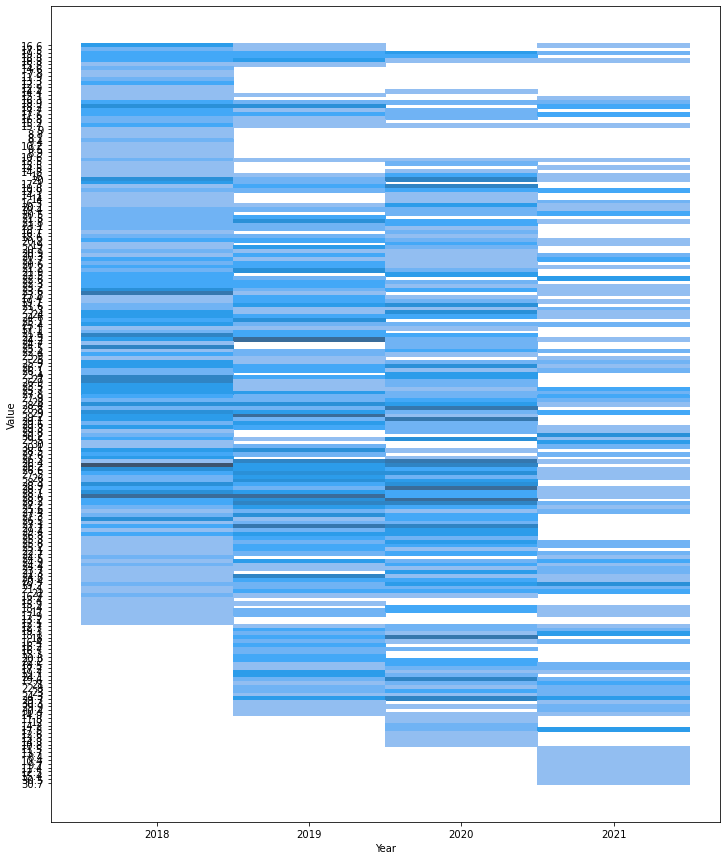

In [38]:
# Let's view the values on the charts. Can't tell much from here. Let's compare month by month data
plt.figure(figsize=(12,15))
sns.histplot(data=df_cch_temp, x="Year", y="Value")

Cell 39 to 49 are data manipulation into individual month. I wanted to do a little bit of eda comparing month by month before combining into a singular dataframe. Skip to cell 49 as these codes are very repetitive

In [39]:
df_cch_temp_Jan_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==1.0)]
df_cch_temp_Feb_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==2.0)]
df_cch_temp_Mar_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==3.0)]
df_cch_temp_Apr_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==4.0)]
df_cch_temp_May_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==5.0)]
df_cch_temp_Jun_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==6.0)]
df_cch_temp_Jul_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==7.0)]
df_cch_temp_Aug_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==8.0)]
df_cch_temp_Sep_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==9.0)]
df_cch_temp_Oct_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==10.0)]
df_cch_temp_Nov_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==11.0)]
df_cch_temp_Dec_2018 = df_cch_temp[(df_cch_temp['Year']=='2018')&(df_cch_temp['Month']==12.0)]
df_cch_temp_Jan_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==1.0)]
df_cch_temp_Feb_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==2.0)]
df_cch_temp_Mar_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==3.0)]
df_cch_temp_Apr_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==4.0)]
df_cch_temp_May_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==5.0)]
df_cch_temp_Jun_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==6.0)]
df_cch_temp_Jul_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==7.0)]
df_cch_temp_Aug_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==8.0)]
df_cch_temp_Sep_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==9.0)]
df_cch_temp_Oct_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==10.0)]
df_cch_temp_Nov_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==11.0)]
df_cch_temp_Dec_2019 = df_cch_temp[(df_cch_temp['Year']=='2019')&(df_cch_temp['Month']==12.0)]
df_cch_temp_Jan_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==1.0)]
df_cch_temp_Feb_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==2.0)]
df_cch_temp_Mar_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==3.0)]
df_cch_temp_Apr_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==4.0)]
df_cch_temp_May_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==5.0)]
df_cch_temp_Jun_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==6.0)]
df_cch_temp_Jul_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==7.0)]
df_cch_temp_Aug_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==8.0)]
df_cch_temp_Sep_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==9.0)]
df_cch_temp_Oct_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==10.0)]
df_cch_temp_Nov_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==11.0)]
df_cch_temp_Dec_2020 = df_cch_temp[(df_cch_temp['Year']=='2020')&(df_cch_temp['Month']==12.0)]
df_cch_temp_Jan_2021 = df_cch_temp[(df_cch_temp['Year']=='2021')&(df_cch_temp['Month']==1.0)]
df_cch_temp_Feb_2021 = df_cch_temp[(df_cch_temp['Year']=='2021')&(df_cch_temp['Month']==2.0)]
df_cch_temp_Mar_2021 = df_cch_temp[(df_cch_temp['Year']=='2021')&(df_cch_temp['Month']==3.0)]
df_cch_temp_Apr_2021 = df_cch_temp[(df_cch_temp['Year']=='2021')&(df_cch_temp['Month']==4.0)]
df_cch_temp_May_2021 = df_cch_temp[(df_cch_temp['Year']=='2021')&(df_cch_temp['Month']==5.0)]
df_cch_temp_Jun_2021 = df_cch_temp[(df_cch_temp['Year']=='2021')&(df_cch_temp['Month']==6.0)]

df_cch_temp_Jan_2018 = df_cch_temp_Jan_2018.reset_index(drop=True)
df_cch_temp_Feb_2018 = df_cch_temp_Feb_2018.reset_index(drop=True)
df_cch_temp_Mar_2018 = df_cch_temp_Mar_2018.reset_index(drop=True)
df_cch_temp_Apr_2018 = df_cch_temp_Apr_2018.reset_index(drop=True)
df_cch_temp_May_2018 = df_cch_temp_May_2018.reset_index(drop=True)
df_cch_temp_Jun_2018 = df_cch_temp_Jun_2018.reset_index(drop=True)
df_cch_temp_Jul_2018 = df_cch_temp_Jul_2018.reset_index(drop=True)
df_cch_temp_Aug_2018 = df_cch_temp_Aug_2018.reset_index(drop=True)
df_cch_temp_Sep_2018 = df_cch_temp_Sep_2018.reset_index(drop=True)
df_cch_temp_Oct_2018 = df_cch_temp_Oct_2018.reset_index(drop=True)
df_cch_temp_Nov_2018 = df_cch_temp_Nov_2018.reset_index(drop=True)
df_cch_temp_Dec_2018 = df_cch_temp_Dec_2018.reset_index(drop=True)
df_cch_temp_Jan_2019 = df_cch_temp_Jan_2019.reset_index(drop=True)
df_cch_temp_Feb_2019 = df_cch_temp_Feb_2019.reset_index(drop=True)
df_cch_temp_Mar_2019 = df_cch_temp_Mar_2019.reset_index(drop=True)
df_cch_temp_Apr_2019=df_cch_temp_Apr_2019.reset_index(drop=True)
df_cch_temp_May_2019=df_cch_temp_May_2019.reset_index(drop=True)
df_cch_temp_Jun_2019=df_cch_temp_Jun_2019.reset_index(drop=True)
df_cch_temp_Jul_2019=df_cch_temp_Jul_2019.reset_index(drop=True)
df_cch_temp_Aug_2019=df_cch_temp_Aug_2019.reset_index(drop=True)
df_cch_temp_Sep_2019=df_cch_temp_Sep_2019.reset_index(drop=True)
df_cch_temp_Oct_2019=df_cch_temp_Oct_2019.reset_index(drop=True)
df_cch_temp_Nov_2019=df_cch_temp_Nov_2019.reset_index(drop=True)
df_cch_temp_Dec_2019=df_cch_temp_Dec_2019.reset_index(drop=True)
df_cch_temp_Jan_2020=df_cch_temp_Jan_2020.reset_index(drop=True)
df_cch_temp_Feb_2020=df_cch_temp_Feb_2020.reset_index(drop=True)
df_cch_temp_Mar_2020=df_cch_temp_Mar_2020.reset_index(drop=True)
df_cch_temp_Apr_2020=df_cch_temp_Apr_2020.reset_index(drop=True)
df_cch_temp_May_2020=df_cch_temp_May_2020.reset_index(drop=True)
df_cch_temp_Jun_2020=df_cch_temp_Jun_2020.reset_index(drop=True)
df_cch_temp_Jul_2020=df_cch_temp_Jul_2020.reset_index(drop=True)
df_cch_temp_Aug_2020=df_cch_temp_Aug_2020.reset_index(drop=True)
df_cch_temp_Sep_2020=df_cch_temp_Sep_2020.reset_index(drop=True)
df_cch_temp_Oct_2020=df_cch_temp_Oct_2020.reset_index(drop=True)
df_cch_temp_Nov_2020=df_cch_temp_Nov_2020.reset_index(drop=True)
df_cch_temp_Dec_2020=df_cch_temp_Dec_2020.reset_index(drop=True)
df_cch_temp_Jan_2021=df_cch_temp_Jan_2021.reset_index(drop=True)
df_cch_temp_Feb_2021=df_cch_temp_Feb_2021.reset_index(drop=True)
df_cch_temp_Mar_2021=df_cch_temp_Mar_2021.reset_index(drop=True)
df_cch_temp_Apr_2021=df_cch_temp_Apr_2021.reset_index(drop=True)
df_cch_temp_May_2021=df_cch_temp_May_2021.reset_index(drop=True)
df_cch_temp_Jun_2021=df_cch_temp_Jun_2021.reset_index(drop=True)

In [40]:
df_hka_temp_Jan_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==1.0)]
df_hka_temp_Feb_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==2.0)]
df_hka_temp_Mar_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==3.0)]
df_hka_temp_Apr_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==4.0)]
df_hka_temp_May_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==5.0)]
df_hka_temp_Jun_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==6.0)]
df_hka_temp_Jul_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==7.0)]
df_hka_temp_Aug_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==8.0)]
df_hka_temp_Sep_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==9.0)]
df_hka_temp_Oct_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==10.0)]
df_hka_temp_Nov_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==11.0)]
df_hka_temp_Dec_2018 = df_hka_temp[(df_hka_temp['Year']=='2018')&(df_hka_temp['Month']==12.0)]
df_hka_temp_Jan_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==1.0)]
df_hka_temp_Feb_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==2.0)]
df_hka_temp_Mar_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==3.0)]
df_hka_temp_Apr_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==4.0)]
df_hka_temp_May_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==5.0)]
df_hka_temp_Jun_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==6.0)]
df_hka_temp_Jul_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==7.0)]
df_hka_temp_Aug_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==8.0)]
df_hka_temp_Sep_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==9.0)]
df_hka_temp_Oct_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==10.0)]
df_hka_temp_Nov_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==11.0)]
df_hka_temp_Dec_2019 = df_hka_temp[(df_hka_temp['Year']=='2019')&(df_hka_temp['Month']==12.0)]
df_hka_temp_Jan_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==1.0)]
df_hka_temp_Feb_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==2.0)]
df_hka_temp_Mar_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==3.0)]
df_hka_temp_Apr_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==4.0)]
df_hka_temp_May_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==5.0)]
df_hka_temp_Jun_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==6.0)]
df_hka_temp_Jul_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==7.0)]
df_hka_temp_Aug_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==8.0)]
df_hka_temp_Sep_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==9.0)]
df_hka_temp_Oct_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==10.0)]
df_hka_temp_Nov_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==11.0)]
df_hka_temp_Dec_2020 = df_hka_temp[(df_hka_temp['Year']=='2020')&(df_hka_temp['Month']==12.0)]
df_hka_temp_Jan_2021 = df_hka_temp[(df_hka_temp['Year']=='2021')&(df_hka_temp['Month']==1.0)]
df_hka_temp_Feb_2021 = df_hka_temp[(df_hka_temp['Year']=='2021')&(df_hka_temp['Month']==2.0)]
df_hka_temp_Mar_2021 = df_hka_temp[(df_hka_temp['Year']=='2021')&(df_hka_temp['Month']==3.0)]
df_hka_temp_Apr_2021 = df_hka_temp[(df_hka_temp['Year']=='2021')&(df_hka_temp['Month']==4.0)]
df_hka_temp_May_2021 = df_hka_temp[(df_hka_temp['Year']=='2021')&(df_hka_temp['Month']==5.0)]
df_hka_temp_Jun_2021 = df_hka_temp[(df_hka_temp['Year']=='2021')&(df_hka_temp['Month']==6.0)]

df_hka_temp_Jan_2018=df_hka_temp_Jan_2018.reset_index(drop=True)
df_hka_temp_Feb_2018=df_hka_temp_Feb_2018.reset_index(drop=True)
df_hka_temp_Mar_2018=df_hka_temp_Mar_2018.reset_index(drop=True)
df_hka_temp_Apr_2018=df_hka_temp_Apr_2018.reset_index(drop=True)
df_hka_temp_May_2018=df_hka_temp_May_2018.reset_index(drop=True)
df_hka_temp_Jun_2018=df_hka_temp_Jun_2018.reset_index(drop=True)
df_hka_temp_Jul_2018=df_hka_temp_Jul_2018.reset_index(drop=True)
df_hka_temp_Aug_2018=df_hka_temp_Aug_2018.reset_index(drop=True)
df_hka_temp_Sep_2018=df_hka_temp_Sep_2018.reset_index(drop=True)
df_hka_temp_Oct_2018=df_hka_temp_Oct_2018.reset_index(drop=True)
df_hka_temp_Nov_2018=df_hka_temp_Nov_2018.reset_index(drop=True)
df_hka_temp_Dec_2018=df_hka_temp_Dec_2018.reset_index(drop=True)
df_hka_temp_Jan_2019=df_hka_temp_Jan_2019.reset_index(drop=True)
df_hka_temp_Feb_2019=df_hka_temp_Feb_2019.reset_index(drop=True)
df_hka_temp_Mar_2019=df_hka_temp_Mar_2019.reset_index(drop=True)
df_hka_temp_Apr_2019=df_hka_temp_Apr_2019.reset_index(drop=True)
df_hka_temp_May_2019=df_hka_temp_May_2019.reset_index(drop=True)
df_hka_temp_Jun_2019=df_hka_temp_Jun_2019.reset_index(drop=True)
df_hka_temp_Jul_2019=df_hka_temp_Jul_2019.reset_index(drop=True)
df_hka_temp_Aug_2019=df_hka_temp_Aug_2019.reset_index(drop=True)
df_hka_temp_Sep_2019=df_hka_temp_Sep_2019.reset_index(drop=True)
df_hka_temp_Oct_2019=df_hka_temp_Oct_2019.reset_index(drop=True)
df_hka_temp_Nov_2019=df_hka_temp_Nov_2019.reset_index(drop=True)
df_hka_temp_Dec_2019=df_hka_temp_Dec_2019.reset_index(drop=True)
df_hka_temp_Jan_2020=df_hka_temp_Jan_2020.reset_index(drop=True)
df_hka_temp_Feb_2020=df_hka_temp_Feb_2020.reset_index(drop=True)
df_hka_temp_Mar_2020=df_hka_temp_Mar_2020.reset_index(drop=True)
df_hka_temp_Apr_2020=df_hka_temp_Apr_2020.reset_index(drop=True)
df_hka_temp_May_2020=df_hka_temp_May_2020.reset_index(drop=True)
df_hka_temp_Jun_2020=df_hka_temp_Jun_2020.reset_index(drop=True)
df_hka_temp_Jul_2020=df_hka_temp_Jul_2020.reset_index(drop=True)
df_hka_temp_Aug_2020=df_hka_temp_Aug_2020.reset_index(drop=True)
df_hka_temp_Sep_2020=df_hka_temp_Sep_2020.reset_index(drop=True)
df_hka_temp_Oct_2020=df_hka_temp_Oct_2020.reset_index(drop=True)
df_hka_temp_Nov_2020=df_hka_temp_Nov_2020.reset_index(drop=True)
df_hka_temp_Dec_2020=df_hka_temp_Dec_2020.reset_index(drop=True)
df_hka_temp_Jan_2021=df_hka_temp_Jan_2021.reset_index(drop=True)
df_hka_temp_Feb_2021=df_hka_temp_Feb_2021.reset_index(drop=True)
df_hka_temp_Mar_2021=df_hka_temp_Mar_2021.reset_index(drop=True)
df_hka_temp_Apr_2021=df_hka_temp_Apr_2021.reset_index(drop=True)
df_hka_temp_May_2021=df_hka_temp_May_2021.reset_index(drop=True)
df_hka_temp_Jun_2021=df_hka_temp_Jun_2021.reset_index(drop=True)

In [41]:
df_kp_temp_Jan_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==1.0)]
df_kp_temp_Feb_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==2.0)]
df_kp_temp_Mar_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==3.0)]
df_kp_temp_Apr_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==4.0)]
df_kp_temp_May_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==5.0)]
df_kp_temp_Jun_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==6.0)]
df_kp_temp_Jul_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==7.0)]
df_kp_temp_Aug_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==8.0)]
df_kp_temp_Sep_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==9.0)]
df_kp_temp_Oct_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==10.0)]
df_kp_temp_Nov_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==11.0)]
df_kp_temp_Dec_2018 = df_kp_temp[(df_kp_temp['Year']=='2018')&(df_kp_temp['Month']==12.0)]
df_kp_temp_Jan_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==1.0)]
df_kp_temp_Feb_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==2.0)]
df_kp_temp_Mar_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==3.0)]
df_kp_temp_Apr_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==4.0)]
df_kp_temp_May_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==5.0)]
df_kp_temp_Jun_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==6.0)]
df_kp_temp_Jul_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==7.0)]
df_kp_temp_Aug_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==8.0)]
df_kp_temp_Sep_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==9.0)]
df_kp_temp_Oct_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==10.0)]
df_kp_temp_Nov_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==11.0)]
df_kp_temp_Dec_2019 = df_kp_temp[(df_kp_temp['Year']=='2019')&(df_kp_temp['Month']==12.0)]
df_kp_temp_Jan_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==1.0)]
df_kp_temp_Feb_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==2.0)]
df_kp_temp_Mar_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==3.0)]
df_kp_temp_Apr_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==4.0)]
df_kp_temp_May_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==5.0)]
df_kp_temp_Jun_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==6.0)]
df_kp_temp_Jul_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==7.0)]
df_kp_temp_Aug_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==8.0)]
df_kp_temp_Sep_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==9.0)]
df_kp_temp_Oct_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==10.0)]
df_kp_temp_Nov_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==11.0)]
df_kp_temp_Dec_2020 = df_kp_temp[(df_kp_temp['Year']=='2020')&(df_kp_temp['Month']==12.0)]
df_kp_temp_Jan_2021 = df_kp_temp[(df_kp_temp['Year']=='2021')&(df_kp_temp['Month']==1.0)]
df_kp_temp_Feb_2021 = df_kp_temp[(df_kp_temp['Year']=='2021')&(df_kp_temp['Month']==2.0)]
df_kp_temp_Mar_2021 = df_kp_temp[(df_kp_temp['Year']=='2021')&(df_kp_temp['Month']==3.0)]
df_kp_temp_Apr_2021 = df_kp_temp[(df_kp_temp['Year']=='2021')&(df_kp_temp['Month']==4.0)]
df_kp_temp_May_2021 = df_kp_temp[(df_kp_temp['Year']=='2021')&(df_kp_temp['Month']==5.0)]
df_kp_temp_Jun_2021 = df_kp_temp[(df_kp_temp['Year']=='2021')&(df_kp_temp['Month']==6.0)]

df_kp_temp_Jan_2018=df_kp_temp_Jan_2018.reset_index(drop=True)
df_kp_temp_Feb_2018=df_kp_temp_Feb_2018.reset_index(drop=True)
df_kp_temp_Mar_2018=df_kp_temp_Mar_2018.reset_index(drop=True)
df_kp_temp_Apr_2018=df_kp_temp_Apr_2018.reset_index(drop=True)
df_kp_temp_May_2018=df_kp_temp_May_2018.reset_index(drop=True)
df_kp_temp_Jun_2018=df_kp_temp_Jun_2018.reset_index(drop=True)
df_kp_temp_Jul_2018=df_kp_temp_Jul_2018.reset_index(drop=True)
df_kp_temp_Aug_2018=df_kp_temp_Aug_2018.reset_index(drop=True)
df_kp_temp_Sep_2018=df_kp_temp_Sep_2018.reset_index(drop=True)
df_kp_temp_Oct_2018=df_kp_temp_Oct_2018.reset_index(drop=True)
df_kp_temp_Nov_2018=df_kp_temp_Nov_2018.reset_index(drop=True)
df_kp_temp_Dec_2018=df_kp_temp_Dec_2018.reset_index(drop=True)
df_kp_temp_Jan_2019=df_kp_temp_Jan_2019.reset_index(drop=True)
df_kp_temp_Feb_2019=df_kp_temp_Feb_2019.reset_index(drop=True)
df_kp_temp_Mar_2019=df_kp_temp_Mar_2019.reset_index(drop=True)
df_kp_temp_Apr_2019=df_kp_temp_Apr_2019.reset_index(drop=True)
df_kp_temp_May_2019=df_kp_temp_May_2019.reset_index(drop=True)
df_kp_temp_Jun_2019=df_kp_temp_Jun_2019.reset_index(drop=True)
df_kp_temp_Jul_2019=df_kp_temp_Jul_2019.reset_index(drop=True)
df_kp_temp_Aug_2019=df_kp_temp_Aug_2019.reset_index(drop=True)
df_kp_temp_Sep_2019=df_kp_temp_Sep_2019.reset_index(drop=True)
df_kp_temp_Oct_2019=df_kp_temp_Oct_2019.reset_index(drop=True)
df_kp_temp_Nov_2019=df_kp_temp_Nov_2019.reset_index(drop=True)
df_kp_temp_Dec_2019=df_kp_temp_Dec_2019.reset_index(drop=True)
df_kp_temp_Jan_2020=df_kp_temp_Jan_2020.reset_index(drop=True)
df_kp_temp_Feb_2020=df_kp_temp_Feb_2020.reset_index(drop=True)
df_kp_temp_Mar_2020=df_kp_temp_Mar_2020.reset_index(drop=True)
df_kp_temp_Apr_2020=df_kp_temp_Apr_2020.reset_index(drop=True)
df_kp_temp_May_2020=df_kp_temp_May_2020.reset_index(drop=True)
df_kp_temp_Jun_2020=df_kp_temp_Jun_2020.reset_index(drop=True)
df_kp_temp_Jul_2020=df_kp_temp_Jul_2020.reset_index(drop=True)
df_kp_temp_Aug_2020=df_kp_temp_Aug_2020.reset_index(drop=True)
df_kp_temp_Sep_2020=df_kp_temp_Sep_2020.reset_index(drop=True)
df_kp_temp_Oct_2020=df_kp_temp_Oct_2020.reset_index(drop=True)
df_kp_temp_Nov_2020=df_kp_temp_Nov_2020.reset_index(drop=True)
df_kp_temp_Dec_2020=df_kp_temp_Dec_2020.reset_index(drop=True)
df_kp_temp_Jan_2021=df_kp_temp_Jan_2021.reset_index(drop=True)
df_kp_temp_Feb_2021=df_kp_temp_Feb_2021.reset_index(drop=True)
df_kp_temp_Mar_2021=df_kp_temp_Mar_2021.reset_index(drop=True)
df_kp_temp_Apr_2021=df_kp_temp_Apr_2021.reset_index(drop=True)
df_kp_temp_May_2021=df_kp_temp_May_2021.reset_index(drop=True)
df_kp_temp_Jun_2021=df_kp_temp_Jun_2021.reset_index(drop=True)

In [42]:
df_cch_max_temp_Jan_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==6.0)]
df_cch_max_temp_Jul_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==7.0)]
df_cch_max_temp_Aug_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==8.0)]
df_cch_max_temp_Sep_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==9.0)]
df_cch_max_temp_Oct_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==10.0)]
df_cch_max_temp_Nov_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==11.0)]
df_cch_max_temp_Dec_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==12.0)]
df_cch_max_temp_Jan_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==6.0)]
df_cch_max_temp_Jul_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==7.0)]
df_cch_max_temp_Aug_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==8.0)]
df_cch_max_temp_Sep_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==9.0)]
df_cch_max_temp_Oct_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==10.0)]
df_cch_max_temp_Nov_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==11.0)]
df_cch_max_temp_Dec_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==12.0)]
df_cch_max_temp_Jan_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==6.0)]
df_cch_max_temp_Jul_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==7.0)]
df_cch_max_temp_Aug_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==8.0)]
df_cch_max_temp_Sep_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==9.0)]
df_cch_max_temp_Oct_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==10.0)]
df_cch_max_temp_Nov_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==11.0)]
df_cch_max_temp_Dec_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==12.0)]
df_cch_max_temp_Jan_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==6.0)]

df_cch_max_temp_Jan_2018=df_cch_max_temp_Jan_2018.reset_index(drop=True)
df_cch_max_temp_Feb_2018=df_cch_max_temp_Feb_2018.reset_index(drop=True)
df_cch_max_temp_Mar_2018=df_cch_max_temp_Mar_2018.reset_index(drop=True)
df_cch_max_temp_Apr_2018=df_cch_max_temp_Apr_2018.reset_index(drop=True)
df_cch_max_temp_May_2018=df_cch_max_temp_May_2018.reset_index(drop=True)
df_cch_max_temp_Jun_2018=df_cch_max_temp_Jun_2018.reset_index(drop=True)
df_cch_max_temp_Jul_2018=df_cch_max_temp_Jul_2018.reset_index(drop=True)
df_cch_max_temp_Aug_2018=df_cch_max_temp_Aug_2018.reset_index(drop=True)
df_cch_max_temp_Sep_2018=df_cch_max_temp_Sep_2018.reset_index(drop=True)
df_cch_max_temp_Oct_2018=df_cch_max_temp_Oct_2018.reset_index(drop=True)
df_cch_max_temp_Nov_2018=df_cch_max_temp_Nov_2018.reset_index(drop=True)
df_cch_max_temp_Dec_2018=df_cch_max_temp_Dec_2018.reset_index(drop=True)
df_cch_max_temp_Jan_2019=df_cch_max_temp_Jan_2019.reset_index(drop=True)
df_cch_max_temp_Feb_2019=df_cch_max_temp_Feb_2019.reset_index(drop=True)
df_cch_max_temp_Mar_2019=df_cch_max_temp_Mar_2019.reset_index(drop=True)
df_cch_max_temp_Apr_2019=df_cch_max_temp_Apr_2019.reset_index(drop=True)
df_cch_max_temp_May_2019=df_cch_max_temp_May_2019.reset_index(drop=True)
df_cch_max_temp_Jun_2019=df_cch_max_temp_Jun_2019.reset_index(drop=True)
df_cch_max_temp_Jul_2019=df_cch_max_temp_Jul_2019.reset_index(drop=True)
df_cch_max_temp_Aug_2019=df_cch_max_temp_Aug_2019.reset_index(drop=True)
df_cch_max_temp_Sep_2019=df_cch_max_temp_Sep_2019.reset_index(drop=True)
df_cch_max_temp_Oct_2019=df_cch_max_temp_Oct_2019.reset_index(drop=True)
df_cch_max_temp_Nov_2019=df_cch_max_temp_Nov_2019.reset_index(drop=True)
df_cch_max_temp_Dec_2019=df_cch_max_temp_Dec_2019.reset_index(drop=True)
df_cch_max_temp_Jan_2020=df_cch_max_temp_Jan_2020.reset_index(drop=True)
df_cch_max_temp_Feb_2020=df_cch_max_temp_Feb_2020.reset_index(drop=True)
df_cch_max_temp_Mar_2020=df_cch_max_temp_Mar_2020.reset_index(drop=True)
df_cch_max_temp_Apr_2020=df_cch_max_temp_Apr_2020.reset_index(drop=True)
df_cch_max_temp_May_2020=df_cch_max_temp_May_2020.reset_index(drop=True)
df_cch_max_temp_Jun_2020=df_cch_max_temp_Jun_2020.reset_index(drop=True)
df_cch_max_temp_Jul_2020=df_cch_max_temp_Jul_2020.reset_index(drop=True)
df_cch_max_temp_Aug_2020=df_cch_max_temp_Aug_2020.reset_index(drop=True)
df_cch_max_temp_Sep_2020=df_cch_max_temp_Sep_2020.reset_index(drop=True)
df_cch_max_temp_Oct_2020=df_cch_max_temp_Oct_2020.reset_index(drop=True)
df_cch_max_temp_Nov_2020=df_cch_max_temp_Nov_2020.reset_index(drop=True)
df_cch_max_temp_Dec_2020=df_cch_max_temp_Dec_2020.reset_index(drop=True)
df_cch_max_temp_Jan_2021=df_cch_max_temp_Jan_2021.reset_index(drop=True)
df_cch_max_temp_Feb_2021=df_cch_max_temp_Feb_2021.reset_index(drop=True)
df_cch_max_temp_Mar_2021=df_cch_max_temp_Mar_2021.reset_index(drop=True)
df_cch_max_temp_Apr_2021=df_cch_max_temp_Apr_2021.reset_index(drop=True)
df_cch_max_temp_May_2021=df_cch_max_temp_May_2021.reset_index(drop=True)
df_cch_max_temp_Jun_2021=df_cch_max_temp_Jun_2021.reset_index(drop=True)

In [43]:
df_hka_max_temp_Jan_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==6.0)]
df_hka_max_temp_Jul_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==7.0)]
df_hka_max_temp_Aug_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==8.0)]
df_hka_max_temp_Sep_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==9.0)]
df_hka_max_temp_Oct_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==10.0)]
df_hka_max_temp_Nov_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==11.0)]
df_hka_max_temp_Dec_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==12.0)]
df_hka_max_temp_Jan_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==6.0)]
df_hka_max_temp_Jul_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==7.0)]
df_hka_max_temp_Aug_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==8.0)]
df_hka_max_temp_Sep_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==9.0)]
df_hka_max_temp_Oct_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==10.0)]
df_hka_max_temp_Nov_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==11.0)]
df_hka_max_temp_Dec_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==12.0)]
df_hka_max_temp_Jan_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==6.0)]
df_hka_max_temp_Jul_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==7.0)]
df_hka_max_temp_Aug_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==8.0)]
df_hka_max_temp_Sep_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==9.0)]
df_hka_max_temp_Oct_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==10.0)]
df_hka_max_temp_Nov_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==11.0)]
df_hka_max_temp_Dec_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==12.0)]
df_hka_max_temp_Jan_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==6.0)]

df_hka_max_temp_Jan_2018=df_hka_max_temp_Jan_2018.reset_index(drop=True)
df_hka_max_temp_Feb_2018=df_hka_max_temp_Feb_2018.reset_index(drop=True)
df_hka_max_temp_Mar_2018=df_hka_max_temp_Mar_2018.reset_index(drop=True)
df_hka_max_temp_Apr_2018=df_hka_max_temp_Apr_2018.reset_index(drop=True)
df_hka_max_temp_May_2018=df_hka_max_temp_May_2018.reset_index(drop=True)
df_hka_max_temp_Jun_2018=df_hka_max_temp_Jun_2018.reset_index(drop=True)
df_hka_max_temp_Jul_2018=df_hka_max_temp_Jul_2018.reset_index(drop=True)
df_hka_max_temp_Aug_2018=df_hka_max_temp_Aug_2018.reset_index(drop=True)
df_hka_max_temp_Sep_2018=df_hka_max_temp_Sep_2018.reset_index(drop=True)
df_hka_max_temp_Oct_2018=df_hka_max_temp_Oct_2018.reset_index(drop=True)
df_hka_max_temp_Nov_2018=df_hka_max_temp_Nov_2018.reset_index(drop=True)
df_hka_max_temp_Dec_2018=df_hka_max_temp_Dec_2018.reset_index(drop=True)
df_hka_max_temp_Jan_2019=df_hka_max_temp_Jan_2019.reset_index(drop=True)
df_hka_max_temp_Feb_2019=df_hka_max_temp_Feb_2019.reset_index(drop=True)
df_hka_max_temp_Mar_2019=df_hka_max_temp_Mar_2019.reset_index(drop=True)
df_hka_max_temp_Apr_2019=df_hka_max_temp_Apr_2019.reset_index(drop=True)
df_hka_max_temp_May_2019=df_hka_max_temp_May_2019.reset_index(drop=True)
df_hka_max_temp_Jun_2019=df_hka_max_temp_Jun_2019.reset_index(drop=True)
df_hka_max_temp_Jul_2019=df_hka_max_temp_Jul_2019.reset_index(drop=True)
df_hka_max_temp_Aug_2019=df_hka_max_temp_Aug_2019.reset_index(drop=True)
df_hka_max_temp_Sep_2019=df_hka_max_temp_Sep_2019.reset_index(drop=True)
df_hka_max_temp_Oct_2019=df_hka_max_temp_Oct_2019.reset_index(drop=True)
df_hka_max_temp_Nov_2019=df_hka_max_temp_Nov_2019.reset_index(drop=True)
df_hka_max_temp_Dec_2019=df_hka_max_temp_Dec_2019.reset_index(drop=True)
df_hka_max_temp_Jan_2020=df_hka_max_temp_Jan_2020.reset_index(drop=True)
df_hka_max_temp_Feb_2020=df_hka_max_temp_Feb_2020.reset_index(drop=True)
df_hka_max_temp_Mar_2020=df_hka_max_temp_Mar_2020.reset_index(drop=True)
df_hka_max_temp_Apr_2020=df_hka_max_temp_Apr_2020.reset_index(drop=True)
df_hka_max_temp_May_2020=df_hka_max_temp_May_2020.reset_index(drop=True)
df_hka_max_temp_Jun_2020=df_hka_max_temp_Jun_2020.reset_index(drop=True)
df_hka_max_temp_Jul_2020=df_hka_max_temp_Jul_2020.reset_index(drop=True)
df_hka_max_temp_Aug_2020=df_hka_max_temp_Aug_2020.reset_index(drop=True)
df_hka_max_temp_Sep_2020=df_hka_max_temp_Sep_2020.reset_index(drop=True)
df_hka_max_temp_Oct_2020=df_hka_max_temp_Oct_2020.reset_index(drop=True)
df_hka_max_temp_Nov_2020=df_hka_max_temp_Nov_2020.reset_index(drop=True)
df_hka_max_temp_Dec_2020=df_hka_max_temp_Dec_2020.reset_index(drop=True)
df_hka_max_temp_Jan_2021=df_hka_max_temp_Jan_2021.reset_index(drop=True)
df_hka_max_temp_Feb_2021=df_hka_max_temp_Feb_2021.reset_index(drop=True)
df_hka_max_temp_Mar_2021=df_hka_max_temp_Mar_2021.reset_index(drop=True)
df_hka_max_temp_Apr_2021=df_hka_max_temp_Apr_2021.reset_index(drop=True)
df_hka_max_temp_May_2021=df_hka_max_temp_May_2021.reset_index(drop=True)
df_hka_max_temp_Jun_2021=df_hka_max_temp_Jun_2021.reset_index(drop=True)

In [44]:
df_kp_max_temp_Jan_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==6.0)]
df_kp_max_temp_Jul_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==7.0)]
df_kp_max_temp_Aug_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==8.0)]
df_kp_max_temp_Sep_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==9.0)]
df_kp_max_temp_Oct_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==10.0)]
df_kp_max_temp_Nov_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==11.0)]
df_kp_max_temp_Dec_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==12.0)]
df_kp_max_temp_Jan_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==6.0)]
df_kp_max_temp_Jul_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==7.0)]
df_kp_max_temp_Aug_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==8.0)]
df_kp_max_temp_Sep_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==9.0)]
df_kp_max_temp_Oct_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==10.0)]
df_kp_max_temp_Nov_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==11.0)]
df_kp_max_temp_Dec_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==12.0)]
df_kp_max_temp_Jan_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==6.0)]
df_kp_max_temp_Jul_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==7.0)]
df_kp_max_temp_Aug_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==8.0)]
df_kp_max_temp_Sep_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==9.0)]
df_kp_max_temp_Oct_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==10.0)]
df_kp_max_temp_Nov_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==11.0)]
df_kp_max_temp_Dec_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==12.0)]
df_kp_max_temp_Jan_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==6.0)]

df_kp_max_temp_Jan_2018=df_kp_max_temp_Jan_2018.reset_index(drop=True)
df_kp_max_temp_Feb_2018=df_kp_max_temp_Feb_2018.reset_index(drop=True)
df_kp_max_temp_Mar_2018=df_kp_max_temp_Mar_2018.reset_index(drop=True)
df_kp_max_temp_Apr_2018=df_kp_max_temp_Apr_2018.reset_index(drop=True)
df_kp_max_temp_May_2018=df_kp_max_temp_May_2018.reset_index(drop=True)
df_kp_max_temp_Jun_2018=df_kp_max_temp_Jun_2018.reset_index(drop=True)
df_kp_max_temp_Jul_2018=df_kp_max_temp_Jul_2018.reset_index(drop=True)
df_kp_max_temp_Aug_2018=df_kp_max_temp_Aug_2018.reset_index(drop=True)
df_kp_max_temp_Sep_2018=df_kp_max_temp_Sep_2018.reset_index(drop=True)
df_kp_max_temp_Oct_2018=df_kp_max_temp_Oct_2018.reset_index(drop=True)
df_kp_max_temp_Nov_2018=df_kp_max_temp_Nov_2018.reset_index(drop=True)
df_kp_max_temp_Dec_2018=df_kp_max_temp_Dec_2018.reset_index(drop=True)
df_kp_max_temp_Jan_2019=df_kp_max_temp_Jan_2019.reset_index(drop=True)
df_kp_max_temp_Feb_2019=df_kp_max_temp_Feb_2019.reset_index(drop=True)
df_kp_max_temp_Mar_2019=df_kp_max_temp_Mar_2019.reset_index(drop=True)
df_kp_max_temp_Apr_2019=df_kp_max_temp_Apr_2019.reset_index(drop=True)
df_kp_max_temp_May_2019=df_kp_max_temp_May_2019.reset_index(drop=True)
df_kp_max_temp_Jun_2019=df_kp_max_temp_Jun_2019.reset_index(drop=True)
df_kp_max_temp_Jul_2019=df_kp_max_temp_Jul_2019.reset_index(drop=True)
df_kp_max_temp_Aug_2019=df_kp_max_temp_Aug_2019.reset_index(drop=True)
df_kp_max_temp_Sep_2019=df_kp_max_temp_Sep_2019.reset_index(drop=True)
df_kp_max_temp_Oct_2019=df_kp_max_temp_Oct_2019.reset_index(drop=True)
df_kp_max_temp_Nov_2019=df_kp_max_temp_Nov_2019.reset_index(drop=True)
df_kp_max_temp_Dec_2019=df_kp_max_temp_Dec_2019.reset_index(drop=True)
df_kp_max_temp_Jan_2020=df_kp_max_temp_Jan_2020.reset_index(drop=True)
df_kp_max_temp_Feb_2020=df_kp_max_temp_Feb_2020.reset_index(drop=True)
df_kp_max_temp_Mar_2020=df_kp_max_temp_Mar_2020.reset_index(drop=True)
df_kp_max_temp_Apr_2020=df_kp_max_temp_Apr_2020.reset_index(drop=True)
df_kp_max_temp_May_2020=df_kp_max_temp_May_2020.reset_index(drop=True)
df_kp_max_temp_Jun_2020=df_kp_max_temp_Jun_2020.reset_index(drop=True)
df_kp_max_temp_Jul_2020=df_kp_max_temp_Jul_2020.reset_index(drop=True)
df_kp_max_temp_Aug_2020=df_kp_max_temp_Aug_2020.reset_index(drop=True)
df_kp_max_temp_Sep_2020=df_kp_max_temp_Sep_2020.reset_index(drop=True)
df_kp_max_temp_Oct_2020=df_kp_max_temp_Oct_2020.reset_index(drop=True)
df_kp_max_temp_Nov_2020=df_kp_max_temp_Nov_2020.reset_index(drop=True)
df_kp_max_temp_Dec_2020=df_kp_max_temp_Dec_2020.reset_index(drop=True)
df_kp_max_temp_Jan_2021=df_kp_max_temp_Jan_2021.reset_index(drop=True)
df_kp_max_temp_Feb_2021=df_kp_max_temp_Feb_2021.reset_index(drop=True)
df_kp_max_temp_Mar_2021=df_kp_max_temp_Mar_2021.reset_index(drop=True)
df_kp_max_temp_Apr_2021=df_kp_max_temp_Apr_2021.reset_index(drop=True)
df_kp_max_temp_May_2021=df_kp_max_temp_May_2021.reset_index(drop=True)
df_kp_max_temp_Jun_2021=df_kp_max_temp_Jun_2021.reset_index(drop=True)

In [45]:
df_cch_min_temp_Jan_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==6.0)]
df_cch_min_temp_Jul_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==7.0)]
df_cch_min_temp_Aug_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==8.0)]
df_cch_min_temp_Sep_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==9.0)]
df_cch_min_temp_Oct_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==10.0)]
df_cch_min_temp_Nov_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==11.0)]
df_cch_min_temp_Dec_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==12.0)]
df_cch_min_temp_Jan_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==6.0)]
df_cch_min_temp_Jul_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==7.0)]
df_cch_min_temp_Aug_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==8.0)]
df_cch_min_temp_Sep_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==9.0)]
df_cch_min_temp_Oct_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==10.0)]
df_cch_min_temp_Nov_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==11.0)]
df_cch_min_temp_Dec_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==12.0)]
df_cch_min_temp_Jan_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==6.0)]
df_cch_min_temp_Jul_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==7.0)]
df_cch_min_temp_Aug_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==8.0)]
df_cch_min_temp_Sep_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==9.0)]
df_cch_min_temp_Oct_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==10.0)]
df_cch_min_temp_Nov_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==11.0)]
df_cch_min_temp_Dec_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==12.0)]
df_cch_min_temp_Jan_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==6.0)]

df_cch_min_temp_Jan_2018=df_cch_min_temp_Jan_2018.reset_index(drop=True)
df_cch_min_temp_Feb_2018=df_cch_min_temp_Feb_2018.reset_index(drop=True)
df_cch_min_temp_Mar_2018=df_cch_min_temp_Mar_2018.reset_index(drop=True)
df_cch_min_temp_Apr_2018=df_cch_min_temp_Apr_2018.reset_index(drop=True)
df_cch_min_temp_May_2018=df_cch_min_temp_May_2018.reset_index(drop=True)
df_cch_min_temp_Jun_2018=df_cch_min_temp_Jun_2018.reset_index(drop=True)
df_cch_min_temp_Jul_2018=df_cch_min_temp_Jul_2018.reset_index(drop=True)
df_cch_min_temp_Aug_2018=df_cch_min_temp_Aug_2018.reset_index(drop=True)
df_cch_min_temp_Sep_2018=df_cch_min_temp_Sep_2018.reset_index(drop=True)
df_cch_min_temp_Oct_2018=df_cch_min_temp_Oct_2018.reset_index(drop=True)
df_cch_min_temp_Nov_2018=df_cch_min_temp_Nov_2018.reset_index(drop=True)
df_cch_min_temp_Dec_2018=df_cch_min_temp_Dec_2018.reset_index(drop=True)
df_cch_min_temp_Jan_2019=df_cch_min_temp_Jan_2019.reset_index(drop=True)
df_cch_min_temp_Feb_2019=df_cch_min_temp_Feb_2019.reset_index(drop=True)
df_cch_min_temp_Mar_2019=df_cch_min_temp_Mar_2019.reset_index(drop=True)
df_cch_min_temp_Apr_2019=df_cch_min_temp_Apr_2019.reset_index(drop=True)
df_cch_min_temp_May_2019=df_cch_min_temp_May_2019.reset_index(drop=True)
df_cch_min_temp_Jun_2019=df_cch_min_temp_Jun_2019.reset_index(drop=True)
df_cch_min_temp_Jul_2019=df_cch_min_temp_Jul_2019.reset_index(drop=True)
df_cch_min_temp_Aug_2019=df_cch_min_temp_Aug_2019.reset_index(drop=True)
df_cch_min_temp_Sep_2019=df_cch_min_temp_Sep_2019.reset_index(drop=True)
df_cch_min_temp_Oct_2019=df_cch_min_temp_Oct_2019.reset_index(drop=True)
df_cch_min_temp_Nov_2019=df_cch_min_temp_Nov_2019.reset_index(drop=True)
df_cch_min_temp_Dec_2019=df_cch_min_temp_Dec_2019.reset_index(drop=True)
df_cch_min_temp_Jan_2020=df_cch_min_temp_Jan_2020.reset_index(drop=True)
df_cch_min_temp_Feb_2020=df_cch_min_temp_Feb_2020.reset_index(drop=True)
df_cch_min_temp_Mar_2020=df_cch_min_temp_Mar_2020.reset_index(drop=True)
df_cch_min_temp_Apr_2020=df_cch_min_temp_Apr_2020.reset_index(drop=True)
df_cch_min_temp_May_2020=df_cch_min_temp_May_2020.reset_index(drop=True)
df_cch_min_temp_Jun_2020=df_cch_min_temp_Jun_2020.reset_index(drop=True)
df_cch_min_temp_Jul_2020=df_cch_min_temp_Jul_2020.reset_index(drop=True)
df_cch_min_temp_Aug_2020=df_cch_min_temp_Aug_2020.reset_index(drop=True)
df_cch_min_temp_Sep_2020=df_cch_min_temp_Sep_2020.reset_index(drop=True)
df_cch_min_temp_Oct_2020=df_cch_min_temp_Oct_2020.reset_index(drop=True)
df_cch_min_temp_Nov_2020=df_cch_min_temp_Nov_2020.reset_index(drop=True)
df_cch_min_temp_Dec_2020=df_cch_min_temp_Dec_2020.reset_index(drop=True)
df_cch_min_temp_Jan_2021=df_cch_min_temp_Jan_2021.reset_index(drop=True)
df_cch_min_temp_Feb_2021=df_cch_min_temp_Feb_2021.reset_index(drop=True)
df_cch_min_temp_Mar_2021=df_cch_min_temp_Mar_2021.reset_index(drop=True)
df_cch_min_temp_Apr_2021=df_cch_min_temp_Apr_2021.reset_index(drop=True)
df_cch_min_temp_May_2021=df_cch_min_temp_May_2021.reset_index(drop=True)
df_cch_min_temp_Jun_2021=df_cch_min_temp_Jun_2021.reset_index(drop=True)

In [46]:
df_hka_min_temp_Jan_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==6.0)]
df_hka_min_temp_Jul_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==7.0)]
df_hka_min_temp_Aug_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==8.0)]
df_hka_min_temp_Sep_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==9.0)]
df_hka_min_temp_Oct_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==10.0)]
df_hka_min_temp_Nov_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==11.0)]
df_hka_min_temp_Dec_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==12.0)]
df_hka_min_temp_Jan_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==6.0)]
df_hka_min_temp_Jul_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==7.0)]
df_hka_min_temp_Aug_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==8.0)]
df_hka_min_temp_Sep_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==9.0)]
df_hka_min_temp_Oct_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==10.0)]
df_hka_min_temp_Nov_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==11.0)]
df_hka_min_temp_Dec_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==12.0)]
df_hka_min_temp_Jan_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==6.0)]
df_hka_min_temp_Jul_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==7.0)]
df_hka_min_temp_Aug_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==8.0)]
df_hka_min_temp_Sep_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==9.0)]
df_hka_min_temp_Oct_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==10.0)]
df_hka_min_temp_Nov_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==11.0)]
df_hka_min_temp_Dec_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==12.0)]
df_hka_min_temp_Jan_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==6.0)]

df_hka_min_temp_Jan_2018=df_hka_min_temp_Jan_2018.reset_index(drop=True)
df_hka_min_temp_Feb_2018=df_hka_min_temp_Feb_2018.reset_index(drop=True)
df_hka_min_temp_Mar_2018=df_hka_min_temp_Mar_2018.reset_index(drop=True)
df_hka_min_temp_Apr_2018=df_hka_min_temp_Apr_2018.reset_index(drop=True)
df_hka_min_temp_May_2018=df_hka_min_temp_May_2018.reset_index(drop=True)
df_hka_min_temp_Jun_2018=df_hka_min_temp_Jun_2018.reset_index(drop=True)
df_hka_min_temp_Jul_2018=df_hka_min_temp_Jul_2018.reset_index(drop=True)
df_hka_min_temp_Aug_2018=df_hka_min_temp_Aug_2018.reset_index(drop=True)
df_hka_min_temp_Sep_2018=df_hka_min_temp_Sep_2018.reset_index(drop=True)
df_hka_min_temp_Oct_2018=df_hka_min_temp_Oct_2018.reset_index(drop=True)
df_hka_min_temp_Nov_2018=df_hka_min_temp_Nov_2018.reset_index(drop=True)
df_hka_min_temp_Dec_2018=df_hka_min_temp_Dec_2018.reset_index(drop=True)
df_hka_min_temp_Jan_2019=df_hka_min_temp_Jan_2019.reset_index(drop=True)
df_hka_min_temp_Feb_2019=df_hka_min_temp_Feb_2019.reset_index(drop=True)
df_hka_min_temp_Mar_2019=df_hka_min_temp_Mar_2019.reset_index(drop=True)
df_hka_min_temp_Apr_2019=df_hka_min_temp_Apr_2019.reset_index(drop=True)
df_hka_min_temp_May_2019=df_hka_min_temp_May_2019.reset_index(drop=True)
df_hka_min_temp_Jun_2019=df_hka_min_temp_Jun_2019.reset_index(drop=True)
df_hka_min_temp_Jul_2019=df_hka_min_temp_Jul_2019.reset_index(drop=True)
df_hka_min_temp_Aug_2019=df_hka_min_temp_Aug_2019.reset_index(drop=True)
df_hka_min_temp_Sep_2019=df_hka_min_temp_Sep_2019.reset_index(drop=True)
df_hka_min_temp_Oct_2019=df_hka_min_temp_Oct_2019.reset_index(drop=True)
df_hka_min_temp_Nov_2019=df_hka_min_temp_Nov_2019.reset_index(drop=True)
df_hka_min_temp_Dec_2019=df_hka_min_temp_Dec_2019.reset_index(drop=True)
df_hka_min_temp_Jan_2020=df_hka_min_temp_Jan_2020.reset_index(drop=True)
df_hka_min_temp_Feb_2020=df_hka_min_temp_Feb_2020.reset_index(drop=True)
df_hka_min_temp_Mar_2020=df_hka_min_temp_Mar_2020.reset_index(drop=True)
df_hka_min_temp_Apr_2020=df_hka_min_temp_Apr_2020.reset_index(drop=True)
df_hka_min_temp_May_2020=df_hka_min_temp_May_2020.reset_index(drop=True)
df_hka_min_temp_Jun_2020=df_hka_min_temp_Jun_2020.reset_index(drop=True)
df_hka_min_temp_Jul_2020=df_hka_min_temp_Jul_2020.reset_index(drop=True)
df_hka_min_temp_Aug_2020=df_hka_min_temp_Aug_2020.reset_index(drop=True)
df_hka_min_temp_Sep_2020=df_hka_min_temp_Sep_2020.reset_index(drop=True)
df_hka_min_temp_Oct_2020=df_hka_min_temp_Oct_2020.reset_index(drop=True)
df_hka_min_temp_Nov_2020=df_hka_min_temp_Nov_2020.reset_index(drop=True)
df_hka_min_temp_Dec_2020=df_hka_min_temp_Dec_2020.reset_index(drop=True)
df_hka_min_temp_Jan_2021=df_hka_min_temp_Jan_2021.reset_index(drop=True)
df_hka_min_temp_Feb_2021=df_hka_min_temp_Feb_2021.reset_index(drop=True)
df_hka_min_temp_Mar_2021=df_hka_min_temp_Mar_2021.reset_index(drop=True)
df_hka_min_temp_Apr_2021=df_hka_min_temp_Apr_2021.reset_index(drop=True)
df_hka_min_temp_May_2021=df_hka_min_temp_May_2021.reset_index(drop=True)
df_hka_min_temp_Jun_2021=df_hka_min_temp_Jun_2021.reset_index(drop=True)

In [47]:
df_kp_min_temp_Jan_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==6.0)]
df_kp_min_temp_Jul_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==7.0)]
df_kp_min_temp_Aug_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==8.0)]
df_kp_min_temp_Sep_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==9.0)]
df_kp_min_temp_Oct_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==10.0)]
df_kp_min_temp_Nov_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==11.0)]
df_kp_min_temp_Dec_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==12.0)]
df_kp_min_temp_Jan_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==6.0)]
df_kp_min_temp_Jul_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==7.0)]
df_kp_min_temp_Aug_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==8.0)]
df_kp_min_temp_Sep_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==9.0)]
df_kp_min_temp_Oct_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==10.0)]
df_kp_min_temp_Nov_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==11.0)]
df_kp_min_temp_Dec_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==12.0)]
df_kp_min_temp_Jan_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==6.0)]
df_kp_min_temp_Jul_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==7.0)]
df_kp_min_temp_Aug_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==8.0)]
df_kp_min_temp_Sep_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==9.0)]
df_kp_min_temp_Oct_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==10.0)]
df_kp_min_temp_Nov_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==11.0)]
df_kp_min_temp_Dec_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==12.0)]
df_kp_min_temp_Jan_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==6.0)]

df_kp_min_temp_Jan_2018=df_kp_min_temp_Jan_2018.reset_index(drop=True)
df_kp_min_temp_Feb_2018=df_kp_min_temp_Feb_2018.reset_index(drop=True)
df_kp_min_temp_Mar_2018=df_kp_min_temp_Mar_2018.reset_index(drop=True)
df_kp_min_temp_Apr_2018=df_kp_min_temp_Apr_2018.reset_index(drop=True)
df_kp_min_temp_May_2018=df_kp_min_temp_May_2018.reset_index(drop=True)
df_kp_min_temp_Jun_2018=df_kp_min_temp_Jun_2018.reset_index(drop=True)
df_kp_min_temp_Jul_2018=df_kp_min_temp_Jul_2018.reset_index(drop=True)
df_kp_min_temp_Aug_2018=df_kp_min_temp_Aug_2018.reset_index(drop=True)
df_kp_min_temp_Sep_2018=df_kp_min_temp_Sep_2018.reset_index(drop=True)
df_kp_min_temp_Oct_2018=df_kp_min_temp_Oct_2018.reset_index(drop=True)
df_kp_min_temp_Nov_2018=df_kp_min_temp_Nov_2018.reset_index(drop=True)
df_kp_min_temp_Dec_2018=df_kp_min_temp_Dec_2018.reset_index(drop=True)
df_kp_min_temp_Jan_2019=df_kp_min_temp_Jan_2019.reset_index(drop=True)
df_kp_min_temp_Feb_2019=df_kp_min_temp_Feb_2019.reset_index(drop=True)
df_kp_min_temp_Mar_2019=df_kp_min_temp_Mar_2019.reset_index(drop=True)
df_kp_min_temp_Apr_2019=df_kp_min_temp_Apr_2019.reset_index(drop=True)
df_kp_min_temp_May_2019=df_kp_min_temp_May_2019.reset_index(drop=True)
df_kp_min_temp_Jun_2019=df_kp_min_temp_Jun_2019.reset_index(drop=True)
df_kp_min_temp_Jul_2019=df_kp_min_temp_Jul_2019.reset_index(drop=True)
df_kp_min_temp_Aug_2019=df_kp_min_temp_Aug_2019.reset_index(drop=True)
df_kp_min_temp_Sep_2019=df_kp_min_temp_Sep_2019.reset_index(drop=True)
df_kp_min_temp_Oct_2019=df_kp_min_temp_Oct_2019.reset_index(drop=True)
df_kp_min_temp_Nov_2019=df_kp_min_temp_Nov_2019.reset_index(drop=True)
df_kp_min_temp_Dec_2019=df_kp_min_temp_Dec_2019.reset_index(drop=True)
df_kp_min_temp_Jan_2020=df_kp_min_temp_Jan_2020.reset_index(drop=True)
df_kp_min_temp_Feb_2020=df_kp_min_temp_Feb_2020.reset_index(drop=True)
df_kp_min_temp_Mar_2020=df_kp_min_temp_Mar_2020.reset_index(drop=True)
df_kp_min_temp_Apr_2020=df_kp_min_temp_Apr_2020.reset_index(drop=True)
df_kp_min_temp_May_2020=df_kp_min_temp_May_2020.reset_index(drop=True)
df_kp_min_temp_Jun_2020=df_kp_min_temp_Jun_2020.reset_index(drop=True)
df_kp_min_temp_Jul_2020=df_kp_min_temp_Jul_2020.reset_index(drop=True)
df_kp_min_temp_Aug_2020=df_kp_min_temp_Aug_2020.reset_index(drop=True)
df_kp_min_temp_Sep_2020=df_kp_min_temp_Sep_2020.reset_index(drop=True)
df_kp_min_temp_Oct_2020=df_kp_min_temp_Oct_2020.reset_index(drop=True)
df_kp_min_temp_Nov_2020=df_kp_min_temp_Nov_2020.reset_index(drop=True)
df_kp_min_temp_Dec_2020=df_kp_min_temp_Dec_2020.reset_index(drop=True)
df_kp_min_temp_Jan_2021=df_kp_min_temp_Jan_2021.reset_index(drop=True)
df_kp_min_temp_Feb_2021=df_kp_min_temp_Feb_2021.reset_index(drop=True)
df_kp_min_temp_Mar_2021=df_kp_min_temp_Mar_2021.reset_index(drop=True)
df_kp_min_temp_Apr_2021=df_kp_min_temp_Apr_2021.reset_index(drop=True)
df_kp_min_temp_May_2021=df_kp_min_temp_May_2021.reset_index(drop=True)
df_kp_min_temp_Jun_2021=df_kp_min_temp_Jun_2021.reset_index(drop=True)

In [48]:
# Realized all the values are in string. Need to convert to float
# df_cch_temp_Jan_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Feb_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Mar_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Apr_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_May_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jun_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jul_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Aug_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Sep_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Oct_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Nov_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Dec_2019['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jan_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Feb_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Mar_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Apr_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_May_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jun_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jul_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Aug_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Sep_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Oct_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Nov_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Dec_2020['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jan_2021['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Feb_2021['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Mar_2021['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Apr_2021['Value'].apply(lambda x:to_float(x))
# df_cch_temp_May_2021['Value'].apply(lambda x:to_float(x))
# df_cch_temp_Jun_2021['Value'].apply(lambda x:to_float(x))

df_cch_temp_Jan_2018['Value']=pd.to_numeric(df_cch_temp_Jan_2018['Value'], downcast="float")
df_cch_temp_Feb_2018['Value']=pd.to_numeric(df_cch_temp_Feb_2018['Value'], downcast="float")
df_cch_temp_Mar_2018['Value']=pd.to_numeric(df_cch_temp_Mar_2018['Value'], downcast="float")
df_cch_temp_Apr_2018['Value']=pd.to_numeric(df_cch_temp_Apr_2018['Value'], downcast="float")
df_cch_temp_May_2018['Value']=pd.to_numeric(df_cch_temp_May_2018['Value'], downcast="float")
df_cch_temp_Jun_2018['Value']=pd.to_numeric(df_cch_temp_Jun_2018['Value'], downcast="float")
df_cch_temp_Jul_2018['Value']=pd.to_numeric(df_cch_temp_Jul_2018['Value'], downcast="float")
df_cch_temp_Aug_2018['Value']=pd.to_numeric(df_cch_temp_Aug_2018['Value'], downcast="float")
df_cch_temp_Sep_2018['Value']=pd.to_numeric(df_cch_temp_Sep_2018['Value'], downcast="float")
df_cch_temp_Oct_2018['Value']=pd.to_numeric(df_cch_temp_Oct_2018['Value'], downcast="float")
df_cch_temp_Nov_2018['Value']=pd.to_numeric(df_cch_temp_Nov_2018['Value'], downcast="float")
df_cch_temp_Dec_2018['Value']=pd.to_numeric(df_cch_temp_Dec_2018['Value'], downcast="float")
df_cch_temp_Jan_2019['Value']=pd.to_numeric(df_cch_temp_Jan_2019['Value'], downcast="float")
df_cch_temp_Feb_2019['Value']=pd.to_numeric(df_cch_temp_Feb_2019['Value'], downcast="float")
df_cch_temp_Mar_2019['Value']=pd.to_numeric(df_cch_temp_Mar_2019['Value'], downcast="float")
df_cch_temp_Apr_2019['Value']=pd.to_numeric(df_cch_temp_Apr_2019['Value'], downcast="float")
df_cch_temp_May_2019['Value']=pd.to_numeric(df_cch_temp_May_2019['Value'], downcast="float")
df_cch_temp_Jun_2019['Value']=pd.to_numeric(df_cch_temp_Jun_2019['Value'], downcast="float")
df_cch_temp_Jul_2019['Value']=pd.to_numeric(df_cch_temp_Jul_2019['Value'], downcast="float")
df_cch_temp_Aug_2019['Value']=pd.to_numeric(df_cch_temp_Aug_2019['Value'], downcast="float")
df_cch_temp_Sep_2019['Value']=pd.to_numeric(df_cch_temp_Sep_2019['Value'], downcast="float")
df_cch_temp_Oct_2019['Value']=pd.to_numeric(df_cch_temp_Oct_2019['Value'], downcast="float")
df_cch_temp_Nov_2019['Value']=pd.to_numeric(df_cch_temp_Nov_2019['Value'], downcast="float")
df_cch_temp_Dec_2019['Value']=pd.to_numeric(df_cch_temp_Dec_2019['Value'], downcast="float")
df_cch_temp_Jan_2020['Value']=pd.to_numeric(df_cch_temp_Jan_2020['Value'], downcast="float")
df_cch_temp_Feb_2020['Value']=pd.to_numeric(df_cch_temp_Feb_2020['Value'], downcast="float")
df_cch_temp_Mar_2020['Value']=pd.to_numeric(df_cch_temp_Mar_2020['Value'], downcast="float")
df_cch_temp_Apr_2020['Value']=pd.to_numeric(df_cch_temp_Apr_2020['Value'], downcast="float")
df_cch_temp_May_2020['Value']=pd.to_numeric(df_cch_temp_May_2020['Value'], downcast="float")
df_cch_temp_Jun_2020['Value']=pd.to_numeric(df_cch_temp_Jun_2020['Value'], downcast="float")
df_cch_temp_Jul_2020['Value']=pd.to_numeric(df_cch_temp_Jul_2020['Value'], downcast="float")
df_cch_temp_Aug_2020['Value']=pd.to_numeric(df_cch_temp_Aug_2020['Value'], downcast="float")
df_cch_temp_Sep_2020['Value']=pd.to_numeric(df_cch_temp_Sep_2020['Value'], downcast="float")
df_cch_temp_Oct_2020['Value']=pd.to_numeric(df_cch_temp_Oct_2020['Value'], downcast="float")
df_cch_temp_Nov_2020['Value']=pd.to_numeric(df_cch_temp_Nov_2020['Value'], downcast="float")
df_cch_temp_Dec_2020['Value']=pd.to_numeric(df_cch_temp_Dec_2020['Value'], downcast="float")
df_cch_temp_Jan_2021['Value']=pd.to_numeric(df_cch_temp_Jan_2021['Value'], downcast="float")
df_cch_temp_Feb_2021['Value']=pd.to_numeric(df_cch_temp_Feb_2021['Value'], downcast="float")
df_cch_temp_Mar_2021['Value']=pd.to_numeric(df_cch_temp_Mar_2021['Value'], downcast="float")
df_cch_temp_Apr_2021['Value']=pd.to_numeric(df_cch_temp_Apr_2021['Value'], downcast="float")
df_cch_temp_May_2021['Value']=pd.to_numeric(df_cch_temp_May_2021['Value'], downcast="float")
df_cch_temp_Jun_2021['Value']=pd.to_numeric(df_cch_temp_Jun_2021['Value'], downcast="float")

In [49]:
def check(df):
    for i in df:
        print(type(i))
# check(df_cch_temp_Jun_2021['Value'])

Comparing Month by Month temperature increases for each year. Jan 2018 vs Jan 2019 vs Jan 2020 vs Jan 2021, so on so forth. The lines do not indicate much except that the temperatures generally trend for seasonality, like Spring, Summer, Autumn and Winter.

# I want to compare Month by Month for each year temperature increase

Text(0, 0.5, 'Temperature')

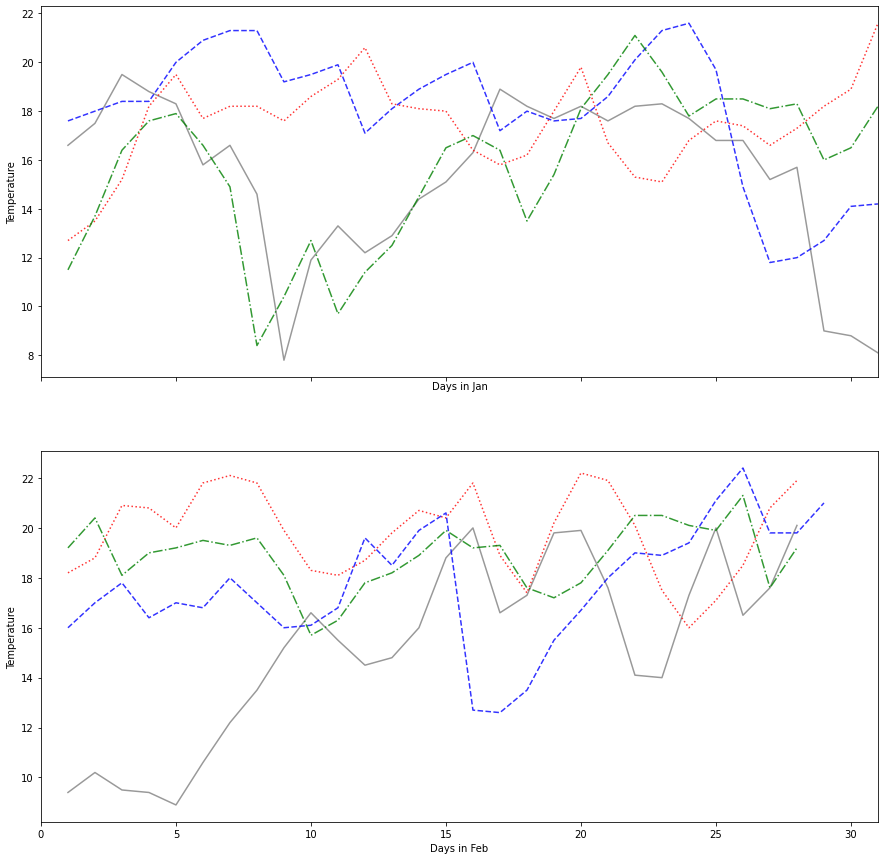

In [50]:
fig, ax = plt.subplots(2, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_Jan_2018['Day'],df_cch_temp_Jan_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_cch_temp_Jan_2019['Day'],df_cch_temp_Jan_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_cch_temp_Jan_2020['Day'],df_cch_temp_Jan_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_cch_temp_Jan_2021['Day'],df_cch_temp_Jan_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
# ax[0].set_ylim(0,30,1)
ax[0].set_xlabel('Days in Jan')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Feb_2018['Day'],df_cch_temp_Feb_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_cch_temp_Feb_2019['Day'],df_cch_temp_Feb_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_cch_temp_Feb_2020['Day'],df_cch_temp_Feb_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_cch_temp_Feb_2021['Day'],df_cch_temp_Feb_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[1].set_ylim(0,30)
ax[1].set_xlabel('Days in Feb')
ax[1].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

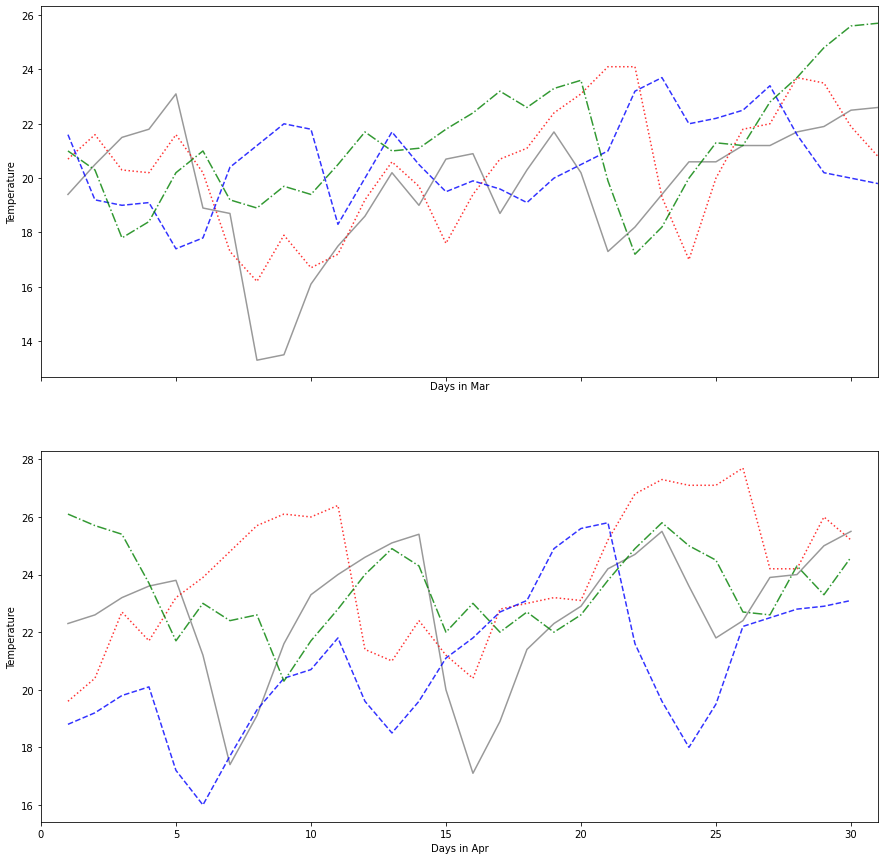

In [51]:
fig, ax = plt.subplots(2, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_Mar_2018['Day'],df_cch_temp_Mar_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_cch_temp_Mar_2019['Day'],df_cch_temp_Mar_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_cch_temp_Mar_2020['Day'],df_cch_temp_Mar_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_cch_temp_Mar_2021['Day'],df_cch_temp_Mar_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[0].set_xlabel('Days in Mar')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Apr_2018['Day'],df_cch_temp_Apr_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_cch_temp_Apr_2019['Day'],df_cch_temp_Apr_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_cch_temp_Apr_2020['Day'],df_cch_temp_Apr_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_cch_temp_Apr_2021['Day'],df_cch_temp_Apr_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[1].set_xlabel('Days in Apr')
ax[1].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

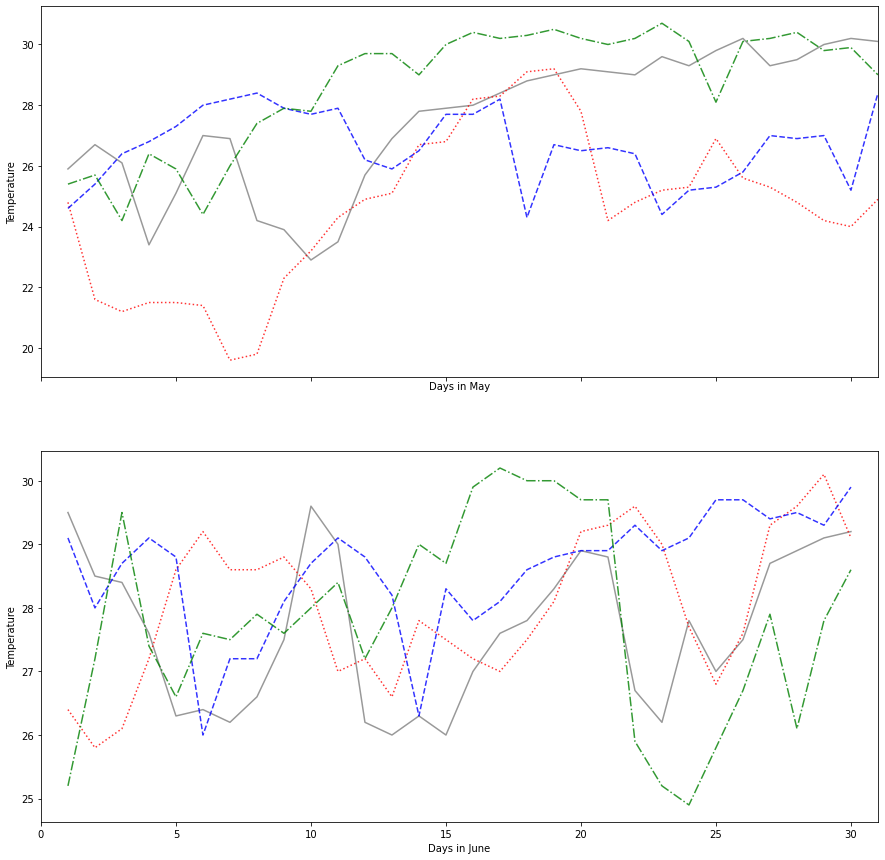

In [52]:
fig, ax = plt.subplots(2, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_May_2018['Day'],df_cch_temp_May_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_cch_temp_May_2019['Day'],df_cch_temp_May_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_cch_temp_May_2020['Day'],df_cch_temp_May_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_cch_temp_May_2021['Day'],df_cch_temp_May_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[0].set_xlabel('Days in May')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Jun_2018['Day'],df_cch_temp_Jun_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_cch_temp_Jun_2019['Day'],df_cch_temp_Jun_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_cch_temp_Jun_2020['Day'],df_cch_temp_Jun_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_cch_temp_Jun_2021['Day'],df_cch_temp_Jun_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[1].set_xlabel('Days in June')
ax[1].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

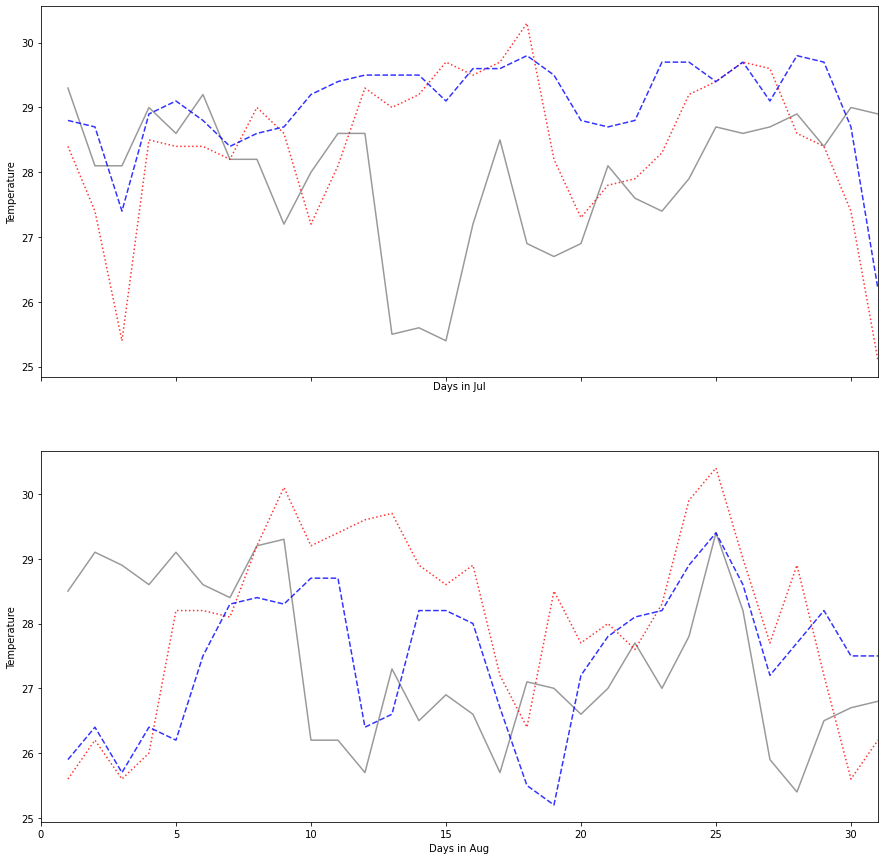

In [53]:
fig, ax = plt.subplots(2, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_Jul_2018['Day'],df_cch_temp_Jul_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_cch_temp_Jul_2019['Day'],df_cch_temp_Jul_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_cch_temp_Jul_2020['Day'],df_cch_temp_Jul_2020['Value'], color="blue", alpha=0.8, ls = '--')
# ax[0].plot(df_cch_temp_May_2021['Day'],df_cch_temp_May_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[0].set_xlabel('Days in Jul')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Aug_2018['Day'],df_cch_temp_Aug_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_cch_temp_Aug_2019['Day'],df_cch_temp_Aug_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_cch_temp_Aug_2020['Day'],df_cch_temp_Aug_2020['Value'], color="blue", alpha=0.8, ls = '--')
# ax[1].plot(df_cch_temp_Jun_2021['Day'],df_cch_temp_Jun_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[1].set_xlabel('Days in Aug')
ax[1].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

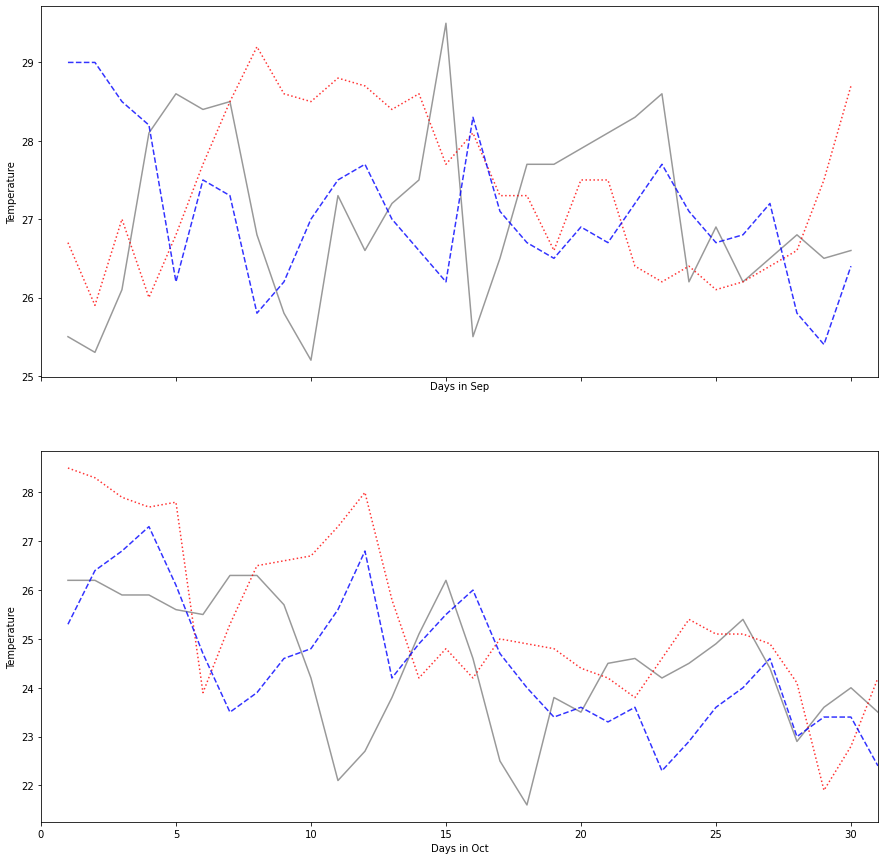

In [54]:
fig, ax = plt.subplots(2, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_Sep_2018['Day'],df_cch_temp_Sep_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_cch_temp_Sep_2019['Day'],df_cch_temp_Sep_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_cch_temp_Sep_2020['Day'],df_cch_temp_Sep_2020['Value'], color="blue", alpha=0.8, ls = '--')
# ax[0].plot(df_cch_temp_May_2021['Day'],df_cch_temp_May_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[0].set_xlabel('Days in Sep')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Oct_2018['Day'],df_cch_temp_Oct_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_cch_temp_Oct_2019['Day'],df_cch_temp_Oct_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_cch_temp_Oct_2020['Day'],df_cch_temp_Oct_2020['Value'], color="blue", alpha=0.8, ls = '--')
# ax[1].plot(df_cch_temp_Jun_2021['Day'],df_cch_temp_Jun_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[1].set_xlabel('Days in Oct')
ax[1].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

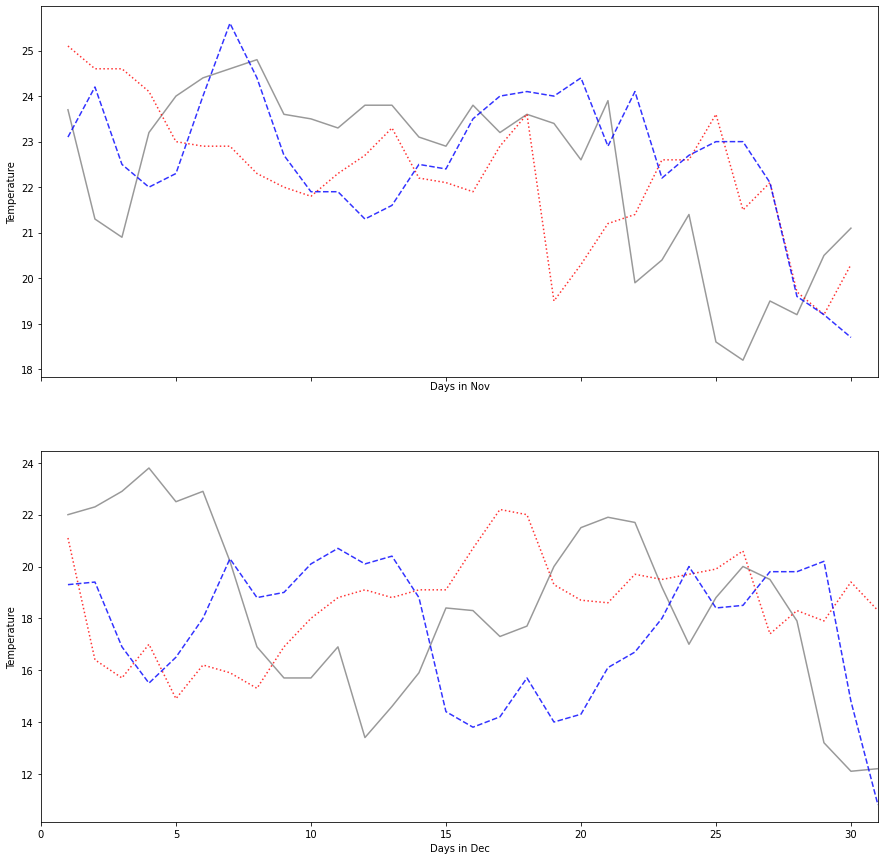

In [55]:
fig, ax = plt.subplots(2, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_Nov_2018['Day'],df_cch_temp_Nov_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_cch_temp_Nov_2019['Day'],df_cch_temp_Nov_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_cch_temp_Nov_2020['Day'],df_cch_temp_Nov_2020['Value'], color="blue", alpha=0.8, ls = '--')
# ax[0].plot(df_cch_temp_May_2021['Day'],df_cch_temp_May_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[0].set_xlabel('Days in Nov')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Dec_2018['Day'],df_cch_temp_Dec_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_cch_temp_Dec_2019['Day'],df_cch_temp_Dec_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_cch_temp_Dec_2020['Day'],df_cch_temp_Dec_2020['Value'], color="blue", alpha=0.8, ls = '--')
# ax[1].plot(df_cch_temp_Jun_2021['Day'],df_cch_temp_Jun_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[1].set_xlabel('Days in Dec')
ax[1].set_ylabel('Temperature')

Same thing done for the Hong Kong Airport Observatory

Text(0, 0.5, 'Temperature')

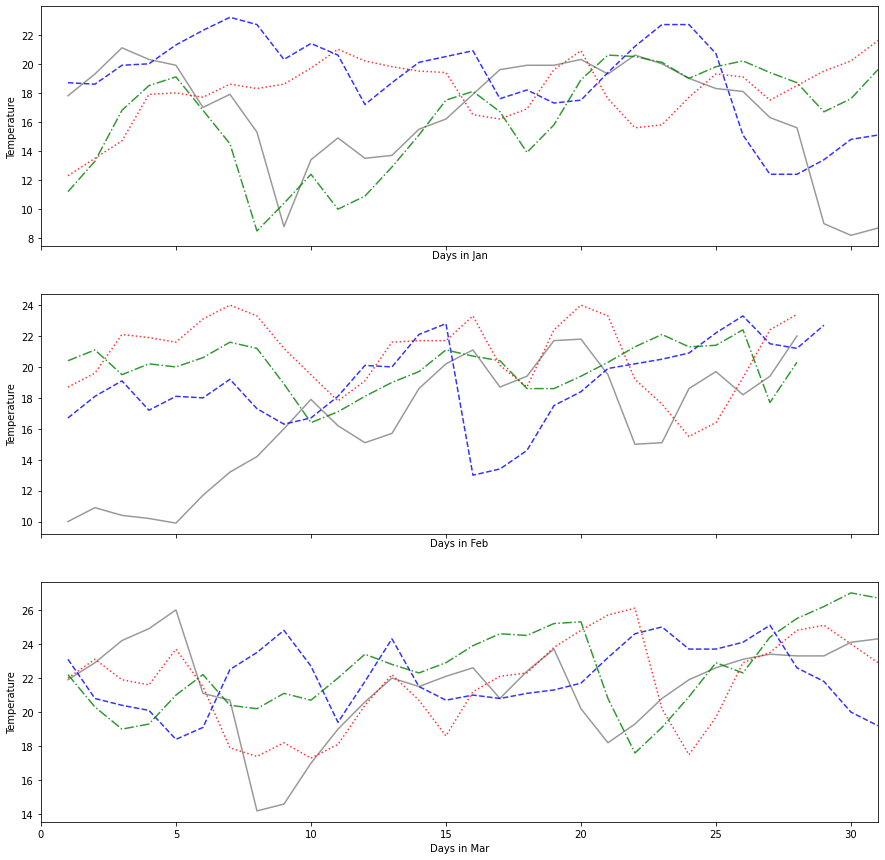

In [56]:
df_hka_temp_Jan_2018['Value']=pd.to_numeric(df_hka_temp_Jan_2018['Value'], downcast="float")
df_hka_temp_Feb_2018['Value']=pd.to_numeric(df_hka_temp_Feb_2018['Value'], downcast="float")
df_hka_temp_Mar_2018['Value']=pd.to_numeric(df_hka_temp_Mar_2018['Value'], downcast="float")
df_hka_temp_Apr_2018['Value']=pd.to_numeric(df_hka_temp_Apr_2018['Value'], downcast="float")
df_hka_temp_May_2018['Value']=pd.to_numeric(df_hka_temp_May_2018['Value'], downcast="float")
df_hka_temp_Jun_2018['Value']=pd.to_numeric(df_hka_temp_Jun_2018['Value'], downcast="float")
df_hka_temp_Jul_2018['Value']=pd.to_numeric(df_hka_temp_Jul_2018['Value'], downcast="float")
df_hka_temp_Aug_2018['Value']=pd.to_numeric(df_hka_temp_Aug_2018['Value'], downcast="float")
df_hka_temp_Sep_2018['Value']=pd.to_numeric(df_hka_temp_Sep_2018['Value'], downcast="float")
df_hka_temp_Oct_2018['Value']=pd.to_numeric(df_hka_temp_Oct_2018['Value'], downcast="float")
df_hka_temp_Nov_2018['Value']=pd.to_numeric(df_hka_temp_Nov_2018['Value'], downcast="float")
df_hka_temp_Dec_2018['Value']=pd.to_numeric(df_hka_temp_Dec_2018['Value'], downcast="float")
df_hka_temp_Jan_2019['Value']=pd.to_numeric(df_hka_temp_Jan_2019['Value'], downcast="float")
df_hka_temp_Feb_2019['Value']=pd.to_numeric(df_hka_temp_Feb_2019['Value'], downcast="float")
df_hka_temp_Mar_2019['Value']=pd.to_numeric(df_hka_temp_Mar_2019['Value'], downcast="float")
df_hka_temp_Apr_2019['Value']=pd.to_numeric(df_hka_temp_Apr_2019['Value'], downcast="float")
df_hka_temp_May_2019['Value']=pd.to_numeric(df_hka_temp_May_2019['Value'], downcast="float")
df_hka_temp_Jun_2019['Value']=pd.to_numeric(df_hka_temp_Jun_2019['Value'], downcast="float")
df_hka_temp_Jul_2019['Value']=pd.to_numeric(df_hka_temp_Jul_2019['Value'], downcast="float")
df_hka_temp_Aug_2019['Value']=pd.to_numeric(df_hka_temp_Aug_2019['Value'], downcast="float")
df_hka_temp_Sep_2019['Value']=pd.to_numeric(df_hka_temp_Sep_2019['Value'], downcast="float")
df_hka_temp_Oct_2019['Value']=pd.to_numeric(df_hka_temp_Oct_2019['Value'], downcast="float")
df_hka_temp_Nov_2019['Value']=pd.to_numeric(df_hka_temp_Nov_2019['Value'], downcast="float")
df_hka_temp_Dec_2019['Value']=pd.to_numeric(df_hka_temp_Dec_2019['Value'], downcast="float")
df_hka_temp_Jan_2020['Value']=pd.to_numeric(df_hka_temp_Jan_2020['Value'], downcast="float")
df_hka_temp_Feb_2020['Value']=pd.to_numeric(df_hka_temp_Feb_2020['Value'], downcast="float")
df_hka_temp_Mar_2020['Value']=pd.to_numeric(df_hka_temp_Mar_2020['Value'], downcast="float")
df_hka_temp_Apr_2020['Value']=pd.to_numeric(df_hka_temp_Apr_2020['Value'], downcast="float")
df_hka_temp_May_2020['Value']=pd.to_numeric(df_hka_temp_May_2020['Value'], downcast="float")
df_hka_temp_Jun_2020['Value']=pd.to_numeric(df_hka_temp_Jun_2020['Value'], downcast="float")
df_hka_temp_Jul_2020['Value']=pd.to_numeric(df_hka_temp_Jul_2020['Value'], downcast="float")
df_hka_temp_Aug_2020['Value']=pd.to_numeric(df_hka_temp_Aug_2020['Value'], downcast="float")
df_hka_temp_Sep_2020['Value']=pd.to_numeric(df_hka_temp_Sep_2020['Value'], downcast="float")
df_hka_temp_Oct_2020['Value']=pd.to_numeric(df_hka_temp_Oct_2020['Value'], downcast="float")
df_hka_temp_Nov_2020['Value']=pd.to_numeric(df_hka_temp_Nov_2020['Value'], downcast="float")
df_hka_temp_Dec_2020['Value']=pd.to_numeric(df_hka_temp_Dec_2020['Value'], downcast="float")
df_hka_temp_Jan_2021['Value']=pd.to_numeric(df_hka_temp_Jan_2021['Value'], downcast="float")
df_hka_temp_Feb_2021['Value']=pd.to_numeric(df_hka_temp_Feb_2021['Value'], downcast="float")
df_hka_temp_Mar_2021['Value']=pd.to_numeric(df_hka_temp_Mar_2021['Value'], downcast="float")
df_hka_temp_Apr_2021['Value']=pd.to_numeric(df_hka_temp_Apr_2021['Value'], downcast="float")
df_hka_temp_May_2021['Value']=pd.to_numeric(df_hka_temp_May_2021['Value'], downcast="float")
df_hka_temp_Jun_2021['Value']=pd.to_numeric(df_hka_temp_Jun_2021['Value'], downcast="float")

fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_hka_temp_Jan_2018['Day'],df_hka_temp_Jan_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_hka_temp_Jan_2019['Day'],df_hka_temp_Jan_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_hka_temp_Jan_2020['Day'],df_hka_temp_Jan_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_hka_temp_Jan_2021['Day'],df_hka_temp_Jan_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Jan')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_hka_temp_Feb_2018['Day'],df_hka_temp_Feb_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_hka_temp_Feb_2019['Day'],df_hka_temp_Feb_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_hka_temp_Feb_2020['Day'],df_hka_temp_Feb_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_hka_temp_Feb_2021['Day'],df_hka_temp_Feb_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Feb')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_hka_temp_Mar_2018['Day'],df_hka_temp_Mar_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_hka_temp_Mar_2019['Day'],df_hka_temp_Mar_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_hka_temp_Mar_2020['Day'],df_hka_temp_Mar_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].plot(df_hka_temp_Mar_2021['Day'],df_hka_temp_Mar_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Mar')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

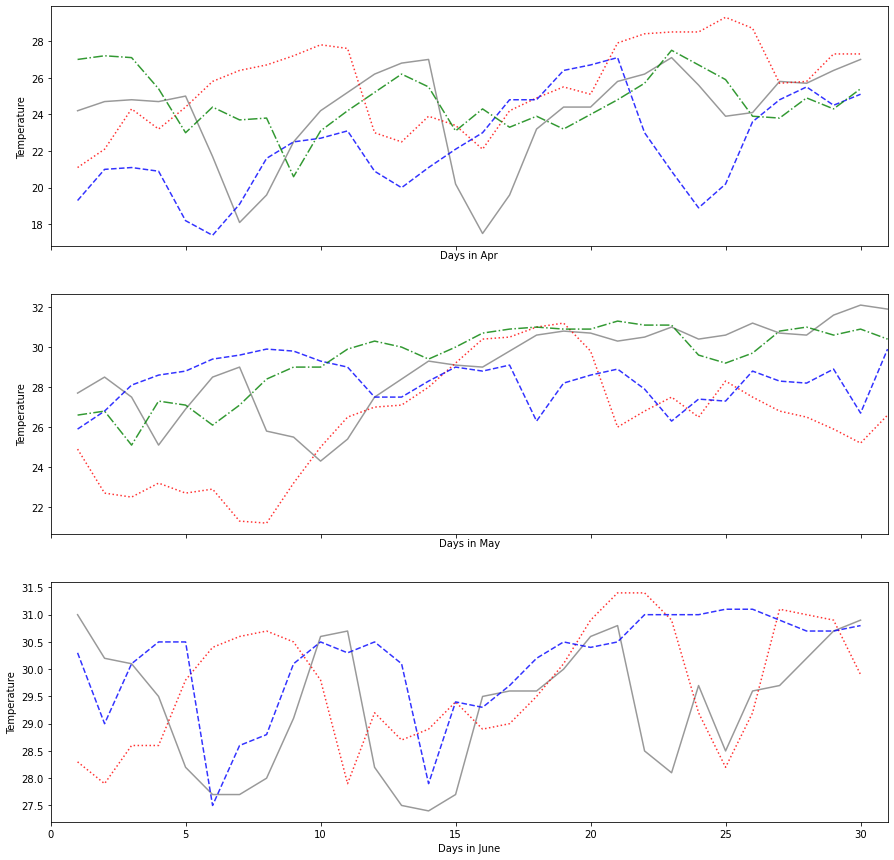

In [57]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_hka_temp_Apr_2018['Day'],df_hka_temp_Apr_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_hka_temp_Apr_2019['Day'],df_hka_temp_Apr_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_hka_temp_Apr_2020['Day'],df_hka_temp_Apr_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_hka_temp_Apr_2021['Day'],df_hka_temp_Apr_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Apr')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_hka_temp_May_2018['Day'],df_hka_temp_May_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_hka_temp_May_2019['Day'],df_hka_temp_May_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_hka_temp_May_2020['Day'],df_hka_temp_May_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_hka_temp_May_2021['Day'],df_hka_temp_May_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[1].set_xlabel('Days in May')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_hka_temp_Jun_2018['Day'],df_hka_temp_Jun_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_hka_temp_Jun_2019['Day'],df_hka_temp_Jun_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_hka_temp_Jun_2020['Day'],df_hka_temp_Jun_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].plot(df_hka_temp_Jun_2021['Day'],df_hka_temp_Jun_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[2].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[2].set_xlabel('Days in June')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

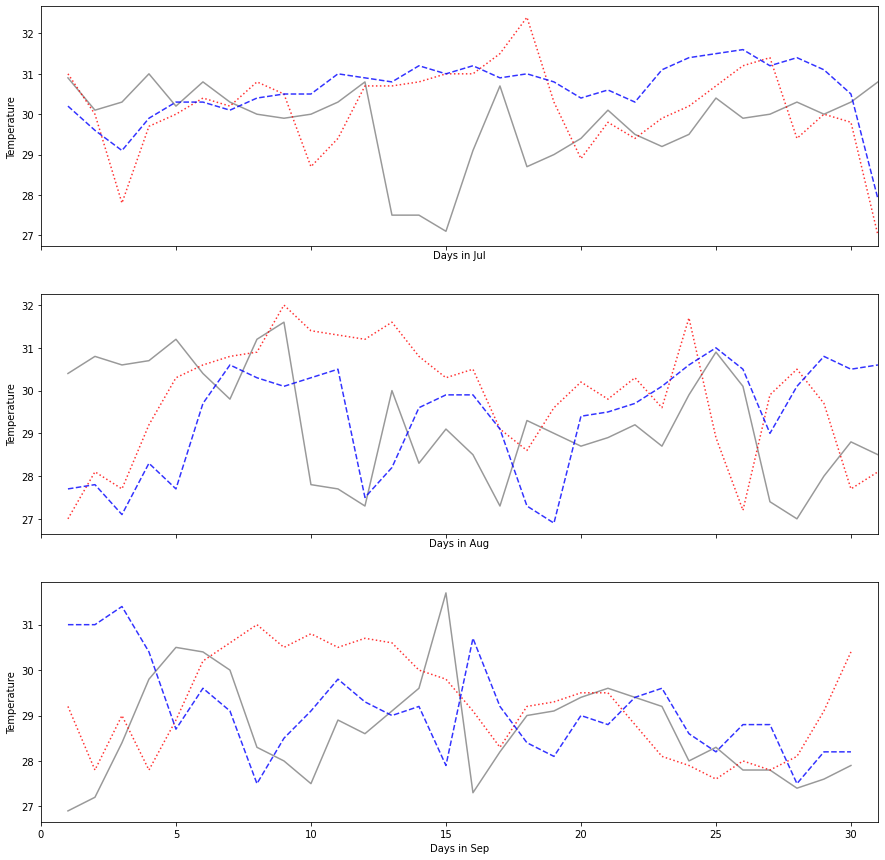

In [58]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_hka_temp_Jul_2018['Day'],df_hka_temp_Jul_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_hka_temp_Jul_2019['Day'],df_hka_temp_Jul_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_hka_temp_Jul_2020['Day'],df_hka_temp_Jul_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Jul')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_hka_temp_Aug_2018['Day'],df_hka_temp_Aug_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_hka_temp_Aug_2019['Day'],df_hka_temp_Aug_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_hka_temp_Aug_2020['Day'],df_hka_temp_Aug_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Aug')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_hka_temp_Sep_2018['Day'],df_hka_temp_Sep_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_hka_temp_Sep_2019['Day'],df_hka_temp_Sep_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_hka_temp_Sep_2020['Day'],df_hka_temp_Sep_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Sep')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

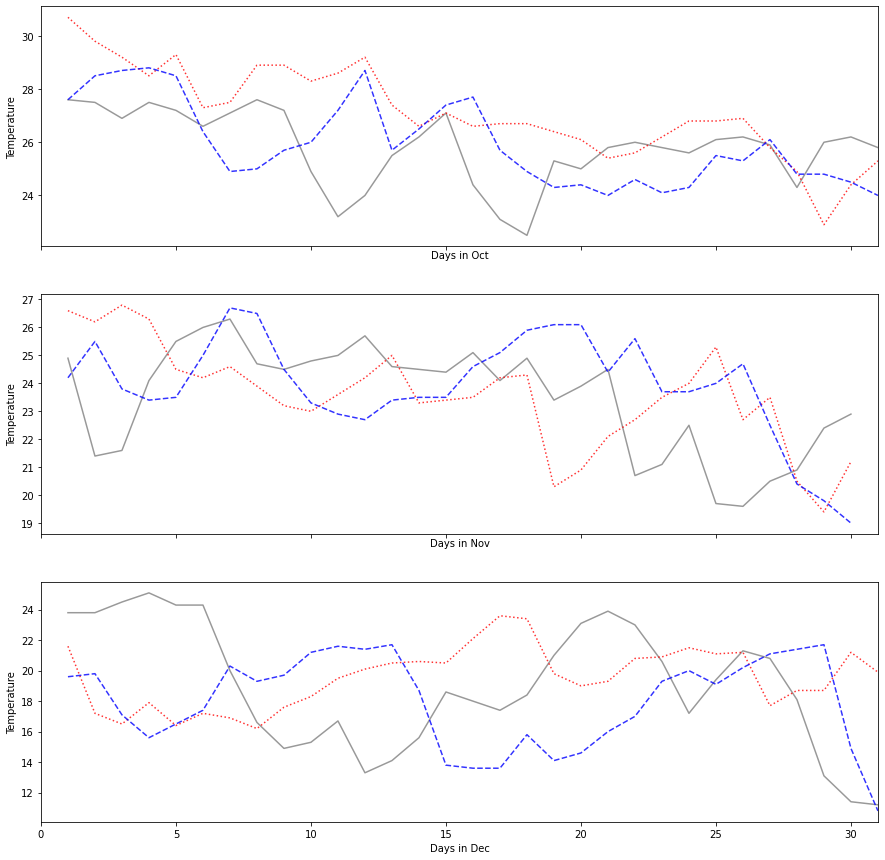

In [59]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_hka_temp_Oct_2018['Day'],df_hka_temp_Oct_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_hka_temp_Oct_2019['Day'],df_hka_temp_Oct_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_hka_temp_Oct_2020['Day'],df_hka_temp_Oct_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Oct')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_hka_temp_Nov_2018['Day'],df_hka_temp_Nov_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_hka_temp_Nov_2019['Day'],df_hka_temp_Nov_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_hka_temp_Nov_2020['Day'],df_hka_temp_Nov_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Nov')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_hka_temp_Dec_2018['Day'],df_hka_temp_Dec_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_hka_temp_Dec_2019['Day'],df_hka_temp_Dec_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_hka_temp_Dec_2020['Day'],df_hka_temp_Dec_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Dec')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

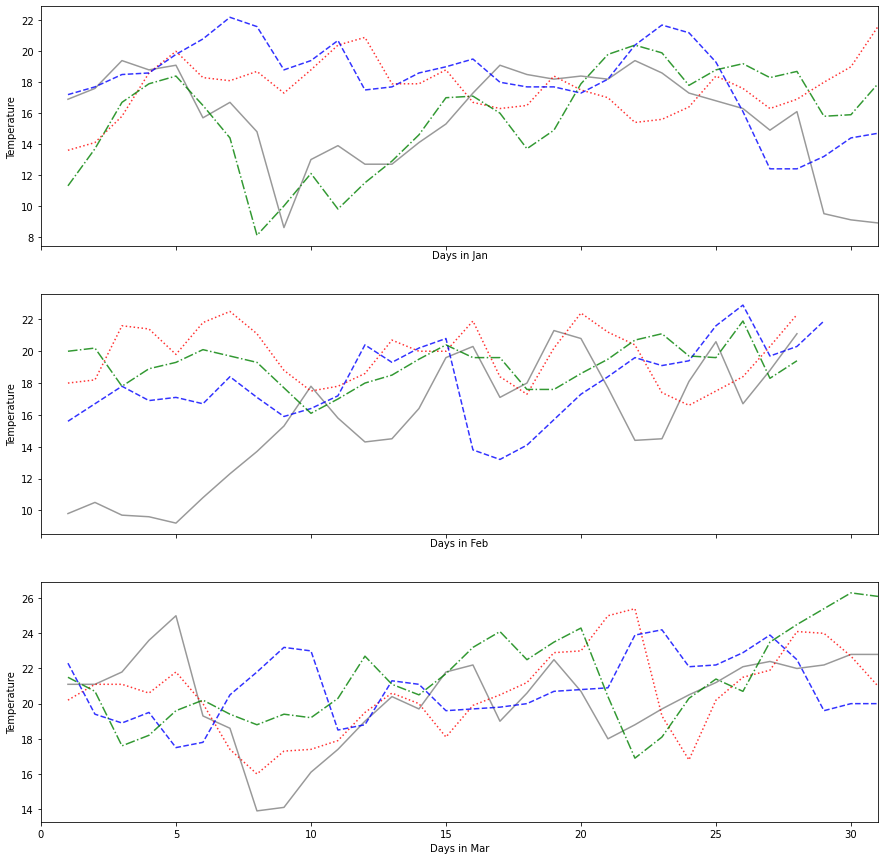

In [60]:
df_kp_temp_Jan_2018['Value']=pd.to_numeric(df_kp_temp_Jan_2018['Value'], downcast="float")
df_kp_temp_Feb_2018['Value']=pd.to_numeric(df_kp_temp_Feb_2018['Value'], downcast="float")
df_kp_temp_Mar_2018['Value']=pd.to_numeric(df_kp_temp_Mar_2018['Value'], downcast="float")
df_kp_temp_Apr_2018['Value']=pd.to_numeric(df_kp_temp_Apr_2018['Value'], downcast="float")
df_kp_temp_May_2018['Value']=pd.to_numeric(df_kp_temp_May_2018['Value'], downcast="float")
df_kp_temp_Jun_2018['Value']=pd.to_numeric(df_kp_temp_Jun_2018['Value'], downcast="float")
df_kp_temp_Jul_2018['Value']=pd.to_numeric(df_kp_temp_Jul_2018['Value'], downcast="float")
df_kp_temp_Aug_2018['Value']=pd.to_numeric(df_kp_temp_Aug_2018['Value'], downcast="float")
df_kp_temp_Sep_2018['Value']=pd.to_numeric(df_kp_temp_Sep_2018['Value'], downcast="float")
df_kp_temp_Oct_2018['Value']=pd.to_numeric(df_kp_temp_Oct_2018['Value'], downcast="float")
df_kp_temp_Nov_2018['Value']=pd.to_numeric(df_kp_temp_Nov_2018['Value'], downcast="float")
df_kp_temp_Dec_2018['Value']=pd.to_numeric(df_kp_temp_Dec_2018['Value'], downcast="float")
df_kp_temp_Jan_2019['Value']=pd.to_numeric(df_kp_temp_Jan_2019['Value'], downcast="float")
df_kp_temp_Feb_2019['Value']=pd.to_numeric(df_kp_temp_Feb_2019['Value'], downcast="float")
df_kp_temp_Mar_2019['Value']=pd.to_numeric(df_kp_temp_Mar_2019['Value'], downcast="float")
df_kp_temp_Apr_2019['Value']=pd.to_numeric(df_kp_temp_Apr_2019['Value'], downcast="float")
df_kp_temp_May_2019['Value']=pd.to_numeric(df_kp_temp_May_2019['Value'], downcast="float")
df_kp_temp_Jun_2019['Value']=pd.to_numeric(df_kp_temp_Jun_2019['Value'], downcast="float")
df_kp_temp_Jul_2019['Value']=pd.to_numeric(df_kp_temp_Jul_2019['Value'], downcast="float")
df_kp_temp_Aug_2019['Value']=pd.to_numeric(df_kp_temp_Aug_2019['Value'], downcast="float")
df_kp_temp_Sep_2019['Value']=pd.to_numeric(df_kp_temp_Sep_2019['Value'], downcast="float")
df_kp_temp_Oct_2019['Value']=pd.to_numeric(df_kp_temp_Oct_2019['Value'], downcast="float")
df_kp_temp_Nov_2019['Value']=pd.to_numeric(df_kp_temp_Nov_2019['Value'], downcast="float")
df_kp_temp_Dec_2019['Value']=pd.to_numeric(df_kp_temp_Dec_2019['Value'], downcast="float")
df_kp_temp_Jan_2020['Value']=pd.to_numeric(df_kp_temp_Jan_2020['Value'], downcast="float")
df_kp_temp_Feb_2020['Value']=pd.to_numeric(df_kp_temp_Feb_2020['Value'], downcast="float")
df_kp_temp_Mar_2020['Value']=pd.to_numeric(df_kp_temp_Mar_2020['Value'], downcast="float")
df_kp_temp_Apr_2020['Value']=pd.to_numeric(df_kp_temp_Apr_2020['Value'], downcast="float")
df_kp_temp_May_2020['Value']=pd.to_numeric(df_kp_temp_May_2020['Value'], downcast="float")
df_kp_temp_Jun_2020['Value']=pd.to_numeric(df_kp_temp_Jun_2020['Value'], downcast="float")
df_kp_temp_Jul_2020['Value']=pd.to_numeric(df_kp_temp_Jul_2020['Value'], downcast="float")
df_kp_temp_Aug_2020['Value']=pd.to_numeric(df_kp_temp_Aug_2020['Value'], downcast="float")
df_kp_temp_Sep_2020['Value']=pd.to_numeric(df_kp_temp_Sep_2020['Value'], downcast="float")
df_kp_temp_Oct_2020['Value']=pd.to_numeric(df_kp_temp_Oct_2020['Value'], downcast="float")
df_kp_temp_Nov_2020['Value']=pd.to_numeric(df_kp_temp_Nov_2020['Value'], downcast="float")
df_kp_temp_Dec_2020['Value']=pd.to_numeric(df_kp_temp_Dec_2020['Value'], downcast="float")
df_kp_temp_Jan_2021['Value']=pd.to_numeric(df_kp_temp_Jan_2021['Value'], downcast="float")
df_kp_temp_Feb_2021['Value']=pd.to_numeric(df_kp_temp_Feb_2021['Value'], downcast="float")
df_kp_temp_Mar_2021['Value']=pd.to_numeric(df_kp_temp_Mar_2021['Value'], downcast="float")
df_kp_temp_Apr_2021['Value']=pd.to_numeric(df_kp_temp_Apr_2021['Value'], downcast="float")
df_kp_temp_May_2021['Value']=pd.to_numeric(df_kp_temp_May_2021['Value'], downcast="float")
df_kp_temp_Jun_2021['Value']=pd.to_numeric(df_kp_temp_Jun_2021['Value'], downcast="float")

fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_kp_temp_Jan_2018['Day'],df_kp_temp_Jan_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_kp_temp_Jan_2019['Day'],df_kp_temp_Jan_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_kp_temp_Jan_2020['Day'],df_kp_temp_Jan_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_kp_temp_Jan_2021['Day'],df_kp_temp_Jan_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Jan')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_kp_temp_Feb_2018['Day'],df_kp_temp_Feb_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_kp_temp_Feb_2019['Day'],df_kp_temp_Feb_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_kp_temp_Feb_2020['Day'],df_kp_temp_Feb_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_kp_temp_Feb_2021['Day'],df_kp_temp_Feb_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Feb')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_kp_temp_Mar_2018['Day'],df_kp_temp_Mar_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_kp_temp_Mar_2019['Day'],df_kp_temp_Mar_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_kp_temp_Mar_2020['Day'],df_kp_temp_Mar_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].plot(df_kp_temp_Mar_2021['Day'],df_kp_temp_Mar_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Mar')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

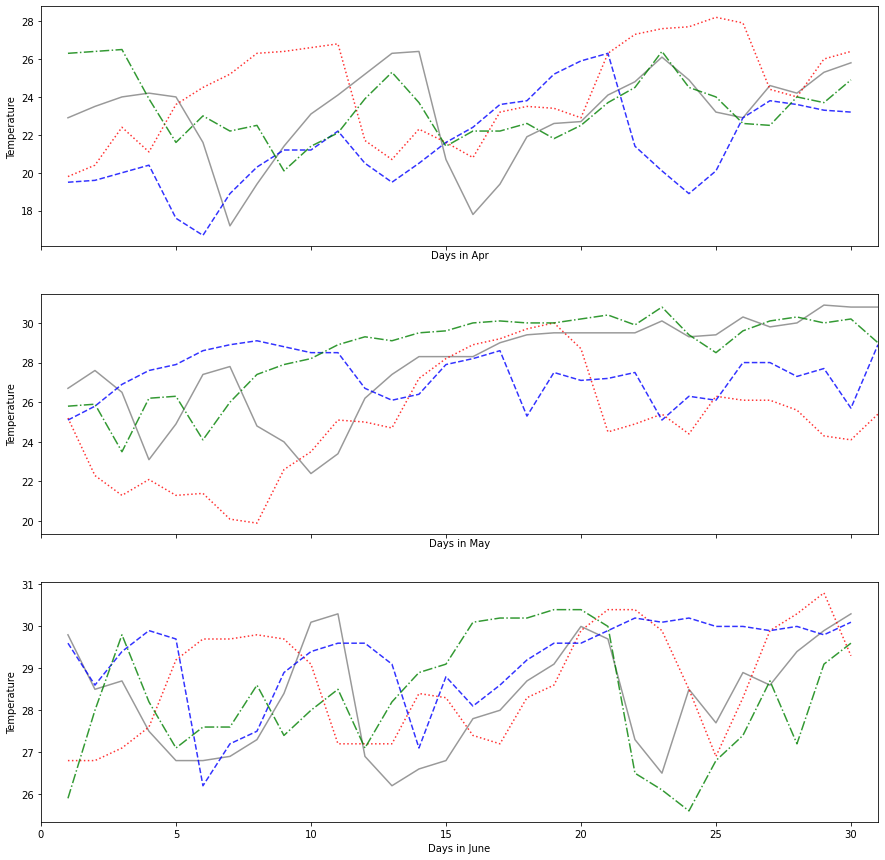

In [61]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_kp_temp_Apr_2018['Day'],df_kp_temp_Apr_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_kp_temp_Apr_2019['Day'],df_kp_temp_Apr_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_kp_temp_Apr_2020['Day'],df_kp_temp_Apr_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_kp_temp_Apr_2021['Day'],df_kp_temp_Apr_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Apr')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_kp_temp_May_2018['Day'],df_kp_temp_May_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_kp_temp_May_2019['Day'],df_kp_temp_May_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_kp_temp_May_2020['Day'],df_kp_temp_May_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_kp_temp_May_2021['Day'],df_kp_temp_May_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
# ax[0].set_ylim([12,16])
ax[1].set_xlabel('Days in May')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_kp_temp_Jun_2018['Day'],df_kp_temp_Jun_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_kp_temp_Jun_2019['Day'],df_kp_temp_Jun_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_kp_temp_Jun_2020['Day'],df_kp_temp_Jun_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].plot(df_kp_temp_Jun_2021['Day'],df_kp_temp_Jun_2021['Value'], color="green", alpha=0.8, ls = '-.')
ax[2].set_xlim([0,31])
# ax[1].set_ylim([18,22])
ax[2].set_xlabel('Days in June')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

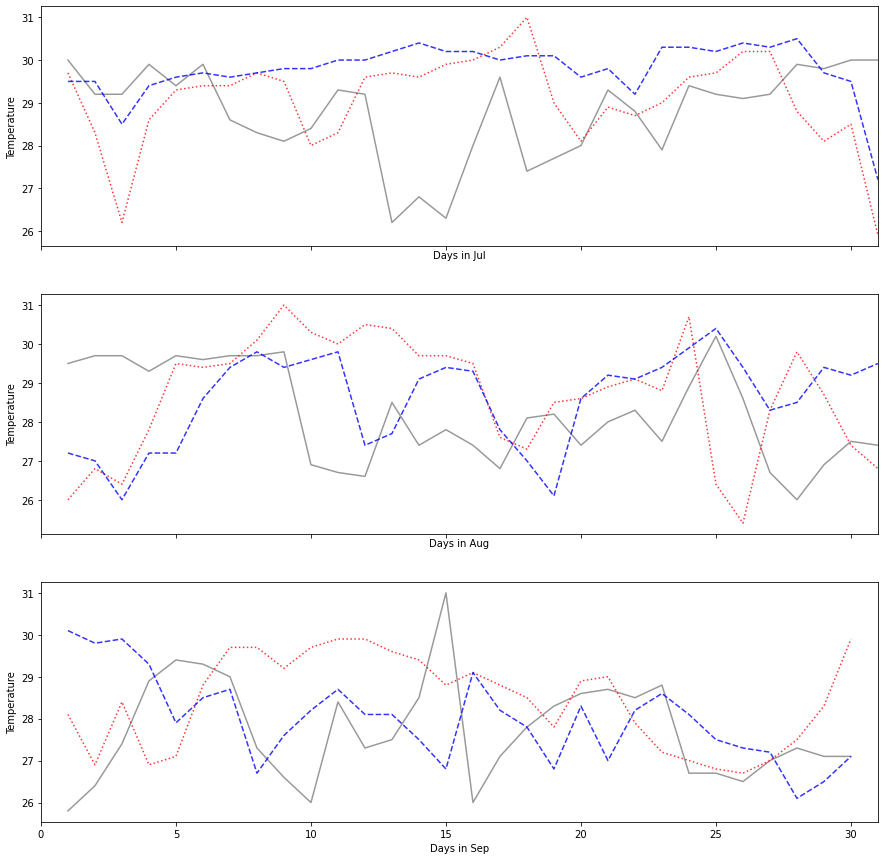

In [62]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_kp_temp_Jul_2018['Day'],df_kp_temp_Jul_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_kp_temp_Jul_2019['Day'],df_kp_temp_Jul_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_kp_temp_Jul_2020['Day'],df_kp_temp_Jul_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Jul')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_kp_temp_Aug_2018['Day'],df_kp_temp_Aug_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_kp_temp_Aug_2019['Day'],df_kp_temp_Aug_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_kp_temp_Aug_2020['Day'],df_kp_temp_Aug_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Aug')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_kp_temp_Sep_2018['Day'],df_kp_temp_Sep_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_kp_temp_Sep_2019['Day'],df_kp_temp_Sep_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_kp_temp_Sep_2020['Day'],df_kp_temp_Sep_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Sep')
ax[2].set_ylabel('Temperature')

Text(0, 0.5, 'Temperature')

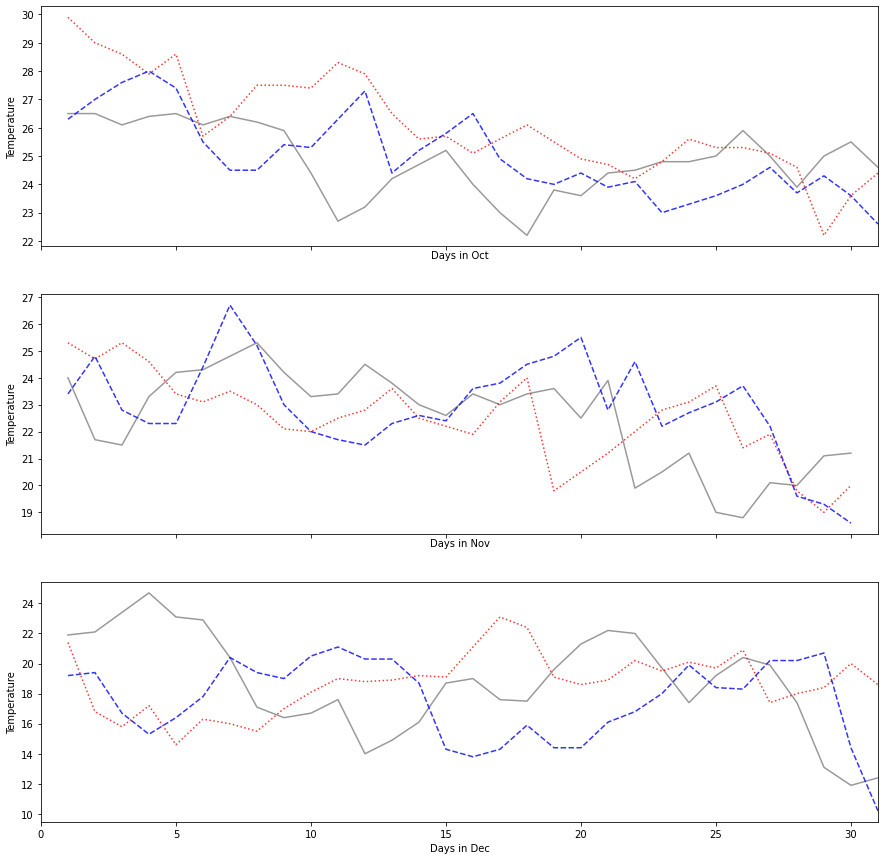

In [63]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_kp_temp_Oct_2018['Day'],df_kp_temp_Oct_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[0].plot(df_kp_temp_Oct_2019['Day'],df_kp_temp_Oct_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_kp_temp_Oct_2020['Day'],df_kp_temp_Oct_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Oct')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_kp_temp_Nov_2018['Day'],df_kp_temp_Nov_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[1].plot(df_kp_temp_Nov_2019['Day'],df_kp_temp_Nov_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_kp_temp_Nov_2020['Day'],df_kp_temp_Nov_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Nov')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_kp_temp_Dec_2018['Day'],df_kp_temp_Dec_2018['Value'], color="grey", alpha=0.8, ls = '-')
ax[2].plot(df_kp_temp_Dec_2019['Day'],df_kp_temp_Dec_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_kp_temp_Dec_2020['Day'],df_kp_temp_Dec_2020['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Dec')
ax[2].set_ylabel('Temperature')

Since the chart above do not indicate much, I wanted to see if the areas record the same trend for temperature changes. I want to check for any discrepencies in different areas in Hong Kong. I don't expect so, but just in case

# I think we roughly get the idea on the temperature changes. Let's compare area with area on the respective months

Text(0, 0.5, 'Temperature')

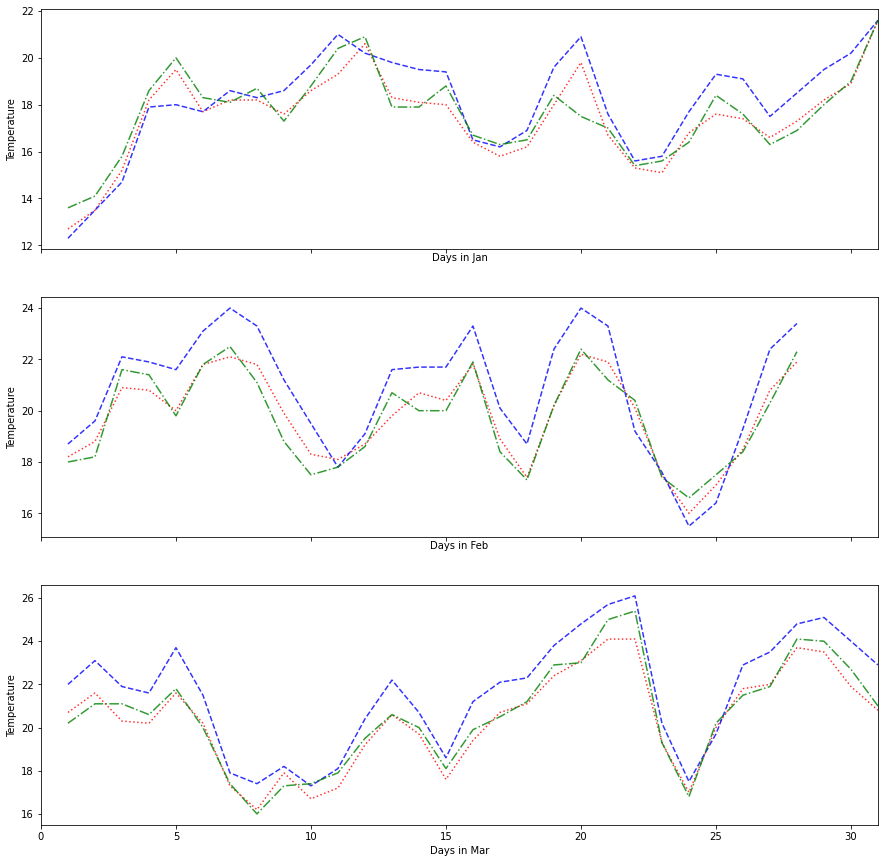

In [64]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_temp_Jan_2019['Day'],df_cch_temp_Jan_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_hka_temp_Jan_2019['Day'],df_hka_temp_Jan_2019['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_kp_temp_Jan_2019['Day'],df_kp_temp_Jan_2019['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Jan')
ax[0].set_ylabel('Temperature')

ax[1].plot(df_cch_temp_Feb_2019['Day'],df_cch_temp_Feb_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_hka_temp_Feb_2019['Day'],df_hka_temp_Feb_2019['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_kp_temp_Feb_2019['Day'],df_kp_temp_Feb_2019['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Feb')
ax[1].set_ylabel('Temperature')

ax[2].plot(df_cch_temp_Mar_2019['Day'],df_cch_temp_Mar_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_hka_temp_Mar_2019['Day'],df_hka_temp_Mar_2019['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].plot(df_kp_temp_Mar_2019['Day'],df_kp_temp_Mar_2019['Value'], color="green", alpha=0.8, ls = '-.')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Mar')
ax[2].set_ylabel('Temperature')

# From the offset, it seems the temperatures are trending quite closely. This is kind of to be expected, Hong Kong is a small area after all

# Data Crunching - Skip to Cell 73

Adjusting values for max and min temperatures

In [65]:
df_cch_max_temp_Jan_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==6.0)]
df_cch_max_temp_Jul_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==7.0)]
df_cch_max_temp_Aug_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==8.0)]
df_cch_max_temp_Sep_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==9.0)]
df_cch_max_temp_Oct_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==10.0)]
df_cch_max_temp_Nov_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==11.0)]
df_cch_max_temp_Dec_2018 = df_cch_max_temp[(df_cch_max_temp['Year']=='2018')&(df_cch_max_temp['Month']==12.0)]
df_cch_max_temp_Jan_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==6.0)]
df_cch_max_temp_Jul_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==7.0)]
df_cch_max_temp_Aug_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==8.0)]
df_cch_max_temp_Sep_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==9.0)]
df_cch_max_temp_Oct_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==10.0)]
df_cch_max_temp_Nov_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==11.0)]
df_cch_max_temp_Dec_2019 = df_cch_max_temp[(df_cch_max_temp['Year']=='2019')&(df_cch_max_temp['Month']==12.0)]
df_cch_max_temp_Jan_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==5.0)]
df_cch_max_temp_Jun_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==6.0)]
df_cch_max_temp_Jul_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==7.0)]
df_cch_max_temp_Aug_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==8.0)]
df_cch_max_temp_Sep_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==9.0)]
df_cch_max_temp_Oct_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==10.0)]
df_cch_max_temp_Nov_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==11.0)]
df_cch_max_temp_Dec_2020 = df_cch_max_temp[(df_cch_max_temp['Year']=='2020')&(df_cch_max_temp['Month']==12.0)]
df_cch_max_temp_Jan_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==1.0)]
df_cch_max_temp_Feb_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==2.0)]
df_cch_max_temp_Mar_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==3.0)]
df_cch_max_temp_Apr_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==4.0)]
df_cch_max_temp_May_2021 = df_cch_max_temp[(df_cch_max_temp['Year']=='2021')&(df_cch_max_temp['Month']==5.0)]

df_cch_max_temp_Jan_2018=df_cch_max_temp_Jan_2018.reset_index(drop=True)
df_cch_max_temp_Feb_2018=df_cch_max_temp_Feb_2018.reset_index(drop=True)
df_cch_max_temp_Mar_2018=df_cch_max_temp_Mar_2018.reset_index(drop=True)
df_cch_max_temp_May_2018=df_cch_max_temp_May_2018.reset_index(drop=True)
df_cch_max_temp_Jun_2018=df_cch_max_temp_Jun_2018.reset_index(drop=True)
df_cch_max_temp_Jul_2018=df_cch_max_temp_Jul_2018.reset_index(drop=True)
df_cch_max_temp_Aug_2018=df_cch_max_temp_Aug_2018.reset_index(drop=True)
df_cch_max_temp_Sep_2018=df_cch_max_temp_Sep_2018.reset_index(drop=True)
df_cch_max_temp_Oct_2018=df_cch_max_temp_Oct_2018.reset_index(drop=True)
df_cch_max_temp_Nov_2018=df_cch_max_temp_Nov_2018.reset_index(drop=True)
df_cch_max_temp_Dec_2018=df_cch_max_temp_Dec_2018.reset_index(drop=True)
df_cch_max_temp_Jan_2019=df_cch_max_temp_Jan_2019.reset_index(drop=True)
df_cch_max_temp_Feb_2019=df_cch_max_temp_Feb_2019.reset_index(drop=True)
df_cch_max_temp_Mar_2019=df_cch_max_temp_Mar_2019.reset_index(drop=True)
df_cch_max_temp_May_2019=df_cch_max_temp_May_2019.reset_index(drop=True)
df_cch_max_temp_Jun_2019=df_cch_max_temp_Jun_2019.reset_index(drop=True)
df_cch_max_temp_Jul_2019=df_cch_max_temp_Jul_2019.reset_index(drop=True)
df_cch_max_temp_Aug_2019=df_cch_max_temp_Aug_2019.reset_index(drop=True)
df_cch_max_temp_Sep_2019=df_cch_max_temp_Sep_2019.reset_index(drop=True)
df_cch_max_temp_Oct_2019=df_cch_max_temp_Oct_2019.reset_index(drop=True)
df_cch_max_temp_Nov_2019=df_cch_max_temp_Nov_2019.reset_index(drop=True)
df_cch_max_temp_Dec_2019=df_cch_max_temp_Dec_2019.reset_index(drop=True)
df_cch_max_temp_Jan_2020=df_cch_max_temp_Jan_2020.reset_index(drop=True)
df_cch_max_temp_Feb_2020=df_cch_max_temp_Feb_2020.reset_index(drop=True)
df_cch_max_temp_Mar_2020=df_cch_max_temp_Mar_2020.reset_index(drop=True)
df_cch_max_temp_Apr_2020=df_cch_max_temp_Apr_2020.reset_index(drop=True)
df_cch_max_temp_May_2020=df_cch_max_temp_May_2020.reset_index(drop=True)
df_cch_max_temp_Jun_2020=df_cch_max_temp_Jun_2020.reset_index(drop=True)
df_cch_max_temp_Jul_2020=df_cch_max_temp_Jul_2020.reset_index(drop=True)
df_cch_max_temp_Aug_2020=df_cch_max_temp_Aug_2020.reset_index(drop=True)
df_cch_max_temp_Sep_2020=df_cch_max_temp_Sep_2020.reset_index(drop=True)
df_cch_max_temp_Oct_2020=df_cch_max_temp_Oct_2020.reset_index(drop=True)
df_cch_max_temp_Nov_2020=df_cch_max_temp_Nov_2020.reset_index(drop=True)
df_cch_max_temp_Dec_2020=df_cch_max_temp_Dec_2020.reset_index(drop=True)
df_cch_max_temp_Jan_2021=df_cch_max_temp_Jan_2021.reset_index(drop=True)
df_cch_max_temp_Feb_2021=df_cch_max_temp_Feb_2021.reset_index(drop=True)
df_cch_max_temp_Mar_2021=df_cch_max_temp_Mar_2021.reset_index(drop=True)
df_cch_max_temp_Apr_2021=df_cch_max_temp_Apr_2021.reset_index(drop=True)
df_cch_max_temp_May_2021=df_cch_max_temp_May_2021.reset_index(drop=True)

df_hka_max_temp_Jan_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==6.0)]
df_hka_max_temp_Jul_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==7.0)]
df_hka_max_temp_Aug_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==8.0)]
df_hka_max_temp_Sep_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==9.0)]
df_hka_max_temp_Oct_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==10.0)]
df_hka_max_temp_Nov_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==11.0)]
df_hka_max_temp_Dec_2018 = df_hka_max_temp[(df_hka_max_temp['Year']=='2018')&(df_hka_max_temp['Month']==12.0)]
df_hka_max_temp_Jan_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==6.0)]
df_hka_max_temp_Jul_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==7.0)]
df_hka_max_temp_Aug_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==8.0)]
df_hka_max_temp_Sep_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==9.0)]
df_hka_max_temp_Oct_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==10.0)]
df_hka_max_temp_Nov_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==11.0)]
df_hka_max_temp_Dec_2019 = df_hka_max_temp[(df_hka_max_temp['Year']=='2019')&(df_hka_max_temp['Month']==12.0)]
df_hka_max_temp_Jan_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==5.0)]
df_hka_max_temp_Jun_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==6.0)]
df_hka_max_temp_Jul_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==7.0)]
df_hka_max_temp_Aug_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==8.0)]
df_hka_max_temp_Sep_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==9.0)]
df_hka_max_temp_Oct_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==10.0)]
df_hka_max_temp_Nov_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==11.0)]
df_hka_max_temp_Dec_2020 = df_hka_max_temp[(df_hka_max_temp['Year']=='2020')&(df_hka_max_temp['Month']==12.0)]
df_hka_max_temp_Jan_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==1.0)]
df_hka_max_temp_Feb_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==2.0)]
df_hka_max_temp_Mar_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==3.0)]
df_hka_max_temp_Apr_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==4.0)]
df_hka_max_temp_May_2021 = df_hka_max_temp[(df_hka_max_temp['Year']=='2021')&(df_hka_max_temp['Month']==5.0)]

df_hka_max_temp_Jan_2018=df_hka_max_temp_Jan_2018.reset_index(drop=True)
df_hka_max_temp_Feb_2018=df_hka_max_temp_Feb_2018.reset_index(drop=True)
df_hka_max_temp_Mar_2018=df_hka_max_temp_Mar_2018.reset_index(drop=True)
df_hka_max_temp_May_2018=df_hka_max_temp_May_2018.reset_index(drop=True)
df_hka_max_temp_Jun_2018=df_hka_max_temp_Jun_2018.reset_index(drop=True)
df_hka_max_temp_Jul_2018=df_hka_max_temp_Jul_2018.reset_index(drop=True)
df_hka_max_temp_Aug_2018=df_hka_max_temp_Aug_2018.reset_index(drop=True)
df_hka_max_temp_Sep_2018=df_hka_max_temp_Sep_2018.reset_index(drop=True)
df_hka_max_temp_Oct_2018=df_hka_max_temp_Oct_2018.reset_index(drop=True)
df_hka_max_temp_Nov_2018=df_hka_max_temp_Nov_2018.reset_index(drop=True)
df_hka_max_temp_Dec_2018=df_hka_max_temp_Dec_2018.reset_index(drop=True)
df_hka_max_temp_Jan_2019=df_hka_max_temp_Jan_2019.reset_index(drop=True)
df_hka_max_temp_Feb_2019=df_hka_max_temp_Feb_2019.reset_index(drop=True)
df_hka_max_temp_Mar_2019=df_hka_max_temp_Mar_2019.reset_index(drop=True)
df_hka_max_temp_May_2019=df_hka_max_temp_May_2019.reset_index(drop=True)
df_hka_max_temp_Jun_2019=df_hka_max_temp_Jun_2019.reset_index(drop=True)
df_hka_max_temp_Jul_2019=df_hka_max_temp_Jul_2019.reset_index(drop=True)
df_hka_max_temp_Aug_2019=df_hka_max_temp_Aug_2019.reset_index(drop=True)
df_hka_max_temp_Sep_2019=df_hka_max_temp_Sep_2019.reset_index(drop=True)
df_hka_max_temp_Oct_2019=df_hka_max_temp_Oct_2019.reset_index(drop=True)
df_hka_max_temp_Nov_2019=df_hka_max_temp_Nov_2019.reset_index(drop=True)
df_hka_max_temp_Dec_2019=df_hka_max_temp_Dec_2019.reset_index(drop=True)
df_hka_max_temp_Jan_2020=df_hka_max_temp_Jan_2020.reset_index(drop=True)
df_hka_max_temp_Feb_2020=df_hka_max_temp_Feb_2020.reset_index(drop=True)
df_hka_max_temp_Mar_2020=df_hka_max_temp_Mar_2020.reset_index(drop=True)
df_hka_max_temp_Apr_2020=df_hka_max_temp_Apr_2020.reset_index(drop=True)
df_hka_max_temp_May_2020=df_hka_max_temp_May_2020.reset_index(drop=True)
df_hka_max_temp_Jun_2020=df_hka_max_temp_Jun_2020.reset_index(drop=True)
df_hka_max_temp_Jul_2020=df_hka_max_temp_Jul_2020.reset_index(drop=True)
df_hka_max_temp_Aug_2020=df_hka_max_temp_Aug_2020.reset_index(drop=True)
df_hka_max_temp_Sep_2020=df_hka_max_temp_Sep_2020.reset_index(drop=True)
df_hka_max_temp_Oct_2020=df_hka_max_temp_Oct_2020.reset_index(drop=True)
df_hka_max_temp_Nov_2020=df_hka_max_temp_Nov_2020.reset_index(drop=True)
df_hka_max_temp_Dec_2020=df_hka_max_temp_Dec_2020.reset_index(drop=True)
df_hka_max_temp_Jan_2021=df_hka_max_temp_Jan_2021.reset_index(drop=True)
df_hka_max_temp_Feb_2021=df_hka_max_temp_Feb_2021.reset_index(drop=True)
df_hka_max_temp_Mar_2021=df_hka_max_temp_Mar_2021.reset_index(drop=True)
df_hka_max_temp_Apr_2021=df_hka_max_temp_Apr_2021.reset_index(drop=True)
df_hka_max_temp_May_2021=df_hka_max_temp_May_2021.reset_index(drop=True)

df_kp_max_temp_Jan_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==6.0)]
df_kp_max_temp_Jul_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==7.0)]
df_kp_max_temp_Aug_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==8.0)]
df_kp_max_temp_Sep_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==9.0)]
df_kp_max_temp_Oct_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==10.0)]
df_kp_max_temp_Nov_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==11.0)]
df_kp_max_temp_Dec_2018 = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')&(df_kp_max_temp['Month']==12.0)]
df_kp_max_temp_Jan_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==6.0)]
df_kp_max_temp_Jul_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==7.0)]
df_kp_max_temp_Aug_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==8.0)]
df_kp_max_temp_Sep_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==9.0)]
df_kp_max_temp_Oct_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==10.0)]
df_kp_max_temp_Nov_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==11.0)]
df_kp_max_temp_Dec_2019 = df_kp_max_temp[(df_kp_max_temp['Year']=='2019')&(df_kp_max_temp['Month']==12.0)]
df_kp_max_temp_Jan_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==5.0)]
df_kp_max_temp_Jun_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==6.0)]
df_kp_max_temp_Jul_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==7.0)]
df_kp_max_temp_Aug_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==8.0)]
df_kp_max_temp_Sep_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==9.0)]
df_kp_max_temp_Oct_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==10.0)]
df_kp_max_temp_Nov_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==11.0)]
df_kp_max_temp_Dec_2020 = df_kp_max_temp[(df_kp_max_temp['Year']=='2020')&(df_kp_max_temp['Month']==12.0)]
df_kp_max_temp_Jan_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==1.0)]
df_kp_max_temp_Feb_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==2.0)]
df_kp_max_temp_Mar_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==3.0)]
df_kp_max_temp_Apr_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==4.0)]
df_kp_max_temp_May_2021 = df_kp_max_temp[(df_kp_max_temp['Year']=='2021')&(df_kp_max_temp['Month']==5.0)]

df_kp_max_temp_Jan_2018=df_kp_max_temp_Jan_2018.reset_index(drop=True)
df_kp_max_temp_Feb_2018=df_kp_max_temp_Feb_2018.reset_index(drop=True)
df_kp_max_temp_Mar_2018=df_kp_max_temp_Mar_2018.reset_index(drop=True)
df_kp_max_temp_May_2018=df_kp_max_temp_May_2018.reset_index(drop=True)
df_kp_max_temp_Jun_2018=df_kp_max_temp_Jun_2018.reset_index(drop=True)
df_kp_max_temp_Jul_2018=df_kp_max_temp_Jul_2018.reset_index(drop=True)
df_kp_max_temp_Aug_2018=df_kp_max_temp_Aug_2018.reset_index(drop=True)
df_kp_max_temp_Sep_2018=df_kp_max_temp_Sep_2018.reset_index(drop=True)
df_kp_max_temp_Oct_2018=df_kp_max_temp_Oct_2018.reset_index(drop=True)
df_kp_max_temp_Nov_2018=df_kp_max_temp_Nov_2018.reset_index(drop=True)
df_kp_max_temp_Dec_2018=df_kp_max_temp_Dec_2018.reset_index(drop=True)
df_kp_max_temp_Jan_2019=df_kp_max_temp_Jan_2019.reset_index(drop=True)
df_kp_max_temp_Feb_2019=df_kp_max_temp_Feb_2019.reset_index(drop=True)
df_kp_max_temp_Mar_2019=df_kp_max_temp_Mar_2019.reset_index(drop=True)
df_kp_max_temp_May_2019=df_kp_max_temp_May_2019.reset_index(drop=True)
df_kp_max_temp_Jun_2019=df_kp_max_temp_Jun_2019.reset_index(drop=True)
df_kp_max_temp_Jul_2019=df_kp_max_temp_Jul_2019.reset_index(drop=True)
df_kp_max_temp_Aug_2019=df_kp_max_temp_Aug_2019.reset_index(drop=True)
df_kp_max_temp_Sep_2019=df_kp_max_temp_Sep_2019.reset_index(drop=True)
df_kp_max_temp_Oct_2019=df_kp_max_temp_Oct_2019.reset_index(drop=True)
df_kp_max_temp_Nov_2019=df_kp_max_temp_Nov_2019.reset_index(drop=True)
df_kp_max_temp_Dec_2019=df_kp_max_temp_Dec_2019.reset_index(drop=True)
df_kp_max_temp_Jan_2020=df_kp_max_temp_Jan_2020.reset_index(drop=True)
df_kp_max_temp_Feb_2020=df_kp_max_temp_Feb_2020.reset_index(drop=True)
df_kp_max_temp_Mar_2020=df_kp_max_temp_Mar_2020.reset_index(drop=True)
df_kp_max_temp_Apr_2020=df_kp_max_temp_Apr_2020.reset_index(drop=True)
df_kp_max_temp_May_2020=df_kp_max_temp_May_2020.reset_index(drop=True)
df_kp_max_temp_Jun_2020=df_kp_max_temp_Jun_2020.reset_index(drop=True)
df_kp_max_temp_Jul_2020=df_kp_max_temp_Jul_2020.reset_index(drop=True)
df_kp_max_temp_Aug_2020=df_kp_max_temp_Aug_2020.reset_index(drop=True)
df_kp_max_temp_Sep_2020=df_kp_max_temp_Sep_2020.reset_index(drop=True)
df_kp_max_temp_Oct_2020=df_kp_max_temp_Oct_2020.reset_index(drop=True)
df_kp_max_temp_Nov_2020=df_kp_max_temp_Nov_2020.reset_index(drop=True)
df_kp_max_temp_Dec_2020=df_kp_max_temp_Dec_2020.reset_index(drop=True)
df_kp_max_temp_Jan_2021=df_kp_max_temp_Jan_2021.reset_index(drop=True)
df_kp_max_temp_Feb_2021=df_kp_max_temp_Feb_2021.reset_index(drop=True)
df_kp_max_temp_Mar_2021=df_kp_max_temp_Mar_2021.reset_index(drop=True)
df_kp_max_temp_Apr_2021=df_kp_max_temp_Apr_2021.reset_index(drop=True)
df_kp_max_temp_May_2021=df_kp_max_temp_May_2021.reset_index(drop=True)

df_cch_min_temp_Jan_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==6.0)]
df_cch_min_temp_Jul_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==7.0)]
df_cch_min_temp_Aug_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==8.0)]
df_cch_min_temp_Sep_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==9.0)]
df_cch_min_temp_Oct_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==10.0)]
df_cch_min_temp_Nov_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==11.0)]
df_cch_min_temp_Dec_2018 = df_cch_min_temp[(df_cch_min_temp['Year']=='2018')&(df_cch_min_temp['Month']==12.0)]
df_cch_min_temp_Jan_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==6.0)]
df_cch_min_temp_Jul_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==7.0)]
df_cch_min_temp_Aug_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==8.0)]
df_cch_min_temp_Sep_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==9.0)]
df_cch_min_temp_Oct_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==10.0)]
df_cch_min_temp_Nov_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==11.0)]
df_cch_min_temp_Dec_2019 = df_cch_min_temp[(df_cch_min_temp['Year']=='2019')&(df_cch_min_temp['Month']==12.0)]
df_cch_min_temp_Jan_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==5.0)]
df_cch_min_temp_Jun_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==6.0)]
df_cch_min_temp_Jul_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==7.0)]
df_cch_min_temp_Aug_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==8.0)]
df_cch_min_temp_Sep_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==9.0)]
df_cch_min_temp_Oct_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==10.0)]
df_cch_min_temp_Nov_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==11.0)]
df_cch_min_temp_Dec_2020 = df_cch_min_temp[(df_cch_min_temp['Year']=='2020')&(df_cch_min_temp['Month']==12.0)]
df_cch_min_temp_Jan_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==1.0)]
df_cch_min_temp_Feb_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==2.0)]
df_cch_min_temp_Mar_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==3.0)]
df_cch_min_temp_Apr_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==4.0)]
df_cch_min_temp_May_2021 = df_cch_min_temp[(df_cch_min_temp['Year']=='2021')&(df_cch_min_temp['Month']==5.0)]

df_cch_min_temp_Jan_2018=df_cch_min_temp_Jan_2018.reset_index(drop=True)
df_cch_min_temp_Feb_2018=df_cch_min_temp_Feb_2018.reset_index(drop=True)
df_cch_min_temp_Mar_2018=df_cch_min_temp_Mar_2018.reset_index(drop=True)
df_cch_min_temp_May_2018=df_cch_min_temp_May_2018.reset_index(drop=True)
df_cch_min_temp_Jun_2018=df_cch_min_temp_Jun_2018.reset_index(drop=True)
df_cch_min_temp_Jul_2018=df_cch_min_temp_Jul_2018.reset_index(drop=True)
df_cch_min_temp_Aug_2018=df_cch_min_temp_Aug_2018.reset_index(drop=True)
df_cch_min_temp_Sep_2018=df_cch_min_temp_Sep_2018.reset_index(drop=True)
df_cch_min_temp_Oct_2018=df_cch_min_temp_Oct_2018.reset_index(drop=True)
df_cch_min_temp_Nov_2018=df_cch_min_temp_Nov_2018.reset_index(drop=True)
df_cch_min_temp_Dec_2018=df_cch_min_temp_Dec_2018.reset_index(drop=True)
df_cch_min_temp_Jan_2019=df_cch_min_temp_Jan_2019.reset_index(drop=True)
df_cch_min_temp_Feb_2019=df_cch_min_temp_Feb_2019.reset_index(drop=True)
df_cch_min_temp_Mar_2019=df_cch_min_temp_Mar_2019.reset_index(drop=True)
df_cch_min_temp_May_2019=df_cch_min_temp_May_2019.reset_index(drop=True)
df_cch_min_temp_Jun_2019=df_cch_min_temp_Jun_2019.reset_index(drop=True)
df_cch_min_temp_Jul_2019=df_cch_min_temp_Jul_2019.reset_index(drop=True)
df_cch_min_temp_Aug_2019=df_cch_min_temp_Aug_2019.reset_index(drop=True)
df_cch_min_temp_Sep_2019=df_cch_min_temp_Sep_2019.reset_index(drop=True)
df_cch_min_temp_Oct_2019=df_cch_min_temp_Oct_2019.reset_index(drop=True)
df_cch_min_temp_Nov_2019=df_cch_min_temp_Nov_2019.reset_index(drop=True)
df_cch_min_temp_Dec_2019=df_cch_min_temp_Dec_2019.reset_index(drop=True)
df_cch_min_temp_Jan_2020=df_cch_min_temp_Jan_2020.reset_index(drop=True)
df_cch_min_temp_Feb_2020=df_cch_min_temp_Feb_2020.reset_index(drop=True)
df_cch_min_temp_Mar_2020=df_cch_min_temp_Mar_2020.reset_index(drop=True)
df_cch_min_temp_Apr_2020=df_cch_min_temp_Apr_2020.reset_index(drop=True)
df_cch_min_temp_May_2020=df_cch_min_temp_May_2020.reset_index(drop=True)
df_cch_min_temp_Jun_2020=df_cch_min_temp_Jun_2020.reset_index(drop=True)
df_cch_min_temp_Jul_2020=df_cch_min_temp_Jul_2020.reset_index(drop=True)
df_cch_min_temp_Aug_2020=df_cch_min_temp_Aug_2020.reset_index(drop=True)
df_cch_min_temp_Sep_2020=df_cch_min_temp_Sep_2020.reset_index(drop=True)
df_cch_min_temp_Oct_2020=df_cch_min_temp_Oct_2020.reset_index(drop=True)
df_cch_min_temp_Nov_2020=df_cch_min_temp_Nov_2020.reset_index(drop=True)
df_cch_min_temp_Dec_2020=df_cch_min_temp_Dec_2020.reset_index(drop=True)
df_cch_min_temp_Jan_2021=df_cch_min_temp_Jan_2021.reset_index(drop=True)
df_cch_min_temp_Feb_2021=df_cch_min_temp_Feb_2021.reset_index(drop=True)
df_cch_min_temp_Mar_2021=df_cch_min_temp_Mar_2021.reset_index(drop=True)
df_cch_min_temp_Apr_2021=df_cch_min_temp_Apr_2021.reset_index(drop=True)
df_cch_min_temp_May_2021=df_cch_min_temp_May_2021.reset_index(drop=True)

df_hka_min_temp_Jan_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==6.0)]
df_hka_min_temp_Jul_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==7.0)]
df_hka_min_temp_Aug_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==8.0)]
df_hka_min_temp_Sep_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==9.0)]
df_hka_min_temp_Oct_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==10.0)]
df_hka_min_temp_Nov_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==11.0)]
df_hka_min_temp_Dec_2018 = df_hka_min_temp[(df_hka_min_temp['Year']=='2018')&(df_hka_min_temp['Month']==12.0)]
df_hka_min_temp_Jan_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==6.0)]
df_hka_min_temp_Jul_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==7.0)]
df_hka_min_temp_Aug_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==8.0)]
df_hka_min_temp_Sep_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==9.0)]
df_hka_min_temp_Oct_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==10.0)]
df_hka_min_temp_Nov_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==11.0)]
df_hka_min_temp_Dec_2019 = df_hka_min_temp[(df_hka_min_temp['Year']=='2019')&(df_hka_min_temp['Month']==12.0)]
df_hka_min_temp_Jan_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==5.0)]
df_hka_min_temp_Jun_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==6.0)]
df_hka_min_temp_Jul_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==7.0)]
df_hka_min_temp_Aug_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==8.0)]
df_hka_min_temp_Sep_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==9.0)]
df_hka_min_temp_Oct_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==10.0)]
df_hka_min_temp_Nov_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==11.0)]
df_hka_min_temp_Dec_2020 = df_hka_min_temp[(df_hka_min_temp['Year']=='2020')&(df_hka_min_temp['Month']==12.0)]
df_hka_min_temp_Jan_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==1.0)]
df_hka_min_temp_Feb_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==2.0)]
df_hka_min_temp_Mar_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==3.0)]
df_hka_min_temp_Apr_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==4.0)]
df_hka_min_temp_May_2021 = df_hka_min_temp[(df_hka_min_temp['Year']=='2021')&(df_hka_min_temp['Month']==5.0)]

df_hka_min_temp_Jan_2018=df_hka_min_temp_Jan_2018.reset_index(drop=True)
df_hka_min_temp_Feb_2018=df_hka_min_temp_Feb_2018.reset_index(drop=True)
df_hka_min_temp_Mar_2018=df_hka_min_temp_Mar_2018.reset_index(drop=True)
df_hka_min_temp_May_2018=df_hka_min_temp_May_2018.reset_index(drop=True)
df_hka_min_temp_Jun_2018=df_hka_min_temp_Jun_2018.reset_index(drop=True)
df_hka_min_temp_Jul_2018=df_hka_min_temp_Jul_2018.reset_index(drop=True)
df_hka_min_temp_Aug_2018=df_hka_min_temp_Aug_2018.reset_index(drop=True)
df_hka_min_temp_Sep_2018=df_hka_min_temp_Sep_2018.reset_index(drop=True)
df_hka_min_temp_Oct_2018=df_hka_min_temp_Oct_2018.reset_index(drop=True)
df_hka_min_temp_Nov_2018=df_hka_min_temp_Nov_2018.reset_index(drop=True)
df_hka_min_temp_Dec_2018=df_hka_min_temp_Dec_2018.reset_index(drop=True)
df_hka_min_temp_Jan_2019=df_hka_min_temp_Jan_2019.reset_index(drop=True)
df_hka_min_temp_Feb_2019=df_hka_min_temp_Feb_2019.reset_index(drop=True)
df_hka_min_temp_Mar_2019=df_hka_min_temp_Mar_2019.reset_index(drop=True)
df_hka_min_temp_May_2019=df_hka_min_temp_May_2019.reset_index(drop=True)
df_hka_min_temp_Jun_2019=df_hka_min_temp_Jun_2019.reset_index(drop=True)
df_hka_min_temp_Jul_2019=df_hka_min_temp_Jul_2019.reset_index(drop=True)
df_hka_min_temp_Aug_2019=df_hka_min_temp_Aug_2019.reset_index(drop=True)
df_hka_min_temp_Sep_2019=df_hka_min_temp_Sep_2019.reset_index(drop=True)
df_hka_min_temp_Oct_2019=df_hka_min_temp_Oct_2019.reset_index(drop=True)
df_hka_min_temp_Nov_2019=df_hka_min_temp_Nov_2019.reset_index(drop=True)
df_hka_min_temp_Dec_2019=df_hka_min_temp_Dec_2019.reset_index(drop=True)
df_hka_min_temp_Jan_2020=df_hka_min_temp_Jan_2020.reset_index(drop=True)
df_hka_min_temp_Feb_2020=df_hka_min_temp_Feb_2020.reset_index(drop=True)
df_hka_min_temp_Mar_2020=df_hka_min_temp_Mar_2020.reset_index(drop=True)
df_hka_min_temp_Apr_2020=df_hka_min_temp_Apr_2020.reset_index(drop=True)
df_hka_min_temp_May_2020=df_hka_min_temp_May_2020.reset_index(drop=True)
df_hka_min_temp_Jun_2020=df_hka_min_temp_Jun_2020.reset_index(drop=True)
df_hka_min_temp_Jul_2020=df_hka_min_temp_Jul_2020.reset_index(drop=True)
df_hka_min_temp_Aug_2020=df_hka_min_temp_Aug_2020.reset_index(drop=True)
df_hka_min_temp_Sep_2020=df_hka_min_temp_Sep_2020.reset_index(drop=True)
df_hka_min_temp_Oct_2020=df_hka_min_temp_Oct_2020.reset_index(drop=True)
df_hka_min_temp_Nov_2020=df_hka_min_temp_Nov_2020.reset_index(drop=True)
df_hka_min_temp_Dec_2020=df_hka_min_temp_Dec_2020.reset_index(drop=True)
df_hka_min_temp_Jan_2021=df_hka_min_temp_Jan_2021.reset_index(drop=True)
df_hka_min_temp_Feb_2021=df_hka_min_temp_Feb_2021.reset_index(drop=True)
df_hka_min_temp_Mar_2021=df_hka_min_temp_Mar_2021.reset_index(drop=True)
df_hka_min_temp_Apr_2021=df_hka_min_temp_Apr_2021.reset_index(drop=True)
df_hka_min_temp_May_2021=df_hka_min_temp_May_2021.reset_index(drop=True)

df_kp_min_temp_Jan_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==6.0)]
df_kp_min_temp_Jul_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==7.0)]
df_kp_min_temp_Aug_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==8.0)]
df_kp_min_temp_Sep_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==9.0)]
df_kp_min_temp_Oct_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==10.0)]
df_kp_min_temp_Nov_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==11.0)]
df_kp_min_temp_Dec_2018 = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')&(df_kp_min_temp['Month']==12.0)]
df_kp_min_temp_Jan_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==6.0)]
df_kp_min_temp_Jul_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==7.0)]
df_kp_min_temp_Aug_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==8.0)]
df_kp_min_temp_Sep_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==9.0)]
df_kp_min_temp_Oct_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==10.0)]
df_kp_min_temp_Nov_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==11.0)]
df_kp_min_temp_Dec_2019 = df_kp_min_temp[(df_kp_min_temp['Year']=='2019')&(df_kp_min_temp['Month']==12.0)]
df_kp_min_temp_Jan_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==5.0)]
df_kp_min_temp_Jun_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==6.0)]
df_kp_min_temp_Jul_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==7.0)]
df_kp_min_temp_Aug_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==8.0)]
df_kp_min_temp_Sep_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==9.0)]
df_kp_min_temp_Oct_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==10.0)]
df_kp_min_temp_Nov_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==11.0)]
df_kp_min_temp_Dec_2020 = df_kp_min_temp[(df_kp_min_temp['Year']=='2020')&(df_kp_min_temp['Month']==12.0)]
df_kp_min_temp_Jan_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==1.0)]
df_kp_min_temp_Feb_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==2.0)]
df_kp_min_temp_Mar_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==3.0)]
df_kp_min_temp_Apr_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==4.0)]
df_kp_min_temp_May_2021 = df_kp_min_temp[(df_kp_min_temp['Year']=='2021')&(df_kp_min_temp['Month']==5.0)]

df_kp_min_temp_Jan_2018=df_kp_min_temp_Jan_2018.reset_index(drop=True)
df_kp_min_temp_Feb_2018=df_kp_min_temp_Feb_2018.reset_index(drop=True)
df_kp_min_temp_Mar_2018=df_kp_min_temp_Mar_2018.reset_index(drop=True)
df_kp_min_temp_May_2018=df_kp_min_temp_May_2018.reset_index(drop=True)
df_kp_min_temp_Jun_2018=df_kp_min_temp_Jun_2018.reset_index(drop=True)
df_kp_min_temp_Jul_2018=df_kp_min_temp_Jul_2018.reset_index(drop=True)
df_kp_min_temp_Aug_2018=df_kp_min_temp_Aug_2018.reset_index(drop=True)
df_kp_min_temp_Sep_2018=df_kp_min_temp_Sep_2018.reset_index(drop=True)
df_kp_min_temp_Oct_2018=df_kp_min_temp_Oct_2018.reset_index(drop=True)
df_kp_min_temp_Nov_2018=df_kp_min_temp_Nov_2018.reset_index(drop=True)
df_kp_min_temp_Dec_2018=df_kp_min_temp_Dec_2018.reset_index(drop=True)
df_kp_min_temp_Jan_2019=df_kp_min_temp_Jan_2019.reset_index(drop=True)
df_kp_min_temp_Feb_2019=df_kp_min_temp_Feb_2019.reset_index(drop=True)
df_kp_min_temp_Mar_2019=df_kp_min_temp_Mar_2019.reset_index(drop=True)
df_kp_min_temp_May_2019=df_kp_min_temp_May_2019.reset_index(drop=True)
df_kp_min_temp_Jun_2019=df_kp_min_temp_Jun_2019.reset_index(drop=True)
df_kp_min_temp_Jul_2019=df_kp_min_temp_Jul_2019.reset_index(drop=True)
df_kp_min_temp_Aug_2019=df_kp_min_temp_Aug_2019.reset_index(drop=True)
df_kp_min_temp_Sep_2019=df_kp_min_temp_Sep_2019.reset_index(drop=True)
df_kp_min_temp_Oct_2019=df_kp_min_temp_Oct_2019.reset_index(drop=True)
df_kp_min_temp_Nov_2019=df_kp_min_temp_Nov_2019.reset_index(drop=True)
df_kp_min_temp_Dec_2019=df_kp_min_temp_Dec_2019.reset_index(drop=True)
df_kp_min_temp_Jan_2020=df_kp_min_temp_Jan_2020.reset_index(drop=True)
df_kp_min_temp_Feb_2020=df_kp_min_temp_Feb_2020.reset_index(drop=True)
df_kp_min_temp_Mar_2020=df_kp_min_temp_Mar_2020.reset_index(drop=True)
df_kp_min_temp_Apr_2020=df_kp_min_temp_Apr_2020.reset_index(drop=True)
df_kp_min_temp_May_2020=df_kp_min_temp_May_2020.reset_index(drop=True)
df_kp_min_temp_Jun_2020=df_kp_min_temp_Jun_2020.reset_index(drop=True)
df_kp_min_temp_Jul_2020=df_kp_min_temp_Jul_2020.reset_index(drop=True)
df_kp_min_temp_Aug_2020=df_kp_min_temp_Aug_2020.reset_index(drop=True)
df_kp_min_temp_Sep_2020=df_kp_min_temp_Sep_2020.reset_index(drop=True)
df_kp_min_temp_Oct_2020=df_kp_min_temp_Oct_2020.reset_index(drop=True)
df_kp_min_temp_Nov_2020=df_kp_min_temp_Nov_2020.reset_index(drop=True)
df_kp_min_temp_Dec_2020=df_kp_min_temp_Dec_2020.reset_index(drop=True)
df_kp_min_temp_Jan_2021=df_kp_min_temp_Jan_2021.reset_index(drop=True)
df_kp_min_temp_Feb_2021=df_kp_min_temp_Feb_2021.reset_index(drop=True)
df_kp_min_temp_Mar_2021=df_kp_min_temp_Mar_2021.reset_index(drop=True)
df_kp_min_temp_Apr_2021=df_kp_min_temp_Apr_2021.reset_index(drop=True)
df_kp_min_temp_May_2021=df_kp_min_temp_May_2021.reset_index(drop=True)


df_cch_max_temp_Jan_2018['Value']=pd.to_numeric(df_cch_max_temp_Jan_2018['Value'], downcast="float")
df_cch_max_temp_Feb_2018['Value']=pd.to_numeric(df_cch_max_temp_Feb_2018['Value'], downcast="float")
df_cch_max_temp_Mar_2018['Value']=pd.to_numeric(df_cch_max_temp_Mar_2018['Value'], downcast="float")
df_cch_max_temp_Apr_2018['Value']=pd.to_numeric(df_cch_max_temp_Apr_2018['Value'], downcast="float")
df_cch_max_temp_May_2018['Value']=pd.to_numeric(df_cch_max_temp_May_2018['Value'], downcast="float")
df_cch_max_temp_Jun_2018['Value']=pd.to_numeric(df_cch_max_temp_Jun_2018['Value'], downcast="float")
df_cch_max_temp_Jul_2018['Value']=pd.to_numeric(df_cch_max_temp_Jul_2018['Value'], downcast="float")
df_cch_max_temp_Aug_2018['Value']=pd.to_numeric(df_cch_max_temp_Aug_2018['Value'], downcast="float")
df_cch_max_temp_Sep_2018['Value']=pd.to_numeric(df_cch_max_temp_Sep_2018['Value'], downcast="float")
df_cch_max_temp_Oct_2018['Value']=pd.to_numeric(df_cch_max_temp_Oct_2018['Value'], downcast="float")
df_cch_max_temp_Nov_2018['Value']=pd.to_numeric(df_cch_max_temp_Nov_2018['Value'], downcast="float")
df_cch_max_temp_Dec_2018['Value']=pd.to_numeric(df_cch_max_temp_Dec_2018['Value'], downcast="float")
df_cch_max_temp_Jan_2019['Value']=pd.to_numeric(df_cch_max_temp_Jan_2019['Value'], downcast="float")
df_cch_max_temp_Feb_2019['Value']=pd.to_numeric(df_cch_max_temp_Feb_2019['Value'], downcast="float")
df_cch_max_temp_Mar_2019['Value']=pd.to_numeric(df_cch_max_temp_Mar_2019['Value'], downcast="float")
df_cch_max_temp_Apr_2019['Value']=pd.to_numeric(df_cch_max_temp_Apr_2019['Value'], downcast="float")
df_cch_max_temp_May_2019['Value']=pd.to_numeric(df_cch_max_temp_May_2019['Value'], downcast="float")
df_cch_max_temp_Jun_2019['Value']=pd.to_numeric(df_cch_max_temp_Jun_2019['Value'], downcast="float")
df_cch_max_temp_Jul_2019['Value']=pd.to_numeric(df_cch_max_temp_Jul_2019['Value'], downcast="float")
df_cch_max_temp_Aug_2019['Value']=pd.to_numeric(df_cch_max_temp_Aug_2019['Value'], downcast="float")
df_cch_max_temp_Sep_2019['Value']=pd.to_numeric(df_cch_max_temp_Sep_2019['Value'], downcast="float")
df_cch_max_temp_Oct_2019['Value']=pd.to_numeric(df_cch_max_temp_Oct_2019['Value'], downcast="float")
df_cch_max_temp_Nov_2019['Value']=pd.to_numeric(df_cch_max_temp_Nov_2019['Value'], downcast="float")
df_cch_max_temp_Dec_2019['Value']=pd.to_numeric(df_cch_max_temp_Dec_2019['Value'], downcast="float")
df_cch_max_temp_Jan_2020['Value']=pd.to_numeric(df_cch_max_temp_Jan_2020['Value'], downcast="float")
df_cch_max_temp_Feb_2020['Value']=pd.to_numeric(df_cch_max_temp_Feb_2020['Value'], downcast="float")
df_cch_max_temp_Mar_2020['Value']=pd.to_numeric(df_cch_max_temp_Mar_2020['Value'], downcast="float")
df_cch_max_temp_Apr_2020['Value']=pd.to_numeric(df_cch_max_temp_Apr_2020['Value'], downcast="float")
df_cch_max_temp_May_2020['Value']=pd.to_numeric(df_cch_max_temp_May_2020['Value'], downcast="float")
df_cch_max_temp_Jun_2020['Value']=pd.to_numeric(df_cch_max_temp_Jun_2020['Value'], downcast="float")
df_cch_max_temp_Jul_2020['Value']=pd.to_numeric(df_cch_max_temp_Jul_2020['Value'], downcast="float")
df_cch_max_temp_Aug_2020['Value']=pd.to_numeric(df_cch_max_temp_Aug_2020['Value'], downcast="float")
df_cch_max_temp_Sep_2020['Value']=pd.to_numeric(df_cch_max_temp_Sep_2020['Value'], downcast="float")
df_cch_max_temp_Oct_2020['Value']=pd.to_numeric(df_cch_max_temp_Oct_2020['Value'], downcast="float")
df_cch_max_temp_Nov_2020['Value']=pd.to_numeric(df_cch_max_temp_Nov_2020['Value'], downcast="float")
df_cch_max_temp_Dec_2020['Value']=pd.to_numeric(df_cch_max_temp_Dec_2020['Value'], downcast="float")
df_cch_max_temp_Jan_2021['Value']=pd.to_numeric(df_cch_max_temp_Jan_2021['Value'], downcast="float")
df_cch_max_temp_Feb_2021['Value']=pd.to_numeric(df_cch_max_temp_Feb_2021['Value'], downcast="float")
df_cch_max_temp_Mar_2021['Value']=pd.to_numeric(df_cch_max_temp_Mar_2021['Value'], downcast="float")
df_cch_max_temp_Apr_2021['Value']=pd.to_numeric(df_cch_max_temp_Apr_2021['Value'], downcast="float")
df_cch_max_temp_May_2021['Value']=pd.to_numeric(df_cch_max_temp_May_2021['Value'], downcast="float")

df_hka_max_temp_Jan_2018['Value']=pd.to_numeric(df_hka_max_temp_Jan_2018['Value'], downcast="float")
df_hka_max_temp_Feb_2018['Value']=pd.to_numeric(df_hka_max_temp_Feb_2018['Value'], downcast="float")
df_hka_max_temp_Mar_2018['Value']=pd.to_numeric(df_hka_max_temp_Mar_2018['Value'], downcast="float")
df_hka_max_temp_Apr_2018['Value']=pd.to_numeric(df_hka_max_temp_Apr_2018['Value'], downcast="float")
df_hka_max_temp_May_2018['Value']=pd.to_numeric(df_hka_max_temp_May_2018['Value'], downcast="float")
df_hka_max_temp_Jun_2018['Value']=pd.to_numeric(df_hka_max_temp_Jun_2018['Value'], downcast="float")
df_hka_max_temp_Jul_2018['Value']=pd.to_numeric(df_hka_max_temp_Jul_2018['Value'], downcast="float")
df_hka_max_temp_Aug_2018['Value']=pd.to_numeric(df_hka_max_temp_Aug_2018['Value'], downcast="float")
df_hka_max_temp_Sep_2018['Value']=pd.to_numeric(df_hka_max_temp_Sep_2018['Value'], downcast="float")
df_hka_max_temp_Oct_2018['Value']=pd.to_numeric(df_hka_max_temp_Oct_2018['Value'], downcast="float")
df_hka_max_temp_Nov_2018['Value']=pd.to_numeric(df_hka_max_temp_Nov_2018['Value'], downcast="float")
df_hka_max_temp_Dec_2018['Value']=pd.to_numeric(df_hka_max_temp_Dec_2018['Value'], downcast="float")
df_hka_max_temp_Jan_2019['Value']=pd.to_numeric(df_hka_max_temp_Jan_2019['Value'], downcast="float")
df_hka_max_temp_Feb_2019['Value']=pd.to_numeric(df_hka_max_temp_Feb_2019['Value'], downcast="float")
df_hka_max_temp_Mar_2019['Value']=pd.to_numeric(df_hka_max_temp_Mar_2019['Value'], downcast="float")
df_hka_max_temp_Apr_2019['Value']=pd.to_numeric(df_hka_max_temp_Apr_2019['Value'], downcast="float")
df_hka_max_temp_May_2019['Value']=pd.to_numeric(df_hka_max_temp_May_2019['Value'], downcast="float")
df_hka_max_temp_Jun_2019['Value']=pd.to_numeric(df_hka_max_temp_Jun_2019['Value'], downcast="float")
df_hka_max_temp_Jul_2019['Value']=pd.to_numeric(df_hka_max_temp_Jul_2019['Value'], downcast="float")
df_hka_max_temp_Aug_2019['Value']=pd.to_numeric(df_hka_max_temp_Aug_2019['Value'], downcast="float")
df_hka_max_temp_Sep_2019['Value']=pd.to_numeric(df_hka_max_temp_Sep_2019['Value'], downcast="float")
df_hka_max_temp_Oct_2019['Value']=pd.to_numeric(df_hka_max_temp_Oct_2019['Value'], downcast="float")
df_hka_max_temp_Nov_2019['Value']=pd.to_numeric(df_hka_max_temp_Nov_2019['Value'], downcast="float")
df_hka_max_temp_Dec_2019['Value']=pd.to_numeric(df_hka_max_temp_Dec_2019['Value'], downcast="float")
df_hka_max_temp_Jan_2020['Value']=pd.to_numeric(df_hka_max_temp_Jan_2020['Value'], downcast="float")
df_hka_max_temp_Feb_2020['Value']=pd.to_numeric(df_hka_max_temp_Feb_2020['Value'], downcast="float")
df_hka_max_temp_Mar_2020['Value']=pd.to_numeric(df_hka_max_temp_Mar_2020['Value'], downcast="float")
df_hka_max_temp_Apr_2020['Value']=pd.to_numeric(df_hka_max_temp_Apr_2020['Value'], downcast="float")
df_hka_max_temp_May_2020['Value']=pd.to_numeric(df_hka_max_temp_May_2020['Value'], downcast="float")
df_hka_max_temp_Jun_2020['Value']=pd.to_numeric(df_hka_max_temp_Jun_2020['Value'], downcast="float")
df_hka_max_temp_Jul_2020['Value']=pd.to_numeric(df_hka_max_temp_Jul_2020['Value'], downcast="float")
df_hka_max_temp_Aug_2020['Value']=pd.to_numeric(df_hka_max_temp_Aug_2020['Value'], downcast="float")
df_hka_max_temp_Sep_2020['Value']=pd.to_numeric(df_hka_max_temp_Sep_2020['Value'], downcast="float")
df_hka_max_temp_Oct_2020['Value']=pd.to_numeric(df_hka_max_temp_Oct_2020['Value'], downcast="float")
df_hka_max_temp_Nov_2020['Value']=pd.to_numeric(df_hka_max_temp_Nov_2020['Value'], downcast="float")
df_hka_max_temp_Dec_2020['Value']=pd.to_numeric(df_hka_max_temp_Dec_2020['Value'], downcast="float")
df_hka_max_temp_Jan_2021['Value']=pd.to_numeric(df_hka_max_temp_Jan_2021['Value'], downcast="float")
df_hka_max_temp_Feb_2021['Value']=pd.to_numeric(df_hka_max_temp_Feb_2021['Value'], downcast="float")
df_hka_max_temp_Mar_2021['Value']=pd.to_numeric(df_hka_max_temp_Mar_2021['Value'], downcast="float")
df_hka_max_temp_Apr_2021['Value']=pd.to_numeric(df_hka_max_temp_Apr_2021['Value'], downcast="float")
df_hka_max_temp_May_2021['Value']=pd.to_numeric(df_hka_max_temp_May_2021['Value'], downcast="float")

df_kp_max_temp_Jan_2018['Value']=pd.to_numeric(df_kp_max_temp_Jan_2018['Value'], downcast="float")
df_kp_max_temp_Feb_2018['Value']=pd.to_numeric(df_kp_max_temp_Feb_2018['Value'], downcast="float")
df_kp_max_temp_Mar_2018['Value']=pd.to_numeric(df_kp_max_temp_Mar_2018['Value'], downcast="float")
df_kp_max_temp_Apr_2018['Value']=pd.to_numeric(df_kp_max_temp_Apr_2018['Value'], downcast="float")
df_kp_max_temp_May_2018['Value']=pd.to_numeric(df_kp_max_temp_May_2018['Value'], downcast="float")
df_kp_max_temp_Jun_2018['Value']=pd.to_numeric(df_kp_max_temp_Jun_2018['Value'], downcast="float")
df_kp_max_temp_Jul_2018['Value']=pd.to_numeric(df_kp_max_temp_Jul_2018['Value'], downcast="float")
df_kp_max_temp_Aug_2018['Value']=pd.to_numeric(df_kp_max_temp_Aug_2018['Value'], downcast="float")
df_kp_max_temp_Sep_2018['Value']=pd.to_numeric(df_kp_max_temp_Sep_2018['Value'], downcast="float")
df_kp_max_temp_Oct_2018['Value']=pd.to_numeric(df_kp_max_temp_Oct_2018['Value'], downcast="float")
df_kp_max_temp_Nov_2018['Value']=pd.to_numeric(df_kp_max_temp_Nov_2018['Value'], downcast="float")
df_kp_max_temp_Dec_2018['Value']=pd.to_numeric(df_kp_max_temp_Dec_2018['Value'], downcast="float")
df_kp_max_temp_Jan_2019['Value']=pd.to_numeric(df_kp_max_temp_Jan_2019['Value'], downcast="float")
df_kp_max_temp_Feb_2019['Value']=pd.to_numeric(df_kp_max_temp_Feb_2019['Value'], downcast="float")
df_kp_max_temp_Mar_2019['Value']=pd.to_numeric(df_kp_max_temp_Mar_2019['Value'], downcast="float")
df_kp_max_temp_Apr_2019['Value']=pd.to_numeric(df_kp_max_temp_Apr_2019['Value'], downcast="float")
df_kp_max_temp_May_2019['Value']=pd.to_numeric(df_kp_max_temp_May_2019['Value'], downcast="float")
df_kp_max_temp_Jun_2019['Value']=pd.to_numeric(df_kp_max_temp_Jun_2019['Value'], downcast="float")
df_kp_max_temp_Jul_2019['Value']=pd.to_numeric(df_kp_max_temp_Jul_2019['Value'], downcast="float")
df_kp_max_temp_Aug_2019['Value']=pd.to_numeric(df_kp_max_temp_Aug_2019['Value'], downcast="float")
df_kp_max_temp_Sep_2019['Value']=pd.to_numeric(df_kp_max_temp_Sep_2019['Value'], downcast="float")
df_kp_max_temp_Oct_2019['Value']=pd.to_numeric(df_kp_max_temp_Oct_2019['Value'], downcast="float")
df_kp_max_temp_Nov_2019['Value']=pd.to_numeric(df_kp_max_temp_Nov_2019['Value'], downcast="float")
df_kp_max_temp_Dec_2019['Value']=pd.to_numeric(df_kp_max_temp_Dec_2019['Value'], downcast="float")
df_kp_max_temp_Jan_2020['Value']=pd.to_numeric(df_kp_max_temp_Jan_2020['Value'], downcast="float")
df_kp_max_temp_Feb_2020['Value']=pd.to_numeric(df_kp_max_temp_Feb_2020['Value'], downcast="float")
df_kp_max_temp_Mar_2020['Value']=pd.to_numeric(df_kp_max_temp_Mar_2020['Value'], downcast="float")
df_kp_max_temp_Apr_2020['Value']=pd.to_numeric(df_kp_max_temp_Apr_2020['Value'], downcast="float")
df_kp_max_temp_May_2020['Value']=pd.to_numeric(df_kp_max_temp_May_2020['Value'], downcast="float")
df_kp_max_temp_Jun_2020['Value']=pd.to_numeric(df_kp_max_temp_Jun_2020['Value'], downcast="float")
df_kp_max_temp_Jul_2020['Value']=pd.to_numeric(df_kp_max_temp_Jul_2020['Value'], downcast="float")
df_kp_max_temp_Aug_2020['Value']=pd.to_numeric(df_kp_max_temp_Aug_2020['Value'], downcast="float")
df_kp_max_temp_Sep_2020['Value']=pd.to_numeric(df_kp_max_temp_Sep_2020['Value'], downcast="float")
df_kp_max_temp_Oct_2020['Value']=pd.to_numeric(df_kp_max_temp_Oct_2020['Value'], downcast="float")
df_kp_max_temp_Nov_2020['Value']=pd.to_numeric(df_kp_max_temp_Nov_2020['Value'], downcast="float")
df_kp_max_temp_Dec_2020['Value']=pd.to_numeric(df_kp_max_temp_Dec_2020['Value'], downcast="float")
df_kp_max_temp_Jan_2021['Value']=pd.to_numeric(df_kp_max_temp_Jan_2021['Value'], downcast="float")
df_kp_max_temp_Feb_2021['Value']=pd.to_numeric(df_kp_max_temp_Feb_2021['Value'], downcast="float")
df_kp_max_temp_Mar_2021['Value']=pd.to_numeric(df_kp_max_temp_Mar_2021['Value'], downcast="float")
df_kp_max_temp_Apr_2021['Value']=pd.to_numeric(df_kp_max_temp_Apr_2021['Value'], downcast="float")
df_kp_max_temp_May_2021['Value']=pd.to_numeric(df_kp_max_temp_May_2021['Value'], downcast="float")

df_cch_min_temp_Jan_2018['Value']=pd.to_numeric(df_cch_min_temp_Jan_2018['Value'], downcast="float")
df_cch_min_temp_Feb_2018['Value']=pd.to_numeric(df_cch_min_temp_Feb_2018['Value'], downcast="float")
df_cch_min_temp_Mar_2018['Value']=pd.to_numeric(df_cch_min_temp_Mar_2018['Value'], downcast="float")
df_cch_min_temp_Apr_2018['Value']=pd.to_numeric(df_cch_min_temp_Apr_2018['Value'], downcast="float")
df_cch_min_temp_May_2018['Value']=pd.to_numeric(df_cch_min_temp_May_2018['Value'], downcast="float")
df_cch_min_temp_Jun_2018['Value']=pd.to_numeric(df_cch_min_temp_Jun_2018['Value'], downcast="float")
df_cch_min_temp_Jul_2018['Value']=pd.to_numeric(df_cch_min_temp_Jul_2018['Value'], downcast="float")
df_cch_min_temp_Aug_2018['Value']=pd.to_numeric(df_cch_min_temp_Aug_2018['Value'], downcast="float")
df_cch_min_temp_Sep_2018['Value']=pd.to_numeric(df_cch_min_temp_Sep_2018['Value'], downcast="float")
df_cch_min_temp_Oct_2018['Value']=pd.to_numeric(df_cch_min_temp_Oct_2018['Value'], downcast="float")
df_cch_min_temp_Nov_2018['Value']=pd.to_numeric(df_cch_min_temp_Nov_2018['Value'], downcast="float")
df_cch_min_temp_Dec_2018['Value']=pd.to_numeric(df_cch_min_temp_Dec_2018['Value'], downcast="float")
df_cch_min_temp_Jan_2019['Value']=pd.to_numeric(df_cch_min_temp_Jan_2019['Value'], downcast="float")
df_cch_min_temp_Feb_2019['Value']=pd.to_numeric(df_cch_min_temp_Feb_2019['Value'], downcast="float")
df_cch_min_temp_Mar_2019['Value']=pd.to_numeric(df_cch_min_temp_Mar_2019['Value'], downcast="float")
df_cch_min_temp_Apr_2019['Value']=pd.to_numeric(df_cch_min_temp_Apr_2019['Value'], downcast="float")
df_cch_min_temp_May_2019['Value']=pd.to_numeric(df_cch_min_temp_May_2019['Value'], downcast="float")
df_cch_min_temp_Jun_2019['Value']=pd.to_numeric(df_cch_min_temp_Jun_2019['Value'], downcast="float")
df_cch_min_temp_Jul_2019['Value']=pd.to_numeric(df_cch_min_temp_Jul_2019['Value'], downcast="float")
df_cch_min_temp_Aug_2019['Value']=pd.to_numeric(df_cch_min_temp_Aug_2019['Value'], downcast="float")
df_cch_min_temp_Sep_2019['Value']=pd.to_numeric(df_cch_min_temp_Sep_2019['Value'], downcast="float")
df_cch_min_temp_Oct_2019['Value']=pd.to_numeric(df_cch_min_temp_Oct_2019['Value'], downcast="float")
df_cch_min_temp_Nov_2019['Value']=pd.to_numeric(df_cch_min_temp_Nov_2019['Value'], downcast="float")
df_cch_min_temp_Dec_2019['Value']=pd.to_numeric(df_cch_min_temp_Dec_2019['Value'], downcast="float")
df_cch_min_temp_Jan_2020['Value']=pd.to_numeric(df_cch_min_temp_Jan_2020['Value'], downcast="float")
df_cch_min_temp_Feb_2020['Value']=pd.to_numeric(df_cch_min_temp_Feb_2020['Value'], downcast="float")
df_cch_min_temp_Mar_2020['Value']=pd.to_numeric(df_cch_min_temp_Mar_2020['Value'], downcast="float")
df_cch_min_temp_Apr_2020['Value']=pd.to_numeric(df_cch_min_temp_Apr_2020['Value'], downcast="float")
df_cch_min_temp_May_2020['Value']=pd.to_numeric(df_cch_min_temp_May_2020['Value'], downcast="float")
df_cch_min_temp_Jun_2020['Value']=pd.to_numeric(df_cch_min_temp_Jun_2020['Value'], downcast="float")
df_cch_min_temp_Jul_2020['Value']=pd.to_numeric(df_cch_min_temp_Jul_2020['Value'], downcast="float")
df_cch_min_temp_Aug_2020['Value']=pd.to_numeric(df_cch_min_temp_Aug_2020['Value'], downcast="float")
df_cch_min_temp_Sep_2020['Value']=pd.to_numeric(df_cch_min_temp_Sep_2020['Value'], downcast="float")
df_cch_min_temp_Oct_2020['Value']=pd.to_numeric(df_cch_min_temp_Oct_2020['Value'], downcast="float")
df_cch_min_temp_Nov_2020['Value']=pd.to_numeric(df_cch_min_temp_Nov_2020['Value'], downcast="float")
df_cch_min_temp_Dec_2020['Value']=pd.to_numeric(df_cch_min_temp_Dec_2020['Value'], downcast="float")
df_cch_min_temp_Jan_2021['Value']=pd.to_numeric(df_cch_min_temp_Jan_2021['Value'], downcast="float")
df_cch_min_temp_Feb_2021['Value']=pd.to_numeric(df_cch_min_temp_Feb_2021['Value'], downcast="float")
df_cch_min_temp_Mar_2021['Value']=pd.to_numeric(df_cch_min_temp_Mar_2021['Value'], downcast="float")
df_cch_min_temp_Apr_2021['Value']=pd.to_numeric(df_cch_min_temp_Apr_2021['Value'], downcast="float")
df_cch_min_temp_May_2021['Value']=pd.to_numeric(df_cch_min_temp_May_2021['Value'], downcast="float")

df_hka_min_temp_Jan_2018['Value']=pd.to_numeric(df_hka_min_temp_Jan_2018['Value'], downcast="float")
df_hka_min_temp_Feb_2018['Value']=pd.to_numeric(df_hka_min_temp_Feb_2018['Value'], downcast="float")
df_hka_min_temp_Mar_2018['Value']=pd.to_numeric(df_hka_min_temp_Mar_2018['Value'], downcast="float")
df_hka_min_temp_Apr_2018['Value']=pd.to_numeric(df_hka_min_temp_Apr_2018['Value'], downcast="float")
df_hka_min_temp_May_2018['Value']=pd.to_numeric(df_hka_min_temp_May_2018['Value'], downcast="float")
df_hka_min_temp_Jun_2018['Value']=pd.to_numeric(df_hka_min_temp_Jun_2018['Value'], downcast="float")
df_hka_min_temp_Jul_2018['Value']=pd.to_numeric(df_hka_min_temp_Jul_2018['Value'], downcast="float")
df_hka_min_temp_Aug_2018['Value']=pd.to_numeric(df_hka_min_temp_Aug_2018['Value'], downcast="float")
df_hka_min_temp_Sep_2018['Value']=pd.to_numeric(df_hka_min_temp_Sep_2018['Value'], downcast="float")
df_hka_min_temp_Oct_2018['Value']=pd.to_numeric(df_hka_min_temp_Oct_2018['Value'], downcast="float")
df_hka_min_temp_Nov_2018['Value']=pd.to_numeric(df_hka_min_temp_Nov_2018['Value'], downcast="float")
df_hka_min_temp_Dec_2018['Value']=pd.to_numeric(df_hka_min_temp_Dec_2018['Value'], downcast="float")
df_hka_min_temp_Jan_2019['Value']=pd.to_numeric(df_hka_min_temp_Jan_2019['Value'], downcast="float")
df_hka_min_temp_Feb_2019['Value']=pd.to_numeric(df_hka_min_temp_Feb_2019['Value'], downcast="float")
df_hka_min_temp_Mar_2019['Value']=pd.to_numeric(df_hka_min_temp_Mar_2019['Value'], downcast="float")
df_hka_min_temp_Apr_2019['Value']=pd.to_numeric(df_hka_min_temp_Apr_2019['Value'], downcast="float")
df_hka_min_temp_May_2019['Value']=pd.to_numeric(df_hka_min_temp_May_2019['Value'], downcast="float")
df_hka_min_temp_Jun_2019['Value']=pd.to_numeric(df_hka_min_temp_Jun_2019['Value'], downcast="float")
df_hka_min_temp_Jul_2019['Value']=pd.to_numeric(df_hka_min_temp_Jul_2019['Value'], downcast="float")
df_hka_min_temp_Aug_2019['Value']=pd.to_numeric(df_hka_min_temp_Aug_2019['Value'], downcast="float")
df_hka_min_temp_Sep_2019['Value']=pd.to_numeric(df_hka_min_temp_Sep_2019['Value'], downcast="float")
df_hka_min_temp_Oct_2019['Value']=pd.to_numeric(df_hka_min_temp_Oct_2019['Value'], downcast="float")
df_hka_min_temp_Nov_2019['Value']=pd.to_numeric(df_hka_min_temp_Nov_2019['Value'], downcast="float")
df_hka_min_temp_Dec_2019['Value']=pd.to_numeric(df_hka_min_temp_Dec_2019['Value'], downcast="float")
df_hka_min_temp_Jan_2020['Value']=pd.to_numeric(df_hka_min_temp_Jan_2020['Value'], downcast="float")
df_hka_min_temp_Feb_2020['Value']=pd.to_numeric(df_hka_min_temp_Feb_2020['Value'], downcast="float")
df_hka_min_temp_Mar_2020['Value']=pd.to_numeric(df_hka_min_temp_Mar_2020['Value'], downcast="float")
df_hka_min_temp_Apr_2020['Value']=pd.to_numeric(df_hka_min_temp_Apr_2020['Value'], downcast="float")
df_hka_min_temp_May_2020['Value']=pd.to_numeric(df_hka_min_temp_May_2020['Value'], downcast="float")
df_hka_min_temp_Jun_2020['Value']=pd.to_numeric(df_hka_min_temp_Jun_2020['Value'], downcast="float")
df_hka_min_temp_Jul_2020['Value']=pd.to_numeric(df_hka_min_temp_Jul_2020['Value'], downcast="float")
df_hka_min_temp_Aug_2020['Value']=pd.to_numeric(df_hka_min_temp_Aug_2020['Value'], downcast="float")
df_hka_min_temp_Sep_2020['Value']=pd.to_numeric(df_hka_min_temp_Sep_2020['Value'], downcast="float")
df_hka_min_temp_Oct_2020['Value']=pd.to_numeric(df_hka_min_temp_Oct_2020['Value'], downcast="float")
df_hka_min_temp_Nov_2020['Value']=pd.to_numeric(df_hka_min_temp_Nov_2020['Value'], downcast="float")
df_hka_min_temp_Dec_2020['Value']=pd.to_numeric(df_hka_min_temp_Dec_2020['Value'], downcast="float")
df_hka_min_temp_Jan_2021['Value']=pd.to_numeric(df_hka_min_temp_Jan_2021['Value'], downcast="float")
df_hka_min_temp_Feb_2021['Value']=pd.to_numeric(df_hka_min_temp_Feb_2021['Value'], downcast="float")
df_hka_min_temp_Mar_2021['Value']=pd.to_numeric(df_hka_min_temp_Mar_2021['Value'], downcast="float")
df_hka_min_temp_Apr_2021['Value']=pd.to_numeric(df_hka_min_temp_Apr_2021['Value'], downcast="float")
df_hka_min_temp_May_2021['Value']=pd.to_numeric(df_hka_min_temp_May_2021['Value'], downcast="float")

df_kp_min_temp_Jan_2018['Value']=pd.to_numeric(df_kp_min_temp_Jan_2018['Value'], downcast="float")
df_kp_min_temp_Feb_2018['Value']=pd.to_numeric(df_kp_min_temp_Feb_2018['Value'], downcast="float")
df_kp_min_temp_Mar_2018['Value']=pd.to_numeric(df_kp_min_temp_Mar_2018['Value'], downcast="float")
df_kp_min_temp_Apr_2018['Value']=pd.to_numeric(df_kp_min_temp_Apr_2018['Value'], downcast="float")
df_kp_min_temp_May_2018['Value']=pd.to_numeric(df_kp_min_temp_May_2018['Value'], downcast="float")
df_kp_min_temp_Jun_2018['Value']=pd.to_numeric(df_kp_min_temp_Jun_2018['Value'], downcast="float")
df_kp_min_temp_Jul_2018['Value']=pd.to_numeric(df_kp_min_temp_Jul_2018['Value'], downcast="float")
df_kp_min_temp_Aug_2018['Value']=pd.to_numeric(df_kp_min_temp_Aug_2018['Value'], downcast="float")
df_kp_min_temp_Sep_2018['Value']=pd.to_numeric(df_kp_min_temp_Sep_2018['Value'], downcast="float")
df_kp_min_temp_Oct_2018['Value']=pd.to_numeric(df_kp_min_temp_Oct_2018['Value'], downcast="float")
df_kp_min_temp_Nov_2018['Value']=pd.to_numeric(df_kp_min_temp_Nov_2018['Value'], downcast="float")
df_kp_min_temp_Dec_2018['Value']=pd.to_numeric(df_kp_min_temp_Dec_2018['Value'], downcast="float")
df_kp_min_temp_Jan_2019['Value']=pd.to_numeric(df_kp_min_temp_Jan_2019['Value'], downcast="float")
df_kp_min_temp_Feb_2019['Value']=pd.to_numeric(df_kp_min_temp_Feb_2019['Value'], downcast="float")
df_kp_min_temp_Mar_2019['Value']=pd.to_numeric(df_kp_min_temp_Mar_2019['Value'], downcast="float")
df_kp_min_temp_Apr_2019['Value']=pd.to_numeric(df_kp_min_temp_Apr_2019['Value'], downcast="float")
df_kp_min_temp_May_2019['Value']=pd.to_numeric(df_kp_min_temp_May_2019['Value'], downcast="float")
df_kp_min_temp_Jun_2019['Value']=pd.to_numeric(df_kp_min_temp_Jun_2019['Value'], downcast="float")
df_kp_min_temp_Jul_2019['Value']=pd.to_numeric(df_kp_min_temp_Jul_2019['Value'], downcast="float")
df_kp_min_temp_Aug_2019['Value']=pd.to_numeric(df_kp_min_temp_Aug_2019['Value'], downcast="float")
df_kp_min_temp_Sep_2019['Value']=pd.to_numeric(df_kp_min_temp_Sep_2019['Value'], downcast="float")
df_kp_min_temp_Oct_2019['Value']=pd.to_numeric(df_kp_min_temp_Oct_2019['Value'], downcast="float")
df_kp_min_temp_Nov_2019['Value']=pd.to_numeric(df_kp_min_temp_Nov_2019['Value'], downcast="float")
df_kp_min_temp_Dec_2019['Value']=pd.to_numeric(df_kp_min_temp_Dec_2019['Value'], downcast="float")
df_kp_min_temp_Jan_2020['Value']=pd.to_numeric(df_kp_min_temp_Jan_2020['Value'], downcast="float")
df_kp_min_temp_Feb_2020['Value']=pd.to_numeric(df_kp_min_temp_Feb_2020['Value'], downcast="float")
df_kp_min_temp_Mar_2020['Value']=pd.to_numeric(df_kp_min_temp_Mar_2020['Value'], downcast="float")
df_kp_min_temp_Apr_2020['Value']=pd.to_numeric(df_kp_min_temp_Apr_2020['Value'], downcast="float")
df_kp_min_temp_May_2020['Value']=pd.to_numeric(df_kp_min_temp_May_2020['Value'], downcast="float")
df_kp_min_temp_Jun_2020['Value']=pd.to_numeric(df_kp_min_temp_Jun_2020['Value'], downcast="float")
df_kp_min_temp_Jul_2020['Value']=pd.to_numeric(df_kp_min_temp_Jul_2020['Value'], downcast="float")
df_kp_min_temp_Aug_2020['Value']=pd.to_numeric(df_kp_min_temp_Aug_2020['Value'], downcast="float")
df_kp_min_temp_Sep_2020['Value']=pd.to_numeric(df_kp_min_temp_Sep_2020['Value'], downcast="float")
df_kp_min_temp_Oct_2020['Value']=pd.to_numeric(df_kp_min_temp_Oct_2020['Value'], downcast="float")
df_kp_min_temp_Nov_2020['Value']=pd.to_numeric(df_kp_min_temp_Nov_2020['Value'], downcast="float")
df_kp_min_temp_Dec_2020['Value']=pd.to_numeric(df_kp_min_temp_Dec_2020['Value'], downcast="float")
df_kp_min_temp_Jan_2021['Value']=pd.to_numeric(df_kp_min_temp_Jan_2021['Value'], downcast="float")
df_kp_min_temp_Feb_2021['Value']=pd.to_numeric(df_kp_min_temp_Feb_2021['Value'], downcast="float")
df_kp_min_temp_Mar_2021['Value']=pd.to_numeric(df_kp_min_temp_Mar_2021['Value'], downcast="float")
df_kp_min_temp_Apr_2021['Value']=pd.to_numeric(df_kp_min_temp_Apr_2021['Value'], downcast="float")
df_kp_min_temp_May_2021['Value']=pd.to_numeric(df_kp_min_temp_May_2021['Value'], downcast="float")

Let's get the monthly values of wind and sun

In [66]:
df_cch_wind_Jan_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==1.0)]
df_cch_wind_Feb_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==2.0)]
df_cch_wind_Mar_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==3.0)]
df_cch_wind_Apr_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==4.0)]
df_cch_wind_May_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==5.0)]
df_cch_wind_Jun_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==6.0)]
df_cch_wind_Jul_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==7.0)]
df_cch_wind_Aug_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==8.0)]
df_cch_wind_Sep_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==9.0)]
df_cch_wind_Oct_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==10.0)]
df_cch_wind_Nov_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==11.0)]
df_cch_wind_Dec_2018 = df_cch_wind[(df_cch_wind['Year']=='2018')&(df_cch_wind['Month']==12.0)]
df_cch_wind_Jan_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==1.0)]
df_cch_wind_Feb_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==2.0)]
df_cch_wind_Mar_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==3.0)]
df_cch_wind_Apr_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==4.0)]
df_cch_wind_May_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==5.0)]
df_cch_wind_Jun_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==6.0)]
df_cch_wind_Jul_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==7.0)]
df_cch_wind_Aug_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==8.0)]
df_cch_wind_Sep_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==9.0)]
df_cch_wind_Oct_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==10.0)]
df_cch_wind_Nov_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==11.0)]
df_cch_wind_Dec_2019 = df_cch_wind[(df_cch_wind['Year']=='2019')&(df_cch_wind['Month']==12.0)]
df_cch_wind_Jan_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==1.0)]
df_cch_wind_Feb_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==2.0)]
df_cch_wind_Mar_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==3.0)]
df_cch_wind_Apr_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==4.0)]
df_cch_wind_May_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==5.0)]
df_cch_wind_Jun_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==6.0)]
df_cch_wind_Jul_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==7.0)]
df_cch_wind_Aug_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==8.0)]
df_cch_wind_Sep_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==9.0)]
df_cch_wind_Oct_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==10.0)]
df_cch_wind_Nov_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==11.0)]
df_cch_wind_Dec_2020 = df_cch_wind[(df_cch_wind['Year']=='2020')&(df_cch_wind['Month']==12.0)]
df_cch_wind_Jan_2021 = df_cch_wind[(df_cch_wind['Year']=='2021')&(df_cch_wind['Month']==1.0)]
df_cch_wind_Feb_2021 = df_cch_wind[(df_cch_wind['Year']=='2021')&(df_cch_wind['Month']==2.0)]
df_cch_wind_Mar_2021 = df_cch_wind[(df_cch_wind['Year']=='2021')&(df_cch_wind['Month']==3.0)]
df_cch_wind_Apr_2021 = df_cch_wind[(df_cch_wind['Year']=='2021')&(df_cch_wind['Month']==4.0)]
df_cch_wind_May_2021 = df_cch_wind[(df_cch_wind['Year']=='2021')&(df_cch_wind['Month']==5.0)]

df_cch_wind_Jan_2018 = df_cch_wind_Jan_2018.reset_index(drop=True)
df_cch_wind_Feb_2018 = df_cch_wind_Feb_2018.reset_index(drop=True)
df_cch_wind_Mar_2018 = df_cch_wind_Mar_2018.reset_index(drop=True)
df_cch_wind_May_2018=df_cch_wind_May_2018.reset_index(drop=True)
df_cch_wind_Jun_2018=df_cch_wind_Jun_2018.reset_index(drop=True)
df_cch_wind_Jul_2018=df_cch_wind_Jul_2018.reset_index(drop=True)
df_cch_wind_Aug_2018=df_cch_wind_Aug_2018.reset_index(drop=True)
df_cch_wind_Sep_2018=df_cch_wind_Sep_2018.reset_index(drop=True)
df_cch_wind_Oct_2018=df_cch_wind_Oct_2018.reset_index(drop=True)
df_cch_wind_Nov_2018=df_cch_wind_Nov_2018.reset_index(drop=True)
df_cch_wind_Dec_2018=df_cch_wind_Dec_2018.reset_index(drop=True)
df_cch_wind_Jan_2019 = df_cch_wind_Jan_2019.reset_index(drop=True)
df_cch_wind_Feb_2019 = df_cch_wind_Feb_2019.reset_index(drop=True)
df_cch_wind_Mar_2019 = df_cch_wind_Mar_2019.reset_index(drop=True)
df_cch_wind_May_2019=df_cch_wind_May_2019.reset_index(drop=True)
df_cch_wind_Jun_2019=df_cch_wind_Jun_2019.reset_index(drop=True)
df_cch_wind_Jul_2019=df_cch_wind_Jul_2019.reset_index(drop=True)
df_cch_wind_Aug_2019=df_cch_wind_Aug_2019.reset_index(drop=True)
df_cch_wind_Sep_2019=df_cch_wind_Sep_2019.reset_index(drop=True)
df_cch_wind_Oct_2019=df_cch_wind_Oct_2019.reset_index(drop=True)
df_cch_wind_Nov_2019=df_cch_wind_Nov_2019.reset_index(drop=True)
df_cch_wind_Dec_2019=df_cch_wind_Dec_2019.reset_index(drop=True)
df_cch_wind_Jan_2020=df_cch_wind_Jan_2020.reset_index(drop=True)
df_cch_wind_Feb_2020=df_cch_wind_Feb_2020.reset_index(drop=True)
df_cch_wind_Mar_2020=df_cch_wind_Mar_2020.reset_index(drop=True)
df_cch_wind_Apr_2020=df_cch_wind_Apr_2020.reset_index(drop=True)
df_cch_wind_May_2020=df_cch_wind_May_2020.reset_index(drop=True)
df_cch_wind_Jun_2020=df_cch_wind_Jun_2020.reset_index(drop=True)
df_cch_wind_Jul_2020=df_cch_wind_Jul_2020.reset_index(drop=True)
df_cch_wind_Aug_2020=df_cch_wind_Aug_2020.reset_index(drop=True)
df_cch_wind_Sep_2020=df_cch_wind_Sep_2020.reset_index(drop=True)
df_cch_wind_Oct_2020=df_cch_wind_Oct_2020.reset_index(drop=True)
df_cch_wind_Nov_2020=df_cch_wind_Nov_2020.reset_index(drop=True)
df_cch_wind_Dec_2020=df_cch_wind_Dec_2020.reset_index(drop=True)
df_cch_wind_Jan_2021=df_cch_wind_Jan_2021.reset_index(drop=True)
df_cch_wind_Feb_2021=df_cch_wind_Feb_2021.reset_index(drop=True)
df_cch_wind_Mar_2021=df_cch_wind_Mar_2021.reset_index(drop=True)
df_cch_wind_Apr_2021=df_cch_wind_Apr_2021.reset_index(drop=True)
df_cch_wind_May_2021=df_cch_wind_May_2021.reset_index(drop=True)

df_hka_wind_Jan_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==1.0)]
df_hka_wind_Feb_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==2.0)]
df_hka_wind_Mar_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==3.0)]
df_hka_wind_Apr_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==4.0)]
df_hka_wind_May_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==5.0)]
df_hka_wind_Jun_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==6.0)]
df_hka_wind_Jul_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==7.0)]
df_hka_wind_Aug_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==8.0)]
df_hka_wind_Sep_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==9.0)]
df_hka_wind_Oct_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==10.0)]
df_hka_wind_Nov_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==11.0)]
df_hka_wind_Dec_2018 = df_hka_wind[(df_hka_wind['Year']=='2018')&(df_hka_wind['Month']==12.0)]
df_hka_wind_Jan_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==1.0)]
df_hka_wind_Feb_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==2.0)]
df_hka_wind_Mar_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==3.0)]
df_hka_wind_Apr_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==4.0)]
df_hka_wind_May_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==5.0)]
df_hka_wind_Jun_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==6.0)]
df_hka_wind_Jul_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==7.0)]
df_hka_wind_Aug_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==8.0)]
df_hka_wind_Sep_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==9.0)]
df_hka_wind_Oct_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==10.0)]
df_hka_wind_Nov_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==11.0)]
df_hka_wind_Dec_2019 = df_hka_wind[(df_hka_wind['Year']=='2019')&(df_hka_wind['Month']==12.0)]
df_hka_wind_Jan_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==1.0)]
df_hka_wind_Feb_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==2.0)]
df_hka_wind_Mar_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==3.0)]
df_hka_wind_Apr_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==4.0)]
df_hka_wind_May_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==5.0)]
df_hka_wind_Jun_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==6.0)]
df_hka_wind_Jul_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==7.0)]
df_hka_wind_Aug_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==8.0)]
df_hka_wind_Sep_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==9.0)]
df_hka_wind_Oct_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==10.0)]
df_hka_wind_Nov_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==11.0)]
df_hka_wind_Dec_2020 = df_hka_wind[(df_hka_wind['Year']=='2020')&(df_hka_wind['Month']==12.0)]
df_hka_wind_Jan_2021 = df_hka_wind[(df_hka_wind['Year']=='2021')&(df_hka_wind['Month']==1.0)]
df_hka_wind_Feb_2021 = df_hka_wind[(df_hka_wind['Year']=='2021')&(df_hka_wind['Month']==2.0)]
df_hka_wind_Mar_2021 = df_hka_wind[(df_hka_wind['Year']=='2021')&(df_hka_wind['Month']==3.0)]
df_hka_wind_Apr_2021 = df_hka_wind[(df_hka_wind['Year']=='2021')&(df_hka_wind['Month']==4.0)]
df_hka_wind_May_2021 = df_hka_wind[(df_hka_wind['Year']=='2021')&(df_hka_wind['Month']==5.0)]

df_hka_wind_Jan_2018=df_hka_wind_Jan_2018.reset_index(drop=True)
df_hka_wind_Feb_2018=df_hka_wind_Feb_2018.reset_index(drop=True)
df_hka_wind_Mar_2018=df_hka_wind_Mar_2018.reset_index(drop=True)
df_hka_wind_May_2018=df_hka_wind_May_2018.reset_index(drop=True)
df_hka_wind_Jun_2018=df_hka_wind_Jun_2018.reset_index(drop=True)
df_hka_wind_Jul_2018=df_hka_wind_Jul_2018.reset_index(drop=True)
df_hka_wind_Aug_2018=df_hka_wind_Aug_2018.reset_index(drop=True)
df_hka_wind_Sep_2018=df_hka_wind_Sep_2018.reset_index(drop=True)
df_hka_wind_Oct_2018=df_hka_wind_Oct_2018.reset_index(drop=True)
df_hka_wind_Nov_2018=df_hka_wind_Nov_2018.reset_index(drop=True)
df_hka_wind_Dec_2018=df_hka_wind_Dec_2018.reset_index(drop=True)
df_hka_wind_Jan_2019 = df_hka_wind_Jan_2019.reset_index(drop=True)
df_hka_wind_Feb_2019 = df_hka_wind_Feb_2019.reset_index(drop=True)
df_hka_wind_Mar_2019 = df_hka_wind_Mar_2019.reset_index(drop=True)
df_hka_wind_May_2019=df_hka_wind_May_2019.reset_index(drop=True)
df_hka_wind_Jun_2019=df_hka_wind_Jun_2019.reset_index(drop=True)
df_hka_wind_Jul_2019=df_hka_wind_Jul_2019.reset_index(drop=True)
df_hka_wind_Aug_2019=df_hka_wind_Aug_2019.reset_index(drop=True)
df_hka_wind_Sep_2019=df_hka_wind_Sep_2019.reset_index(drop=True)
df_hka_wind_Oct_2019=df_hka_wind_Oct_2019.reset_index(drop=True)
df_hka_wind_Nov_2019=df_hka_wind_Nov_2019.reset_index(drop=True)
df_hka_wind_Dec_2019=df_hka_wind_Dec_2019.reset_index(drop=True)
df_hka_wind_Jan_2020=df_hka_wind_Jan_2020.reset_index(drop=True)
df_hka_wind_Feb_2020=df_hka_wind_Feb_2020.reset_index(drop=True)
df_hka_wind_Mar_2020=df_hka_wind_Mar_2020.reset_index(drop=True)
df_hka_wind_Apr_2020=df_hka_wind_Apr_2020.reset_index(drop=True)
df_hka_wind_May_2020=df_hka_wind_May_2020.reset_index(drop=True)
df_hka_wind_Jun_2020=df_hka_wind_Jun_2020.reset_index(drop=True)
df_hka_wind_Jul_2020=df_hka_wind_Jul_2020.reset_index(drop=True)
df_hka_wind_Aug_2020=df_hka_wind_Aug_2020.reset_index(drop=True)
df_hka_wind_Sep_2020=df_hka_wind_Sep_2020.reset_index(drop=True)
df_hka_wind_Oct_2020=df_hka_wind_Oct_2020.reset_index(drop=True)
df_hka_wind_Nov_2020=df_hka_wind_Nov_2020.reset_index(drop=True)
df_hka_wind_Dec_2020=df_hka_wind_Dec_2020.reset_index(drop=True)
df_hka_wind_Jan_2021=df_hka_wind_Jan_2021.reset_index(drop=True)
df_hka_wind_Feb_2021=df_hka_wind_Feb_2021.reset_index(drop=True)
df_hka_wind_Mar_2021=df_hka_wind_Mar_2021.reset_index(drop=True)
df_hka_wind_Apr_2021=df_hka_wind_Apr_2021.reset_index(drop=True)
df_hka_wind_May_2021=df_hka_wind_May_2021.reset_index(drop=True)

df_kp_wind_Jan_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==1.0)]
df_kp_wind_Feb_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==2.0)]
df_kp_wind_Mar_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==3.0)]
df_kp_wind_Apr_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==4.0)]
df_kp_wind_May_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==5.0)]
df_kp_wind_Jun_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==6.0)]
df_kp_wind_Jul_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==7.0)]
df_kp_wind_Aug_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==8.0)]
df_kp_wind_Sep_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==9.0)]
df_kp_wind_Oct_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==10.0)]
df_kp_wind_Nov_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==11.0)]
df_kp_wind_Dec_2018 = df_kp_wind[(df_kp_wind['Year']=='2018')&(df_kp_wind['Month']==12.0)]
df_kp_wind_Jan_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==1.0)]
df_kp_wind_Feb_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==2.0)]
df_kp_wind_Mar_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==3.0)]
df_kp_wind_Apr_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==4.0)]
df_kp_wind_May_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==5.0)]
df_kp_wind_Jun_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==6.0)]
df_kp_wind_Jul_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==7.0)]
df_kp_wind_Aug_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==8.0)]
df_kp_wind_Sep_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==9.0)]
df_kp_wind_Oct_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==10.0)]
df_kp_wind_Nov_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==11.0)]
df_kp_wind_Dec_2019 = df_kp_wind[(df_kp_wind['Year']=='2019')&(df_kp_wind['Month']==12.0)]
df_kp_wind_Jan_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==1.0)]
df_kp_wind_Feb_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==2.0)]
df_kp_wind_Mar_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==3.0)]
df_kp_wind_Apr_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==4.0)]
df_kp_wind_May_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==5.0)]
df_kp_wind_Jun_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==6.0)]
df_kp_wind_Jul_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==7.0)]
df_kp_wind_Aug_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==8.0)]
df_kp_wind_Sep_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==9.0)]
df_kp_wind_Oct_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==10.0)]
df_kp_wind_Nov_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==11.0)]
df_kp_wind_Dec_2020 = df_kp_wind[(df_kp_wind['Year']=='2020')&(df_kp_wind['Month']==12.0)]
df_kp_wind_Jan_2021 = df_kp_wind[(df_kp_wind['Year']=='2021')&(df_kp_wind['Month']==1.0)]
df_kp_wind_Feb_2021 = df_kp_wind[(df_kp_wind['Year']=='2021')&(df_kp_wind['Month']==2.0)]
df_kp_wind_Mar_2021 = df_kp_wind[(df_kp_wind['Year']=='2021')&(df_kp_wind['Month']==3.0)]
df_kp_wind_Apr_2021 = df_kp_wind[(df_kp_wind['Year']=='2021')&(df_kp_wind['Month']==4.0)]
df_kp_wind_May_2021 = df_kp_wind[(df_kp_wind['Year']=='2021')&(df_kp_wind['Month']==5.0)]

df_kp_wind_Jan_2018 = df_kp_wind_Jan_2018.reset_index(drop=True)
df_kp_wind_Feb_2018 = df_kp_wind_Feb_2018.reset_index(drop=True)
df_kp_wind_Mar_2018 = df_kp_wind_Mar_2018.reset_index(drop=True)
df_kp_wind_May_2018=df_kp_wind_May_2018.reset_index(drop=True)
df_kp_wind_Jun_2018=df_kp_wind_Jun_2018.reset_index(drop=True)
df_kp_wind_Jul_2018=df_kp_wind_Jul_2018.reset_index(drop=True)
df_kp_wind_Aug_2018=df_kp_wind_Aug_2018.reset_index(drop=True)
df_kp_wind_Sep_2018=df_kp_wind_Sep_2018.reset_index(drop=True)
df_kp_wind_Oct_2018=df_kp_wind_Oct_2018.reset_index(drop=True)
df_kp_wind_Nov_2018=df_kp_wind_Nov_2018.reset_index(drop=True)
df_kp_wind_Dec_2018=df_kp_wind_Dec_2018.reset_index(drop=True)
df_kp_wind_Jan_2019 = df_kp_wind_Jan_2019.reset_index(drop=True)
df_kp_wind_Feb_2019 = df_kp_wind_Feb_2019.reset_index(drop=True)
df_kp_wind_Mar_2019 = df_kp_wind_Mar_2019.reset_index(drop=True)
df_kp_wind_May_2019=df_kp_wind_May_2019.reset_index(drop=True)
df_kp_wind_Jun_2019=df_kp_wind_Jun_2019.reset_index(drop=True)
df_kp_wind_Jul_2019=df_kp_wind_Jul_2019.reset_index(drop=True)
df_kp_wind_Aug_2019=df_kp_wind_Aug_2019.reset_index(drop=True)
df_kp_wind_Sep_2019=df_kp_wind_Sep_2019.reset_index(drop=True)
df_kp_wind_Oct_2019=df_kp_wind_Oct_2019.reset_index(drop=True)
df_kp_wind_Nov_2019=df_kp_wind_Nov_2019.reset_index(drop=True)
df_kp_wind_Dec_2019=df_kp_wind_Dec_2019.reset_index(drop=True)
df_kp_wind_Jan_2020=df_kp_wind_Jan_2020.reset_index(drop=True)
df_kp_wind_Feb_2020=df_kp_wind_Feb_2020.reset_index(drop=True)
df_kp_wind_Mar_2020=df_kp_wind_Mar_2020.reset_index(drop=True)
df_kp_wind_Apr_2020=df_kp_wind_Apr_2020.reset_index(drop=True)
df_kp_wind_May_2020=df_kp_wind_May_2020.reset_index(drop=True)
df_kp_wind_Jun_2020=df_kp_wind_Jun_2020.reset_index(drop=True)
df_kp_wind_Jul_2020=df_kp_wind_Jul_2020.reset_index(drop=True)
df_kp_wind_Aug_2020=df_kp_wind_Aug_2020.reset_index(drop=True)
df_kp_wind_Sep_2020=df_kp_wind_Sep_2020.reset_index(drop=True)
df_kp_wind_Oct_2020=df_kp_wind_Oct_2020.reset_index(drop=True)
df_kp_wind_Nov_2020=df_kp_wind_Nov_2020.reset_index(drop=True)
df_kp_wind_Dec_2020=df_kp_wind_Dec_2020.reset_index(drop=True)
df_kp_wind_Jan_2021=df_kp_wind_Jan_2021.reset_index(drop=True)
df_kp_wind_Feb_2021=df_kp_wind_Feb_2021.reset_index(drop=True)
df_kp_wind_Mar_2021=df_kp_wind_Mar_2021.reset_index(drop=True)
df_kp_wind_Apr_2021=df_kp_wind_Apr_2021.reset_index(drop=True)
df_kp_wind_May_2021=df_kp_wind_May_2021.reset_index(drop=True)

df_kp_sun_Jan_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==1.0)]
df_kp_sun_Feb_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==2.0)]
df_kp_sun_Mar_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==3.0)]
df_kp_sun_Apr_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==4.0)]
df_kp_sun_May_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==5.0)]
df_kp_sun_Jun_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==6.0)]
df_kp_sun_Jul_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==7.0)]
df_kp_sun_Aug_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==8.0)]
df_kp_sun_Sep_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==9.0)]
df_kp_sun_Oct_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==10.0)]
df_kp_sun_Nov_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==11.0)]
df_kp_sun_Dec_2018 = df_kp_sun[(df_kp_sun['Year']=='2018')&(df_kp_sun['Month']==12.0)]
df_kp_sun_Jan_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==1.0)]
df_kp_sun_Feb_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==2.0)]
df_kp_sun_Mar_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==3.0)]
df_kp_sun_Apr_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==4.0)]
df_kp_sun_May_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==5.0)]
df_kp_sun_Jun_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==6.0)]
df_kp_sun_Jul_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==7.0)]
df_kp_sun_Aug_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==8.0)]
df_kp_sun_Sep_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==9.0)]
df_kp_sun_Oct_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==10.0)]
df_kp_sun_Nov_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==11.0)]
df_kp_sun_Dec_2019 = df_kp_sun[(df_kp_sun['Year']=='2019')&(df_kp_sun['Month']==12.0)]
df_kp_sun_Jan_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==1.0)]
df_kp_sun_Feb_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==2.0)]
df_kp_sun_Mar_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==3.0)]
df_kp_sun_Apr_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==4.0)]
df_kp_sun_May_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==5.0)]
df_kp_sun_Jun_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==6.0)]
df_kp_sun_Jul_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==7.0)]
df_kp_sun_Aug_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==8.0)]
df_kp_sun_Sep_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==9.0)]
df_kp_sun_Oct_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==10.0)]
df_kp_sun_Nov_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==11.0)]
df_kp_sun_Dec_2020 = df_kp_sun[(df_kp_sun['Year']=='2020')&(df_kp_sun['Month']==12.0)]
df_kp_sun_Jan_2021 = df_kp_sun[(df_kp_sun['Year']=='2021')&(df_kp_sun['Month']==1.0)]
df_kp_sun_Feb_2021 = df_kp_sun[(df_kp_sun['Year']=='2021')&(df_kp_sun['Month']==2.0)]
df_kp_sun_Mar_2021 = df_kp_sun[(df_kp_sun['Year']=='2021')&(df_kp_sun['Month']==3.0)]
df_kp_sun_Apr_2021 = df_kp_sun[(df_kp_sun['Year']=='2021')&(df_kp_sun['Month']==4.0)]
df_kp_sun_May_2021 = df_kp_sun[(df_kp_sun['Year']=='2021')&(df_kp_sun['Month']==5.0)]
df_kp_sun_Jun_2021 = df_kp_sun[(df_kp_sun['Year']=='2021')&(df_kp_sun['Month']==6.0)]

df_kp_sun_Jan_2018 = df_kp_sun_Jan_2018.reset_index(drop=True)
df_kp_sun_Feb_2018 = df_kp_sun_Feb_2018.reset_index(drop=True)
df_kp_sun_Mar_2018 = df_kp_sun_Mar_2018.reset_index(drop=True)
df_kp_sun_May_2018=df_kp_sun_May_2018.reset_index(drop=True)
df_kp_sun_Jun_2018=df_kp_sun_Jun_2018.reset_index(drop=True)
df_kp_sun_Jul_2018=df_kp_sun_Jul_2018.reset_index(drop=True)
df_kp_sun_Aug_2018=df_kp_sun_Aug_2018.reset_index(drop=True)
df_kp_sun_Sep_2018=df_kp_sun_Sep_2018.reset_index(drop=True)
df_kp_sun_Oct_2018=df_kp_sun_Oct_2018.reset_index(drop=True)
df_kp_sun_Nov_2018=df_kp_sun_Nov_2018.reset_index(drop=True)
df_kp_sun_Dec_2018=df_kp_sun_Dec_2018.reset_index(drop=True)
df_kp_sun_Jan_2019 = df_kp_sun_Jan_2019.reset_index(drop=True)
df_kp_sun_Feb_2019 = df_kp_sun_Feb_2019.reset_index(drop=True)
df_kp_sun_Mar_2019 = df_kp_sun_Mar_2019.reset_index(drop=True)
df_kp_sun_May_2019=df_kp_sun_May_2019.reset_index(drop=True)
df_kp_sun_Jun_2019=df_kp_sun_Jun_2019.reset_index(drop=True)
df_kp_sun_Jul_2019=df_kp_sun_Jul_2019.reset_index(drop=True)
df_kp_sun_Aug_2019=df_kp_sun_Aug_2019.reset_index(drop=True)
df_kp_sun_Sep_2019=df_kp_sun_Sep_2019.reset_index(drop=True)
df_kp_sun_Oct_2019=df_kp_sun_Oct_2019.reset_index(drop=True)
df_kp_sun_Nov_2019=df_kp_sun_Nov_2019.reset_index(drop=True)
df_kp_sun_Dec_2019=df_kp_sun_Dec_2019.reset_index(drop=True)
df_kp_sun_Jan_2020=df_kp_sun_Jan_2020.reset_index(drop=True)
df_kp_sun_Feb_2020=df_kp_sun_Feb_2020.reset_index(drop=True)
df_kp_sun_Mar_2020=df_kp_sun_Mar_2020.reset_index(drop=True)
df_kp_sun_Apr_2020=df_kp_sun_Apr_2020.reset_index(drop=True)
df_kp_sun_May_2020=df_kp_sun_May_2020.reset_index(drop=True)
df_kp_sun_Jun_2020=df_kp_sun_Jun_2020.reset_index(drop=True)
df_kp_sun_Jul_2020=df_kp_sun_Jul_2020.reset_index(drop=True)
df_kp_sun_Aug_2020=df_kp_sun_Aug_2020.reset_index(drop=True)
df_kp_sun_Sep_2020=df_kp_sun_Sep_2020.reset_index(drop=True)
df_kp_sun_Oct_2020=df_kp_sun_Oct_2020.reset_index(drop=True)
df_kp_sun_Nov_2020=df_kp_sun_Nov_2020.reset_index(drop=True)
df_kp_sun_Dec_2020=df_kp_sun_Dec_2020.reset_index(drop=True)
df_kp_sun_Jan_2021=df_kp_sun_Jan_2021.reset_index(drop=True)
df_kp_sun_Feb_2021=df_kp_sun_Feb_2021.reset_index(drop=True)
df_kp_sun_Mar_2021=df_kp_sun_Mar_2021.reset_index(drop=True)
df_kp_sun_Apr_2021=df_kp_sun_Apr_2021.reset_index(drop=True)
df_kp_sun_May_2021=df_kp_sun_May_2021.reset_index(drop=True)
df_kp_sun_Jun_2021=df_kp_sun_Jun_2021.reset_index(drop=True)

df_cch_wind_Jan_2018['Value']=pd.to_numeric(df_cch_wind_Jan_2018['Value'], downcast="float")
df_cch_wind_Feb_2018['Value']=pd.to_numeric(df_cch_wind_Feb_2018['Value'], downcast="float")
df_cch_wind_Mar_2018['Value']=pd.to_numeric(df_cch_wind_Mar_2018['Value'], downcast="float")
df_cch_wind_Apr_2018['Value']=pd.to_numeric(df_cch_wind_Apr_2018['Value'], downcast="float")
df_cch_wind_May_2018['Value']=pd.to_numeric(df_cch_wind_May_2018['Value'], downcast="float")
df_cch_wind_Jun_2018['Value']=pd.to_numeric(df_cch_wind_Jun_2018['Value'], downcast="float")
df_cch_wind_Jul_2018['Value']=pd.to_numeric(df_cch_wind_Jul_2018['Value'], downcast="float")
df_cch_wind_Aug_2018['Value']=pd.to_numeric(df_cch_wind_Aug_2018['Value'], downcast="float")
df_cch_wind_Sep_2018['Value']=pd.to_numeric(df_cch_wind_Sep_2018['Value'], downcast="float")
df_cch_wind_Oct_2018['Value']=pd.to_numeric(df_cch_wind_Oct_2018['Value'], downcast="float")
df_cch_wind_Nov_2018['Value']=pd.to_numeric(df_cch_wind_Nov_2018['Value'], downcast="float")
df_cch_wind_Dec_2018['Value']=pd.to_numeric(df_cch_wind_Dec_2018['Value'], downcast="float")
df_cch_wind_Jan_2019['Value']=pd.to_numeric(df_cch_wind_Jan_2019['Value'], downcast="float")
df_cch_wind_Feb_2019['Value']=pd.to_numeric(df_cch_wind_Feb_2019['Value'], downcast="float")
df_cch_wind_Mar_2019['Value']=pd.to_numeric(df_cch_wind_Mar_2019['Value'], downcast="float")
df_cch_wind_Apr_2019['Value']=pd.to_numeric(df_cch_wind_Apr_2019['Value'], downcast="float")
df_cch_wind_May_2019['Value']=pd.to_numeric(df_cch_wind_May_2019['Value'], downcast="float")
df_cch_wind_Jun_2019['Value']=pd.to_numeric(df_cch_wind_Jun_2019['Value'], downcast="float")
df_cch_wind_Jul_2019['Value']=pd.to_numeric(df_cch_wind_Jul_2019['Value'], downcast="float")
df_cch_wind_Aug_2019['Value']=pd.to_numeric(df_cch_wind_Aug_2019['Value'], downcast="float")
df_cch_wind_Sep_2019['Value']=pd.to_numeric(df_cch_wind_Sep_2019['Value'], downcast="float")
df_cch_wind_Oct_2019['Value']=pd.to_numeric(df_cch_wind_Oct_2019['Value'], downcast="float")
df_cch_wind_Nov_2019['Value']=pd.to_numeric(df_cch_wind_Nov_2019['Value'], downcast="float")
df_cch_wind_Dec_2019['Value']=pd.to_numeric(df_cch_wind_Dec_2019['Value'], downcast="float")
df_cch_wind_Jan_2020['Value']=pd.to_numeric(df_cch_wind_Jan_2020['Value'], downcast="float")
df_cch_wind_Feb_2020['Value']=pd.to_numeric(df_cch_wind_Feb_2020['Value'], downcast="float")
df_cch_wind_Mar_2020['Value']=pd.to_numeric(df_cch_wind_Mar_2020['Value'], downcast="float")
df_cch_wind_Apr_2020['Value']=pd.to_numeric(df_cch_wind_Apr_2020['Value'], downcast="float")
df_cch_wind_May_2020['Value']=pd.to_numeric(df_cch_wind_May_2020['Value'], downcast="float")
df_cch_wind_Jun_2020['Value']=pd.to_numeric(df_cch_wind_Jun_2020['Value'], downcast="float")
df_cch_wind_Jul_2020['Value']=pd.to_numeric(df_cch_wind_Jul_2020['Value'], downcast="float")
df_cch_wind_Aug_2020['Value']=pd.to_numeric(df_cch_wind_Aug_2020['Value'], downcast="float")
df_cch_wind_Sep_2020['Value']=pd.to_numeric(df_cch_wind_Sep_2020['Value'], downcast="float")
df_cch_wind_Oct_2020['Value']=pd.to_numeric(df_cch_wind_Oct_2020['Value'], downcast="float")
df_cch_wind_Nov_2020['Value']=pd.to_numeric(df_cch_wind_Nov_2020['Value'], downcast="float")
df_cch_wind_Dec_2020['Value']=pd.to_numeric(df_cch_wind_Dec_2020['Value'], downcast="float")
df_cch_wind_Jan_2021['Value']=pd.to_numeric(df_cch_wind_Jan_2021['Value'], downcast="float")
df_cch_wind_Feb_2021['Value']=pd.to_numeric(df_cch_wind_Feb_2021['Value'], downcast="float")
df_cch_wind_Mar_2021['Value']=pd.to_numeric(df_cch_wind_Mar_2021['Value'], downcast="float")
df_cch_wind_Apr_2021['Value']=pd.to_numeric(df_cch_wind_Apr_2021['Value'], downcast="float")
df_cch_wind_May_2021['Value']=pd.to_numeric(df_cch_wind_May_2021['Value'], downcast="float")

df_hka_wind_Jan_2018['Value']=pd.to_numeric(df_hka_wind_Jan_2018['Value'], downcast="float")
df_hka_wind_Feb_2018['Value']=pd.to_numeric(df_hka_wind_Feb_2018['Value'], downcast="float")
df_hka_wind_Mar_2018['Value']=pd.to_numeric(df_hka_wind_Mar_2018['Value'], downcast="float")
df_hka_wind_Apr_2018['Value']=pd.to_numeric(df_hka_wind_Apr_2018['Value'], downcast="float")
df_hka_wind_May_2018['Value']=pd.to_numeric(df_hka_wind_May_2018['Value'], downcast="float")
df_hka_wind_Jun_2018['Value']=pd.to_numeric(df_hka_wind_Jun_2018['Value'], downcast="float")
df_hka_wind_Jul_2018['Value']=pd.to_numeric(df_hka_wind_Jul_2018['Value'], downcast="float")
df_hka_wind_Aug_2018['Value']=pd.to_numeric(df_hka_wind_Aug_2018['Value'], downcast="float")
df_hka_wind_Sep_2018['Value']=pd.to_numeric(df_hka_wind_Sep_2018['Value'], downcast="float")
df_hka_wind_Oct_2018['Value']=pd.to_numeric(df_hka_wind_Oct_2018['Value'], downcast="float")
df_hka_wind_Nov_2018['Value']=pd.to_numeric(df_hka_wind_Nov_2018['Value'], downcast="float")
df_hka_wind_Dec_2018['Value']=pd.to_numeric(df_hka_wind_Dec_2018['Value'], downcast="float")
df_hka_wind_Jan_2019['Value']=pd.to_numeric(df_hka_wind_Jan_2019['Value'], downcast="float")
df_hka_wind_Feb_2019['Value']=pd.to_numeric(df_hka_wind_Feb_2019['Value'], downcast="float")
df_hka_wind_Mar_2019['Value']=pd.to_numeric(df_hka_wind_Mar_2019['Value'], downcast="float")
df_hka_wind_Apr_2019['Value']=pd.to_numeric(df_hka_wind_Apr_2019['Value'], downcast="float")
df_hka_wind_May_2019['Value']=pd.to_numeric(df_hka_wind_May_2019['Value'], downcast="float")
df_hka_wind_Jun_2019['Value']=pd.to_numeric(df_hka_wind_Jun_2019['Value'], downcast="float")
df_hka_wind_Jul_2019['Value']=pd.to_numeric(df_hka_wind_Jul_2019['Value'], downcast="float")
df_hka_wind_Aug_2019['Value']=pd.to_numeric(df_hka_wind_Aug_2019['Value'], downcast="float")
df_hka_wind_Sep_2019['Value']=pd.to_numeric(df_hka_wind_Sep_2019['Value'], downcast="float")
df_hka_wind_Oct_2019['Value']=pd.to_numeric(df_hka_wind_Oct_2019['Value'], downcast="float")
df_hka_wind_Nov_2019['Value']=pd.to_numeric(df_hka_wind_Nov_2019['Value'], downcast="float")
df_hka_wind_Dec_2019['Value']=pd.to_numeric(df_hka_wind_Dec_2019['Value'], downcast="float")
df_hka_wind_Jan_2020['Value']=pd.to_numeric(df_hka_wind_Jan_2020['Value'], downcast="float")
df_hka_wind_Feb_2020['Value']=pd.to_numeric(df_hka_wind_Feb_2020['Value'], downcast="float")
df_hka_wind_Mar_2020['Value']=pd.to_numeric(df_hka_wind_Mar_2020['Value'], downcast="float")
df_hka_wind_Apr_2020['Value']=pd.to_numeric(df_hka_wind_Apr_2020['Value'], downcast="float")
df_hka_wind_May_2020['Value']=pd.to_numeric(df_hka_wind_May_2020['Value'], downcast="float")
df_hka_wind_Jun_2020['Value']=pd.to_numeric(df_hka_wind_Jun_2020['Value'], downcast="float")
df_hka_wind_Jul_2020['Value']=pd.to_numeric(df_hka_wind_Jul_2020['Value'], downcast="float")
df_hka_wind_Aug_2020['Value']=pd.to_numeric(df_hka_wind_Aug_2020['Value'], downcast="float")
df_hka_wind_Sep_2020['Value']=pd.to_numeric(df_hka_wind_Sep_2020['Value'], downcast="float")
df_hka_wind_Oct_2020['Value']=pd.to_numeric(df_hka_wind_Oct_2020['Value'], downcast="float")
df_hka_wind_Nov_2020['Value']=pd.to_numeric(df_hka_wind_Nov_2020['Value'], downcast="float")
df_hka_wind_Dec_2020['Value']=pd.to_numeric(df_hka_wind_Dec_2020['Value'], downcast="float")
df_hka_wind_Jan_2021['Value']=pd.to_numeric(df_hka_wind_Jan_2021['Value'], downcast="float")
df_hka_wind_Feb_2021['Value']=pd.to_numeric(df_hka_wind_Feb_2021['Value'], downcast="float")
df_hka_wind_Mar_2021['Value']=pd.to_numeric(df_hka_wind_Mar_2021['Value'], downcast="float")
df_hka_wind_Apr_2021['Value']=pd.to_numeric(df_hka_wind_Apr_2021['Value'], downcast="float")
df_hka_wind_May_2021['Value']=pd.to_numeric(df_hka_wind_May_2021['Value'], downcast="float")

df_kp_wind_Jan_2018['Value']=pd.to_numeric(df_kp_wind_Jan_2018['Value'], downcast="float")
df_kp_wind_Feb_2018['Value']=pd.to_numeric(df_kp_wind_Feb_2018['Value'], downcast="float")
df_kp_wind_Mar_2018['Value']=pd.to_numeric(df_kp_wind_Mar_2018['Value'], downcast="float")
df_kp_wind_Apr_2018['Value']=pd.to_numeric(df_kp_wind_Apr_2018['Value'], downcast="float")
df_kp_wind_May_2018['Value']=pd.to_numeric(df_kp_wind_May_2018['Value'], downcast="float")
df_kp_wind_Jun_2018['Value']=pd.to_numeric(df_kp_wind_Jun_2018['Value'], downcast="float")
df_kp_wind_Jul_2018['Value']=pd.to_numeric(df_kp_wind_Jul_2018['Value'], downcast="float")
df_kp_wind_Aug_2018['Value']=pd.to_numeric(df_kp_wind_Aug_2018['Value'], downcast="float")
df_kp_wind_Sep_2018['Value']=pd.to_numeric(df_kp_wind_Sep_2018['Value'], downcast="float")
df_kp_wind_Oct_2018['Value']=pd.to_numeric(df_kp_wind_Oct_2018['Value'], downcast="float")
df_kp_wind_Nov_2018['Value']=pd.to_numeric(df_kp_wind_Nov_2018['Value'], downcast="float")
df_kp_wind_Dec_2018['Value']=pd.to_numeric(df_kp_wind_Dec_2018['Value'], downcast="float")
df_kp_wind_Jan_2019['Value']=pd.to_numeric(df_kp_wind_Jan_2019['Value'], downcast="float")
df_kp_wind_Feb_2019['Value']=pd.to_numeric(df_kp_wind_Feb_2019['Value'], downcast="float")
df_kp_wind_Mar_2019['Value']=pd.to_numeric(df_kp_wind_Mar_2019['Value'], downcast="float")
df_kp_wind_Apr_2019['Value']=pd.to_numeric(df_kp_wind_Apr_2019['Value'], downcast="float")
df_kp_wind_May_2019['Value']=pd.to_numeric(df_kp_wind_May_2019['Value'], downcast="float")
df_kp_wind_Jun_2019['Value']=pd.to_numeric(df_kp_wind_Jun_2019['Value'], downcast="float")
df_kp_wind_Jul_2019['Value']=pd.to_numeric(df_kp_wind_Jul_2019['Value'], downcast="float")
df_kp_wind_Aug_2019['Value']=pd.to_numeric(df_kp_wind_Aug_2019['Value'], downcast="float")
df_kp_wind_Sep_2019['Value']=pd.to_numeric(df_kp_wind_Sep_2019['Value'], downcast="float")
df_kp_wind_Oct_2019['Value']=pd.to_numeric(df_kp_wind_Oct_2019['Value'], downcast="float")
df_kp_wind_Nov_2019['Value']=pd.to_numeric(df_kp_wind_Nov_2019['Value'], downcast="float")
df_kp_wind_Dec_2019['Value']=pd.to_numeric(df_kp_wind_Dec_2019['Value'], downcast="float")
df_kp_wind_Jan_2020['Value']=pd.to_numeric(df_kp_wind_Jan_2020['Value'], downcast="float")
df_kp_wind_Feb_2020['Value']=pd.to_numeric(df_kp_wind_Feb_2020['Value'], downcast="float")
df_kp_wind_Mar_2020['Value']=pd.to_numeric(df_kp_wind_Mar_2020['Value'], downcast="float")
df_kp_wind_Apr_2020['Value']=pd.to_numeric(df_kp_wind_Apr_2020['Value'], downcast="float")
df_kp_wind_May_2020['Value']=pd.to_numeric(df_kp_wind_May_2020['Value'], downcast="float")
df_kp_wind_Jun_2020['Value']=pd.to_numeric(df_kp_wind_Jun_2020['Value'], downcast="float")
df_kp_wind_Jul_2020['Value']=pd.to_numeric(df_kp_wind_Jul_2020['Value'], downcast="float")
df_kp_wind_Aug_2020['Value']=pd.to_numeric(df_kp_wind_Aug_2020['Value'], downcast="float")
df_kp_wind_Sep_2020['Value']=pd.to_numeric(df_kp_wind_Sep_2020['Value'], downcast="float")
df_kp_wind_Oct_2020['Value']=pd.to_numeric(df_kp_wind_Oct_2020['Value'], downcast="float")
df_kp_wind_Nov_2020['Value']=pd.to_numeric(df_kp_wind_Nov_2020['Value'], downcast="float")
df_kp_wind_Dec_2020['Value']=pd.to_numeric(df_kp_wind_Dec_2020['Value'], downcast="float")
df_kp_wind_Jan_2021['Value']=pd.to_numeric(df_kp_wind_Jan_2021['Value'], downcast="float")
df_kp_wind_Feb_2021['Value']=pd.to_numeric(df_kp_wind_Feb_2021['Value'], downcast="float")
df_kp_wind_Mar_2021['Value']=pd.to_numeric(df_kp_wind_Mar_2021['Value'], downcast="float")
df_kp_wind_Apr_2021['Value']=pd.to_numeric(df_kp_wind_Apr_2021['Value'], downcast="float")
df_kp_wind_May_2021['Value']=pd.to_numeric(df_kp_wind_May_2021['Value'], downcast="float")

df_kp_sun_Jan_2018['Value']=pd.to_numeric(df_kp_sun_Jan_2018['Value'], downcast="float")
df_kp_sun_Feb_2018['Value']=pd.to_numeric(df_kp_sun_Feb_2018['Value'], downcast="float")
df_kp_sun_Mar_2018['Value']=pd.to_numeric(df_kp_sun_Mar_2018['Value'], downcast="float")
df_kp_sun_Apr_2018['Value']=pd.to_numeric(df_kp_sun_Apr_2018['Value'], downcast="float")
df_kp_sun_May_2018['Value']=pd.to_numeric(df_kp_sun_May_2018['Value'], downcast="float")
df_kp_sun_Jun_2018['Value']=pd.to_numeric(df_kp_sun_Jun_2018['Value'], downcast="float")
df_kp_sun_Jul_2018['Value']=pd.to_numeric(df_kp_sun_Jul_2018['Value'], downcast="float")
df_kp_sun_Aug_2018['Value']=pd.to_numeric(df_kp_sun_Aug_2018['Value'], downcast="float")
df_kp_sun_Sep_2018['Value']=pd.to_numeric(df_kp_sun_Sep_2018['Value'], downcast="float")
df_kp_sun_Oct_2018['Value']=pd.to_numeric(df_kp_sun_Oct_2018['Value'], downcast="float")
df_kp_sun_Nov_2018['Value']=pd.to_numeric(df_kp_sun_Nov_2018['Value'], downcast="float")
df_kp_sun_Dec_2018['Value']=pd.to_numeric(df_kp_sun_Dec_2018['Value'], downcast="float")
df_kp_sun_Jan_2019['Value']=pd.to_numeric(df_kp_sun_Jan_2019['Value'], downcast="float")
df_kp_sun_Feb_2019['Value']=pd.to_numeric(df_kp_sun_Feb_2019['Value'], downcast="float")
df_kp_sun_Mar_2019['Value']=pd.to_numeric(df_kp_sun_Mar_2019['Value'], downcast="float")
df_kp_sun_Apr_2019['Value']=pd.to_numeric(df_kp_sun_Apr_2019['Value'], downcast="float")
df_kp_sun_May_2019['Value']=pd.to_numeric(df_kp_sun_May_2019['Value'], downcast="float")
df_kp_sun_Jun_2019['Value']=pd.to_numeric(df_kp_sun_Jun_2019['Value'], downcast="float")
df_kp_sun_Jul_2019['Value']=pd.to_numeric(df_kp_sun_Jul_2019['Value'], downcast="float")
df_kp_sun_Aug_2019['Value']=pd.to_numeric(df_kp_sun_Aug_2019['Value'], downcast="float")
df_kp_sun_Sep_2019['Value']=pd.to_numeric(df_kp_sun_Sep_2019['Value'], downcast="float")
df_kp_sun_Oct_2019['Value']=pd.to_numeric(df_kp_sun_Oct_2019['Value'], downcast="float")
df_kp_sun_Nov_2019['Value']=pd.to_numeric(df_kp_sun_Nov_2019['Value'], downcast="float")
df_kp_sun_Dec_2019['Value']=pd.to_numeric(df_kp_sun_Dec_2019['Value'], downcast="float")
df_kp_sun_Jan_2020['Value']=pd.to_numeric(df_kp_sun_Jan_2020['Value'], downcast="float")
df_kp_sun_Feb_2020['Value']=pd.to_numeric(df_kp_sun_Feb_2020['Value'], downcast="float")
df_kp_sun_Mar_2020['Value']=pd.to_numeric(df_kp_sun_Mar_2020['Value'], downcast="float")
df_kp_sun_Apr_2020['Value']=pd.to_numeric(df_kp_sun_Apr_2020['Value'], downcast="float")
df_kp_sun_May_2020['Value']=pd.to_numeric(df_kp_sun_May_2020['Value'], downcast="float")
df_kp_sun_Jun_2020['Value']=pd.to_numeric(df_kp_sun_Jun_2020['Value'], downcast="float")
df_kp_sun_Jul_2020['Value']=pd.to_numeric(df_kp_sun_Jul_2020['Value'], downcast="float")
df_kp_sun_Aug_2020['Value']=pd.to_numeric(df_kp_sun_Aug_2020['Value'], downcast="float")
df_kp_sun_Sep_2020['Value']=pd.to_numeric(df_kp_sun_Sep_2020['Value'], downcast="float")
df_kp_sun_Oct_2020['Value']=pd.to_numeric(df_kp_sun_Oct_2020['Value'], downcast="float")
df_kp_sun_Nov_2020['Value']=pd.to_numeric(df_kp_sun_Nov_2020['Value'], downcast="float")
df_kp_sun_Dec_2020['Value']=pd.to_numeric(df_kp_sun_Dec_2020['Value'], downcast="float")
df_kp_sun_Jan_2021['Value']=pd.to_numeric(df_kp_sun_Jan_2021['Value'], downcast="float")
df_kp_sun_Feb_2021['Value']=pd.to_numeric(df_kp_sun_Feb_2021['Value'], downcast="float")
df_kp_sun_Mar_2021['Value']=pd.to_numeric(df_kp_sun_Mar_2021['Value'], downcast="float")
df_kp_sun_Apr_2021['Value']=pd.to_numeric(df_kp_sun_Apr_2021['Value'], downcast="float")
df_kp_sun_May_2021['Value']=pd.to_numeric(df_kp_sun_May_2021['Value'], downcast="float")
df_kp_sun_Jun_2021['Value']=pd.to_numeric(df_kp_sun_Jun_2021['Value'], downcast="float")

In [67]:
# for i in df_kp_wind_Apr_2019['Value']:
#     print(type(i))

Text(0, 0.5, 'wind')

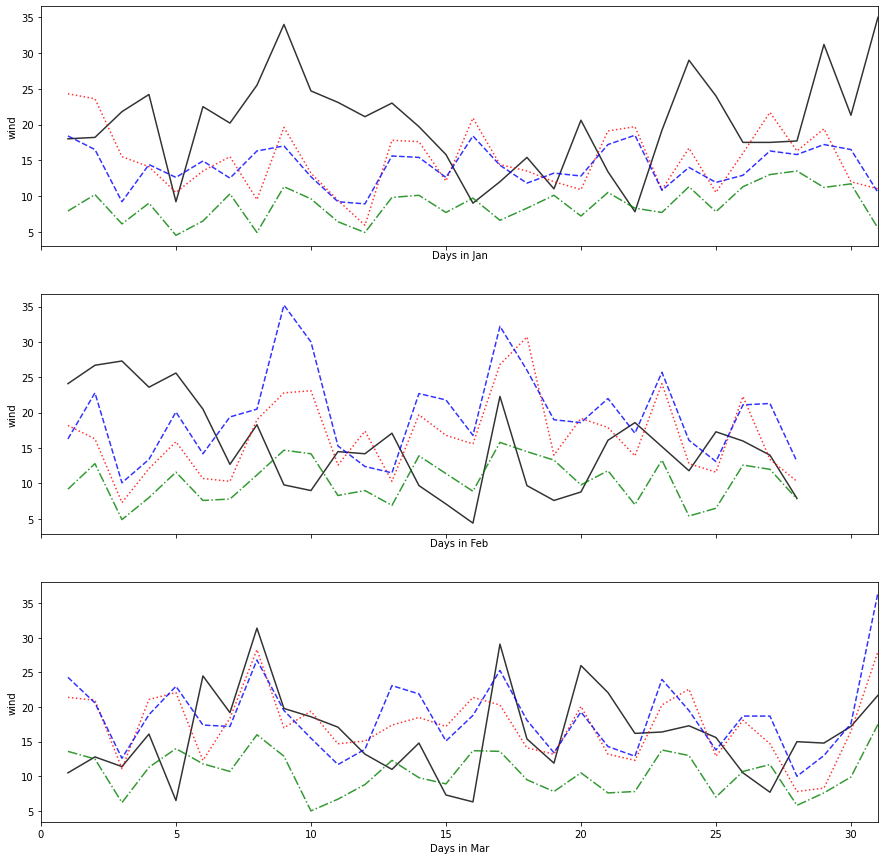

In [68]:
fig, ax = plt.subplots(3, figsize=(15,15), sharex=True)
ax[0].plot(df_cch_wind_Jan_2018['Day'],df_cch_wind_Jan_2018['Value'], color="black", alpha=0.8, ls = '-')
ax[0].plot(df_cch_wind_Jan_2019['Day'],df_cch_wind_Jan_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[0].plot(df_hka_wind_Jan_2019['Day'],df_hka_wind_Jan_2019['Value'], color="blue", alpha=0.8, ls = '--')
ax[0].plot(df_kp_wind_Jan_2019['Day'],df_kp_wind_Jan_2019['Value'], color="green", alpha=0.8, ls = '-.')
ax[0].set_xlim([0,31])
ax[0].set_xlabel('Days in Jan')
ax[0].set_ylabel('wind')

ax[1].plot(df_cch_wind_Feb_2018['Day'],df_cch_wind_Feb_2018['Value'], color="black", alpha=0.8, ls = '-')
ax[1].plot(df_cch_wind_Feb_2019['Day'],df_cch_wind_Feb_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[1].plot(df_hka_wind_Feb_2019['Day'],df_hka_wind_Feb_2019['Value'], color="blue", alpha=0.8, ls = '--')
ax[1].plot(df_kp_wind_Feb_2019['Day'],df_kp_wind_Feb_2019['Value'], color="green", alpha=0.8, ls = '-.')
ax[1].set_xlim([0,31])
ax[1].set_xlabel('Days in Feb')
ax[1].set_ylabel('wind')

ax[2].plot(df_cch_wind_Mar_2018['Day'],df_cch_wind_Mar_2018['Value'], color="black", alpha=0.8, ls = '-')
ax[2].plot(df_cch_wind_Mar_2019['Day'],df_cch_wind_Mar_2019['Value'], color="red", alpha=0.8, ls = ':')
ax[2].plot(df_hka_wind_Mar_2019['Day'],df_hka_wind_Mar_2019['Value'], color="blue", alpha=0.8, ls = '--')
ax[2].plot(df_kp_wind_Mar_2019['Day'],df_kp_wind_Mar_2019['Value'], color="green", alpha=0.8, ls = '-.')
ax[2].set_xlim([0,31])
ax[2].set_xlabel('Days in Mar')
ax[2].set_ylabel('wind')

# Although trending is the roughly similar, we can see that king's park's values are lower because it is probably more inland compared to hka and cch. If we are looking at coastal bridges, it may be less plausible to add inland wind values. Probably stronger correlation towards coastal areas would be better

In [69]:
# Year 2018
df_avg_temp_Jan_2018 = pd.DataFrame()
df_avg_temp_Jan_2018['Year'] = df_cch_temp_Jan_2018['Year']
df_avg_temp_Jan_2018['Month'] = df_cch_temp_Jan_2018['Month']
df_avg_temp_Jan_2018['Day'] = df_cch_temp_Jan_2018['Day']
df_avg_temp_Jan_2018['Value'] = (df_cch_temp_Jan_2018['Value'] + df_hka_temp_Jan_2018['Value'] + df_kp_temp_Jan_2018['Value'])/3
df_avg_temp_Feb_2018 = pd.DataFrame()
df_avg_temp_Feb_2018['Year'] = df_cch_temp_Feb_2018['Year']
df_avg_temp_Feb_2018['Month'] = df_cch_temp_Feb_2018['Month']
df_avg_temp_Feb_2018['Day'] = df_cch_temp_Feb_2018['Day']
df_avg_temp_Feb_2018['Value'] = (df_cch_temp_Feb_2018['Value'] + df_hka_temp_Feb_2018['Value'] + df_kp_temp_Feb_2018['Value'])/3
df_avg_temp_Mar_2018 = pd.DataFrame()
df_avg_temp_Mar_2018['Year'] = df_cch_temp_Mar_2018['Year']
df_avg_temp_Mar_2018['Month'] = df_cch_temp_Mar_2018['Month']
df_avg_temp_Mar_2018['Day'] = df_cch_temp_Mar_2018['Day']
df_avg_temp_Mar_2018['Value'] = (df_cch_temp_Mar_2018['Value'] + df_hka_temp_Mar_2018['Value'] + df_kp_temp_Mar_2018['Value'])/3
df_avg_temp_Apr_2018 = pd.DataFrame()
df_avg_temp_Apr_2018['Year'] = df_cch_temp_Apr_2018['Year']
df_avg_temp_Apr_2018['Month'] = df_cch_temp_Apr_2018['Month']
df_avg_temp_Apr_2018['Day'] = df_cch_temp_Apr_2018['Day']
df_avg_temp_Apr_2018['Value'] = (df_cch_temp_Apr_2018['Value'] + df_hka_temp_Apr_2018['Value'] + df_kp_temp_Apr_2018['Value'])/3
df_avg_temp_May_2018 = pd.DataFrame()
df_avg_temp_May_2018['Year'] = df_cch_temp_May_2018['Year']
df_avg_temp_May_2018['Month'] = df_cch_temp_May_2018['Month']
df_avg_temp_May_2018['Day'] = df_cch_temp_May_2018['Day']
df_avg_temp_May_2018['Value'] = (df_cch_temp_May_2018['Value'] + df_hka_temp_May_2018['Value'] + df_kp_temp_May_2018['Value'])/3
df_avg_temp_Jun_2018 = pd.DataFrame()
df_avg_temp_Jun_2018['Year'] = df_cch_temp_Jun_2018['Year']
df_avg_temp_Jun_2018['Month'] = df_cch_temp_Jun_2018['Month']
df_avg_temp_Jun_2018['Day'] = df_cch_temp_Jun_2018['Day']
df_avg_temp_Jun_2018['Value'] = (df_cch_temp_Jun_2018['Value'] + df_hka_temp_Jun_2018['Value'] + df_kp_temp_Jun_2018['Value'])/3
df_avg_temp_Jul_2018 = pd.DataFrame()
df_avg_temp_Jul_2018['Year'] = df_cch_temp_Jul_2018['Year']
df_avg_temp_Jul_2018['Month'] = df_cch_temp_Jul_2018['Month']
df_avg_temp_Jul_2018['Day'] = df_cch_temp_Jul_2018['Day']
df_avg_temp_Jul_2018['Value'] = (df_cch_temp_Jul_2018['Value'] + df_hka_temp_Jul_2018['Value'] + df_kp_temp_Jul_2018['Value'])/3
df_avg_temp_Aug_2018 = pd.DataFrame()
df_avg_temp_Aug_2018['Year'] = df_cch_temp_Aug_2018['Year']
df_avg_temp_Aug_2018['Month'] = df_cch_temp_Aug_2018['Month']
df_avg_temp_Aug_2018['Day'] = df_cch_temp_Aug_2018['Day']
df_avg_temp_Aug_2018['Value'] = (df_cch_temp_Aug_2018['Value'] + df_hka_temp_Aug_2018['Value'] + df_kp_temp_Aug_2018['Value'])/3
df_avg_temp_Sep_2018 = pd.DataFrame()
df_avg_temp_Sep_2018['Year'] = df_cch_temp_Sep_2018['Year']
df_avg_temp_Sep_2018['Month'] = df_cch_temp_Sep_2018['Month']
df_avg_temp_Sep_2018['Day'] = df_cch_temp_Sep_2018['Day']
df_avg_temp_Sep_2018['Value'] = (df_cch_temp_Sep_2018['Value'] + df_hka_temp_Sep_2018['Value'] + df_kp_temp_Sep_2018['Value'])/3
df_avg_temp_Oct_2018 = pd.DataFrame()
df_avg_temp_Oct_2018['Year'] = df_cch_temp_Oct_2018['Year']
df_avg_temp_Oct_2018['Month'] = df_cch_temp_Oct_2018['Month']
df_avg_temp_Oct_2018['Day'] = df_cch_temp_Oct_2018['Day']
df_avg_temp_Oct_2018['Value'] = (df_cch_temp_Oct_2018['Value'] + df_hka_temp_Oct_2018['Value'] + df_kp_temp_Oct_2018['Value'])/3
df_avg_temp_Nov_2018 = pd.DataFrame()
df_avg_temp_Nov_2018['Year'] = df_cch_temp_Nov_2018['Year']
df_avg_temp_Nov_2018['Month'] = df_cch_temp_Nov_2018['Month']
df_avg_temp_Nov_2018['Day'] = df_cch_temp_Nov_2018['Day']
df_avg_temp_Nov_2018['Value'] = (df_cch_temp_Nov_2018['Value'] + df_hka_temp_Nov_2018['Value'] + df_kp_temp_Nov_2018['Value'])/3
df_avg_temp_Dec_2018 = pd.DataFrame()
df_avg_temp_Dec_2018['Year'] = df_cch_temp_Dec_2018['Year']
df_avg_temp_Dec_2018['Month'] = df_cch_temp_Dec_2018['Month']
df_avg_temp_Dec_2018['Day'] = df_cch_temp_Dec_2018['Day']
df_avg_temp_Dec_2018['Value'] = (df_cch_temp_Dec_2018['Value'] + df_hka_temp_Dec_2018['Value'] + df_kp_temp_Dec_2018['Value'])/3
# Year 2019
df_avg_temp_Jan_2019 = pd.DataFrame()
df_avg_temp_Jan_2019['Year'] = df_cch_temp_Jan_2019['Year']
df_avg_temp_Jan_2019['Month'] = df_cch_temp_Jan_2019['Month']
df_avg_temp_Jan_2019['Day'] = df_cch_temp_Jan_2019['Day']
df_avg_temp_Jan_2019['Value'] = (df_cch_temp_Jan_2019['Value'] + df_hka_temp_Jan_2019['Value'] + df_kp_temp_Jan_2019['Value'])/3
df_avg_temp_Feb_2019 = pd.DataFrame()
df_avg_temp_Feb_2019['Year'] = df_cch_temp_Feb_2019['Year']
df_avg_temp_Feb_2019['Month'] = df_cch_temp_Feb_2019['Month']
df_avg_temp_Feb_2019['Day'] = df_cch_temp_Feb_2019['Day']
df_avg_temp_Feb_2019['Value'] = (df_cch_temp_Feb_2019['Value'] + df_hka_temp_Feb_2019['Value'] + df_kp_temp_Feb_2019['Value'])/3
df_avg_temp_Mar_2019 = pd.DataFrame()
df_avg_temp_Mar_2019['Year'] = df_cch_temp_Mar_2019['Year']
df_avg_temp_Mar_2019['Month'] = df_cch_temp_Mar_2019['Month']
df_avg_temp_Mar_2019['Day'] = df_cch_temp_Mar_2019['Day']
df_avg_temp_Mar_2019['Value'] = (df_cch_temp_Mar_2019['Value'] + df_hka_temp_Mar_2019['Value'] + df_kp_temp_Mar_2019['Value'])/3
df_avg_temp_Apr_2019 = pd.DataFrame()
df_avg_temp_Apr_2019['Year'] = df_cch_temp_Apr_2019['Year']
df_avg_temp_Apr_2019['Month'] = df_cch_temp_Apr_2019['Month']
df_avg_temp_Apr_2019['Day'] = df_cch_temp_Apr_2019['Day']
df_avg_temp_Apr_2019['Value'] = (df_cch_temp_Apr_2019['Value'] + df_hka_temp_Apr_2019['Value'] + df_kp_temp_Apr_2019['Value'])/3
df_avg_temp_May_2019 = pd.DataFrame()
df_avg_temp_May_2019['Year'] = df_cch_temp_May_2019['Year']
df_avg_temp_May_2019['Month'] = df_cch_temp_May_2019['Month']
df_avg_temp_May_2019['Day'] = df_cch_temp_May_2019['Day']
df_avg_temp_May_2019['Value'] = (df_cch_temp_May_2019['Value'] + df_hka_temp_May_2019['Value'] + df_kp_temp_May_2019['Value'])/3
df_avg_temp_Jun_2019 = pd.DataFrame()
df_avg_temp_Jun_2019['Year'] = df_cch_temp_Jun_2019['Year']
df_avg_temp_Jun_2019['Month'] = df_cch_temp_Jun_2019['Month']
df_avg_temp_Jun_2019['Day'] = df_cch_temp_Jun_2019['Day']
df_avg_temp_Jun_2019['Value'] = (df_cch_temp_Jun_2019['Value'] + df_hka_temp_Jun_2019['Value'] + df_kp_temp_Jun_2019['Value'])/3
df_avg_temp_Jul_2019 = pd.DataFrame()
df_avg_temp_Jul_2019['Year'] = df_cch_temp_Jul_2019['Year']
df_avg_temp_Jul_2019['Month'] = df_cch_temp_Jul_2019['Month']
df_avg_temp_Jul_2019['Day'] = df_cch_temp_Jul_2019['Day']
df_avg_temp_Jul_2019['Value'] = (df_cch_temp_Jul_2019['Value'] + df_hka_temp_Jul_2019['Value'] + df_kp_temp_Jul_2019['Value'])/3
df_avg_temp_Aug_2019 = pd.DataFrame()
df_avg_temp_Aug_2019['Year'] = df_cch_temp_Aug_2019['Year']
df_avg_temp_Aug_2019['Month'] = df_cch_temp_Aug_2019['Month']
df_avg_temp_Aug_2019['Day'] = df_cch_temp_Aug_2019['Day']
df_avg_temp_Aug_2019['Value'] = (df_cch_temp_Aug_2019['Value'] + df_hka_temp_Aug_2019['Value'] + df_kp_temp_Aug_2019['Value'])/3
df_avg_temp_Sep_2019 = pd.DataFrame()
df_avg_temp_Sep_2019['Year'] = df_cch_temp_Sep_2019['Year']
df_avg_temp_Sep_2019['Month'] = df_cch_temp_Sep_2019['Month']
df_avg_temp_Sep_2019['Day'] = df_cch_temp_Sep_2019['Day']
df_avg_temp_Sep_2019['Value'] = (df_cch_temp_Sep_2019['Value'] + df_hka_temp_Sep_2019['Value'] + df_kp_temp_Sep_2019['Value'])/3
df_avg_temp_Oct_2019 = pd.DataFrame()
df_avg_temp_Oct_2019['Year'] = df_cch_temp_Oct_2019['Year']
df_avg_temp_Oct_2019['Month'] = df_cch_temp_Oct_2019['Month']
df_avg_temp_Oct_2019['Day'] = df_cch_temp_Oct_2019['Day']
df_avg_temp_Oct_2019['Value'] = (df_cch_temp_Oct_2019['Value'] + df_hka_temp_Oct_2019['Value'] + df_kp_temp_Oct_2019['Value'])/3
df_avg_temp_Nov_2019 = pd.DataFrame()
df_avg_temp_Nov_2019['Year'] = df_cch_temp_Nov_2019['Year']
df_avg_temp_Nov_2019['Month'] = df_cch_temp_Nov_2019['Month']
df_avg_temp_Nov_2019['Day'] = df_cch_temp_Nov_2019['Day']
df_avg_temp_Nov_2019['Value'] = (df_cch_temp_Nov_2019['Value'] + df_hka_temp_Nov_2019['Value'] + df_kp_temp_Nov_2019['Value'])/3
df_avg_temp_Dec_2019 = pd.DataFrame()
df_avg_temp_Dec_2019['Year'] = df_cch_temp_Dec_2019['Year']
df_avg_temp_Dec_2019['Month'] = df_cch_temp_Dec_2019['Month']
df_avg_temp_Dec_2019['Day'] = df_cch_temp_Dec_2019['Day']
df_avg_temp_Dec_2019['Value'] = (df_cch_temp_Dec_2019['Value'] + df_hka_temp_Dec_2019['Value'] + df_kp_temp_Dec_2019['Value'])/3
# Year 2020
df_avg_temp_Jan_2020 = pd.DataFrame()
df_avg_temp_Jan_2020['Year'] = df_cch_temp_Jan_2020['Year']
df_avg_temp_Jan_2020['Month'] = df_cch_temp_Jan_2020['Month']
df_avg_temp_Jan_2020['Day'] = df_cch_temp_Jan_2020['Day']
df_avg_temp_Jan_2020['Value'] = (df_cch_temp_Jan_2020['Value'] + df_hka_temp_Jan_2020['Value'] + df_kp_temp_Jan_2020['Value'])/3
df_avg_temp_Feb_2020 = pd.DataFrame()
df_avg_temp_Feb_2020['Year'] = df_cch_temp_Feb_2020['Year']
df_avg_temp_Feb_2020['Month'] = df_cch_temp_Feb_2020['Month']
df_avg_temp_Feb_2020['Day'] = df_cch_temp_Feb_2020['Day']
df_avg_temp_Feb_2020['Value'] = (df_cch_temp_Feb_2020['Value'] + df_hka_temp_Feb_2020['Value'] + df_kp_temp_Feb_2020['Value'])/3
df_avg_temp_Mar_2020 = pd.DataFrame()
df_avg_temp_Mar_2020['Year'] = df_cch_temp_Mar_2020['Year']
df_avg_temp_Mar_2020['Month'] = df_cch_temp_Mar_2020['Month']
df_avg_temp_Mar_2020['Day'] = df_cch_temp_Mar_2020['Day']
df_avg_temp_Mar_2020['Value'] = (df_cch_temp_Mar_2020['Value'] + df_hka_temp_Mar_2020['Value'] + df_kp_temp_Mar_2020['Value'])/3
df_avg_temp_Apr_2020 = pd.DataFrame()
df_avg_temp_Apr_2020['Year'] = df_cch_temp_Apr_2020['Year']
df_avg_temp_Apr_2020['Month'] = df_cch_temp_Apr_2020['Month']
df_avg_temp_Apr_2020['Day'] = df_cch_temp_Apr_2020['Day']
df_avg_temp_Apr_2020['Value'] = (df_cch_temp_Apr_2020['Value'] + df_hka_temp_Apr_2020['Value'] + df_kp_temp_Apr_2020['Value'])/3
df_avg_temp_May_2020 = pd.DataFrame()
df_avg_temp_May_2020['Year'] = df_cch_temp_May_2020['Year']
df_avg_temp_May_2020['Month'] = df_cch_temp_May_2020['Month']
df_avg_temp_May_2020['Day'] = df_cch_temp_May_2020['Day']
df_avg_temp_May_2020['Value'] = (df_cch_temp_May_2020['Value'] + df_hka_temp_May_2020['Value'] + df_kp_temp_May_2020['Value'])/3
df_avg_temp_Jun_2020 = pd.DataFrame()
df_avg_temp_Jun_2020['Year'] = df_cch_temp_Jun_2020['Year']
df_avg_temp_Jun_2020['Month'] = df_cch_temp_Jun_2020['Month']
df_avg_temp_Jun_2020['Day'] = df_cch_temp_Jun_2020['Day']
df_avg_temp_Jun_2020['Value'] = (df_cch_temp_Jun_2020['Value'] + df_hka_temp_Jun_2020['Value'] + df_kp_temp_Jun_2020['Value'])/3
df_avg_temp_Jul_2020 = pd.DataFrame()
df_avg_temp_Jul_2020['Year'] = df_cch_temp_Jul_2020['Year']
df_avg_temp_Jul_2020['Month'] = df_cch_temp_Jul_2020['Month']
df_avg_temp_Jul_2020['Day'] = df_cch_temp_Jul_2020['Day']
df_avg_temp_Jul_2020['Value'] = (df_cch_temp_Jul_2020['Value'] + df_hka_temp_Jul_2020['Value'] + df_kp_temp_Jul_2020['Value'])/3
df_avg_temp_Aug_2020 = pd.DataFrame()
df_avg_temp_Aug_2020['Year'] = df_cch_temp_Aug_2020['Year']
df_avg_temp_Aug_2020['Month'] = df_cch_temp_Aug_2020['Month']
df_avg_temp_Aug_2020['Day'] = df_cch_temp_Aug_2020['Day']
df_avg_temp_Aug_2020['Value'] = (df_cch_temp_Aug_2020['Value'] + df_hka_temp_Aug_2020['Value'] + df_kp_temp_Aug_2020['Value'])/3
df_avg_temp_Sep_2020 = pd.DataFrame()
df_avg_temp_Sep_2020['Year'] = df_cch_temp_Sep_2020['Year']
df_avg_temp_Sep_2020['Month'] = df_cch_temp_Sep_2020['Month']
df_avg_temp_Sep_2020['Day'] = df_cch_temp_Sep_2020['Day']
df_avg_temp_Sep_2020['Value'] = (df_cch_temp_Sep_2020['Value'] + df_hka_temp_Sep_2020['Value'] + df_kp_temp_Sep_2020['Value'])/3
df_avg_temp_Oct_2020 = pd.DataFrame()
df_avg_temp_Oct_2020['Year'] = df_cch_temp_Oct_2020['Year']
df_avg_temp_Oct_2020['Month'] = df_cch_temp_Oct_2020['Month']
df_avg_temp_Oct_2020['Day'] = df_cch_temp_Oct_2020['Day']
df_avg_temp_Oct_2020['Value'] = (df_cch_temp_Oct_2020['Value'] + df_hka_temp_Oct_2020['Value'] + df_kp_temp_Oct_2020['Value'])/3
df_avg_temp_Nov_2020 = pd.DataFrame()
df_avg_temp_Nov_2020['Year'] = df_cch_temp_Nov_2020['Year']
df_avg_temp_Nov_2020['Month'] = df_cch_temp_Nov_2020['Month']
df_avg_temp_Nov_2020['Day'] = df_cch_temp_Nov_2020['Day']
df_avg_temp_Nov_2020['Value'] = (df_cch_temp_Nov_2020['Value'] + df_hka_temp_Nov_2020['Value'] + df_kp_temp_Nov_2020['Value'])/3
df_avg_temp_Dec_2020 = pd.DataFrame()
df_avg_temp_Dec_2020['Year'] = df_cch_temp_Dec_2020['Year']
df_avg_temp_Dec_2020['Month'] = df_cch_temp_Dec_2020['Month']
df_avg_temp_Dec_2020['Day'] = df_cch_temp_Dec_2020['Day']
df_avg_temp_Dec_2020['Value'] = (df_cch_temp_Dec_2020['Value'] + df_hka_temp_Dec_2020['Value'] + df_kp_temp_Dec_2020['Value'])/3
# Year 2021
df_avg_temp_Jan_2021 = pd.DataFrame()
df_avg_temp_Jan_2021['Year'] = df_cch_temp_Jan_2021['Year']
df_avg_temp_Jan_2021['Month'] = df_cch_temp_Jan_2021['Month']
df_avg_temp_Jan_2021['Day'] = df_cch_temp_Jan_2021['Day']
df_avg_temp_Jan_2021['Value'] = (df_cch_temp_Jan_2021['Value'] + df_hka_temp_Jan_2021['Value'] + df_kp_temp_Jan_2021['Value'])/3
df_avg_temp_Feb_2021 = pd.DataFrame()
df_avg_temp_Feb_2021['Year'] = df_cch_temp_Feb_2021['Year']
df_avg_temp_Feb_2021['Month'] = df_cch_temp_Feb_2021['Month']
df_avg_temp_Feb_2021['Day'] = df_cch_temp_Feb_2021['Day']
df_avg_temp_Feb_2021['Value'] = (df_cch_temp_Feb_2021['Value'] + df_hka_temp_Feb_2021['Value'] + df_kp_temp_Feb_2021['Value'])/3
df_avg_temp_Mar_2021 = pd.DataFrame()
df_avg_temp_Mar_2021['Year'] = df_cch_temp_Mar_2021['Year']
df_avg_temp_Mar_2021['Month'] = df_cch_temp_Mar_2021['Month']
df_avg_temp_Mar_2021['Day'] = df_cch_temp_Mar_2021['Day']
df_avg_temp_Mar_2021['Value'] = (df_cch_temp_Mar_2021['Value'] + df_hka_temp_Mar_2021['Value'] + df_kp_temp_Mar_2021['Value'])/3
df_avg_temp_Apr_2021 = pd.DataFrame()
df_avg_temp_Apr_2021['Year'] = df_cch_temp_Apr_2021['Year']
df_avg_temp_Apr_2021['Month'] = df_cch_temp_Apr_2021['Month']
df_avg_temp_Apr_2021['Day'] = df_cch_temp_Apr_2021['Day']
df_avg_temp_Apr_2021['Value'] = (df_cch_temp_Apr_2021['Value'] + df_hka_temp_Apr_2021['Value'] + df_kp_temp_Apr_2021['Value'])/3
df_avg_temp_May_2021 = pd.DataFrame()
df_avg_temp_May_2021['Year'] = df_cch_temp_May_2021['Year']
df_avg_temp_May_2021['Month'] = df_cch_temp_May_2021['Month']
df_avg_temp_May_2021['Day'] = df_cch_temp_May_2021['Day']
df_avg_temp_May_2021['Value'] = (df_cch_temp_May_2021['Value'] + df_hka_temp_May_2021['Value'] + df_kp_temp_May_2021['Value'])/3

# Wind values
# Year 2018
df_avg_wind_Jan_2018 = pd.DataFrame()
df_avg_wind_Jan_2018['Year'] = df_cch_wind_Jan_2018['Year']
df_avg_wind_Jan_2018['Month'] = df_cch_wind_Jan_2018['Month']
df_avg_wind_Jan_2018['Day'] = df_cch_wind_Jan_2018['Day']
df_avg_wind_Jan_2018['Value'] = (df_cch_wind_Jan_2018['Value'] + df_hka_wind_Jan_2018['Value'])/2
df_avg_wind_Feb_2018 = pd.DataFrame()
df_avg_wind_Feb_2018['Year'] = df_cch_wind_Feb_2018['Year']
df_avg_wind_Feb_2018['Month'] = df_cch_wind_Feb_2018['Month']
df_avg_wind_Feb_2018['Day'] = df_cch_wind_Feb_2018['Day']
df_avg_wind_Feb_2018['Value'] = (df_cch_wind_Feb_2018['Value'] + df_hka_wind_Feb_2018['Value'])/2
df_avg_wind_Mar_2018 = pd.DataFrame()
df_avg_wind_Mar_2018['Year'] = df_cch_wind_Mar_2018['Year']
df_avg_wind_Mar_2018['Month'] = df_cch_wind_Mar_2018['Month']
df_avg_wind_Mar_2018['Day'] = df_cch_wind_Mar_2018['Day']
df_avg_wind_Mar_2018['Value'] = (df_cch_wind_Mar_2018['Value'] + df_hka_wind_Mar_2018['Value'])/2
df_avg_wind_Apr_2018 = pd.DataFrame()
df_avg_wind_Apr_2018['Year'] = df_cch_wind_Apr_2018['Year']
df_avg_wind_Apr_2018['Month'] = df_cch_wind_Apr_2018['Month']
df_avg_wind_Apr_2018['Day'] = df_cch_wind_Apr_2018['Day']
df_avg_wind_Apr_2018['Value'] = (df_cch_wind_Apr_2018['Value'] + df_hka_wind_Apr_2018['Value'])/2
df_avg_wind_May_2018 = pd.DataFrame()
df_avg_wind_May_2018['Year'] = df_cch_wind_May_2018['Year']
df_avg_wind_May_2018['Month'] = df_cch_wind_May_2018['Month']
df_avg_wind_May_2018['Day'] = df_cch_wind_May_2018['Day']
df_avg_wind_May_2018['Value'] = (df_cch_wind_May_2018['Value'] + df_hka_wind_May_2018['Value'])/2
df_avg_wind_Jun_2018 = pd.DataFrame()
df_avg_wind_Jun_2018['Year'] = df_cch_wind_Jun_2018['Year']
df_avg_wind_Jun_2018['Month'] = df_cch_wind_Jun_2018['Month']
df_avg_wind_Jun_2018['Day'] = df_cch_wind_Jun_2018['Day']
df_avg_wind_Jun_2018['Value'] = (df_cch_wind_Jun_2018['Value'] + df_hka_wind_Jun_2018['Value'])/2
df_avg_wind_Jul_2018 = pd.DataFrame()
df_avg_wind_Jul_2018['Year'] = df_cch_wind_Jul_2018['Year']
df_avg_wind_Jul_2018['Month'] = df_cch_wind_Jul_2018['Month']
df_avg_wind_Jul_2018['Day'] = df_cch_wind_Jul_2018['Day']
df_avg_wind_Jul_2018['Value'] = (df_cch_wind_Jul_2018['Value'] + df_hka_wind_Jul_2018['Value'])/2
df_avg_wind_Aug_2018 = pd.DataFrame()
df_avg_wind_Aug_2018['Year'] = df_cch_wind_Aug_2018['Year']
df_avg_wind_Aug_2018['Month'] = df_cch_wind_Aug_2018['Month']
df_avg_wind_Aug_2018['Day'] = df_cch_wind_Aug_2018['Day']
df_avg_wind_Aug_2018['Value'] = (df_cch_wind_Aug_2018['Value'] + df_hka_wind_Aug_2018['Value'])/2
df_avg_wind_Sep_2018 = pd.DataFrame()
df_avg_wind_Sep_2018['Year'] = df_cch_wind_Sep_2018['Year']
df_avg_wind_Sep_2018['Month'] = df_cch_wind_Sep_2018['Month']
df_avg_wind_Sep_2018['Day'] = df_cch_wind_Sep_2018['Day']
df_avg_wind_Sep_2018['Value'] = (df_cch_wind_Sep_2018['Value'] + df_hka_wind_Sep_2018['Value'])/2
df_avg_wind_Oct_2018 = pd.DataFrame()
df_avg_wind_Oct_2018['Year'] = df_cch_wind_Oct_2018['Year']
df_avg_wind_Oct_2018['Month'] = df_cch_wind_Oct_2018['Month']
df_avg_wind_Oct_2018['Day'] = df_cch_wind_Oct_2018['Day']
df_avg_wind_Oct_2018['Value'] = (df_cch_wind_Oct_2018['Value'] + df_hka_wind_Oct_2018['Value'])/2
df_avg_wind_Nov_2018 = pd.DataFrame()
df_avg_wind_Nov_2018['Year'] = df_cch_wind_Nov_2018['Year']
df_avg_wind_Nov_2018['Month'] = df_cch_wind_Nov_2018['Month']
df_avg_wind_Nov_2018['Day'] = df_cch_wind_Nov_2018['Day']
df_avg_wind_Nov_2018['Value'] = (df_cch_wind_Nov_2018['Value'] + df_hka_wind_Nov_2018['Value'])/2
df_avg_wind_Dec_2018 = pd.DataFrame()
df_avg_wind_Dec_2018['Year'] = df_cch_wind_Dec_2018['Year']
df_avg_wind_Dec_2018['Month'] = df_cch_wind_Dec_2018['Month']
df_avg_wind_Dec_2018['Day'] = df_cch_wind_Dec_2018['Day']
df_avg_wind_Dec_2018['Value'] = (df_cch_wind_Dec_2018['Value'] + df_hka_wind_Dec_2018['Value'])/2
# Year 2019
df_avg_wind_Jan_2019 = pd.DataFrame()
df_avg_wind_Jan_2019['Year'] = df_cch_wind_Jan_2019['Year']
df_avg_wind_Jan_2019['Month'] = df_cch_wind_Jan_2019['Month']
df_avg_wind_Jan_2019['Day'] = df_cch_wind_Jan_2019['Day']
df_avg_wind_Jan_2019['Value'] = (df_cch_wind_Jan_2019['Value'] + df_hka_wind_Jan_2019['Value'])/2
df_avg_wind_Feb_2019 = pd.DataFrame()
df_avg_wind_Feb_2019['Year'] = df_cch_wind_Feb_2019['Year']
df_avg_wind_Feb_2019['Month'] = df_cch_wind_Feb_2019['Month']
df_avg_wind_Feb_2019['Day'] = df_cch_wind_Feb_2019['Day']
df_avg_wind_Feb_2019['Value'] = (df_cch_wind_Feb_2019['Value'] + df_hka_wind_Feb_2019['Value'])/2
df_avg_wind_Mar_2019 = pd.DataFrame()
df_avg_wind_Mar_2019['Year'] = df_cch_wind_Mar_2019['Year']
df_avg_wind_Mar_2019['Month'] = df_cch_wind_Mar_2019['Month']
df_avg_wind_Mar_2019['Day'] = df_cch_wind_Mar_2019['Day']
df_avg_wind_Mar_2019['Value'] = (df_cch_wind_Mar_2019['Value'] + df_hka_wind_Mar_2019['Value'])/2
df_avg_wind_Apr_2019 = pd.DataFrame()
df_avg_wind_Apr_2019['Year'] = df_cch_wind_Apr_2019['Year']
df_avg_wind_Apr_2019['Month'] = df_cch_wind_Apr_2019['Month']
df_avg_wind_Apr_2019['Day'] = df_cch_wind_Apr_2019['Day']
df_avg_wind_Apr_2019['Value'] = (df_cch_wind_Apr_2019['Value'] + df_hka_wind_Apr_2019['Value'])/2
df_avg_wind_May_2019 = pd.DataFrame()
df_avg_wind_May_2019['Year'] = df_cch_wind_May_2019['Year']
df_avg_wind_May_2019['Month'] = df_cch_wind_May_2019['Month']
df_avg_wind_May_2019['Day'] = df_cch_wind_May_2019['Day']
df_avg_wind_May_2019['Value'] = (df_cch_wind_May_2019['Value'] + df_hka_wind_May_2019['Value'])/2
df_avg_wind_Jun_2019 = pd.DataFrame()
df_avg_wind_Jun_2019['Year'] = df_cch_wind_Jun_2019['Year']
df_avg_wind_Jun_2019['Month'] = df_cch_wind_Jun_2019['Month']
df_avg_wind_Jun_2019['Day'] = df_cch_wind_Jun_2019['Day']
df_avg_wind_Jun_2019['Value'] = (df_cch_wind_Jun_2019['Value'] + df_hka_wind_Jun_2019['Value'])/2
df_avg_wind_Jul_2019 = pd.DataFrame()
df_avg_wind_Jul_2019['Year'] = df_cch_wind_Jul_2019['Year']
df_avg_wind_Jul_2019['Month'] = df_cch_wind_Jul_2019['Month']
df_avg_wind_Jul_2019['Day'] = df_cch_wind_Jul_2019['Day']
df_avg_wind_Jul_2019['Value'] = (df_cch_wind_Jul_2019['Value'] + df_hka_wind_Jul_2019['Value'])/2
df_avg_wind_Aug_2019 = pd.DataFrame()
df_avg_wind_Aug_2019['Year'] = df_cch_wind_Aug_2019['Year']
df_avg_wind_Aug_2019['Month'] = df_cch_wind_Aug_2019['Month']
df_avg_wind_Aug_2019['Day'] = df_cch_wind_Aug_2019['Day']
df_avg_wind_Aug_2019['Value'] = (df_cch_wind_Aug_2019['Value'] + df_hka_wind_Aug_2019['Value'])/2
df_avg_wind_Sep_2019 = pd.DataFrame()
df_avg_wind_Sep_2019['Year'] = df_cch_wind_Sep_2019['Year']
df_avg_wind_Sep_2019['Month'] = df_cch_wind_Sep_2019['Month']
df_avg_wind_Sep_2019['Day'] = df_cch_wind_Sep_2019['Day']
df_avg_wind_Sep_2019['Value'] = (df_cch_wind_Sep_2019['Value'] + df_hka_wind_Sep_2019['Value'])/2
df_avg_wind_Oct_2019 = pd.DataFrame()
df_avg_wind_Oct_2019['Year'] = df_cch_wind_Oct_2019['Year']
df_avg_wind_Oct_2019['Month'] = df_cch_wind_Oct_2019['Month']
df_avg_wind_Oct_2019['Day'] = df_cch_wind_Oct_2019['Day']
df_avg_wind_Oct_2019['Value'] = (df_cch_wind_Oct_2019['Value'] + df_hka_wind_Oct_2019['Value'])/2
df_avg_wind_Nov_2019 = pd.DataFrame()
df_avg_wind_Nov_2019['Year'] = df_cch_wind_Nov_2019['Year']
df_avg_wind_Nov_2019['Month'] = df_cch_wind_Nov_2019['Month']
df_avg_wind_Nov_2019['Day'] = df_cch_wind_Nov_2019['Day']
df_avg_wind_Nov_2019['Value'] = (df_cch_wind_Nov_2019['Value'] + df_hka_wind_Nov_2019['Value'])/2
df_avg_wind_Dec_2019 = pd.DataFrame()
df_avg_wind_Dec_2019['Year'] = df_cch_wind_Dec_2019['Year']
df_avg_wind_Dec_2019['Month'] = df_cch_wind_Dec_2019['Month']
df_avg_wind_Dec_2019['Day'] = df_cch_wind_Dec_2019['Day']
df_avg_wind_Dec_2019['Value'] = (df_cch_wind_Dec_2019['Value'] + df_hka_wind_Dec_2019['Value'])/2
# Year 2020
df_avg_wind_Jan_2020 = pd.DataFrame()
df_avg_wind_Jan_2020['Year'] = df_cch_wind_Jan_2020['Year']
df_avg_wind_Jan_2020['Month'] = df_cch_wind_Jan_2020['Month']
df_avg_wind_Jan_2020['Day'] = df_cch_wind_Jan_2020['Day']
df_avg_wind_Jan_2020['Value'] = (df_cch_wind_Jan_2020['Value'] + df_hka_wind_Jan_2020['Value'])/2
df_avg_wind_Feb_2020 = pd.DataFrame()
df_avg_wind_Feb_2020['Year'] = df_cch_wind_Feb_2020['Year']
df_avg_wind_Feb_2020['Month'] = df_cch_wind_Feb_2020['Month']
df_avg_wind_Feb_2020['Day'] = df_cch_wind_Feb_2020['Day']
df_avg_wind_Feb_2020['Value'] = (df_cch_wind_Feb_2020['Value'] + df_hka_wind_Feb_2020['Value'])/2
df_avg_wind_Mar_2020 = pd.DataFrame()
df_avg_wind_Mar_2020['Year'] = df_cch_wind_Mar_2020['Year']
df_avg_wind_Mar_2020['Month'] = df_cch_wind_Mar_2020['Month']
df_avg_wind_Mar_2020['Day'] = df_cch_wind_Mar_2020['Day']
df_avg_wind_Mar_2020['Value'] = (df_cch_wind_Mar_2020['Value'] + df_hka_wind_Mar_2020['Value'])/2
df_avg_wind_Apr_2020 = pd.DataFrame()
df_avg_wind_Apr_2020['Year'] = df_cch_wind_Apr_2020['Year']
df_avg_wind_Apr_2020['Month'] = df_cch_wind_Apr_2020['Month']
df_avg_wind_Apr_2020['Day'] = df_cch_wind_Apr_2020['Day']
df_avg_wind_Apr_2020['Value'] = (df_cch_wind_Apr_2020['Value'] + df_hka_wind_Apr_2020['Value'])/2
df_avg_wind_May_2020 = pd.DataFrame()
df_avg_wind_May_2020['Year'] = df_cch_wind_May_2020['Year']
df_avg_wind_May_2020['Month'] = df_cch_wind_May_2020['Month']
df_avg_wind_May_2020['Day'] = df_cch_wind_May_2020['Day']
df_avg_wind_May_2020['Value'] = (df_cch_wind_May_2020['Value'] + df_hka_wind_May_2020['Value'])/2
df_avg_wind_Jun_2020 = pd.DataFrame()
df_avg_wind_Jun_2020['Year'] = df_cch_wind_Jun_2020['Year']
df_avg_wind_Jun_2020['Month'] = df_cch_wind_Jun_2020['Month']
df_avg_wind_Jun_2020['Day'] = df_cch_wind_Jun_2020['Day']
df_avg_wind_Jun_2020['Value'] = (df_cch_wind_Jun_2020['Value'] + df_hka_wind_Jun_2020['Value'])/2
df_avg_wind_Jul_2020 = pd.DataFrame()
df_avg_wind_Jul_2020['Year'] = df_cch_wind_Jul_2020['Year']
df_avg_wind_Jul_2020['Month'] = df_cch_wind_Jul_2020['Month']
df_avg_wind_Jul_2020['Day'] = df_cch_wind_Jul_2020['Day']
df_avg_wind_Jul_2020['Value'] = (df_cch_wind_Jul_2020['Value'] + df_hka_wind_Jul_2020['Value'])/2
df_avg_wind_Aug_2020 = pd.DataFrame()
df_avg_wind_Aug_2020['Year'] = df_cch_wind_Aug_2020['Year']
df_avg_wind_Aug_2020['Month'] = df_cch_wind_Aug_2020['Month']
df_avg_wind_Aug_2020['Day'] = df_cch_wind_Aug_2020['Day']
df_avg_wind_Aug_2020['Value'] = (df_cch_wind_Aug_2020['Value'] + df_hka_wind_Aug_2020['Value'])/2
df_avg_wind_Sep_2020 = pd.DataFrame()
df_avg_wind_Sep_2020['Year'] = df_cch_wind_Sep_2020['Year']
df_avg_wind_Sep_2020['Month'] = df_cch_wind_Sep_2020['Month']
df_avg_wind_Sep_2020['Day'] = df_cch_wind_Sep_2020['Day']
df_avg_wind_Sep_2020['Value'] = (df_cch_wind_Sep_2020['Value'] + df_hka_wind_Sep_2020['Value'])/2
df_avg_wind_Oct_2020 = pd.DataFrame()
df_avg_wind_Oct_2020['Year'] = df_cch_wind_Oct_2020['Year']
df_avg_wind_Oct_2020['Month'] = df_cch_wind_Oct_2020['Month']
df_avg_wind_Oct_2020['Day'] = df_cch_wind_Oct_2020['Day']
df_avg_wind_Oct_2020['Value'] = (df_cch_wind_Oct_2020['Value'] + df_hka_wind_Oct_2020['Value'])/2
df_avg_wind_Nov_2020 = pd.DataFrame()
df_avg_wind_Nov_2020['Year'] = df_cch_wind_Nov_2020['Year']
df_avg_wind_Nov_2020['Month'] = df_cch_wind_Nov_2020['Month']
df_avg_wind_Nov_2020['Day'] = df_cch_wind_Nov_2020['Day']
df_avg_wind_Nov_2020['Value'] = (df_cch_wind_Nov_2020['Value'] + df_hka_wind_Nov_2020['Value'])/2
df_avg_wind_Dec_2020 = pd.DataFrame()
df_avg_wind_Dec_2020['Year'] = df_cch_wind_Dec_2020['Year']
df_avg_wind_Dec_2020['Month'] = df_cch_wind_Dec_2020['Month']
df_avg_wind_Dec_2020['Day'] = df_cch_wind_Dec_2020['Day']
df_avg_wind_Dec_2020['Value'] = (df_cch_wind_Dec_2020['Value'] + df_hka_wind_Dec_2020['Value'])/2
# Year 2021
df_avg_wind_Jan_2021 = pd.DataFrame()
df_avg_wind_Jan_2021['Year'] = df_cch_wind_Jan_2021['Year']
df_avg_wind_Jan_2021['Month'] = df_cch_wind_Jan_2021['Month']
df_avg_wind_Jan_2021['Day'] = df_cch_wind_Jan_2021['Day']
df_avg_wind_Jan_2021['Value'] = (df_cch_wind_Jan_2021['Value'] + df_hka_wind_Jan_2021['Value'])/2
df_avg_wind_Feb_2021 = pd.DataFrame()
df_avg_wind_Feb_2021['Year'] = df_cch_wind_Feb_2021['Year']
df_avg_wind_Feb_2021['Month'] = df_cch_wind_Feb_2021['Month']
df_avg_wind_Feb_2021['Day'] = df_cch_wind_Feb_2021['Day']
df_avg_wind_Feb_2021['Value'] = (df_cch_wind_Feb_2021['Value'] + df_hka_wind_Feb_2021['Value'])/2
df_avg_wind_Mar_2021 = pd.DataFrame()
df_avg_wind_Mar_2021['Year'] = df_cch_wind_Mar_2021['Year']
df_avg_wind_Mar_2021['Month'] = df_cch_wind_Mar_2021['Month']
df_avg_wind_Mar_2021['Day'] = df_cch_wind_Mar_2021['Day']
df_avg_wind_Mar_2021['Value'] = (df_cch_wind_Mar_2021['Value'] + df_hka_wind_Mar_2021['Value'])/2
df_avg_wind_Apr_2021 = pd.DataFrame()
df_avg_wind_Apr_2021['Year'] = df_cch_wind_Apr_2021['Year']
df_avg_wind_Apr_2021['Month'] = df_cch_wind_Apr_2021['Month']
df_avg_wind_Apr_2021['Day'] = df_cch_wind_Apr_2021['Day']
df_avg_wind_Apr_2021['Value'] = (df_cch_wind_Apr_2021['Value'] + df_hka_wind_Apr_2021['Value'])/2
df_avg_wind_May_2021 = pd.DataFrame()
df_avg_wind_May_2021['Year'] = df_cch_wind_May_2021['Year']
df_avg_wind_May_2021['Month'] = df_cch_wind_May_2021['Month']
df_avg_wind_May_2021['Day'] = df_cch_wind_May_2021['Day']
df_avg_wind_May_2021['Value'] = (df_cch_wind_May_2021['Value'] + df_hka_wind_May_2021['Value'])/2


# Year 2018
df_avg_diff_temp_Jan_2018 = pd.DataFrame()
df_avg_diff_temp_Jan_2018['Year'] = df_cch_max_temp_Jan_2018['Year']
df_avg_diff_temp_Jan_2018['Month'] = df_cch_max_temp_Jan_2018['Month']
df_avg_diff_temp_Jan_2018['Day'] = df_cch_max_temp_Jan_2018['Day']
df_avg_diff_temp_Jan_2018['Value'] = ((df_cch_max_temp_Jan_2018['Value'] + df_hka_max_temp_Jan_2018['Value'] + df_kp_max_temp_Jan_2018['Value'])/3)-((df_cch_min_temp_Jan_2018['Value'] + df_hka_min_temp_Jan_2018['Value'] + df_kp_min_temp_Jan_2018['Value'])/3)
df_avg_diff_temp_Feb_2018 = pd.DataFrame()
df_avg_diff_temp_Feb_2018['Year'] = df_cch_max_temp_Feb_2018['Year']
df_avg_diff_temp_Feb_2018['Month'] = df_cch_max_temp_Feb_2018['Month']
df_avg_diff_temp_Feb_2018['Day'] = df_cch_max_temp_Feb_2018['Day']
df_avg_diff_temp_Feb_2018['Value'] = ((df_cch_max_temp_Feb_2018['Value'] + df_hka_max_temp_Feb_2018['Value'] + df_kp_max_temp_Feb_2018['Value'])/3)-((df_cch_min_temp_Feb_2018['Value'] + df_hka_min_temp_Feb_2018['Value'] + df_kp_min_temp_Feb_2018['Value'])/3)
df_avg_diff_temp_Mar_2018 = pd.DataFrame()
df_avg_diff_temp_Mar_2018['Year'] = df_cch_max_temp_Mar_2018['Year']
df_avg_diff_temp_Mar_2018['Month'] = df_cch_max_temp_Mar_2018['Month']
df_avg_diff_temp_Mar_2018['Day'] = df_cch_max_temp_Mar_2018['Day']
df_avg_diff_temp_Mar_2018['Value'] = ((df_cch_max_temp_Mar_2018['Value'] + df_hka_max_temp_Mar_2018['Value'] + df_kp_max_temp_Mar_2018['Value'])/3)-((df_cch_min_temp_Mar_2018['Value'] + df_hka_min_temp_Mar_2018['Value'] + df_kp_min_temp_Mar_2018['Value'])/3)
df_avg_diff_temp_Apr_2018 = pd.DataFrame()
df_avg_diff_temp_Apr_2018['Year'] = df_cch_max_temp_Apr_2018['Year']
df_avg_diff_temp_Apr_2018['Month'] = df_cch_max_temp_Apr_2018['Month']
df_avg_diff_temp_Apr_2018['Day'] = df_cch_max_temp_Apr_2018['Day']
df_avg_diff_temp_Apr_2018['Value'] = ((df_cch_max_temp_Apr_2018['Value'] + df_hka_max_temp_Apr_2018['Value'] + df_kp_max_temp_Apr_2018['Value'])/3)-((df_cch_min_temp_Apr_2018['Value'] + df_hka_min_temp_Apr_2018['Value'] + df_kp_min_temp_Apr_2018['Value'])/3)
df_avg_diff_temp_May_2018 = pd.DataFrame()
df_avg_diff_temp_May_2018['Year'] = df_cch_max_temp_May_2018['Year']
df_avg_diff_temp_May_2018['Month'] = df_cch_max_temp_May_2018['Month']
df_avg_diff_temp_May_2018['Day'] = df_cch_max_temp_May_2018['Day']
df_avg_diff_temp_May_2018['Value'] = ((df_cch_max_temp_May_2018['Value'] + df_hka_max_temp_May_2018['Value'] + df_kp_max_temp_May_2018['Value'])/3)-((df_cch_min_temp_May_2018['Value'] + df_hka_min_temp_May_2018['Value'] + df_kp_min_temp_May_2018['Value'])/3)
df_avg_diff_temp_Jun_2018 = pd.DataFrame()
df_avg_diff_temp_Jun_2018['Year'] = df_cch_max_temp_Jun_2018['Year']
df_avg_diff_temp_Jun_2018['Month'] = df_cch_max_temp_Jun_2018['Month']
df_avg_diff_temp_Jun_2018['Day'] = df_cch_max_temp_Jun_2018['Day']
df_avg_diff_temp_Jun_2018['Value'] = ((df_cch_max_temp_Jun_2018['Value'] + df_hka_max_temp_Jun_2018['Value'] + df_kp_max_temp_Jun_2018['Value'])/3)-((df_cch_min_temp_Jun_2018['Value'] + df_hka_min_temp_Jun_2018['Value'] + df_kp_min_temp_Jun_2018['Value'])/3)
df_avg_diff_temp_Jul_2018 = pd.DataFrame()
df_avg_diff_temp_Jul_2018['Year'] = df_cch_max_temp_Jul_2018['Year']
df_avg_diff_temp_Jul_2018['Month'] = df_cch_max_temp_Jul_2018['Month']
df_avg_diff_temp_Jul_2018['Day'] = df_cch_max_temp_Jul_2018['Day']
df_avg_diff_temp_Jul_2018['Value'] = ((df_cch_max_temp_Jul_2018['Value'] + df_hka_max_temp_Jul_2018['Value'] + df_kp_max_temp_Jul_2018['Value'])/3)-((df_cch_min_temp_Jul_2018['Value'] + df_hka_min_temp_Jul_2018['Value'] + df_kp_min_temp_Jul_2018['Value'])/3)
df_avg_diff_temp_Aug_2018 = pd.DataFrame()
df_avg_diff_temp_Aug_2018['Year'] = df_cch_max_temp_Aug_2018['Year']
df_avg_diff_temp_Aug_2018['Month'] = df_cch_max_temp_Aug_2018['Month']
df_avg_diff_temp_Aug_2018['Day'] = df_cch_max_temp_Aug_2018['Day']
df_avg_diff_temp_Aug_2018['Value'] = ((df_cch_max_temp_Aug_2018['Value'] + df_hka_max_temp_Aug_2018['Value'] + df_kp_max_temp_Aug_2018['Value'])/3)-((df_cch_min_temp_Aug_2018['Value'] + df_hka_min_temp_Aug_2018['Value'] + df_kp_min_temp_Aug_2018['Value'])/3)
df_avg_diff_temp_Sep_2018 = pd.DataFrame()
df_avg_diff_temp_Sep_2018['Year'] = df_cch_max_temp_Sep_2018['Year']
df_avg_diff_temp_Sep_2018['Month'] = df_cch_max_temp_Sep_2018['Month']
df_avg_diff_temp_Sep_2018['Day'] = df_cch_max_temp_Sep_2018['Day']
df_avg_diff_temp_Sep_2018['Value'] = ((df_cch_max_temp_Sep_2018['Value'] + df_hka_max_temp_Sep_2018['Value'] + df_kp_max_temp_Sep_2018['Value'])/3)-((df_cch_min_temp_Sep_2018['Value'] + df_hka_min_temp_Sep_2018['Value'] + df_kp_min_temp_Sep_2018['Value'])/3)
df_avg_diff_temp_Oct_2018 = pd.DataFrame()
df_avg_diff_temp_Oct_2018['Year'] = df_cch_max_temp_Oct_2018['Year']
df_avg_diff_temp_Oct_2018['Month'] = df_cch_max_temp_Oct_2018['Month']
df_avg_diff_temp_Oct_2018['Day'] = df_cch_max_temp_Oct_2018['Day']
df_avg_diff_temp_Oct_2018['Value'] = ((df_cch_max_temp_Oct_2018['Value'] + df_hka_max_temp_Oct_2018['Value'] + df_kp_max_temp_Oct_2018['Value'])/3)-((df_cch_min_temp_Oct_2018['Value'] + df_hka_min_temp_Oct_2018['Value'] + df_kp_min_temp_Oct_2018['Value'])/3)
df_avg_diff_temp_Nov_2018 = pd.DataFrame()
df_avg_diff_temp_Nov_2018['Year'] = df_cch_max_temp_Nov_2018['Year']
df_avg_diff_temp_Nov_2018['Month'] = df_cch_max_temp_Nov_2018['Month']
df_avg_diff_temp_Nov_2018['Day'] = df_cch_max_temp_Nov_2018['Day']
df_avg_diff_temp_Nov_2018['Value'] = ((df_cch_max_temp_Nov_2018['Value'] + df_hka_max_temp_Nov_2018['Value'] + df_kp_max_temp_Nov_2018['Value'])/3)-((df_cch_min_temp_Nov_2018['Value'] + df_hka_min_temp_Nov_2018['Value'] + df_kp_min_temp_Nov_2018['Value'])/3)
df_avg_diff_temp_Dec_2018 = pd.DataFrame()
df_avg_diff_temp_Dec_2018['Year'] = df_cch_max_temp_Dec_2018['Year']
df_avg_diff_temp_Dec_2018['Month'] = df_cch_max_temp_Dec_2018['Month']
df_avg_diff_temp_Dec_2018['Day'] = df_cch_max_temp_Dec_2018['Day']
df_avg_diff_temp_Dec_2018['Value'] = ((df_cch_max_temp_Dec_2018['Value'] + df_hka_max_temp_Dec_2018['Value'] + df_kp_max_temp_Dec_2018['Value'])/3)-((df_cch_min_temp_Dec_2018['Value'] + df_hka_min_temp_Dec_2018['Value'] + df_kp_min_temp_Dec_2018['Value'])/3)
# Year 2019
df_avg_diff_temp_Jan_2019 = pd.DataFrame()
df_avg_diff_temp_Jan_2019['Year'] = df_cch_max_temp_Jan_2019['Year']
df_avg_diff_temp_Jan_2019['Month'] = df_cch_max_temp_Jan_2019['Month']
df_avg_diff_temp_Jan_2019['Day'] = df_cch_max_temp_Jan_2019['Day']
df_avg_diff_temp_Jan_2019['Value'] = ((df_cch_max_temp_Jan_2019['Value'] + df_hka_max_temp_Jan_2019['Value'] + df_kp_max_temp_Jan_2019['Value'])/3)-((df_cch_min_temp_Jan_2019['Value'] + df_hka_min_temp_Jan_2019['Value'] + df_kp_min_temp_Jan_2019['Value'])/3)
df_avg_diff_temp_Feb_2019 = pd.DataFrame()
df_avg_diff_temp_Feb_2019['Year'] = df_cch_max_temp_Feb_2019['Year']
df_avg_diff_temp_Feb_2019['Month'] = df_cch_max_temp_Feb_2019['Month']
df_avg_diff_temp_Feb_2019['Day'] = df_cch_max_temp_Feb_2019['Day']
df_avg_diff_temp_Feb_2019['Value'] = ((df_cch_max_temp_Feb_2019['Value'] + df_hka_max_temp_Feb_2019['Value'] + df_kp_max_temp_Feb_2019['Value'])/3)-((df_cch_min_temp_Feb_2019['Value'] + df_hka_min_temp_Feb_2019['Value'] + df_kp_min_temp_Feb_2019['Value'])/3)
df_avg_diff_temp_Mar_2019 = pd.DataFrame()
df_avg_diff_temp_Mar_2019['Year'] = df_cch_max_temp_Mar_2019['Year']
df_avg_diff_temp_Mar_2019['Month'] = df_cch_max_temp_Mar_2019['Month']
df_avg_diff_temp_Mar_2019['Day'] = df_cch_max_temp_Mar_2019['Day']
df_avg_diff_temp_Mar_2019['Value'] = ((df_cch_max_temp_Mar_2019['Value'] + df_hka_max_temp_Mar_2019['Value'] + df_kp_max_temp_Mar_2019['Value'])/3)-((df_cch_min_temp_Mar_2019['Value'] + df_hka_min_temp_Mar_2019['Value'] + df_kp_min_temp_Mar_2019['Value'])/3)
df_avg_diff_temp_Apr_2019 = pd.DataFrame()
df_avg_diff_temp_Apr_2019['Year'] = df_cch_max_temp_Apr_2019['Year']
df_avg_diff_temp_Apr_2019['Month'] = df_cch_max_temp_Apr_2019['Month']
df_avg_diff_temp_Apr_2019['Day'] = df_cch_max_temp_Apr_2019['Day']
df_avg_diff_temp_Apr_2019['Value'] = ((df_cch_max_temp_Apr_2019['Value'] + df_hka_max_temp_Apr_2019['Value'] + df_kp_max_temp_Apr_2019['Value'])/3)-((df_cch_min_temp_Apr_2019['Value'] + df_hka_min_temp_Apr_2019['Value'] + df_kp_min_temp_Apr_2019['Value'])/3)
df_avg_diff_temp_May_2019 = pd.DataFrame()
df_avg_diff_temp_May_2019['Year'] = df_cch_max_temp_May_2019['Year']
df_avg_diff_temp_May_2019['Month'] = df_cch_max_temp_May_2019['Month']
df_avg_diff_temp_May_2019['Day'] = df_cch_max_temp_May_2019['Day']
df_avg_diff_temp_May_2019['Value'] = ((df_cch_max_temp_May_2019['Value'] + df_hka_max_temp_May_2019['Value'] + df_kp_max_temp_May_2019['Value'])/3)-((df_cch_min_temp_May_2019['Value'] + df_hka_min_temp_May_2019['Value'] + df_kp_min_temp_May_2019['Value'])/3)
df_avg_diff_temp_Jun_2019 = pd.DataFrame()
df_avg_diff_temp_Jun_2019['Year'] = df_cch_max_temp_Jun_2019['Year']
df_avg_diff_temp_Jun_2019['Month'] = df_cch_max_temp_Jun_2019['Month']
df_avg_diff_temp_Jun_2019['Day'] = df_cch_max_temp_Jun_2019['Day']
df_avg_diff_temp_Jun_2019['Value'] = ((df_cch_max_temp_Jun_2019['Value'] + df_hka_max_temp_Jun_2019['Value'] + df_kp_max_temp_Jun_2019['Value'])/3)-((df_cch_min_temp_Jun_2019['Value'] + df_hka_min_temp_Jun_2019['Value'] + df_kp_min_temp_Jun_2019['Value'])/3)
df_avg_diff_temp_Jul_2019 = pd.DataFrame()
df_avg_diff_temp_Jul_2019['Year'] = df_cch_max_temp_Jul_2019['Year']
df_avg_diff_temp_Jul_2019['Month'] = df_cch_max_temp_Jul_2019['Month']
df_avg_diff_temp_Jul_2019['Day'] = df_cch_max_temp_Jul_2019['Day']
df_avg_diff_temp_Jul_2019['Value'] = ((df_cch_max_temp_Jul_2019['Value'] + df_hka_max_temp_Jul_2019['Value'] + df_kp_max_temp_Jul_2019['Value'])/3)-((df_cch_min_temp_Jul_2019['Value'] + df_hka_min_temp_Jul_2019['Value'] + df_kp_min_temp_Jul_2019['Value'])/3)
df_avg_diff_temp_Aug_2019 = pd.DataFrame()
df_avg_diff_temp_Aug_2019['Year'] = df_cch_max_temp_Aug_2019['Year']
df_avg_diff_temp_Aug_2019['Month'] = df_cch_max_temp_Aug_2019['Month']
df_avg_diff_temp_Aug_2019['Day'] = df_cch_max_temp_Aug_2019['Day']
df_avg_diff_temp_Aug_2019['Value'] = ((df_cch_max_temp_Aug_2019['Value'] + df_hka_max_temp_Aug_2019['Value'] + df_kp_max_temp_Aug_2019['Value'])/3)-((df_cch_min_temp_Aug_2019['Value'] + df_hka_min_temp_Aug_2019['Value'] + df_kp_min_temp_Aug_2019['Value'])/3)
df_avg_diff_temp_Sep_2019 = pd.DataFrame()
df_avg_diff_temp_Sep_2019['Year'] = df_cch_max_temp_Sep_2019['Year']
df_avg_diff_temp_Sep_2019['Month'] = df_cch_max_temp_Sep_2019['Month']
df_avg_diff_temp_Sep_2019['Day'] = df_cch_max_temp_Sep_2019['Day']
df_avg_diff_temp_Sep_2019['Value'] = ((df_cch_max_temp_Sep_2019['Value'] + df_hka_max_temp_Sep_2019['Value'] + df_kp_max_temp_Sep_2019['Value'])/3)-((df_cch_min_temp_Sep_2019['Value'] + df_hka_min_temp_Sep_2019['Value'] + df_kp_min_temp_Sep_2019['Value'])/3)
df_avg_diff_temp_Oct_2019 = pd.DataFrame()
df_avg_diff_temp_Oct_2019['Year'] = df_cch_max_temp_Oct_2019['Year']
df_avg_diff_temp_Oct_2019['Month'] = df_cch_max_temp_Oct_2019['Month']
df_avg_diff_temp_Oct_2019['Day'] = df_cch_max_temp_Oct_2019['Day']
df_avg_diff_temp_Oct_2019['Value'] = ((df_cch_max_temp_Oct_2019['Value'] + df_hka_max_temp_Oct_2019['Value'] + df_kp_max_temp_Oct_2019['Value'])/3)-((df_cch_min_temp_Oct_2019['Value'] + df_hka_min_temp_Oct_2019['Value'] + df_kp_min_temp_Oct_2019['Value'])/3)
df_avg_diff_temp_Nov_2019 = pd.DataFrame()
df_avg_diff_temp_Nov_2019['Year'] = df_cch_max_temp_Nov_2019['Year']
df_avg_diff_temp_Nov_2019['Month'] = df_cch_max_temp_Nov_2019['Month']
df_avg_diff_temp_Nov_2019['Day'] = df_cch_max_temp_Nov_2019['Day']
df_avg_diff_temp_Nov_2019['Value'] = ((df_cch_max_temp_Nov_2019['Value'] + df_hka_max_temp_Nov_2019['Value'] + df_kp_max_temp_Nov_2019['Value'])/3)-((df_cch_min_temp_Nov_2019['Value'] + df_hka_min_temp_Nov_2019['Value'] + df_kp_min_temp_Nov_2019['Value'])/3)
df_avg_diff_temp_Dec_2019 = pd.DataFrame()
df_avg_diff_temp_Dec_2019['Year'] = df_cch_max_temp_Dec_2019['Year']
df_avg_diff_temp_Dec_2019['Month'] = df_cch_max_temp_Dec_2019['Month']
df_avg_diff_temp_Dec_2019['Day'] = df_cch_max_temp_Dec_2019['Day']
df_avg_diff_temp_Dec_2019['Value'] = ((df_cch_max_temp_Dec_2019['Value'] + df_hka_max_temp_Dec_2019['Value'] + df_kp_max_temp_Dec_2019['Value'])/3)-((df_cch_min_temp_Dec_2019['Value'] + df_hka_min_temp_Dec_2019['Value'] + df_kp_min_temp_Dec_2019['Value'])/3)
# Year 2020
df_avg_diff_temp_Jan_2020 = pd.DataFrame()
df_avg_diff_temp_Jan_2020['Year'] = df_cch_max_temp_Jan_2020['Year']
df_avg_diff_temp_Jan_2020['Month'] = df_cch_max_temp_Jan_2020['Month']
df_avg_diff_temp_Jan_2020['Day'] = df_cch_max_temp_Jan_2020['Day']
df_avg_diff_temp_Jan_2020['Value'] = ((df_cch_max_temp_Jan_2020['Value'] + df_hka_max_temp_Jan_2020['Value'] + df_kp_max_temp_Jan_2020['Value'])/3)-((df_cch_min_temp_Jan_2020['Value'] + df_hka_min_temp_Jan_2020['Value'] + df_kp_min_temp_Jan_2020['Value'])/3)
df_avg_diff_temp_Feb_2020 = pd.DataFrame()
df_avg_diff_temp_Feb_2020['Year'] = df_cch_max_temp_Feb_2020['Year']
df_avg_diff_temp_Feb_2020['Month'] = df_cch_max_temp_Feb_2020['Month']
df_avg_diff_temp_Feb_2020['Day'] = df_cch_max_temp_Feb_2020['Day']
df_avg_diff_temp_Feb_2020['Value'] = ((df_cch_max_temp_Feb_2020['Value'] + df_hka_max_temp_Feb_2020['Value'] + df_kp_max_temp_Feb_2020['Value'])/3)-((df_cch_min_temp_Feb_2020['Value'] + df_hka_min_temp_Feb_2020['Value'] + df_kp_min_temp_Feb_2020['Value'])/3)
df_avg_diff_temp_Mar_2020 = pd.DataFrame()
df_avg_diff_temp_Mar_2020['Year'] = df_cch_max_temp_Mar_2020['Year']
df_avg_diff_temp_Mar_2020['Month'] = df_cch_max_temp_Mar_2020['Month']
df_avg_diff_temp_Mar_2020['Day'] = df_cch_max_temp_Mar_2020['Day']
df_avg_diff_temp_Mar_2020['Value'] = ((df_cch_max_temp_Mar_2020['Value'] + df_hka_max_temp_Mar_2020['Value'] + df_kp_max_temp_Mar_2020['Value'])/3)-((df_cch_min_temp_Mar_2020['Value'] + df_hka_min_temp_Mar_2020['Value'] + df_kp_min_temp_Mar_2020['Value'])/3)
df_avg_diff_temp_Apr_2020 = pd.DataFrame()
df_avg_diff_temp_Apr_2020['Year'] = df_cch_max_temp_Apr_2020['Year']
df_avg_diff_temp_Apr_2020['Month'] = df_cch_max_temp_Apr_2020['Month']
df_avg_diff_temp_Apr_2020['Day'] = df_cch_max_temp_Apr_2020['Day']
df_avg_diff_temp_Apr_2020['Value'] = ((df_cch_max_temp_Apr_2020['Value'] + df_hka_max_temp_Apr_2020['Value'] + df_kp_max_temp_Apr_2020['Value'])/3)-((df_cch_min_temp_Apr_2020['Value'] + df_hka_min_temp_Apr_2020['Value'] + df_kp_min_temp_Apr_2020['Value'])/3)
df_avg_diff_temp_May_2020 = pd.DataFrame()
df_avg_diff_temp_May_2020['Year'] = df_cch_max_temp_May_2020['Year']
df_avg_diff_temp_May_2020['Month'] = df_cch_max_temp_May_2020['Month']
df_avg_diff_temp_May_2020['Day'] = df_cch_max_temp_May_2020['Day']
df_avg_diff_temp_May_2020['Value'] = ((df_cch_max_temp_May_2020['Value'] + df_hka_max_temp_May_2020['Value'] + df_kp_max_temp_May_2020['Value'])/3)-((df_cch_min_temp_May_2020['Value'] + df_hka_min_temp_May_2020['Value'] + df_kp_min_temp_May_2020['Value'])/3)
df_avg_diff_temp_Jun_2020 = pd.DataFrame()
df_avg_diff_temp_Jun_2020['Year'] = df_cch_max_temp_Jun_2020['Year']
df_avg_diff_temp_Jun_2020['Month'] = df_cch_max_temp_Jun_2020['Month']
df_avg_diff_temp_Jun_2020['Day'] = df_cch_max_temp_Jun_2020['Day']
df_avg_diff_temp_Jun_2020['Value'] = ((df_cch_max_temp_Jun_2020['Value'] + df_hka_max_temp_Jun_2020['Value'] + df_kp_max_temp_Jun_2020['Value'])/3)-((df_cch_min_temp_Jun_2020['Value'] + df_hka_min_temp_Jun_2020['Value'] + df_kp_min_temp_Jun_2020['Value'])/3)
df_avg_diff_temp_Jul_2020 = pd.DataFrame()
df_avg_diff_temp_Jul_2020['Year'] = df_cch_max_temp_Jul_2020['Year']
df_avg_diff_temp_Jul_2020['Month'] = df_cch_max_temp_Jul_2020['Month']
df_avg_diff_temp_Jul_2020['Day'] = df_cch_max_temp_Jul_2020['Day']
df_avg_diff_temp_Jul_2020['Value'] = ((df_cch_max_temp_Jul_2020['Value'] + df_hka_max_temp_Jul_2020['Value'] + df_kp_max_temp_Jul_2020['Value'])/3)-((df_cch_min_temp_Jul_2020['Value'] + df_hka_min_temp_Jul_2020['Value'] + df_kp_min_temp_Jul_2020['Value'])/3)
df_avg_diff_temp_Aug_2020 = pd.DataFrame()
df_avg_diff_temp_Aug_2020['Year'] = df_cch_max_temp_Aug_2020['Year']
df_avg_diff_temp_Aug_2020['Month'] = df_cch_max_temp_Aug_2020['Month']
df_avg_diff_temp_Aug_2020['Day'] = df_cch_max_temp_Aug_2020['Day']
df_avg_diff_temp_Aug_2020['Value'] = ((df_cch_max_temp_Aug_2020['Value'] + df_hka_max_temp_Aug_2020['Value'] + df_kp_max_temp_Aug_2020['Value'])/3)-((df_cch_min_temp_Aug_2020['Value'] + df_hka_min_temp_Aug_2020['Value'] + df_kp_min_temp_Aug_2020['Value'])/3)
df_avg_diff_temp_Sep_2020 = pd.DataFrame()
df_avg_diff_temp_Sep_2020['Year'] = df_cch_max_temp_Sep_2020['Year']
df_avg_diff_temp_Sep_2020['Month'] = df_cch_max_temp_Sep_2020['Month']
df_avg_diff_temp_Sep_2020['Day'] = df_cch_max_temp_Sep_2020['Day']
df_avg_diff_temp_Sep_2020['Value'] = ((df_cch_max_temp_Sep_2020['Value'] + df_hka_max_temp_Sep_2020['Value'] + df_kp_max_temp_Sep_2020['Value'])/3)-((df_cch_min_temp_Sep_2020['Value'] + df_hka_min_temp_Sep_2020['Value'] + df_kp_min_temp_Sep_2020['Value'])/3)
df_avg_diff_temp_Oct_2020 = pd.DataFrame()
df_avg_diff_temp_Oct_2020['Year'] = df_cch_max_temp_Oct_2020['Year']
df_avg_diff_temp_Oct_2020['Month'] = df_cch_max_temp_Oct_2020['Month']
df_avg_diff_temp_Oct_2020['Day'] = df_cch_max_temp_Oct_2020['Day']
df_avg_diff_temp_Oct_2020['Value'] = ((df_cch_max_temp_Oct_2020['Value'] + df_hka_max_temp_Oct_2020['Value'] + df_kp_max_temp_Oct_2020['Value'])/3)-((df_cch_min_temp_Oct_2020['Value'] + df_hka_min_temp_Oct_2020['Value'] + df_kp_min_temp_Oct_2020['Value'])/3)
df_avg_diff_temp_Nov_2020 = pd.DataFrame()
df_avg_diff_temp_Nov_2020['Year'] = df_cch_max_temp_Nov_2020['Year']
df_avg_diff_temp_Nov_2020['Month'] = df_cch_max_temp_Nov_2020['Month']
df_avg_diff_temp_Nov_2020['Day'] = df_cch_max_temp_Nov_2020['Day']
df_avg_diff_temp_Nov_2020['Value'] = ((df_cch_max_temp_Nov_2020['Value'] + df_hka_max_temp_Nov_2020['Value'] + df_kp_max_temp_Nov_2020['Value'])/3)-((df_cch_min_temp_Nov_2020['Value'] + df_hka_min_temp_Nov_2020['Value'] + df_kp_min_temp_Nov_2020['Value'])/3)
df_avg_diff_temp_Dec_2020 = pd.DataFrame()
df_avg_diff_temp_Dec_2020['Year'] = df_cch_max_temp_Dec_2020['Year']
df_avg_diff_temp_Dec_2020['Month'] = df_cch_max_temp_Dec_2020['Month']
df_avg_diff_temp_Dec_2020['Day'] = df_cch_max_temp_Dec_2020['Day']
df_avg_diff_temp_Dec_2020['Value'] = ((df_cch_max_temp_Dec_2020['Value'] + df_hka_max_temp_Dec_2020['Value'] + df_kp_max_temp_Dec_2020['Value'])/3)-((df_cch_min_temp_Dec_2020['Value'] + df_hka_min_temp_Dec_2020['Value'] + df_kp_min_temp_Dec_2020['Value'])/3)
# Year 2021
df_avg_diff_temp_Jan_2021 = pd.DataFrame()
df_avg_diff_temp_Jan_2021['Year'] = df_cch_max_temp_Jan_2021['Year']
df_avg_diff_temp_Jan_2021['Month'] = df_cch_max_temp_Jan_2021['Month']
df_avg_diff_temp_Jan_2021['Day'] = df_cch_max_temp_Jan_2021['Day']
df_avg_diff_temp_Jan_2021['Value'] = ((df_cch_max_temp_Jan_2021['Value'] + df_hka_max_temp_Jan_2021['Value'] + df_kp_max_temp_Jan_2021['Value'])/3)-((df_cch_min_temp_Jan_2021['Value'] + df_hka_min_temp_Jan_2021['Value'] + df_kp_min_temp_Jan_2021['Value'])/3)
df_avg_diff_temp_Feb_2021 = pd.DataFrame()
df_avg_diff_temp_Feb_2021['Year'] = df_cch_max_temp_Feb_2021['Year']
df_avg_diff_temp_Feb_2021['Month'] = df_cch_max_temp_Feb_2021['Month']
df_avg_diff_temp_Feb_2021['Day'] = df_cch_max_temp_Feb_2021['Day']
df_avg_diff_temp_Feb_2021['Value'] = ((df_cch_max_temp_Feb_2021['Value'] + df_hka_max_temp_Feb_2021['Value'] + df_kp_max_temp_Feb_2021['Value'])/3)-((df_cch_min_temp_Feb_2021['Value'] + df_hka_min_temp_Feb_2021['Value'] + df_kp_min_temp_Feb_2021['Value'])/3)
df_avg_diff_temp_Mar_2021 = pd.DataFrame()
df_avg_diff_temp_Mar_2021['Year'] = df_cch_max_temp_Mar_2021['Year']
df_avg_diff_temp_Mar_2021['Month'] = df_cch_max_temp_Mar_2021['Month']
df_avg_diff_temp_Mar_2021['Day'] = df_cch_max_temp_Mar_2021['Day']
df_avg_diff_temp_Mar_2021['Value'] = ((df_cch_max_temp_Mar_2021['Value'] + df_hka_max_temp_Mar_2021['Value'] + df_kp_max_temp_Mar_2021['Value'])/3)-((df_cch_min_temp_Mar_2021['Value'] + df_hka_min_temp_Mar_2021['Value'] + df_kp_min_temp_Mar_2021['Value'])/3)
df_avg_diff_temp_Apr_2021 = pd.DataFrame()
df_avg_diff_temp_Apr_2021['Year'] = df_cch_max_temp_Apr_2021['Year']
df_avg_diff_temp_Apr_2021['Month'] = df_cch_max_temp_Apr_2021['Month']
df_avg_diff_temp_Apr_2021['Day'] = df_cch_max_temp_Apr_2021['Day']
df_avg_diff_temp_Apr_2021['Value'] = ((df_cch_max_temp_Apr_2021['Value'] + df_hka_max_temp_Apr_2021['Value'] + df_kp_max_temp_Apr_2021['Value'])/3)-((df_cch_min_temp_Apr_2021['Value'] + df_hka_min_temp_Apr_2021['Value'] + df_kp_min_temp_Apr_2021['Value'])/3)
df_avg_diff_temp_May_2021 = pd.DataFrame()
df_avg_diff_temp_May_2021['Year'] = df_cch_max_temp_May_2021['Year']
df_avg_diff_temp_May_2021['Month'] = df_cch_max_temp_May_2021['Month']
df_avg_diff_temp_May_2021['Day'] = df_cch_max_temp_May_2021['Day']
df_avg_diff_temp_May_2021['Value'] = ((df_cch_max_temp_May_2021['Value'] + df_hka_max_temp_May_2021['Value'] + df_kp_max_temp_May_2021['Value'])/3)-((df_cch_min_temp_May_2021['Value'] + df_hka_min_temp_May_2021['Value'] + df_kp_min_temp_May_2021['Value'])/3)

In [70]:
# Time to concat all the values together
df = pd.DataFrame()
df['Year'] = pd.concat([df_cch_temp_Jan_2018['Year'],
df_cch_temp_Feb_2018['Year'],
df_cch_temp_Mar_2018['Year'],
df_cch_temp_Apr_2018['Year'],
df_cch_temp_May_2018['Year'],
df_cch_temp_Jun_2018['Year'],
df_cch_temp_Jul_2018['Year'],
df_cch_temp_Aug_2018['Year'],
df_cch_temp_Sep_2018['Year'],
df_cch_temp_Oct_2018['Year'],
df_cch_temp_Nov_2018['Year'],
df_cch_temp_Dec_2018['Year'],
df_cch_temp_Jan_2019['Year'],
df_cch_temp_Feb_2019['Year'],
df_cch_temp_Mar_2019['Year'],
df_cch_temp_Apr_2019['Year'],
df_cch_temp_May_2019['Year'],
df_cch_temp_Jun_2019['Year'],
df_cch_temp_Jul_2019['Year'],
df_cch_temp_Aug_2019['Year'],
df_cch_temp_Sep_2019['Year'],
df_cch_temp_Oct_2019['Year'],
df_cch_temp_Nov_2019['Year'],
df_cch_temp_Dec_2019['Year'],
df_cch_temp_Jan_2020['Year'],
df_cch_temp_Feb_2020['Year'],
df_cch_temp_Mar_2020['Year'],
df_cch_temp_Apr_2020['Year'],
df_cch_temp_May_2020['Year'],
df_cch_temp_Jun_2020['Year'],
df_cch_temp_Jul_2020['Year'],
df_cch_temp_Aug_2020['Year'],
df_cch_temp_Sep_2020['Year'],
df_cch_temp_Oct_2020['Year'],
df_cch_temp_Nov_2020['Year'],
df_cch_temp_Dec_2020['Year'],
df_cch_temp_Jan_2021['Year'],
df_cch_temp_Feb_2021['Year'],
df_cch_temp_Mar_2021['Year'],
df_cch_temp_Apr_2021['Year'],
df_cch_temp_May_2021['Year']
])

df['Month']=pd.concat([df_cch_temp_Jan_2018['Month'],
df_cch_temp_Feb_2018['Month'],
df_cch_temp_Mar_2018['Month'],
df_cch_temp_Apr_2018['Month'],
df_cch_temp_May_2018['Month'],
df_cch_temp_Jun_2018['Month'],
df_cch_temp_Jul_2018['Month'],
df_cch_temp_Aug_2018['Month'],
df_cch_temp_Sep_2018['Month'],
df_cch_temp_Oct_2018['Month'],
df_cch_temp_Nov_2018['Month'],
df_cch_temp_Dec_2018['Month'],
df_cch_temp_Jan_2019['Month'],
df_cch_temp_Feb_2019['Month'],
df_cch_temp_Mar_2019['Month'],
df_cch_temp_Apr_2019['Month'],
df_cch_temp_May_2019['Month'],
df_cch_temp_Jun_2019['Month'],
df_cch_temp_Jul_2019['Month'],
df_cch_temp_Aug_2019['Month'],
df_cch_temp_Sep_2019['Month'],
df_cch_temp_Oct_2019['Month'],
df_cch_temp_Nov_2019['Month'],
df_cch_temp_Dec_2019['Month'],
df_cch_temp_Jan_2020['Month'],
df_cch_temp_Feb_2020['Month'],
df_cch_temp_Mar_2020['Month'],
df_cch_temp_Apr_2020['Month'],
df_cch_temp_May_2020['Month'],
df_cch_temp_Jun_2020['Month'],
df_cch_temp_Jul_2020['Month'],
df_cch_temp_Aug_2020['Month'],
df_cch_temp_Sep_2020['Month'],
df_cch_temp_Oct_2020['Month'],
df_cch_temp_Nov_2020['Month'],
df_cch_temp_Dec_2020['Month'],
df_cch_temp_Jan_2021['Month'],
df_cch_temp_Feb_2021['Month'],
df_cch_temp_Mar_2021['Month'],
df_cch_temp_Apr_2021['Month'],
df_cch_temp_May_2021['Month']])

df['Day']=pd.concat([df_cch_temp_Jan_2018['Day'],
df_cch_temp_Feb_2018['Day'],
df_cch_temp_Mar_2018['Day'],
df_cch_temp_Apr_2018['Day'],
df_cch_temp_May_2018['Day'],
df_cch_temp_Jun_2018['Day'],
df_cch_temp_Jul_2018['Day'],
df_cch_temp_Aug_2018['Day'],
df_cch_temp_Sep_2018['Day'],
df_cch_temp_Oct_2018['Day'],
df_cch_temp_Nov_2018['Day'],
df_cch_temp_Dec_2018['Day'],
df_cch_temp_Jan_2019['Day'],
df_cch_temp_Feb_2019['Day'],
df_cch_temp_Mar_2019['Day'],
df_cch_temp_Apr_2019['Day'],
df_cch_temp_May_2019['Day'],
df_cch_temp_Jun_2019['Day'],
df_cch_temp_Jul_2019['Day'],
df_cch_temp_Aug_2019['Day'],
df_cch_temp_Sep_2019['Day'],
df_cch_temp_Oct_2019['Day'],
df_cch_temp_Nov_2019['Day'],
df_cch_temp_Dec_2019['Day'],
df_cch_temp_Jan_2020['Day'],
df_cch_temp_Feb_2020['Day'],
df_cch_temp_Mar_2020['Day'],
df_cch_temp_Apr_2020['Day'],
df_cch_temp_May_2020['Day'],
df_cch_temp_Jun_2020['Day'],
df_cch_temp_Jul_2020['Day'],
df_cch_temp_Aug_2020['Day'],
df_cch_temp_Sep_2020['Day'],
df_cch_temp_Oct_2020['Day'],
df_cch_temp_Nov_2020['Day'],
df_cch_temp_Dec_2020['Day'],
df_cch_temp_Jan_2021['Day'],
df_cch_temp_Feb_2021['Day'],
df_cch_temp_Mar_2021['Day'],
df_cch_temp_Apr_2021['Day'],
df_cch_temp_May_2021['Day']])


df['Temperature'] = pd.concat([df_avg_temp_Jan_2018['Value'],
df_avg_temp_Feb_2018['Value'],
df_avg_temp_Mar_2018['Value'],
df_avg_temp_Apr_2018['Value'],
df_avg_temp_May_2018['Value'],
df_avg_temp_Jun_2018['Value'],
df_avg_temp_Jul_2018['Value'],
df_avg_temp_Aug_2018['Value'],
df_avg_temp_Sep_2018['Value'],
df_avg_temp_Oct_2018['Value'],
df_avg_temp_Nov_2018['Value'],
df_avg_temp_Dec_2018['Value'],
df_avg_temp_Jan_2019['Value'],
df_avg_temp_Feb_2019['Value'],
df_avg_temp_Mar_2019['Value'],
df_avg_temp_Apr_2019['Value'],
df_avg_temp_May_2019['Value'],
df_avg_temp_Jun_2019['Value'],
df_avg_temp_Jul_2019['Value'],
df_avg_temp_Aug_2019['Value'],
df_avg_temp_Sep_2019['Value'],
df_avg_temp_Oct_2019['Value'],
df_avg_temp_Nov_2019['Value'],
df_avg_temp_Dec_2019['Value'],
df_avg_temp_Jan_2020['Value'],
df_avg_temp_Feb_2020['Value'],
df_avg_temp_Mar_2020['Value'],
df_avg_temp_Apr_2020['Value'],
df_avg_temp_May_2020['Value'],
df_avg_temp_Jun_2020['Value'],
df_avg_temp_Jul_2020['Value'],
df_avg_temp_Aug_2020['Value'],
df_avg_temp_Sep_2020['Value'],
df_avg_temp_Oct_2020['Value'],
df_avg_temp_Nov_2020['Value'],
df_avg_temp_Dec_2020['Value'],
df_avg_temp_Jan_2021['Value'],
df_avg_temp_Feb_2021['Value'],
df_avg_temp_Mar_2021['Value'],
df_avg_temp_Apr_2021['Value'],
df_avg_temp_May_2021['Value']])

In [381]:
# df_avg_diff_temp_Jan_2018['Value']

In [380]:
# df

### Min-Max and Standard Scaling.
I know it isn't exactly right, but I want to see if the days have any impact. So with each individual month of 1-28/30/31 days (Depending on the month of the year), I did a min max/standard scaling of each day and assigned the values their individual columns - Day_SS and Day_mm and wanted to see how it impacted the training process

In [73]:
df_temp=pd.DataFrame()
df_temp['Wind'] = pd.concat([df_avg_wind_Jan_2018['Value'],
df_avg_wind_Feb_2018['Value'],
df_avg_wind_Mar_2018['Value'],
df_avg_wind_Apr_2018['Value'],
df_avg_wind_May_2018['Value'],
df_avg_wind_Jun_2018['Value'],
df_avg_wind_Jul_2018['Value'],
df_avg_wind_Aug_2018['Value'],
df_avg_wind_Sep_2018['Value'],
df_avg_wind_Oct_2018['Value'],
df_avg_wind_Nov_2018['Value'],
df_avg_wind_Dec_2018['Value'],
df_avg_wind_Jan_2019['Value'],
df_avg_wind_Feb_2019['Value'],
df_avg_wind_Mar_2019['Value'],
df_avg_wind_Apr_2019['Value'],
df_avg_wind_May_2019['Value'],
df_avg_wind_Jun_2019['Value'],
df_avg_wind_Jul_2019['Value'],
df_avg_wind_Aug_2019['Value'],
df_avg_wind_Sep_2019['Value'],
df_avg_wind_Oct_2019['Value'],
df_avg_wind_Nov_2019['Value'],
df_avg_wind_Dec_2019['Value'],
df_avg_wind_Jan_2020['Value'],
df_avg_wind_Feb_2020['Value'],
df_avg_wind_Mar_2020['Value'],
df_avg_wind_Apr_2020['Value'],
df_avg_wind_May_2020['Value'],
df_avg_wind_Jun_2020['Value'],
df_avg_wind_Jul_2020['Value'],
df_avg_wind_Aug_2020['Value'],
df_avg_wind_Sep_2020['Value'],
df_avg_wind_Oct_2020['Value'],
df_avg_wind_Nov_2020['Value'],
df_avg_wind_Dec_2020['Value'],
df_avg_wind_Jan_2021['Value'],
df_avg_wind_Feb_2021['Value'],
df_avg_wind_Mar_2021['Value'],
df_avg_wind_Apr_2021['Value'],
df_avg_wind_May_2021['Value']])

# To scale the days, I just thought maybe I should max-min scale by each month
# We will try both scalings

Jan_2018 = pd.DataFrame()
Feb_2018 = pd.DataFrame()
Mar_2018 = pd.DataFrame()
Apr_2018 = pd.DataFrame()
May_2018 = pd.DataFrame()
Jun_2018 = pd.DataFrame()
Jul_2018 = pd.DataFrame()
Aug_2018 = pd.DataFrame()
Sep_2018 = pd.DataFrame()
Oct_2018 = pd.DataFrame()
Nov_2018 = pd.DataFrame()
Dec_2018 = pd.DataFrame()
Jan_2019 = pd.DataFrame()
Feb_2019 = pd.DataFrame()
Mar_2019 = pd.DataFrame()
Apr_2019 = pd.DataFrame()
May_2019 = pd.DataFrame()
Jun_2019 = pd.DataFrame()
Jul_2019 = pd.DataFrame()
Aug_2019 = pd.DataFrame()
Sep_2019 = pd.DataFrame()
Oct_2019 = pd.DataFrame()
Nov_2019 = pd.DataFrame()
Dec_2019 = pd.DataFrame()
Jan_2020 = pd.DataFrame()
Feb_2020 = pd.DataFrame()
Mar_2020 = pd.DataFrame()
Apr_2020 = pd.DataFrame()
May_2020 = pd.DataFrame()
Jun_2020 = pd.DataFrame()
Jul_2020 = pd.DataFrame()
Aug_2020 = pd.DataFrame()
Sep_2020 = pd.DataFrame()
Oct_2020 = pd.DataFrame()
Nov_2020 = pd.DataFrame()
Dec_2020 = pd.DataFrame()
Jan_2021 = pd.DataFrame()
Feb_2021 = pd.DataFrame()
Mar_2021 = pd.DataFrame()
Apr_2021 = pd.DataFrame()
May_2021 = pd.DataFrame()

Jan_2018['Day'] = df_cch_temp_Jan_2018['Day']
Feb_2018['Day'] = df_cch_temp_Feb_2018['Day']
Mar_2018['Day'] = df_cch_temp_Mar_2018['Day']
Apr_2018['Day'] = df_cch_temp_Apr_2018['Day']
May_2018['Day'] = df_cch_temp_May_2018['Day']
Jun_2018['Day'] = df_cch_temp_Jun_2018['Day']
Jul_2018['Day'] = df_cch_temp_Jul_2018['Day']
Aug_2018['Day'] = df_cch_temp_Aug_2018['Day']
Sep_2018['Day'] = df_cch_temp_Sep_2018['Day']
Oct_2018['Day'] = df_cch_temp_Oct_2018['Day']
Nov_2018['Day'] = df_cch_temp_Nov_2018['Day']
Dec_2018['Day'] = df_cch_temp_Dec_2018['Day']
Jan_2019['Day'] = df_cch_temp_Jan_2019['Day']
Feb_2019['Day'] = df_cch_temp_Feb_2019['Day']
Mar_2019['Day'] = df_cch_temp_Mar_2019['Day']
Apr_2019['Day'] = df_cch_temp_Apr_2019['Day']
May_2019['Day'] = df_cch_temp_May_2019['Day']
Jun_2019['Day'] = df_cch_temp_Jun_2019['Day']
Jul_2019['Day'] = df_cch_temp_Jul_2019['Day']
Aug_2019['Day'] = df_cch_temp_Aug_2019['Day']
Sep_2019['Day'] = df_cch_temp_Sep_2019['Day']
Oct_2019['Day'] = df_cch_temp_Oct_2019['Day']
Nov_2019['Day'] = df_cch_temp_Nov_2019['Day']
Dec_2019['Day'] = df_cch_temp_Dec_2019['Day']
Jan_2020['Day'] = df_cch_temp_Jan_2020['Day']
Feb_2020['Day'] = df_cch_temp_Feb_2020['Day']
Mar_2020['Day'] = df_cch_temp_Mar_2020['Day']
Apr_2020['Day'] = df_cch_temp_Apr_2020['Day']
May_2020['Day'] = df_cch_temp_May_2020['Day']
Jun_2020['Day'] = df_cch_temp_Jun_2020['Day']
Jul_2020['Day'] = df_cch_temp_Jul_2020['Day']
Aug_2020['Day'] = df_cch_temp_Aug_2020['Day']
Sep_2020['Day'] = df_cch_temp_Sep_2020['Day']
Oct_2020['Day'] = df_cch_temp_Oct_2020['Day']
Nov_2020['Day'] = df_cch_temp_Nov_2020['Day']
Dec_2020['Day'] = df_cch_temp_Dec_2020['Day']
Jan_2021['Day'] = df_cch_temp_Jan_2021['Day']
Feb_2021['Day'] = df_cch_temp_Feb_2021['Day']
Mar_2021['Day'] = df_cch_temp_Mar_2021['Day']
Apr_2021['Day'] = df_cch_temp_Apr_2021['Day']
May_2021['Day'] = df_cch_temp_May_2021['Day']

scaler = MinMaxScaler()
scaler2 = StandardScaler()
Jan_2018['Day_Mm'] = scaler.fit_transform(Jan_2018['Day'].values.reshape(-1,1))
Feb_2018['Day_Mm'] = scaler.fit_transform(Feb_2018['Day'].values.reshape(-1,1))
Mar_2018['Day_Mm'] = scaler.fit_transform(Mar_2018['Day'].values.reshape(-1,1))
Apr_2018['Day_Mm']= scaler.fit_transform(Apr_2018['Day'].values.reshape(-1,1))
May_2018['Day_Mm']= scaler.fit_transform(May_2018['Day'].values.reshape(-1,1))
Jun_2018['Day_Mm']= scaler.fit_transform(Jun_2018['Day'].values.reshape(-1,1))
Jul_2018['Day_Mm']= scaler.fit_transform(Jul_2018['Day'].values.reshape(-1,1))
Aug_2018['Day_Mm']= scaler.fit_transform(Aug_2018['Day'].values.reshape(-1,1))
Sep_2018['Day_Mm']= scaler.fit_transform(Sep_2018['Day'].values.reshape(-1,1))
Oct_2018['Day_Mm']= scaler.fit_transform(Oct_2018['Day'].values.reshape(-1,1))
Nov_2018['Day_Mm']= scaler.fit_transform(Nov_2018['Day'].values.reshape(-1,1))
Dec_2018['Day_Mm']= scaler.fit_transform(Dec_2018['Day'].values.reshape(-1,1))
Jan_2019['Day_Mm'] = scaler.fit_transform(Jan_2019['Day'].values.reshape(-1,1))
Feb_2019['Day_Mm'] = scaler.fit_transform(Feb_2019['Day'].values.reshape(-1,1))
Mar_2019['Day_Mm'] = scaler.fit_transform(Mar_2019['Day'].values.reshape(-1,1))
Apr_2019['Day_Mm']= scaler.fit_transform(Apr_2019['Day'].values.reshape(-1,1))
May_2019['Day_Mm']= scaler.fit_transform(May_2019['Day'].values.reshape(-1,1))
Jun_2019['Day_Mm']= scaler.fit_transform(Jun_2019['Day'].values.reshape(-1,1))
Jul_2019['Day_Mm']= scaler.fit_transform(Jul_2019['Day'].values.reshape(-1,1))
Aug_2019['Day_Mm']= scaler.fit_transform(Aug_2019['Day'].values.reshape(-1,1))
Sep_2019['Day_Mm']= scaler.fit_transform(Sep_2019['Day'].values.reshape(-1,1))
Oct_2019['Day_Mm']= scaler.fit_transform(Oct_2019['Day'].values.reshape(-1,1))
Nov_2019['Day_Mm']= scaler.fit_transform(Nov_2019['Day'].values.reshape(-1,1))
Dec_2019['Day_Mm']= scaler.fit_transform(Dec_2019['Day'].values.reshape(-1,1))
Jan_2020['Day_Mm']= scaler.fit_transform(Jan_2020['Day'].values.reshape(-1,1))
Feb_2020['Day_Mm']= scaler.fit_transform(Feb_2020['Day'].values.reshape(-1,1))
Mar_2020['Day_Mm']= scaler.fit_transform(Mar_2020['Day'].values.reshape(-1,1))
Apr_2020['Day_Mm']= scaler.fit_transform(Apr_2020['Day'].values.reshape(-1,1))
May_2020['Day_Mm']= scaler.fit_transform(May_2020['Day'].values.reshape(-1,1))
Jun_2020['Day_Mm']= scaler.fit_transform(Jun_2020['Day'].values.reshape(-1,1))
Jul_2020['Day_Mm']= scaler.fit_transform(Jul_2020['Day'].values.reshape(-1,1))
Aug_2020['Day_Mm']= scaler.fit_transform(Aug_2020['Day'].values.reshape(-1,1))
Sep_2020['Day_Mm']= scaler.fit_transform(Sep_2020['Day'].values.reshape(-1,1))
Oct_2020['Day_Mm']= scaler.fit_transform(Oct_2020['Day'].values.reshape(-1,1))
Nov_2020['Day_Mm']= scaler.fit_transform(Nov_2020['Day'].values.reshape(-1,1))
Dec_2020['Day_Mm']= scaler.fit_transform(Dec_2020['Day'].values.reshape(-1,1))
Jan_2021['Day_Mm']= scaler.fit_transform(Jan_2021['Day'].values.reshape(-1,1))
Feb_2021['Day_Mm']= scaler.fit_transform(Feb_2021['Day'].values.reshape(-1,1))
Mar_2021['Day_Mm']= scaler.fit_transform(Mar_2021['Day'].values.reshape(-1,1))
Apr_2021['Day_Mm']= scaler.fit_transform(Apr_2021['Day'].values.reshape(-1,1))
May_2021['Day_Mm']= scaler.fit_transform(May_2021['Day'].values.reshape(-1,1))

Jan_2018['Day_SS'] = scaler2.fit_transform(Jan_2018['Day'].values.reshape(-1,1))
Feb_2018['Day_SS'] = scaler2.fit_transform(Feb_2018['Day'].values.reshape(-1,1))
Mar_2018['Day_SS'] = scaler2.fit_transform(Mar_2018['Day'].values.reshape(-1,1))
Apr_2018['Day_SS']= scaler2.fit_transform(Apr_2018['Day'].values.reshape(-1,1))
May_2018['Day_SS']= scaler2.fit_transform(May_2018['Day'].values.reshape(-1,1))
Jun_2018['Day_SS']= scaler2.fit_transform(Jun_2018['Day'].values.reshape(-1,1))
Jul_2018['Day_SS']= scaler2.fit_transform(Jul_2018['Day'].values.reshape(-1,1))
Aug_2018['Day_SS']= scaler2.fit_transform(Aug_2018['Day'].values.reshape(-1,1))
Sep_2018['Day_SS']= scaler2.fit_transform(Sep_2018['Day'].values.reshape(-1,1))
Oct_2018['Day_SS']= scaler2.fit_transform(Oct_2018['Day'].values.reshape(-1,1))
Nov_2018['Day_SS']= scaler2.fit_transform(Nov_2018['Day'].values.reshape(-1,1))
Dec_2018['Day_SS']= scaler2.fit_transform(Dec_2018['Day'].values.reshape(-1,1))
Jan_2019['Day_SS'] = scaler2.fit_transform(Jan_2019['Day'].values.reshape(-1,1))
Feb_2019['Day_SS'] = scaler2.fit_transform(Feb_2019['Day'].values.reshape(-1,1))
Mar_2019['Day_SS'] = scaler2.fit_transform(Mar_2019['Day'].values.reshape(-1,1))
Apr_2019['Day_SS']= scaler2.fit_transform(Apr_2019['Day'].values.reshape(-1,1))
May_2019['Day_SS']= scaler2.fit_transform(May_2019['Day'].values.reshape(-1,1))
Jun_2019['Day_SS']= scaler2.fit_transform(Jun_2019['Day'].values.reshape(-1,1))
Jul_2019['Day_SS']= scaler2.fit_transform(Jul_2019['Day'].values.reshape(-1,1))
Aug_2019['Day_SS']= scaler2.fit_transform(Aug_2019['Day'].values.reshape(-1,1))
Sep_2019['Day_SS']= scaler2.fit_transform(Sep_2019['Day'].values.reshape(-1,1))
Oct_2019['Day_SS']= scaler2.fit_transform(Oct_2019['Day'].values.reshape(-1,1))
Nov_2019['Day_SS']= scaler2.fit_transform(Nov_2019['Day'].values.reshape(-1,1))
Dec_2019['Day_SS']= scaler2.fit_transform(Dec_2019['Day'].values.reshape(-1,1))
Jan_2020['Day_SS']= scaler2.fit_transform(Jan_2020['Day'].values.reshape(-1,1))
Feb_2020['Day_SS']= scaler2.fit_transform(Feb_2020['Day'].values.reshape(-1,1))
Mar_2020['Day_SS']= scaler2.fit_transform(Mar_2020['Day'].values.reshape(-1,1))
Apr_2020['Day_SS']= scaler2.fit_transform(Apr_2020['Day'].values.reshape(-1,1))
May_2020['Day_SS']= scaler2.fit_transform(May_2020['Day'].values.reshape(-1,1))
Jun_2020['Day_SS']= scaler2.fit_transform(Jun_2020['Day'].values.reshape(-1,1))
Jul_2020['Day_SS']= scaler2.fit_transform(Jul_2020['Day'].values.reshape(-1,1))
Aug_2020['Day_SS']= scaler2.fit_transform(Aug_2020['Day'].values.reshape(-1,1))
Sep_2020['Day_SS']= scaler2.fit_transform(Sep_2020['Day'].values.reshape(-1,1))
Oct_2020['Day_SS']= scaler2.fit_transform(Oct_2020['Day'].values.reshape(-1,1))
Nov_2020['Day_SS']= scaler2.fit_transform(Nov_2020['Day'].values.reshape(-1,1))
Dec_2020['Day_SS']= scaler2.fit_transform(Dec_2020['Day'].values.reshape(-1,1))
Jan_2021['Day_SS']= scaler2.fit_transform(Jan_2021['Day'].values.reshape(-1,1))
Feb_2021['Day_SS']= scaler2.fit_transform(Feb_2021['Day'].values.reshape(-1,1))
Mar_2021['Day_SS']= scaler2.fit_transform(Mar_2021['Day'].values.reshape(-1,1))
Apr_2021['Day_SS']= scaler2.fit_transform(Apr_2021['Day'].values.reshape(-1,1))
May_2021['Day_SS']= scaler2.fit_transform(May_2021['Day'].values.reshape(-1,1))

df['Day_Mm']=pd.concat([Jan_2018['Day_Mm'],
Feb_2018['Day_Mm'],
Mar_2018['Day_Mm'],
Apr_2018['Day_Mm'],
May_2018['Day_Mm'],
Jun_2018['Day_Mm'],
Jul_2018['Day_Mm'],
Aug_2018['Day_Mm'],
Sep_2018['Day_Mm'],
Oct_2018['Day_Mm'],
Nov_2018['Day_Mm'],
Dec_2018['Day_Mm'],
Jan_2019['Day_Mm'],
Feb_2019['Day_Mm'],
Mar_2019['Day_Mm'],
Apr_2019['Day_Mm'],
May_2019['Day_Mm'],
Jun_2019['Day_Mm'],
Jul_2019['Day_Mm'],
Aug_2019['Day_Mm'],
Sep_2019['Day_Mm'],
Oct_2019['Day_Mm'],
Nov_2019['Day_Mm'],
Dec_2019['Day_Mm'],
Jan_2020['Day_Mm'],
Feb_2020['Day_Mm'],
Mar_2020['Day_Mm'],
Apr_2020['Day_Mm'],
May_2020['Day_Mm'],
Jun_2020['Day_Mm'],
Jul_2020['Day_Mm'],
Aug_2020['Day_Mm'],
Sep_2020['Day_Mm'],
Oct_2020['Day_Mm'],
Nov_2020['Day_Mm'],
Dec_2020['Day_Mm'],
Jan_2021['Day_Mm'],
Feb_2021['Day_Mm'],
Mar_2021['Day_Mm'],
Apr_2021['Day_Mm'],
May_2021['Day_Mm']])

df['Day_SS']=pd.concat([Jan_2018['Day_SS'],
Feb_2018['Day_SS'],
Mar_2018['Day_SS'],
Apr_2018['Day_SS'],
May_2018['Day_SS'],
Jun_2018['Day_SS'],
Jul_2018['Day_SS'],
Aug_2018['Day_SS'],
Sep_2018['Day_SS'],
Oct_2018['Day_SS'],
Nov_2018['Day_SS'],
Dec_2018['Day_SS'],
Jan_2019['Day_SS'],
Feb_2019['Day_SS'],
Mar_2019['Day_SS'],
Apr_2019['Day_SS'],
May_2019['Day_SS'],
Jun_2019['Day_SS'],
Jul_2019['Day_SS'],
Aug_2019['Day_SS'],
Sep_2019['Day_SS'],
Oct_2019['Day_SS'],
Nov_2019['Day_SS'],
Dec_2019['Day_SS'],
Jan_2020['Day_SS'],
Feb_2020['Day_SS'],
Mar_2020['Day_SS'],
Apr_2020['Day_SS'],
May_2020['Day_SS'],
Jun_2020['Day_SS'],
Jul_2020['Day_SS'],
Aug_2020['Day_SS'],
Sep_2020['Day_SS'],
Oct_2020['Day_SS'],
Nov_2020['Day_SS'],
Dec_2020['Day_SS'],
Jan_2021['Day_SS'],
Feb_2021['Day_SS'],
Mar_2021['Day_SS'],
Apr_2021['Day_SS'],
May_2021['Day_SS']])

In [74]:
df.reset_index(inplace=True)

In [75]:
df_temp.reset_index(inplace=True)

In [76]:
df['Wind'] = df_temp['Wind']

In [77]:
df.head()

index  Year  Month  Day  Temperature    Day_Mm    Day_SS   Wind
0      0  2018    1.0  1.0    17.100000  0.000000 -1.677051  15.50
1      1  2018    1.0  2.0    18.133333  0.033333 -1.565248  16.75
2      2  2018    1.0  3.0    20.000000  0.066667 -1.453444  20.25
3      3  2018    1.0  4.0    19.299999  0.100000 -1.341641  22.35
4      4  2018    1.0  5.0    19.099998  0.133333 -1.229837  10.90

In [382]:
# df_temp

In [79]:
df_temp = pd.DataFrame()
df_temp['T_D'] = pd.concat([df_avg_diff_temp_Jan_2018['Value'],
df_avg_diff_temp_Feb_2018['Value'],
df_avg_diff_temp_Mar_2018['Value'],
df_avg_diff_temp_Apr_2018['Value'],
df_avg_diff_temp_May_2018['Value'],
df_avg_diff_temp_Jun_2018['Value'],
df_avg_diff_temp_Jul_2018['Value'],
df_avg_diff_temp_Aug_2018['Value'],
df_avg_diff_temp_Sep_2018['Value'],
df_avg_diff_temp_Oct_2018['Value'],
df_avg_diff_temp_Nov_2018['Value'],
df_avg_diff_temp_Dec_2018['Value'],
df_avg_diff_temp_Jan_2019['Value'],
df_avg_diff_temp_Feb_2019['Value'],
df_avg_diff_temp_Mar_2019['Value'],
df_avg_diff_temp_Apr_2019['Value'],
df_avg_diff_temp_May_2019['Value'],
df_avg_diff_temp_Jun_2019['Value'],
df_avg_diff_temp_Jul_2019['Value'],
df_avg_diff_temp_Aug_2019['Value'],
df_avg_diff_temp_Sep_2019['Value'],
df_avg_diff_temp_Oct_2019['Value'],
df_avg_diff_temp_Nov_2019['Value'],
df_avg_diff_temp_Dec_2019['Value'],
df_avg_diff_temp_Jan_2020['Value'],
df_avg_diff_temp_Feb_2020['Value'],
df_avg_diff_temp_Mar_2020['Value'],
df_avg_diff_temp_Apr_2020['Value'],
df_avg_diff_temp_May_2020['Value'],
df_avg_diff_temp_Jun_2020['Value'],
df_avg_diff_temp_Jul_2020['Value'],
df_avg_diff_temp_Aug_2020['Value'],
df_avg_diff_temp_Sep_2020['Value'],
df_avg_diff_temp_Oct_2020['Value'],
df_avg_diff_temp_Nov_2020['Value'],
df_avg_diff_temp_Dec_2020['Value'],
df_avg_diff_temp_Jan_2021['Value'],
df_avg_diff_temp_Feb_2021['Value'],
df_avg_diff_temp_Mar_2021['Value'],
df_avg_diff_temp_Apr_2021['Value'],
df_avg_diff_temp_May_2021['Value']
                           ])
df_temp.reset_index(inplace=True)
df_temp

index       T_D
0         0  3.766665
1         1  5.133332
2         2  5.566669
3         3  3.766668
4         4  5.766666
...     ...       ...
1242     26  7.066664
1243     27  6.766666
1244     28  5.900000
1245     29  5.233332
1246     30  7.533337

[1247 rows x 2 columns]

In [80]:
df['Temp_Diff'] = df_temp['T_D']
df.tail()
df.drop(columns=['index'])

Year  Month   Day  Temperature    Day_Mm    Day_SS       Wind  Temp_Diff
0     2018    1.0   1.0    17.100000  0.000000 -1.677051  15.500000   3.766665
1     2018    1.0   2.0    18.133333  0.033333 -1.565248  16.750000   5.133332
2     2018    1.0   3.0    20.000000  0.066667 -1.453444  20.250000   5.566669
3     2018    1.0   4.0    19.299999  0.100000 -1.341641  22.350000   3.766668
4     2018    1.0   5.0    19.099998  0.133333 -1.229837  10.900000   5.766666
...    ...    ...   ...          ...       ...       ...        ...        ...
1242  2021    5.0  27.0    30.366667  0.866667  1.229837  15.950000   7.066664
1243  2021    5.0  28.0    30.566666  0.900000  1.341641  18.150000   6.766666
1244  2021    5.0  29.0    30.133333  0.933333  1.453444  22.700001   5.900000
1245  2021    5.0  30.0    30.333334  0.966667  1.565248  21.850000   5.233332
1246  2021    5.0  31.0    29.466667  1.000000  1.677051  19.400002   7.533337

[1247 rows x 8 columns]

In [81]:
df_temp = pd.DataFrame()
df_temp['Sun'] = pd.concat([df_kp_sun_Jan_2018['Value'],
df_kp_sun_Feb_2018['Value'],
df_kp_sun_Mar_2018['Value'],
df_kp_sun_Apr_2018['Value'],
df_kp_sun_May_2018['Value'],
df_kp_sun_Jun_2018['Value'],
df_kp_sun_Jul_2018['Value'],
df_kp_sun_Aug_2018['Value'],
df_kp_sun_Sep_2018['Value'],
df_kp_sun_Oct_2018['Value'],
df_kp_sun_Nov_2018['Value'],
df_kp_sun_Dec_2018['Value'],
df_kp_sun_Jan_2019['Value'],
df_kp_sun_Feb_2019['Value'],
df_kp_sun_Mar_2019['Value'],
df_kp_sun_Apr_2019['Value'],
df_kp_sun_May_2019['Value'],
df_kp_sun_Jun_2019['Value'],
df_kp_sun_Jul_2019['Value'],
df_kp_sun_Aug_2019['Value'],
df_kp_sun_Sep_2019['Value'],
df_kp_sun_Oct_2019['Value'],
df_kp_sun_Nov_2019['Value'],
df_kp_sun_Dec_2019['Value'],
df_kp_sun_Jan_2020['Value'],
df_kp_sun_Feb_2020['Value'],
df_kp_sun_Mar_2020['Value'],
df_kp_sun_Apr_2020['Value'],
df_kp_sun_May_2020['Value'],
df_kp_sun_Jun_2020['Value'],
df_kp_sun_Jul_2020['Value'],
df_kp_sun_Aug_2020['Value'],
df_kp_sun_Sep_2020['Value'],
df_kp_sun_Oct_2020['Value'],
df_kp_sun_Nov_2020['Value'],
df_kp_sun_Dec_2020['Value'],
df_kp_sun_Jan_2021['Value'],
df_kp_sun_Feb_2021['Value'],
df_kp_sun_Mar_2021['Value'],
df_kp_sun_Apr_2021['Value'],
df_kp_sun_May_2021['Value']
])
df_temp.reset_index(inplace=True)
df_temp

index   Sun
0         0   3.0
1         1   3.6
2         2   8.4
3         3   0.6
4         4   0.2
...     ...   ...
1242     26  10.6
1243     27  11.1
1244     28   7.8
1245     29   4.9
1246     30   1.6

[1247 rows x 2 columns]

In [82]:
df['Sun'] = df_temp['Sun']
df.tail()
df.drop(columns=['index'])

Year  Month   Day  Temperature    Day_Mm    Day_SS       Wind  \
0     2018    1.0   1.0    17.100000  0.000000 -1.677051  15.500000   
1     2018    1.0   2.0    18.133333  0.033333 -1.565248  16.750000   
2     2018    1.0   3.0    20.000000  0.066667 -1.453444  20.250000   
3     2018    1.0   4.0    19.299999  0.100000 -1.341641  22.350000   
4     2018    1.0   5.0    19.099998  0.133333 -1.229837  10.900000   
...    ...    ...   ...          ...       ...       ...        ...   
1242  2021    5.0  27.0    30.366667  0.866667  1.229837  15.950000   
1243  2021    5.0  28.0    30.566666  0.900000  1.341641  18.150000   
1244  2021    5.0  29.0    30.133333  0.933333  1.453444  22.700001   
1245  2021    5.0  30.0    30.333334  0.966667  1.565248  21.850000   
1246  2021    5.0  31.0    29.466667  1.000000  1.677051  19.400002   

      Temp_Diff   Sun  
0      3.766665   3.0  
1      5.133332   3.6  
2      5.566669   8.4  
3      3.766668   0.6  
4      5.766666   0.2  
...         ...   ...  
1242   7.066664  10.6  
1243   6.766666  11.1  
1244   5.900000   7.8  
1245   5.233332   4.9  
1246   7.533337   1.6  

[1247 rows x 9 columns]

# Viewing the wind values to see if there is a distribution. There seems to be a normal distribution if I log the wind values

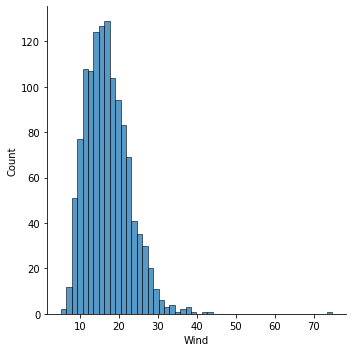

In [83]:
# Modeling wind values for distribution
sns.displot(df['Wind'])

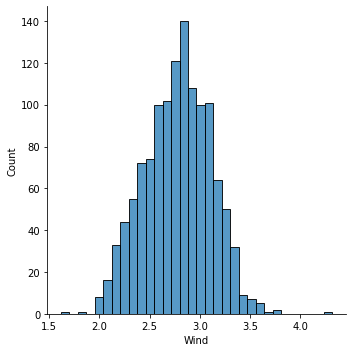

In [84]:
# By logging the wind values, I can see that it forms a somewhat 'normal' distribution
sns.displot(np.log(df['Wind']))

[Text(0.5, 0, 'Wind Speed'), Text(0, 0.5, 'Density')]

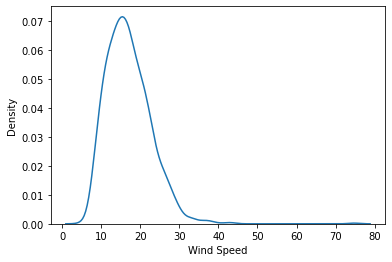

In [85]:
fig = sns.kdeplot(data=df,x='Wind')
fig.set(xlabel="Wind Speed", ylabel = "Density")

<AxesSubplot:xlabel='Wind', ylabel='Density'>

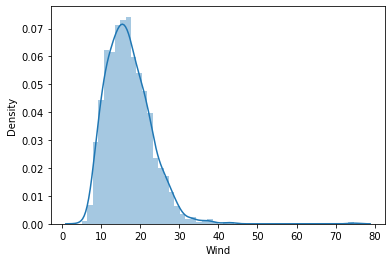

In [86]:
sns.distplot(df['Wind'])

<AxesSubplot:xlabel='Wind', ylabel='Count'>

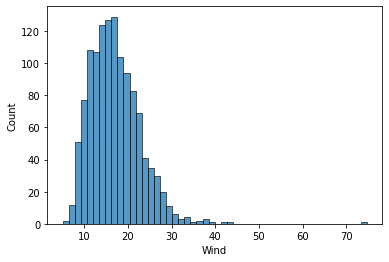

In [87]:
sns.histplot(df['Wind'])

In [88]:
import math
# Let's try logging the wind values

def change_log(x):
    return math.log(x)

df['Wind_log'] = df['Wind'].apply(lambda x:change_log(x))

<AxesSubplot:xlabel='Wind_log', ylabel='Density'>

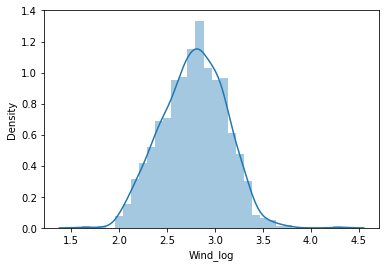

In [89]:
sns.distplot(df['Wind_log'])

## Accounting for seasonality change according to [solar dates](https://www.asia-home.com/china/solterms.php) and arranging it in the Spring, Summer, Autumn and Winter hot encoding.

In [90]:
# Accounting for seasonality changes

# For 2019
spring = []
summer = []
autumn = []
winter = []
# winter(start of 2018)
for i in range(34):
    spring.append(0)
    summer.append(0)
    autumn.append(0)
    winter.append(1)
# spring 2018
for i in range(90):
    spring.append(1)
    summer.append(0)
    autumn.append(0)
    winter.append(0)
# summer 2018
for i in range(94):
    spring.append(0)
    summer.append(1)
    autumn.append(0)
    winter.append(0)
# autumn 2018
for i in range(92):
    spring.append(0)
    summer.append(0)
    autumn.append(1)
    winter.append(0)
# winter 2018/2019
for i in range(89):
    spring.append(0)
    summer.append(0)
    autumn.append(0)
    winter.append(1)
# winter (start of 2019)
# for i in range(34):
#     spring.append(0)
#     summer.append(0)
#     autumn.append(0)
#     winter.append(1)
# spring 2019
for i in range(91):
    spring.append(1)
    summer.append(0)
    autumn.append(0)
    winter.append(0)
# summer 2019
for i in range(94):
    spring.append(0)
    summer.append(1)
    autumn.append(0)
    winter.append(0)
# autumn 2019
for i in range(92):
    spring.append(0)
    summer.append(0)
    autumn.append(1)
    winter.append(0)
# winter 2019/2020
for i in range(88):
    spring.append(0)
    summer.append(0)
    autumn.append(0)
    winter.append(1)
# spring 2020
for i in range(91):
    spring.append(1)
    summer.append(0)
    autumn.append(0)
    winter.append(0)
# summer 2020
for i in range(94):
    spring.append(0)
    summer.append(1)
    autumn.append(0)
    winter.append(0)
# autumn 2020
for i in range(92):
    spring.append(0)
    summer.append(0)
    autumn.append(1)
    winter.append(0)
# winter 2020
for i in range(88):
    spring.append(0)
    summer.append(0)
    autumn.append(0)
    winter.append(1)
# spring 2021
for i in range(91):
    spring.append(1)
    summer.append(0)
    autumn.append(0)
    winter.append(0)  
# summer 2021
for i in range(27):
    spring.append(0)
    summer.append(1)
    autumn.append(0)
    winter.append(0) 

In [91]:
print(len(spring))
print(len(summer))
print(len(autumn))
print(len(winter))
# ok good

1247
1247
1247
1247


In [92]:
df['Spring'] = spring
df['Summer'] = summer
df['Autumn'] = autumn
df['Winter'] = winter

Obtaining the final dataframe

In [93]:
df.head()

index  Year  Month  Day  Temperature    Day_Mm    Day_SS   Wind  Temp_Diff  \
0      0  2018    1.0  1.0    17.100000  0.000000 -1.677051  15.50   3.766665   
1      1  2018    1.0  2.0    18.133333  0.033333 -1.565248  16.75   5.133332   
2      2  2018    1.0  3.0    20.000000  0.066667 -1.453444  20.25   5.566669   
3      3  2018    1.0  4.0    19.299999  0.100000 -1.341641  22.35   3.766668   
4      4  2018    1.0  5.0    19.099998  0.133333 -1.229837  10.90   5.766666   

   Sun  Wind_log  Spring  Summer  Autumn  Winter  
0  3.0  2.740840       0       0       0       1  
1  3.6  2.818398       0       0       0       1  
2  8.4  3.008155       0       0       0       1  
3  0.6  3.106826       0       0       0       1  
4  0.2  2.388763       0       0       0       1

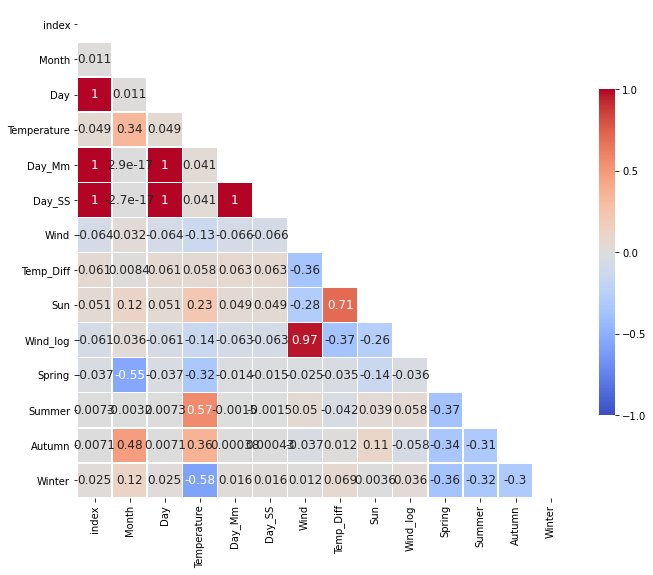

In [94]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

The Correlation Matrix seem to be quite bad. I can't really make out anything at all

In [95]:
df.drop(columns='index',inplace=True)

In [96]:
df

Year  Month   Day  Temperature    Day_Mm    Day_SS       Wind  \
0     2018    1.0   1.0    17.100000  0.000000 -1.677051  15.500000   
1     2018    1.0   2.0    18.133333  0.033333 -1.565248  16.750000   
2     2018    1.0   3.0    20.000000  0.066667 -1.453444  20.250000   
3     2018    1.0   4.0    19.299999  0.100000 -1.341641  22.350000   
4     2018    1.0   5.0    19.099998  0.133333 -1.229837  10.900000   
...    ...    ...   ...          ...       ...       ...        ...   
1242  2021    5.0  27.0    30.366667  0.866667  1.229837  15.950000   
1243  2021    5.0  28.0    30.566666  0.900000  1.341641  18.150000   
1244  2021    5.0  29.0    30.133333  0.933333  1.453444  22.700001   
1245  2021    5.0  30.0    30.333334  0.966667  1.565248  21.850000   
1246  2021    5.0  31.0    29.466667  1.000000  1.677051  19.400002   

      Temp_Diff   Sun  Wind_log  Spring  Summer  Autumn  Winter  
0      3.766665   3.0  2.740840       0       0       0       1  
1      5.133332   3.6  2.818398       0       0       0       1  
2      5.566669   8.4  3.008155       0       0       0       1  
3      3.766668   0.6  3.106826       0       0       0       1  
4      5.766666   0.2  2.388763       0       0       0       1  
...         ...   ...       ...     ...     ...     ...     ...  
1242   7.066664  10.6  2.769459       0       1       0       0  
1243   6.766666  11.1  2.898671       0       1       0       0  
1244   5.900000   7.8  3.122365       0       1       0       0  
1245   5.233332   4.9  3.084201       0       1       0       0  
1246   7.533337   1.6  2.965273       0       1       0       0  

[1247 rows x 14 columns]

As the dates are in float values, the corresponding functions turn the values into datetime for further processing

In [97]:
def turn_int(x):
    return int(x)
    
df['Month'] = df['Month'].apply(lambda x:turn_int(x))
df['Day'] = df['Day'].apply(lambda x:turn_int(x))

In [98]:
def turn_str(x):
    return str(x)
    
df['Month_str'] = df['Month'].apply(lambda x:turn_str(x))
df['Day_str'] = df['Day'].apply(lambda x:turn_str(x))

def add_zero(x):
    list_date = ['10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
    if x not in list_date:
        x = '0' + x
    return x

df['Month_str'] = df['Month_str'].apply(lambda x:add_zero(x))
df['Day_str'] = df['Day_str'].apply(lambda x:add_zero(x))

In [99]:
df['Date'] = df['Year']+'-'+df['Month_str']+'-'+df['Day_str']

In [100]:
df.head()

Year  Month  Day  Temperature    Day_Mm    Day_SS   Wind  Temp_Diff  Sun  \
0  2018      1    1    17.100000  0.000000 -1.677051  15.50   3.766665  3.0   
1  2018      1    2    18.133333  0.033333 -1.565248  16.75   5.133332  3.6   
2  2018      1    3    20.000000  0.066667 -1.453444  20.25   5.566669  8.4   
3  2018      1    4    19.299999  0.100000 -1.341641  22.35   3.766668  0.6   
4  2018      1    5    19.099998  0.133333 -1.229837  10.90   5.766666  0.2   

   Wind_log  Spring  Summer  Autumn  Winter Month_str Day_str        Date  
0  2.740840       0       0       0       1        01      01  2018-01-01  
1  2.818398       0       0       0       1        01      02  2018-01-02  
2  3.008155       0       0       0       1        01      03  2018-01-03  
3  3.106826       0       0       0       1        01      04  2018-01-04  
4  2.388763       0       0       0       1        01      05  2018-01-05

In [101]:
def convertdate(x):
    x = datetime.strptime(x, "%Y-%m-%d")
    return(x)
df['Datetime']= df['Date'].apply(lambda x: convertdate(x))

# Final Dataframe

In [102]:
df

Year  Month  Day  Temperature    Day_Mm    Day_SS       Wind  Temp_Diff  \
0     2018      1    1    17.100000  0.000000 -1.677051  15.500000   3.766665   
1     2018      1    2    18.133333  0.033333 -1.565248  16.750000   5.133332   
2     2018      1    3    20.000000  0.066667 -1.453444  20.250000   5.566669   
3     2018      1    4    19.299999  0.100000 -1.341641  22.350000   3.766668   
4     2018      1    5    19.099998  0.133333 -1.229837  10.900000   5.766666   
...    ...    ...  ...          ...       ...       ...        ...        ...   
1242  2021      5   27    30.366667  0.866667  1.229837  15.950000   7.066664   
1243  2021      5   28    30.566666  0.900000  1.341641  18.150000   6.766666   
1244  2021      5   29    30.133333  0.933333  1.453444  22.700001   5.900000   
1245  2021      5   30    30.333334  0.966667  1.565248  21.850000   5.233332   
1246  2021      5   31    29.466667  1.000000  1.677051  19.400002   7.533337   

       Sun  Wind_log  Spring  Summer  Autumn  Winter Month_str Day_str  \
0      3.0  2.740840       0       0       0       1        01      01   
1      3.6  2.818398       0       0       0       1        01      02   
2      8.4  3.008155       0       0       0       1        01      03   
3      0.6  3.106826       0       0       0       1        01      04   
4      0.2  2.388763       0       0       0       1        01      05   
...    ...       ...     ...     ...     ...     ...       ...     ...   
1242  10.6  2.769459       0       1       0       0        05      27   
1243  11.1  2.898671       0       1       0       0        05      28   
1244   7.8  3.122365       0       1       0       0        05      29   
1245   4.9  3.084201       0       1       0       0        05      30   
1246   1.6  2.965273       0       1       0       0        05      31   

            Date   Datetime  
0     2018-01-01 2018-01-01  
1     2018-01-02 2018-01-02  
2     2018-01-03 2018-01-03  
3     2018-01-04 2018-01-04  
4     2018-01-05 2018-01-05  
...          ...        ...  
1242  2021-05-27 2021-05-27  
1243  2021-05-28 2021-05-28  
1244  2021-05-29 2021-05-29  
1245  2021-05-30 2021-05-30  
1246  2021-05-31 2021-05-31  

[1247 rows x 18 columns]

# Plots of graphs
Below are some plots that I have done<br>
(a) Line plot of Wind Speed over 3 years<br>
(b) Line plot of temperature values over the 3 years<br>
(c) Sun(light) values over 3 years<br>
(d) Just wanted to do the wind vs time in seaborn<br>
(e) Did the same plots but in scatterplot<br>
There seem to be some huge outlier values for winspeed, so I took care of it by dropping any windspeed above 40. Which amounted to 3 values

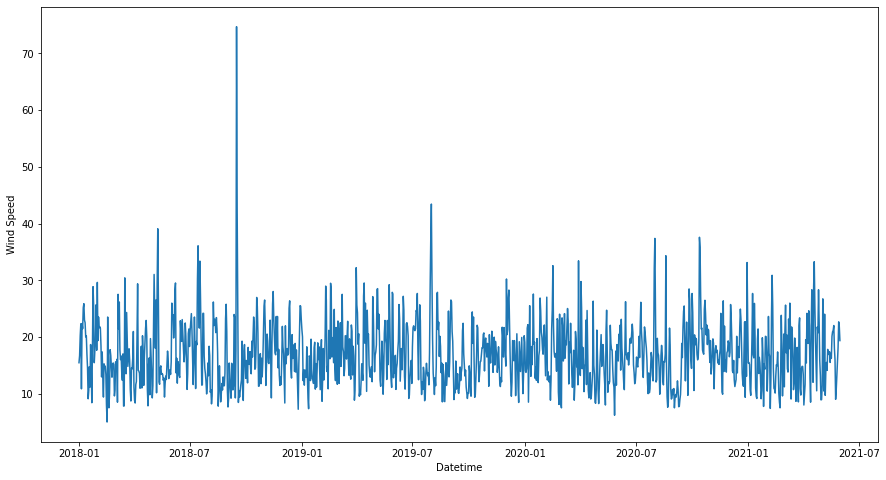

In [103]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(ax=ax,data=df,x='Datetime',y='Wind')
plot.set(xlabel ="Datetime", ylabel = "Wind Speed")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

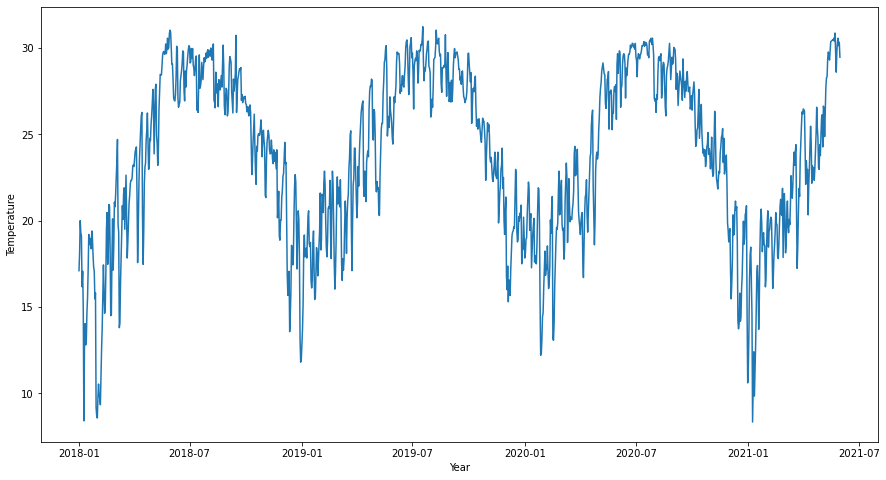

In [104]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(ax=ax,data=df,x='Datetime',y='Temperature')
plot.set(xlabel ="Year", ylabel = "Temperature")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

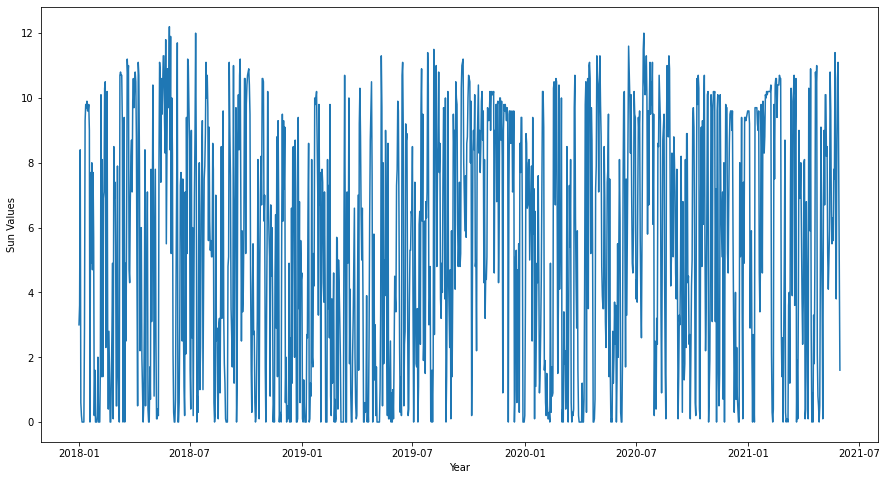

In [105]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(ax=ax,data=df,x='Datetime',y='Sun')
plot.set(xlabel ="Year", ylabel = "Sun Values")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

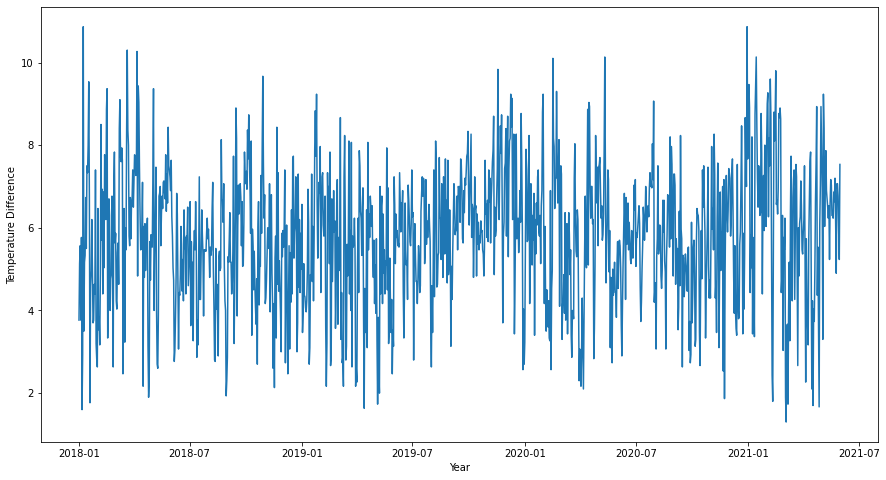

In [106]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.lineplot(ax=ax,data=df,x='Datetime',y='Temp_Diff')
plot.set(xlabel ="Year", ylabel = "Temperature Difference")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

<AxesSubplot:>

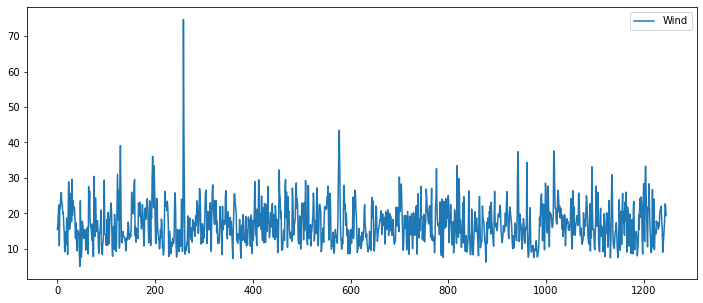

In [107]:
df['Wind'].plot(legend=True,figsize=(12,5))

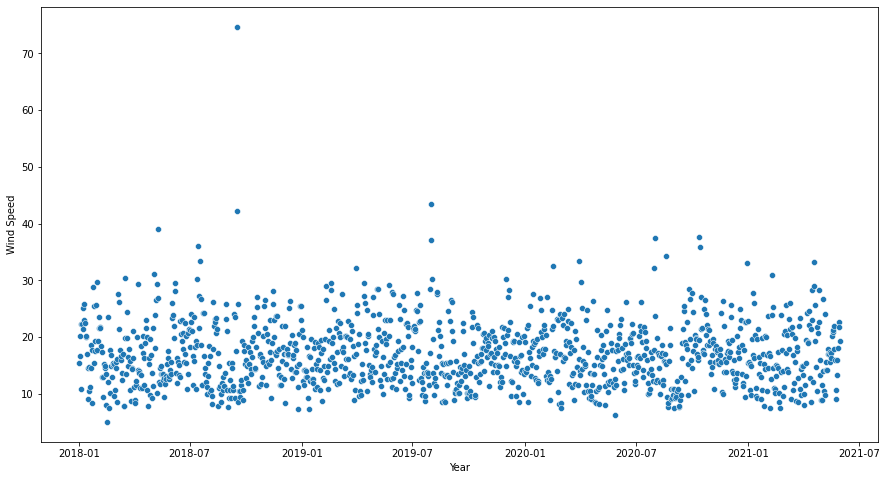

In [108]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(ax=ax,data=df,x='Datetime',y='Wind')
plot.set(xlabel ="Year", ylabel = "Wind Speed")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

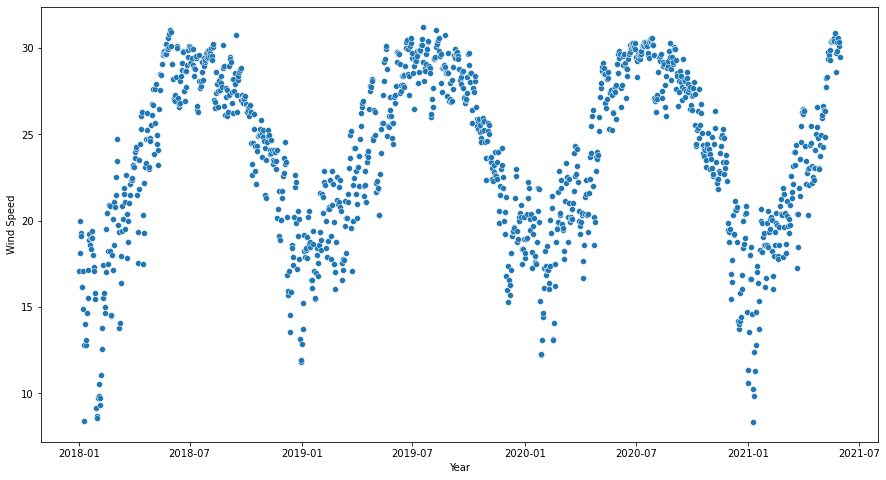

In [109]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(ax=ax,data=df,x='Datetime',y='Temperature')
plot.set(xlabel ="Year", ylabel = "Wind Speed")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

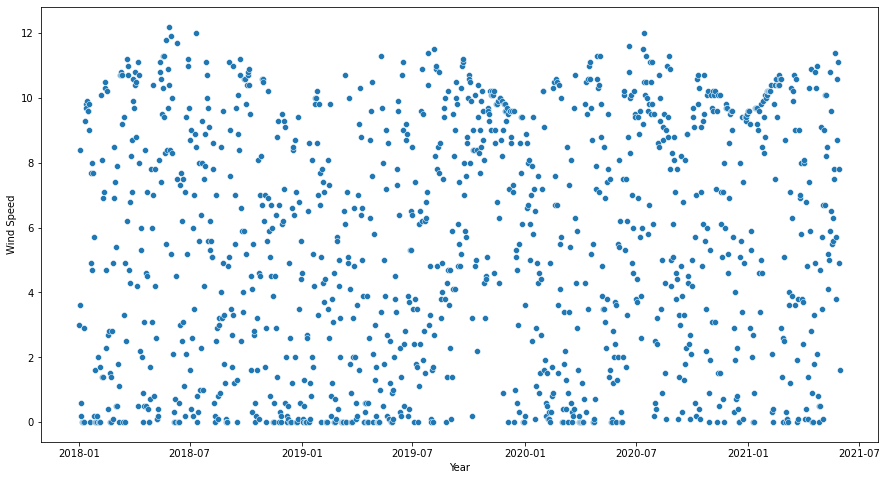

In [110]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(ax=ax,data=df,x='Datetime',y='Sun')
plot.set(xlabel ="Year", ylabel = "Wind Speed")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

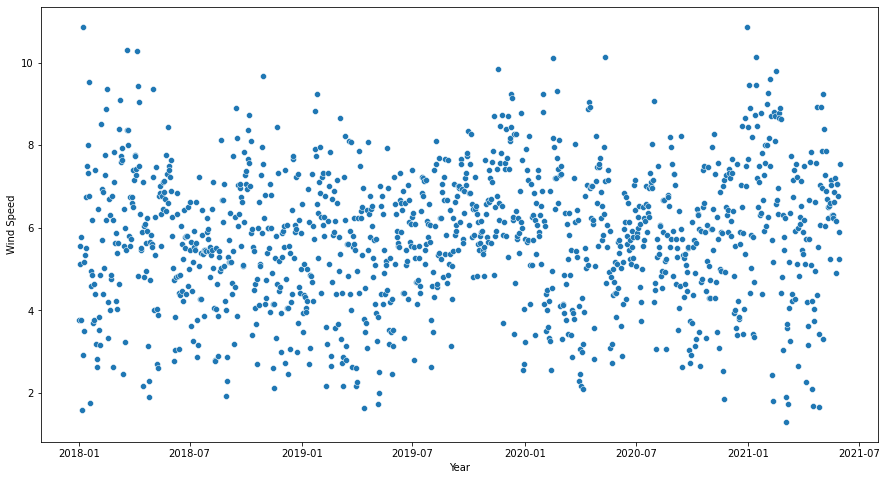

In [111]:
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot = sns.scatterplot(ax=ax,data=df,x='Datetime',y='Temp_Diff')
plot.set(xlabel ="Year", ylabel = "Wind Speed")
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

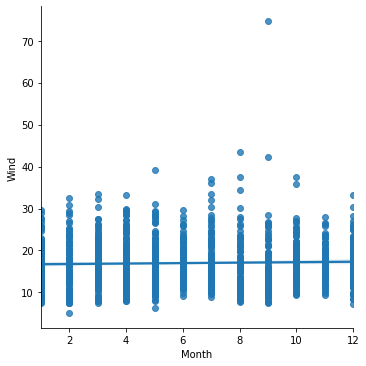

In [112]:
# a4_dims = (15, 8)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.lmplot(data=df,x='Month',y='Wind')
# plot.set(xlabel ="Year", ylabel = "Wind Speed")
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

In [113]:
df[df['Wind']>40]

Year  Month  Day  Temperature    Day_Mm    Day_SS       Wind  Temp_Diff  \
258  2018      9   16    26.266668  0.517241  0.057767  74.699997   8.166668   
259  2018      9   17    27.266668  0.551724  0.173301  42.250000   3.866665   
577  2019      8    1    26.199999  0.000000 -1.677051  43.450001   2.633331   

     Sun  Wind_log  Spring  Summer  Autumn  Winter Month_str Day_str  \
258  0.0  4.313480       0       0       1       0        09      16   
259  1.3  3.743604       0       0       1       0        09      17   
577  0.0  3.771611       0       1       0       0        08      01   

           Date   Datetime  
258  2018-09-16 2018-09-16  
259  2018-09-17 2018-09-17  
577  2019-08-01 2019-08-01

In [114]:
# Dropping wind value outliers. based on above value, it is above 40
df.drop(index=df[df['Wind']>40].index,inplace=True)
df.reset_index(drop=True,inplace=True)

In [115]:
df.columns

Index(['Year', 'Month', 'Day', 'Temperature', 'Day_Mm', 'Day_SS', 'Wind',
       'Temp_Diff', 'Sun', 'Wind_log', 'Spring', 'Summer', 'Autumn', 'Winter',
       'Month_str', 'Day_str', 'Date', 'Datetime'],
      dtype='object')

# Train-Test
As this is a datetime series, i couldn't use the conventional train-test split by scikitlearn and randomize the values, so I took values before January 01 2020 as train, and after as test

In [116]:
test = df.loc[df.Datetime >= '2020-01-01']

In [117]:
train = df.loc[df.Datetime < '2020-01-01']

In [118]:
# I'm going to have 3 types of data, with 2 result types, one will be wind log, the other normal wind
# The plan is to inject non-scaled data
# and scaled data

# Breaking into X and Y (Training variables and Testing variables)

# Y values train
train_data_Y_ns = train['Wind']
train_data_y_wl = train['Wind_log']
# Y values test
test_data_Y_ns = test['Wind']
test_data_y_wl = test['Wind_log']

#no scale
train_data_X_ns = train.drop(columns=['Day_Mm','Day_SS','Wind','Wind_log','Month_str','Day_str','Date'])
test_data_X_ns = test.drop(columns=['Day_Mm','Day_SS','Wind','Wind_log','Month_str','Day_str','Date'])
#data to be scaled (Minmax)
train_data_mm = train.drop(columns=['Day','Day_SS','Wind','Wind_log','Month_str','Day_str','Date'])
test_data_mm = test.drop(columns=['Day','Day_SS','Wind','Wind_log','Month_str','Day_str','Date'])
#data to be scaled (StandardScaler)
train_data_ss = train.drop(columns=['Day','Day_Mm','Wind','Wind_log','Month_str','Day_str','Date'])
test_data_ss = test.drop(columns=['Day','Day_Mm','Wind','Wind_log','Month_str','Day_str','Date'])

In [119]:
train_data_Y_ns.shape

(727,)

In [120]:
train_data_y_wl.head()

0    2.740840
1    2.818398
2    3.008155
3    3.106826
4    2.388763
Name: Wind_log, dtype: float64

In [121]:
train_data_X_ns.shape

(727, 11)

# Breakdown of train and test sets

In the following cells, I am breaking down how the train, test sets will work<br>

Train with Test -> Y-target - Wind Speed (No scaling done)<br>
Train with Test -> Y-target - Log applied on Wind Speed (No Scaling done)<br>
Train with Test -> Y-target - Wind Speed (Min-max Scaling applied)<br>
Train with Test -> Y-target - Log applied on Wind Speed (Min-max Scaling applied)<br>
Train with Test -> Y-target - Wind Speed (Standard Scaling applied)<br>
Train with Test -> Y-target - Log applied on Wind Speed (Standard Scaling applied)<br>

In [122]:
train_data_mm = train_data_mm[['Year','Month','Temperature','Sun','Spring','Summer','Autumn','Winter','Day_Mm','Temp_Diff','Datetime']]
train_data_mm.head()

Year  Month  Temperature  Sun  Spring  Summer  Autumn  Winter    Day_Mm  \
0  2018      1    17.100000  3.0       0       0       0       1  0.000000   
1  2018      1    18.133333  3.6       0       0       0       1  0.033333   
2  2018      1    20.000000  8.4       0       0       0       1  0.066667   
3  2018      1    19.299999  0.6       0       0       0       1  0.100000   
4  2018      1    19.099998  0.2       0       0       0       1  0.133333   

   Temp_Diff   Datetime  
0   3.766665 2018-01-01  
1   5.133332 2018-01-02  
2   5.566669 2018-01-03  
3   3.766668 2018-01-04  
4   5.766666 2018-01-05

In [123]:
train_data_ss = train_data_ss[['Year','Month','Temperature','Sun','Spring','Summer','Autumn','Winter','Day_SS','Temp_Diff','Datetime']]
train_data_ss.head()

Year  Month  Temperature  Sun  Spring  Summer  Autumn  Winter    Day_SS  \
0  2018      1    17.100000  3.0       0       0       0       1 -1.677051   
1  2018      1    18.133333  3.6       0       0       0       1 -1.565248   
2  2018      1    20.000000  8.4       0       0       0       1 -1.453444   
3  2018      1    19.299999  0.6       0       0       0       1 -1.341641   
4  2018      1    19.099998  0.2       0       0       0       1 -1.229837   

   Temp_Diff   Datetime  
0   3.766665 2018-01-01  
1   5.133332 2018-01-02  
2   5.566669 2018-01-03  
3   3.766668 2018-01-04  
4   5.766666 2018-01-05

In [124]:
'''
nsw - no scale + wind
nswl - no scale + wind log
mmw - maxmin + wind
mmwl - maxmin + wind log
ssw - standard scale + wind
sswl - standard scale + wind log
'''

# # no scale + wind and wind_log
# X_train_nsw, X_test_ns, y_train_ns, y_test_ns = train_test_split(data_X_ns,data_Y_ns,test_size = 0.3,random_state = 42)
# X_train_nswl, X_test_nswl, y_train_nswl, y_test_nswl = train_test_split(data_X_ns,data_y_wl,test_size = 0.3,random_state = 42)
# # scale + wind and wind_log
# X_train_mmw, X_test_mmw, y_train_mmw, y_test_mmw = train_test_split(data_mm,data_Y_ns,test_size = 0.3,random_state = 42)
# X_train_mmwl, X_test_mmwl, y_train_mmwl, y_test_mmwl = train_test_split(data_mm,data_y_wl,test_size = 0.3,random_state = 42)
# # standard scale + wind/wind_log
# X_train_ssw, X_test_ssw, y_train_ssw, y_test_ssw = train_test_split(data_ss,data_Y_ns,test_size = 0.3,random_state = 42)
# X_train_sswl, X_test_sswl, y_train_sswl, y_test_sswl = train_test_split(data_ss,data_y_wl,test_size = 0.3,random_state = 42)

'\nnsw - no scale + wind\nnswl - no scale + wind log\nmmw - maxmin + wind\nmmwl - maxmin + wind log\nssw - standard scale + wind\nsswl - standard scale + wind log\n'

In [125]:
# X_train_ssw.shape

In [126]:
# X_test_mmw.shape

In [127]:
# y_train_ssw.shape

In [128]:
# y_test_nswl.shape

In [129]:
# Viewing consistency amongst the values

In [130]:
# Scaled X_mm to max-min, so I will insert Day_mm to it and Scaled X_ss to standard scaler, will add Day_ss to it
# As days are between 28 to 31 days for each month, I want to scale it per monthly basis rather than over the total. If I do Max-Min, it will scale against 31 days, so months like Feb will be affected

Extracting the datetime of train and test to maintain consistency.

In [131]:
nsw_train_date = train_data_X_ns['Datetime']
ns_test_date = test_data_X_ns['Datetime']
nswl_train_date = train_data_X_ns['Datetime']
nswl_test_date = test_data_X_ns['Datetime']
mmw_train_date = train_data_mm['Datetime']
mmw_test_date = test_data_mm['Datetime']
mmwl_train_date = train_data_mm['Datetime']
mmwl_test_date = test_data_mm['Datetime']
ssw_train_date = train_data_ss['Datetime']
ssw_test_date = test_data_ss['Datetime']
sswl_train_date = train_data_ss['Datetime']
sswl_test_date = test_data_ss['Datetime']


train_data_X_ns.drop(columns=['Datetime'],inplace=True)
test_data_X_ns.drop(columns=['Datetime'],inplace=True)
# train_data_X_ns.drop(columns=['Datetime'],inplace=True)
# test_data_X_ns.drop(columns=['Datetime'],inplace=True)
# test_data_X_ns.drop(columns=['Datetime'],inplace=True)
train_data_mm.drop(columns=['Datetime'],inplace=True)
test_data_mm.drop(columns=['Datetime'],inplace=True)
# train_data_mm.drop(columns=['Datetime'],inplace=True)
train_data_ss.drop(columns=['Datetime'],inplace=True)
test_data_ss.drop(columns=['Datetime'],inplace=True)
# train_data_ss.drop(columns=['Datetime'],inplace=True)
# test_data_ss.drop(columns=['Datetime'],inplace=True)

Application of Column Transformer, but it failed due to partial-completeness of project when I considered column transformer as a possible solution to 1-shot implement scaling

In [132]:
'''standard_transformer = Pipeline(steps=[
        ('standard', StandardScaler())])

minmax_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])

polynomial_transformer = Pipeline(steps=[
        ('poly', PolynomialFeatures())])

preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('std', standard_transformer , ['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']),
            ('mm', minmax_transformer , ['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']),
            ('poly', polynomial_transformer)
        ])
'''

"standard_transformer = Pipeline(steps=[\n        ('standard', StandardScaler())])\n\nminmax_transformer = Pipeline(steps=[\n        ('minmax', MinMaxScaler())])\n\npolynomial_transformer = Pipeline(steps=[\n        ('poly', PolynomialFeatures())])\n\npreprocessor = ColumnTransformer(\n        remainder='passthrough', #passthough features not listed\n        transformers=[\n            ('std', standard_transformer , ['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']),\n            ('mm', minmax_transformer , ['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']),\n            ('poly', polynomial_transformer)\n        ])\n"

Scaling of the features as mentioned above

In [135]:
X_train_mmw_transform = train_data_mm
X_test_mmw_transform = test_data_mm
X_train_mmwl_transform = train_data_mm
X_test_mmwl_transform = test_data_mm

X_train_ssw_transform = train_data_ss
X_test_ssw_transform = test_data_ss
X_train_sswl_transform = train_data_ss
X_test_sswl_transform = test_data_ss

X_train_mmw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler.fit_transform(X_train_mmw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])
X_test_mmw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler.fit_transform(X_test_mmw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])
X_train_mmwl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler.fit_transform(X_train_mmwl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])
X_test_mmwl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler.fit_transform(X_test_mmwl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])

X_train_ssw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler2.fit_transform(X_train_ssw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])
X_test_ssw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']]= scaler2.fit_transform(X_test_ssw_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])
X_train_sswl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler2.fit_transform(X_train_sswl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])
X_test_sswl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']] = scaler2.fit_transform(X_test_sswl_transform[['Year','Month','Temperature','Temp_Diff','Sun','Spring','Summer','Autumn','Winter']])


Y_train_mm_ns_transform = train_data_Y_ns
Y_test_mm_ns_transform = test_data_Y_ns
Y_train_mm_wl_transform = train_data_y_wl
Y_test_mm_wl_transform = test_data_y_wl
Y_train_ss_ns_transform = train_data_Y_ns
Y_test_ss_ns_transform = test_data_Y_ns
Y_train_ss_wl_transform = train_data_y_wl
Y_test_ss_wl_transform = test_data_y_wl

Y_train_mm_ns_transform = scaler.fit_transform(Y_train_mm_ns_transform.values.reshape(-1,1))
Y_test_mm_ns_transform = scaler.fit_transform(Y_test_mm_ns_transform.values.reshape(-1,1))
Y_train_mm_wl_transform = scaler.fit_transform(Y_train_mm_wl_transform.values.reshape(-1,1))
Y_test_mm_wl_transform = scaler.fit_transform(Y_test_mm_wl_transform.values.reshape(-1,1))

Y_train_ss_ns_transform = scaler2.fit_transform(Y_train_ss_ns_transform.values.reshape(-1,1))
Y_test_ss_ns_transform = scaler2.fit_transform(Y_test_ss_ns_transform.values.reshape(-1,1))
Y_train_ss_wl_transform = scaler2.fit_transform(Y_train_ss_wl_transform.values.reshape(-1,1))
Y_test_ss_wl_transform = scaler2.fit_transform(Y_test_ss_wl_transform.values.reshape(-1,1))

In [383]:
# Y_train_mm_ns_transform

In [137]:
# X_day_mm = df['Day_Mm'].to_numpy()

This is old code from the original implementation of the project. I'm so going to get chewed out if this was live. Those who got this from my repository... I'm not going to do anything about this part

In [138]:
# # Merging back the scaled data
# #mmw
# lista =[]
# for i in range(X_train_mmw_transform.shape[0]):
#     a= np.concatenate((X_train_mmw_transform[i],X_train_mmw['Day_Mm'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_train_mmw = np.array(lista)
# #mmw test
# lista =[]
# for i in range(X_test_mmw_transform.shape[0]):
#     a= np.concatenate((X_test_mmw_transform[i],X_test_mmw['Day_Mm'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_test_mmw = np.array(lista)
# #mmwl
# lista =[]
# for i in range(X_train_mmwl_transform.shape[0]):
#     a= np.concatenate((X_train_mmwl_transform[i],X_train_mmwl['Day_Mm'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_train_mmwl = np.array(lista)
# # mmwl test
# lista =[]
# for i in range(X_test_mmwl_transform.shape[0]):
#     a= np.concatenate((X_test_mmwl_transform[i],X_test_mmwl['Day_Mm'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_test_mmwl = np.array(lista)


# #ssw
# lista =[]
# for i in range(X_train_ssw_transform.shape[0]):
#     a= np.concatenate((X_train_ssw_transform[i],X_train_ssw['Day_SS'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_train_mmw = np.array(lista)
# #ssw test
# lista =[]
# for i in range(X_test_ssw_transform.shape[0]):
#     a= np.concatenate((X_test_ssw_transform[i],X_test_ssw['Day_SS'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_test_ssw = np.array(lista)
# #sswl
# lista =[]
# for i in range(X_train_sswl_transform.shape[0]):
#     a= np.concatenate((X_train_sswl_transform[i],X_train_sswl['Day_SS'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_train_sswl = np.array(lista)
# # sswl test
# lista =[]
# for i in range(X_test_sswl_transform.shape[0]):
#     a= np.concatenate((X_test_sswl_transform[i],X_test_sswl['Day_SS'].to_numpy()[i]),axis=None)
#     lista.append(a)
# X_test_sswl = np.array(lista)

# Training
Thus after getting the relevant dataframes, I wanted to use gridsearchcv on multiple variable models to see how the data performed. I chose Linear Regression (Baseline), Ridge Regression, Lasso Regression, Adaboost, Gradientboost and Randomforest as well... I was tired and the computational power required for more models will make my PC go kaboom... maybe? I mean I could try ensemble, and more types of models... But yea...
Anyways, these were the perimeters set, I used the respective parameters for simplicity sake? Ok... I just made a random guess and listed a whole list of parameters

In [139]:
ridge_params = {
    'alpha':[1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300],
    'max_iter' : [10000]
}
lasso_params = [{
    'alpha':[0.01, 0.02 ,0.03, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1, 0.2]
}]
adaboost_params = [{
    'learning_rate' :[0.01, 0.01 ,0.1 , 1],
    'n_estimators' : [10, 25, 50, 75, 100, 500, 1000],
    'loss' : ['linear', 'square', 'exponential']
}]
gradientboost_params = [{
    'learning_rate' :[0.01, 0.01 ,0.1 , 1],
    'n_estimators' : [10, 25, 50, 75, 100, 500, 1000]
}]
randomforest_params = [{
    'n_estimators' : [5, 10, 15, 20]
}]

# Creating the baseline
The following 6 cells show a baseline model using regression. the plots are then plotted with the original data vs the 'regression' line

In [140]:
# Linear Regression
LR = LinearRegression()

# Ridge and Lasso Regression
LaR = Lasso(max_iter=10000)
model_LaR = GridSearchCV(LaR, lasso_params, cv=5)

RR = Ridge()
model_RR = GridSearchCV(RR, ridge_params, cv=5)

# Adaboost, GradientBoost, RandomForest
ada = AdaBoostRegressor()
model_ada = GridSearchCV(ada, adaboost_params, cv=5)

gb = GradientBoostingRegressor()
model_gb = GridSearchCV(gb, gradientboost_params, cv=5)

rf = RandomForestRegressor()
model_rf = GridSearchCV(rf, randomforest_params, cv=5)

Training score for Linear Regression for no-scaling is -  0.21704823328343148 , and test score is -  0.14614580527793453 . And RMSE is -  5.047797352659867


Text(0, 0.5, 'Wind Speed')

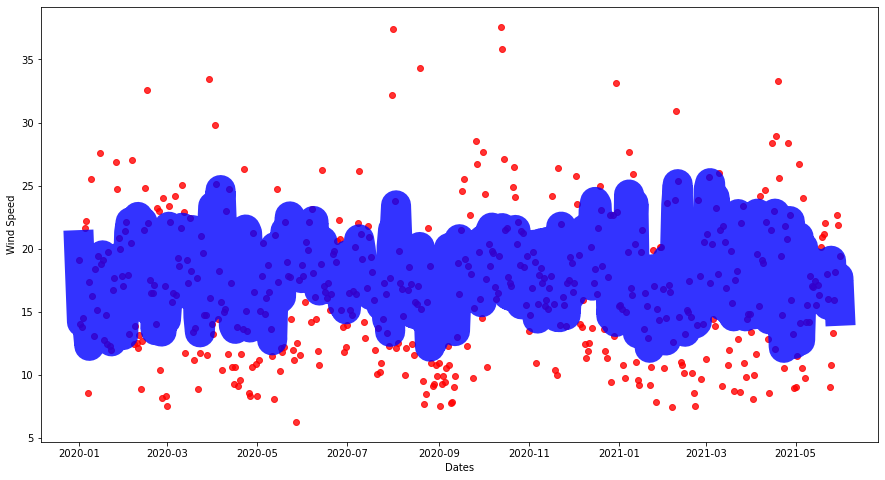

In [142]:
# Conducting Linear Regression on all the train and test sets above
# No scaling
lr = LR.fit(train_data_X_ns,train_data_Y_ns)
prediction = lr.predict(test_data_X_ns)
print('Training score for Linear Regression for no-scaling is - ',lr.score(train_data_X_ns,train_data_Y_ns),
      ', and test score is - ',LR.score(test_data_X_ns,test_data_Y_ns),
      '. And RMSE is - ', math.sqrt(mean_squared_error(prediction,test_data_Y_ns)))
plt.figure(figsize=(15,8))
plt.scatter(ns_test_date,test_data_Y_ns, color="red", alpha=0.8)
plt.plot(ns_test_date,prediction, color="blue", alpha=0.8, linewidth=30)
plt.xlabel('Dates')
plt.ylabel('Wind Speed')

Training score for Linear Regression for no-scaling is -  0.2035332432889443 , and test score is -  0.1395337797587286 . And RMSE is -  0.3047622366197696


Text(0, 0.5, 'Wind Speed')

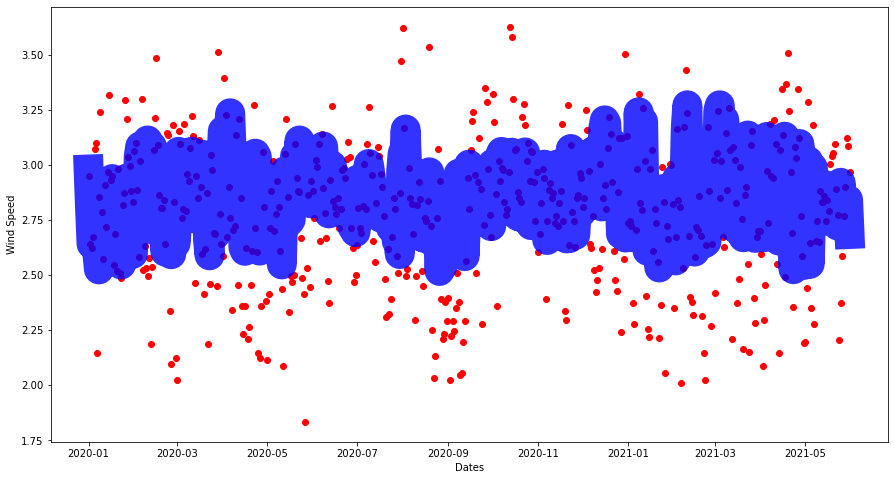

In [143]:
LR.fit(train_data_X_ns,train_data_y_wl)
prediction = LR.predict(test_data_X_ns)
print('Training score for Linear Regression for no-scaling is - ',LR.score(train_data_X_ns,train_data_y_wl),
      ', and test score is - ',LR.score(test_data_X_ns,test_data_y_wl),
      '. And RMSE is - ', math.sqrt(mean_squared_error(prediction,test_data_y_wl)))
plt.figure(figsize=(15,8))
plt.scatter(nswl_test_date,test_data_y_wl, color="red", alpha=1)
plt.plot(nswl_test_date,prediction, color="blue", alpha=0.8, linewidth=30)
plt.xlabel('Dates')
plt.ylabel('Wind Speed')

In [144]:
train_data_y_wl.shape

(727,)

In [145]:
Y_train_mm_ns_transform.shape

(727, 1)

In [146]:
Y_train_mm_ns_transform=Y_train_mm_ns_transform.flatten()
Y_test_mm_ns_transform=Y_test_mm_ns_transform.flatten()
Y_train_mm_wl_transform=Y_train_mm_wl_transform.flatten()
Y_test_mm_wl_transform=Y_test_mm_wl_transform.flatten()

Y_train_ss_ns_transform=Y_train_ss_ns_transform.flatten()
Y_test_ss_ns_transform=Y_test_ss_ns_transform.flatten()
Y_train_ss_wl_transform=Y_train_ss_wl_transform.flatten()
Y_test_ss_wl_transform=Y_test_ss_wl_transform.flatten()

Training score for Linear Regression for max-min scaling is -  0.21735621584903508 , and test score is -  -0.7289089796811694 . And RMSE is -  0.22911768832729784


Text(0, 0.5, 'Wind Speed')

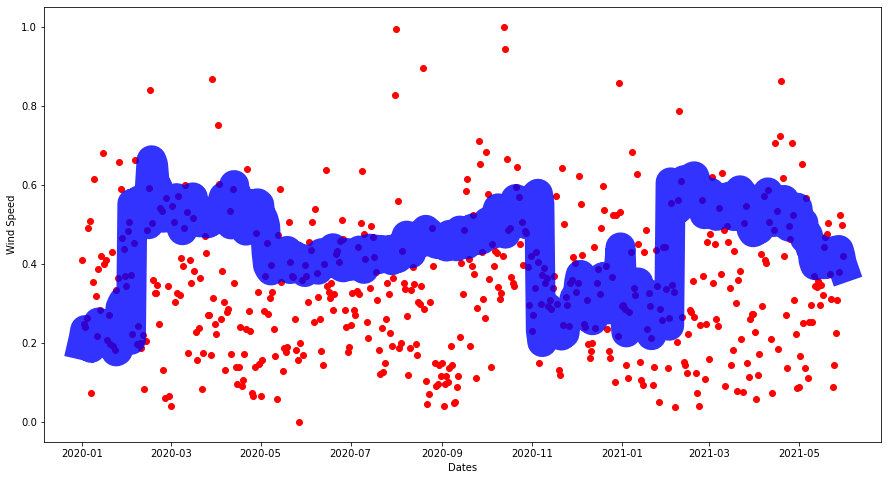

In [147]:
# Max Min Scaling
LR.fit(X_train_mmw_transform,Y_train_mm_ns_transform)
prediction = LR.predict(X_test_mmw_transform)
print('Training score for Linear Regression for max-min scaling is - ',LR.score(X_train_mmw_transform,Y_train_mm_ns_transform),
      ', and test score is - ',LR.score(X_test_mmw_transform,Y_test_mm_ns_transform),
      '. And RMSE is - ', math.sqrt(mean_squared_error(prediction,Y_test_mm_ns_transform)))
plt.figure(figsize=(15,8))
plt.scatter(mmw_test_date,Y_test_mm_ns_transform, color="red", alpha=1)
plt.plot(mmw_test_date,prediction, color="blue", alpha=0.8, linewidth=30)
plt.xlabel('Dates')
plt.ylabel('Wind Speed')

Training score for Linear Regression for max-min scaling is -  0.2037915950932937 , and test score is -  -0.8356831459358123 . And RMSE is -  0.24806665027285943


Text(0, 0.5, 'Wind Speed')

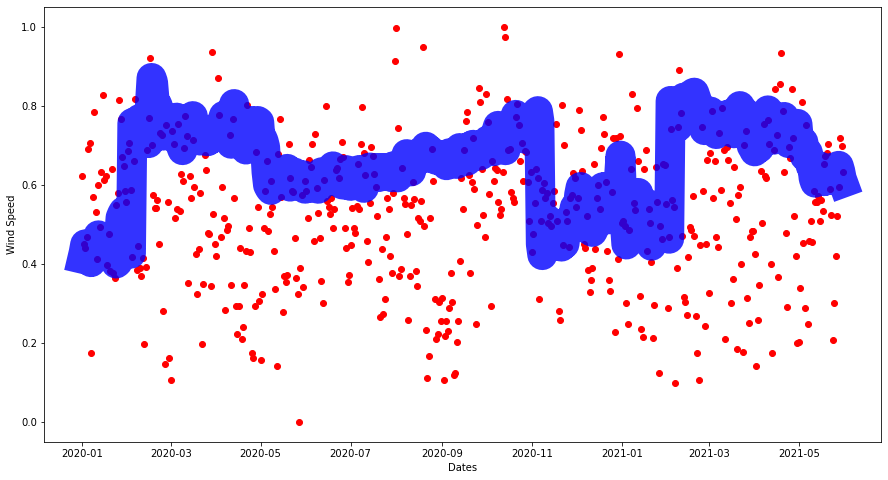

In [148]:
LR.fit(X_train_mmwl_transform,Y_train_mm_wl_transform)
prediction = LR.predict(X_test_mmwl_transform)
print('Training score for Linear Regression for max-min scaling is - ',LR.score(X_train_mmwl_transform,Y_train_mm_wl_transform),
      ', and test score is - ',LR.score(X_test_mmwl_transform,Y_test_mm_wl_transform),
      '. And RMSE is - ', math.sqrt(mean_squared_error(prediction,Y_test_mm_wl_transform)))
plt.figure(figsize=(15,8))
plt.scatter(mmwl_test_date,Y_test_mm_wl_transform, color="red", alpha=1)
plt.plot(mmwl_test_date,prediction, color="blue", alpha=0.8, linewidth=30)
plt.xlabel('Dates')
plt.ylabel('Wind Speed')

Training score for Linear Regression for standard scaling is -  0.2166202689746033 , and test score is -  -3.1674341283620087e+27 . And RMSE is -  56279962269753.875


Text(0, 0.5, 'Wind Speed')

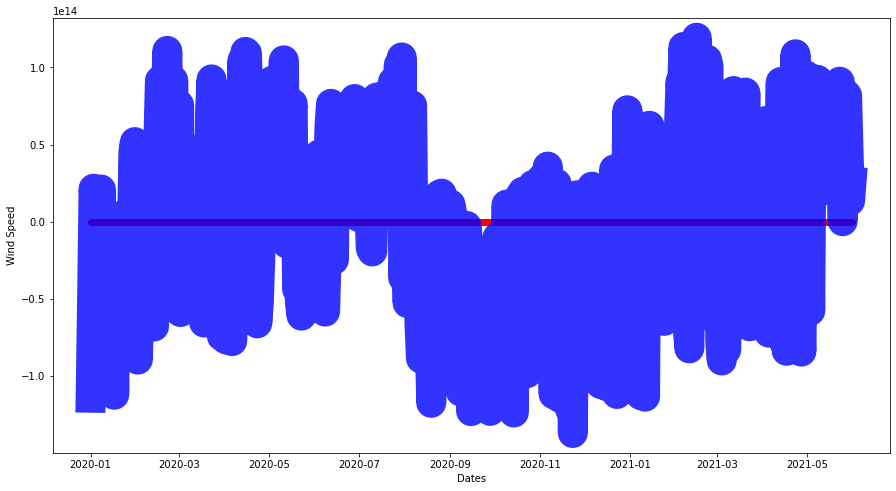

In [149]:
# Standard Scaling
LR.fit(X_train_ssw_transform,Y_train_ss_ns_transform)
prediction = LR.predict(X_test_ssw_transform)
print('Training score for Linear Regression for standard scaling is - ',LR.score(X_train_ssw_transform,Y_train_ss_ns_transform),
      ', and test score is - ',LR.score(X_test_ssw_transform,Y_test_ss_ns_transform),
      '. And RMSE is - ', math.sqrt(mean_squared_error(prediction,Y_test_ss_ns_transform)))
plt.figure(figsize=(15,8))
plt.scatter(ssw_test_date,Y_test_ss_ns_transform, color="red", alpha=1)
plt.plot(ssw_test_date,prediction, color="blue", alpha=0.8, linewidth=30)
plt.xlabel('Dates')
plt.ylabel('Wind Speed')

Training score for Linear Regression for standard scaling is -  0.20338710975530572 , and test score is -  -2.224804776569679e+27 . And RMSE is -  47167836250666.4


Text(0, 0.5, 'Wind Speed')

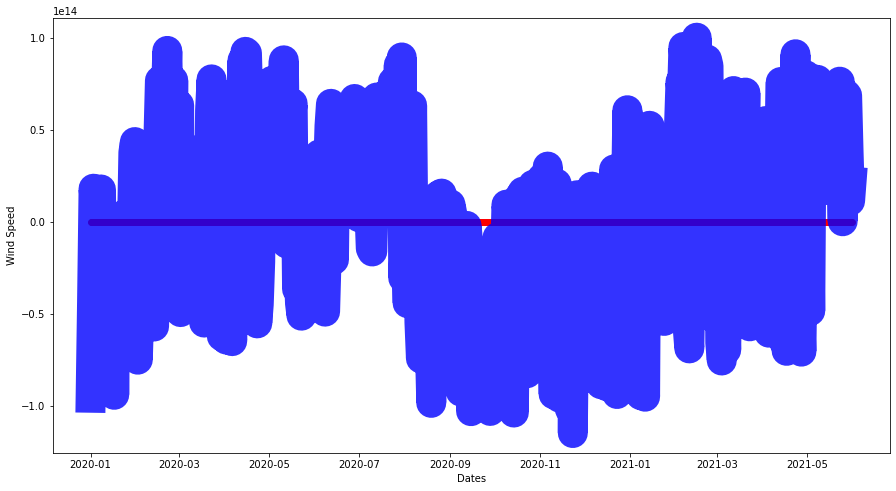

In [150]:
LR.fit(X_train_sswl_transform,Y_train_ss_wl_transform)
prediction = LR.predict(X_test_sswl_transform)
print('Training score for Linear Regression for standard scaling is - ',LR.score(X_train_sswl_transform,Y_train_ss_wl_transform),
      ', and test score is - ',LR.score(X_test_sswl_transform,Y_test_ss_wl_transform),
      '. And RMSE is - ', math.sqrt(mean_squared_error(prediction,Y_test_ss_wl_transform)))
plt.figure(figsize=(15,8))
plt.scatter(sswl_test_date,Y_test_ss_wl_transform, color="red", alpha=1)
plt.plot(sswl_test_date,prediction, color="blue", alpha=0.8, linewidth=30)
plt.xlabel('Dates')
plt.ylabel('Wind Speed')

# You can see that the score are pretty horrendous. Not sure if other models can help...
and....... yea. It is equally as bad...

In [152]:
# Conducting with Lasso Regression
# no scaling
model_LaR.fit(train_data_X_ns,train_data_Y_ns)
print('Best score for Lasso Regression on no scaling is - ', model_LaR.best_score_, 
      ', and test score is - ', model_LaR.score(test_data_X_ns, test_data_Y_ns),
     ', and best parameters are - ', model_LaR.best_params_)
model_LaR.fit(train_data_X_ns,train_data_y_wl)
print('Best score for Lasso Regression on no scaling is - ', model_LaR.best_score_, 
      ', and test score is - ', model_LaR.score(test_data_X_ns, test_data_y_wl),
     ', and best parameters are - ', model_LaR.best_params_)

# max-min
model_LaR.fit(X_train_mmw_transform,Y_train_mm_ns_transform)
print('Best score for Lasso Regression on max-min scaling is - ', model_LaR.best_score_, 
      ', and test score is - ', model_LaR.score(X_test_mmw_transform, Y_test_mm_ns_transform),
     ', and best parameters are - ', model_LaR.best_params_)
model_LaR.fit(X_train_mmwl_transform,Y_train_mm_wl_transform)
print('Best score for Lasso Regression on max-min scaling is - ', model_LaR.best_score_, 
      ', and test score is - ', model_LaR.score(X_test_mmwl_transform, Y_test_mm_wl_transform),
     ', and best parameters are - ', model_LaR.best_params_)

# Standard Scaling
model_LaR.fit(X_train_ssw_transform,Y_train_ss_ns_transform)
print('Best score for Lasso Regression on standard scaling is - ', model_LaR.best_score_, 
      ', and test score is - ', model_LaR.score(X_test_ssw_transform, Y_test_ss_ns_transform),
     ', and best parameters are - ', model_LaR.best_params_)
model_LaR.fit(X_train_sswl_transform,Y_train_ss_wl_transform)
print('Best score for Lasso Regression on standard scaling is - ', model_LaR.best_score_, 
      ', and test score is - ', model_LaR.score(X_test_sswl_transform, Y_test_ss_wl_transform),
     ', and best parameters are - ', model_LaR.best_params_)

Best score for Lasso Regression on no scaling is -  0.14364621062859922 , and test score is -  0.1655856939176371 , and best parameters are -  {'alpha': 0.1}
Best score for Lasso Regression on no scaling is -  0.13283153963984115 , and test score is -  0.16916407834355118 , and best parameters are -  {'alpha': 0.01}
Best score for Lasso Regression on max-min scaling is -  0.02689141931911516 , and test score is -  -0.006048695299052387 , and best parameters are -  {'alpha': 0.01}
Best score for Lasso Regression on max-min scaling is -  0.013169532818622386 , and test score is -  -0.05000044762243183 , and best parameters are -  {'alpha': 0.01}
Best score for Lasso Regression on standard scaling is -  0.1390965233024613 , and test score is -  -0.0966902333190558 , and best parameters are -  {'alpha': 0.02}
Best score for Lasso Regression on standard scaling is -  0.13023816503131241 , and test score is -  -0.09850125162137546 , and best parameters are -  {'alpha': 0.02}


In [153]:
# Conducting with Ridge Regression
# no scaling
model_RR.fit(train_data_X_ns,train_data_Y_ns)
print('Best score for Ridge Regression on no scaling is - ', model_RR.best_score_, 
      ', and test score is - ', model_RR.score(test_data_X_ns, test_data_Y_ns),
     ', and best parameters are - ', model_RR.best_params_)
model_RR.fit(train_data_X_ns,train_data_y_wl)
print('Best score for Ridge Regression on no scaling is - ', model_RR.best_score_, 
      ', and test score is - ', model_RR.score(test_data_X_ns, test_data_y_wl),
     ', and best parameters are - ', model_RR.best_params_)

# max-min
model_RR.fit(X_train_mmw_transform,Y_train_mm_ns_transform)
print('Best score for Ridge Regression on max-min scaling is - ', model_RR.best_score_, 
      ', and test score is - ', model_RR.score(X_test_mmw_transform, Y_test_mm_ns_transform),
     ', and best parameters are - ', model_RR.best_params_)
model_RR.fit(X_train_mmwl_transform,Y_train_mm_wl_transform)
print('Best score for Ridge Regression on max-min scaling is - ', model_RR.best_score_, 
      ', and test score is - ', model_RR.score(X_test_mmwl_transform, Y_test_mm_wl_transform),
     ', and best parameters are - ', model_RR.best_params_)

# Standard Scaling
model_RR.fit(X_train_ssw_transform,Y_train_ss_ns_transform)
print('Best score for Ridge Regression on standard scaling is - ', model_RR.best_score_, 
      ', and test score is - ', model_RR.score(X_test_ssw_transform, Y_test_ss_ns_transform),
     ', and best parameters are - ', model_RR.best_params_)
model_RR.fit(X_train_sswl_transform,Y_train_ss_wl_transform)
print('Best score for Ridge Regression on standard scaling is - ', model_RR.best_score_, 
      ', and test score is - ', model_RR.score(X_test_sswl_transform, Y_test_ss_wl_transform),
     ', and best parameters are - ', model_RR.best_params_)

Best score for Ridge Regression on no scaling is -  0.13836111614135033 , and test score is -  0.15358482114740568 , and best parameters are -  {'alpha': 20, 'max_iter': 10000}
Best score for Ridge Regression on no scaling is -  0.13383480295956846 , and test score is -  0.15438066893911861 , and best parameters are -  {'alpha': 30, 'max_iter': 10000}
Best score for Ridge Regression on max-min scaling is -  0.13062305775554492 , and test score is -  -0.6113588210408842 , and best parameters are -  {'alpha': 1, 'max_iter': 10000}
Best score for Ridge Regression on max-min scaling is -  0.12369534896341638 , and test score is -  -0.7186630544102182 , and best parameters are -  {'alpha': 1, 'max_iter': 10000}
Best score for Ridge Regression on standard scaling is -  0.1333349436101621 , and test score is -  -0.11953789637928591 , and best parameters are -  {'alpha': 5, 'max_iter': 10000}
Best score for Ridge Regression on standard scaling is -  0.1267104800680788 , and test score is -  -0

In [154]:
# Conducting with Adaboost
# no scaling
model_ada.fit(train_data_X_ns,train_data_Y_ns)
print('Best score for ADABoost Regression on no scaling is - ', model_ada.best_score_, 
      ', and test score is - ', model_ada.score(test_data_X_ns, test_data_Y_ns),
     ', and best parameters are - ', model_ada.best_params_)
model_ada.fit(train_data_X_ns,train_data_y_wl)
print('Best score for ADABoost Regression on no scaling is - ', model_ada.best_score_, 
      ', and test score is - ', model_ada.score(test_data_X_ns, test_data_y_wl),
     ', and best parameters are - ', model_ada.best_params_)

# max-min
model_ada.fit(X_train_mmw_transform,Y_train_mm_ns_transform)
print('Best score for ADABoost Regression on max-min scaling is - ', model_ada.best_score_, 
      ', and test score is - ', model_ada.score(X_test_mmw_transform, Y_test_mm_ns_transform),
     ', and best parameters are - ', model_ada.best_params_)
model_ada.fit(X_train_mmwl_transform,Y_train_mm_wl_transform)
print('Best score for ADABoost Regression on max-min scaling is - ', model_ada.best_score_, 
      ', and test score is - ', model_ada.score(X_test_mmwl_transform, Y_test_mm_wl_transform),
     ', and best parameters are - ', model_ada.best_params_)

# Standard Scaling
model_ada.fit(X_train_ssw_transform,Y_train_ss_ns_transform)
print('Best score for ADABoost Regression on standard scaling is - ', model_ada.best_score_, 
      ', and test score is - ', model_ada.score(X_test_ssw_transform, Y_test_ss_ns_transform),
     ', and best parameters are - ', model_ada.best_params_)
model_ada.fit(X_train_sswl_transform,Y_train_ss_wl_transform)
print('Best score for ADABoost Regression on standard scaling is - ', model_ada.best_score_, 
      ', and test score is - ', model_ada.score(X_test_sswl_transform, Y_test_ss_wl_transform),
     ', and best parameters are - ', model_ada.best_params_)

Best score for ADABoost Regression on no scaling is -  0.1570295054253133 , and test score is -  0.17264757168149258 , and best parameters are -  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 25}
Best score for ADABoost Regression on no scaling is -  0.12984136797052143 , and test score is -  0.14079837411632035 , and best parameters are -  {'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 10}
Best score for ADABoost Regression on max-min scaling is -  0.15742827593535239 , and test score is -  -0.9923141107523084 , and best parameters are -  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
Best score for ADABoost Regression on max-min scaling is -  0.12714729958755305 , and test score is -  -0.5827807110226442 , and best parameters are -  {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 25}
Best score for ADABoost Regression on standard scaling is -  0.1637191720504687 , and test score is -  -0.24456386111697492 , and best parameters a

In [155]:
# Conducting with Gradient Boost
# no scaling
model_gb.fit(train_data_X_ns,train_data_Y_ns)
print('Best score for GradBoost Regression on no scaling is - ', model_gb.best_score_, 
      ', and test score is - ', model_gb.score(test_data_X_ns, test_data_Y_ns),
     ', and best parameters are - ', model_gb.best_params_)
model_gb.fit(train_data_X_ns,train_data_y_wl)
print('Best score for GradBoost Regression on no scaling is - ', model_gb.best_score_, 
      ', and test score is - ', model_gb.score(test_data_X_ns, test_data_y_wl),
     ', and best parameters are - ', model_gb.best_params_)

# max-min
model_gb.fit(X_train_mmw_transform,Y_train_mm_ns_transform)
print('Best score for GradBoost Regression on max-min scaling is - ', model_gb.best_score_, 
      ', and test score is - ', model_gb.score(X_test_mmw_transform, Y_test_mm_ns_transform),
     ', and best parameters are - ', model_gb.best_params_)
model_gb.fit(X_train_mmwl_transform,Y_train_mm_wl_transform)
print('Best score for GradBoost Regression on max-min scaling is - ', model_gb.best_score_, 
      ', and test score is - ', model_gb.score(X_test_mmwl_transform, Y_test_mm_wl_transform),
     ', and best parameters are - ', model_gb.best_params_)

# Standard Scaling
model_gb.fit(X_train_ssw_transform,Y_train_ss_ns_transform)
print('Best score for GradBoost Regression on standard scaling is - ', model_gb.best_score_, 
      ', and test score is - ', model_gb.score(X_test_ssw_transform, Y_test_ss_ns_transform),
     ', and best parameters are - ', model_gb.best_params_)
model_gb.fit(X_train_sswl_transform,Y_train_ss_wl_transform)
print('Best score for GradBoost Regression on standard scaling is - ', model_gb.best_score_, 
      ', and test score is - ', model_gb.score(X_test_sswl_transform, Y_test_ss_wl_transform),
     ', and best parameters are - ', model_gb.best_params_)

Best score for GradBoost Regression on no scaling is -  0.1466115111369149 , and test score is -  0.16435365201705965 , and best parameters are -  {'learning_rate': 0.01, 'n_estimators': 100}
Best score for GradBoost Regression on no scaling is -  0.12029737313396034 , and test score is -  0.1596244793176046 , and best parameters are -  {'learning_rate': 0.01, 'n_estimators': 100}
Best score for GradBoost Regression on max-min scaling is -  0.15113982888995323 , and test score is -  -1.4262096072579378 , and best parameters are -  {'learning_rate': 0.1, 'n_estimators': 25}
Best score for GradBoost Regression on max-min scaling is -  0.12018641164575503 , and test score is -  -0.3866580854556454 , and best parameters are -  {'learning_rate': 0.01, 'n_estimators': 100}
Best score for GradBoost Regression on standard scaling is -  0.14904554947675222 , and test score is -  -0.3122132544139813 , and best parameters are -  {'learning_rate': 0.1, 'n_estimators': 50}
Best score for GradBoost 

In [156]:
# Conducting with Random Forest
# no scaling
model_rf.fit(train_data_X_ns,train_data_Y_ns)
print('Best score for Random Forest on no scaling is - ', model_rf.best_score_, 
      ', and test score is - ', model_rf.score(test_data_X_ns, test_data_Y_ns),
     ', and best parameters are - ', model_rf.best_params_)
model_rf.fit(train_data_X_ns,train_data_y_wl)
print('Best score for Random Forest on no scaling is - ', model_rf.best_score_, 
      ', and test score is - ', model_rf.score(test_data_X_ns, test_data_y_wl),
     ', and best parameters are - ', model_rf.best_params_)

# max-min
model_rf.fit(X_train_mmw_transform,Y_train_mm_ns_transform)
print('Best score for Random Forest on max-min scaling is - ', model_rf.best_score_, 
      ', and test score is - ', model_rf.score(X_test_mmw_transform, Y_test_mm_ns_transform),
     ', and best parameters are - ', model_rf.best_params_)
model_rf.fit(X_train_mmwl_transform,Y_train_mm_wl_transform)
print('Best score for Random Forest on max-min scaling is - ', model_rf.best_score_, 
      ', and test score is - ', model_rf.score(X_test_mmwl_transform, Y_test_mm_wl_transform),
     ', and best parameters are - ', model_rf.best_params_)

# Standard Scaling
model_rf.fit(X_train_ssw_transform,Y_train_ss_ns_transform)
print('Best score for Random Forest on standard scaling is - ', model_rf.best_score_, 
      ', and test score is - ', model_rf.score(X_test_ssw_transform, Y_test_ss_ns_transform),
     ', and best parameters are - ', model_rf.best_params_)
model_rf.fit(X_train_sswl_transform,Y_train_ss_wl_transform)
print('Best score for Random Forest on standard scaling is - ', model_rf.best_score_, 
      ', and test score is - ', model_rf.score(X_test_sswl_transform, Y_test_ss_wl_transform),
     ', and best parameters are - ', model_rf.best_params_)

Best score for Random Forest on no scaling is -  0.08997277161300025 , and test score is -  0.13256196614653915 , and best parameters are -  {'n_estimators': 20}
Best score for Random Forest on no scaling is -  0.047333411303318765 , and test score is -  0.17208914433160216 , and best parameters are -  {'n_estimators': 20}
Best score for Random Forest on max-min scaling is -  0.10501392647471638 , and test score is -  -1.4228078903549437 , and best parameters are -  {'n_estimators': 20}
Best score for Random Forest on max-min scaling is -  0.02860252467751525 , and test score is -  -1.0410640828220847 , and best parameters are -  {'n_estimators': 15}
Best score for Random Forest on standard scaling is -  0.09653078266403958 , and test score is -  -0.32179462305549866 , and best parameters are -  {'n_estimators': 15}
Best score for Random Forest on standard scaling is -  0.05131292424924836 , and test score is -  -0.3619075883180338 , and best parameters are -  {'n_estimators': 20}


In [157]:
model_RR.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__max_iter', 'estimator__normalize', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [158]:
Ridge().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])

In [159]:
model_ada.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__base_estimator', 'estimator__learning_rate', 'estimator__loss', 'estimator__n_estimators', 'estimator__random_state', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

# Part 2: Any hope with ARIMA?
So, after figuring out that Regression models don't work well. Maybe ARIMA can work for seasonality?

In [161]:
train_time = train[['Datetime','Temperature']]

In [162]:
test_time = test[['Datetime','Temperature']]

In [384]:
train_time.head()

Temperature
Datetime               
2018-01-01    17.100000
2018-01-02    18.133333
2018-01-03    20.000000
2018-01-04    19.299999
2018-01-05    19.099998

As the temperature charts show some kind of pattern, I was hoping to smooth out the chart by applying Moving Average. But would that be redundant? Since ARIMA contains the moving average portion. But why not try?

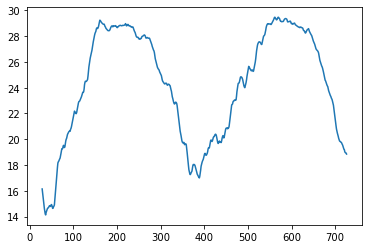

In [164]:
plt.plot(train_time.rolling(30).mean())

In [165]:
train_time_ma=train_time.rolling(30).mean()
train_time_ma=train_time_ma[29:]

In [166]:
train_time = train_time.set_index('Datetime')

In [167]:
test_time = test_time.set_index('Datetime')

In [168]:
test_time_ma=test_time.rolling(30).mean()
test_time_ma=test_time_ma[29:]

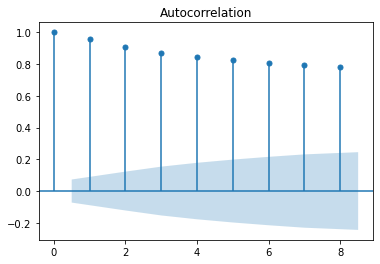

In [169]:
trn_acf = plot_acf(train_time, lags=8)

In [170]:
auto_arima_model = auto_arima(train_time, m=12, with_intercept=False, suppress_warnings=True)
print(auto_arima_model.summary())

# Notice that the title of the table below is "SARIMAX" as opposed to "ARIMA"

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  727
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1227.864
Date:                Wed, 08 Sep 2021   AIC                           2463.727
Time:                        13:20:19   BIC                           2482.078
Sample:                             0   HQIC                          2470.809
                                - 727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6286      0.048     13.193      0.000       0.535       0.722
ma.L1         -0.5532      0.051    -10.947      0.000      -0.652      -0.454
ma.L2         -0.3105      0.034     -9.124      0.0

In [171]:
auto_arima_model.order

(1, 1, 2)

In [172]:
auto_arima_model.seasonal_order

(0, 0, 0, 12)

In [173]:
resid = auto_arima_model.resid()

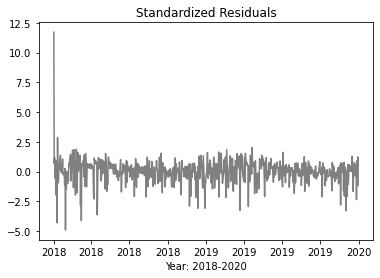

In [174]:
fig, ax = plt.subplots()
plt.plot(train_time.index, stats.zscore(resid), color='gray')
plt.title('Standardized Residuals')
plt.xlabel('Year: 2018-2020')
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Residuals settle in around 0 over time which means over model is predicting well

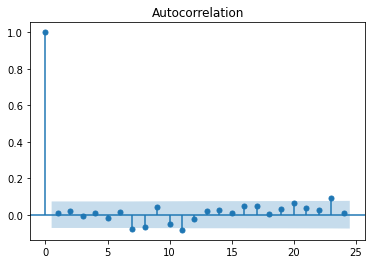

In [175]:
res_acf = plot_acf(resid, lags=24)

# Nearly all the lags have weak correlations

In [176]:
auto_arima_model.fit(train_time)

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [177]:
arima_predictions = auto_arima_model.predict(517, alpha=0.05, return_conf_int=True)

In [178]:
y_pred = pd.Series(arima_predictions[0], index=test_time.index)

In [179]:
y_pred_lb, y_pred_ub = arima_predictions[1][:, 0], arima_predictions[1][:, 1]

Using the ARIMA modeling to plot temperature data..... AND..... the forecasted values failed.... LOL

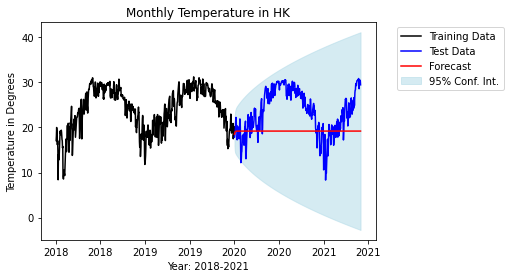

In [180]:
fig, ax = plt.subplots()
plt.xlabel('Year: 2018-2021')
plt.ylabel('Temperature in Degrees')
plt.title('Monthly Temperature in HK')
plt.fill_between(test_time.index, y_pred_lb, y_pred_ub, color='lightblue', alpha=0.5, label='95% Conf. Int.')
plt.plot(train_time, color='black', label='Training Data')
plt.plot(test_time, color='blue', label='Test Data')
plt.plot(y_pred, color='red', label='Forecast')
plt.legend(bbox_to_anchor=(1.05, 1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Training data stops at start of 1958
# We are trying to predict the values from 1958 onwards
# Forecasted values are trending very closely to actual values in test data

In [181]:
tst_pred = pd.DataFrame({
    'Actual': test_time.iloc[:, 0].values, 
    'Point Forecast': y_pred.values, 
    'Lo 95': y_pred_lb,
    'Hi 95': y_pred_ub
    }, index=test_time.index)

In [182]:
tst_pred

Actual  Point Forecast      Lo 95      Hi 95
Datetime                                                   
2020-01-01  17.833334       18.508397  15.935750  21.081044
2020-01-02  18.100000       18.767076  14.989240  22.544912
2020-01-03  18.933332       18.929670  14.612487  23.246852
2020-01-04  19.000000       19.031869  14.405115  23.658623
2020-01-05  20.366667       19.096107  14.263193  23.929021
...               ...             ...        ...        ...
2021-05-27  30.366667       19.204810  -2.647510  41.057130
2021-05-28  30.566666       19.204810  -2.667886  41.077506
2021-05-29  30.133333       19.204810  -2.688242  41.097863
2021-05-30  30.333334       19.204810  -2.708580  41.118200
2021-05-31  29.466667       19.204810  -2.728899  41.138519

[517 rows x 4 columns]

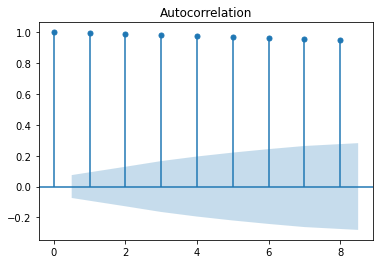

In [183]:
trn_acf = plot_acf(train_time_ma, lags=8)

In [184]:
auto_arima_model = auto_arima(train_time_ma, m=12, with_intercept=False, suppress_warnings=True)
print(auto_arima_model.summary())

# Notice that the title of the table below is "SARIMAX" as opposed to "ARIMA"

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  698
Model:               SARIMAX(1, 2, 2)   Log Likelihood                 967.303
Date:                Wed, 08 Sep 2021   AIC                          -1926.606
Time:                        13:20:33   BIC                          -1908.425
Sample:                             0   HQIC                         -1919.576
                                - 698                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7001      0.036     19.328      0.000       0.629       0.771
ma.L1         -0.5965      0.040    -14.968      0.000      -0.675      -0.518
ma.L2         -0.3525      0.035    -10.095      0.0

In [185]:
auto_arima_model.fit(train_time_ma)

ARIMA(order=(1, 2, 2), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [186]:
arima_predictions = auto_arima_model.predict(488, alpha=0.05, return_conf_int=True)

In [187]:
y_pred_ma = pd.Series(arima_predictions[0], index=test_time_ma.index)

In [188]:
y_pred_lb_ma, y_pred_ub_ma = arima_predictions[1][:, 0], arima_predictions[1][:, 1]

This was somewhat supposed to be the ARIMA model for the moving average one. Well... it failed beyond comprehension... great...

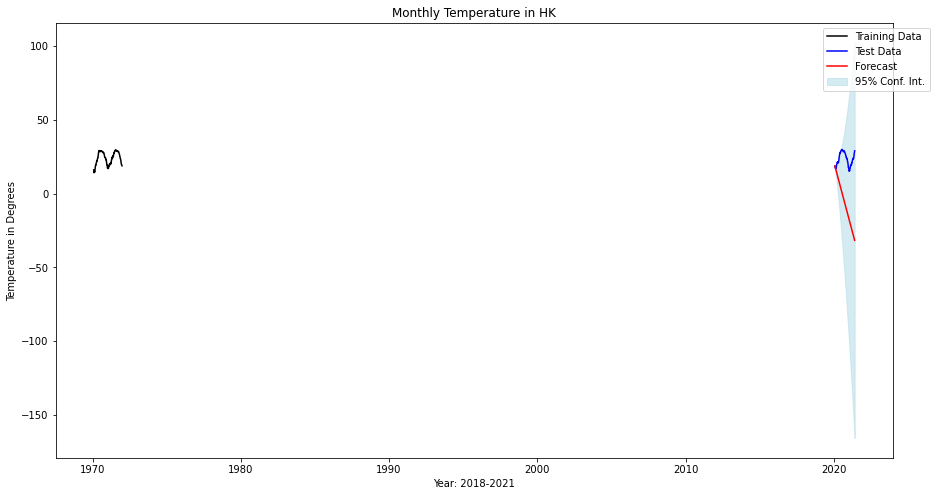

In [385]:
fig, ax = plt.subplots()
plt.xlabel('Year: 2018-2021')
plt.ylabel('Temperature in Degrees')
plt.title('Monthly Temperature in HK')
plt.fill_between(test_time_ma.index, y_pred_lb_ma, y_pred_ub_ma, color='lightblue', alpha=0.5, label='95% Conf. Int.')
plt.plot(train_time_ma, color='black', label='Training Data')
plt.plot(test_time_ma, color='blue', label='Test Data')
plt.plot(y_pred_ma, color='red', label='Forecast')
plt.legend(bbox_to_anchor=(1.05, 1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Training data stops at start of 1958
# We are trying to predict the values from 1958 onwards
# Forecasted values are trending very closely to actual values in test data

In [190]:
train_wind = train[['Datetime','Wind']]
test_wind = test[['Datetime','Wind']]

In [191]:
train_wind = train_wind.set_index('Datetime')
test_wind = test_wind.set_index('Datetime')

In [192]:
auto_arima_model = auto_arima(train_wind, m=12, with_intercept=False, suppress_warnings=True)
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  727
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -2157.859
Date:                Wed, 08 Sep 2021   AIC                           4325.718
Time:                        13:21:30   BIC                           4348.663
Sample:                             0   HQIC                          4334.572
                                - 727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.0710      0.785     11.554      0.000       7.532      10.610
ar.L1          0.5539      0.033     16.560      0.000       0.488       0.620
ar.L2         -0.1919      0.037     -5.198      0.0

In [193]:
auto_arima_model.fit(train_wind)

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [194]:
arima_predictions = auto_arima_model.predict(517, alpha=0.05, return_conf_int=True)

In [195]:
y_pred = pd.Series(arima_predictions[0], index=test_wind.index)
y_pred_lb, y_pred_ub = arima_predictions[1][:, 0], arima_predictions[1][:, 1]

ARIMA for wind speed values. At this point, I'm just not going to bother

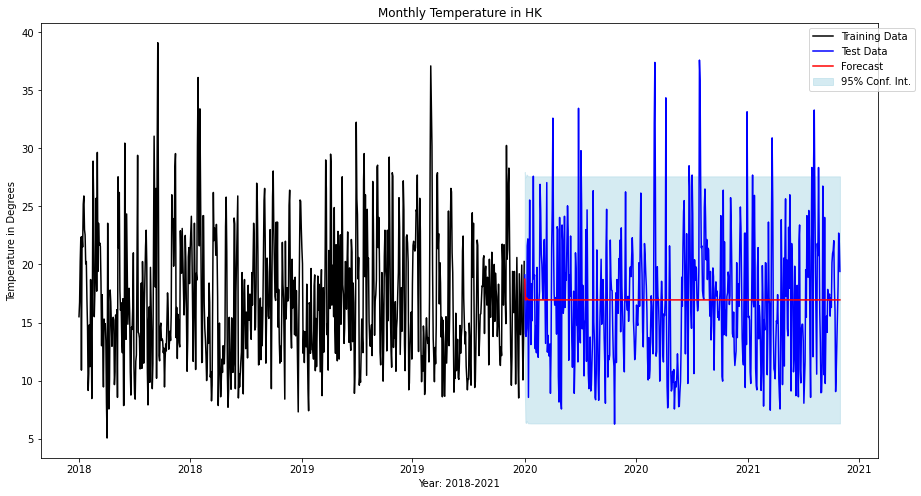

In [196]:
fig, ax = plt.subplots(figsize=(15,8))
plt.xlabel('Year: 2018-2021')
plt.ylabel('Temperature in Degrees')
plt.title('Monthly Temperature in HK')
plt.fill_between(test_wind.index, y_pred_lb, y_pred_ub, color='lightblue', alpha=0.5, label='95% Conf. Int.')
plt.plot(train_wind, color='black', label='Training Data')
plt.plot(test_wind, color='blue', label='Test Data')
plt.plot(y_pred, color='red', label='Forecast')
plt.legend(bbox_to_anchor=(1.05, 1))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

In [197]:
tst_pred = pd.DataFrame({
    'Actual': test_time.iloc[:, 0].values, 
    'Point Forecast': y_pred.values, 
    'Lo 95': y_pred_lb,
    'Hi 95': y_pred_ub
    }, index=test_wind.index)

In [198]:
tst_pred

Actual  Point Forecast     Lo 95      Hi 95
Datetime                                                  
2020-01-01  17.833334       18.729862  9.504770  27.954954
2020-01-02  18.100000       16.946805  6.400884  27.492726
2020-01-03  18.933332       16.943947  6.344832  27.543062
2020-01-04  19.000000       17.128413  6.514819  27.742008
2020-01-05  20.366667       17.048044  6.415871  27.680217
...               ...             ...       ...        ...
2021-05-27  30.366667       16.946972  6.307830  27.586113
2021-05-28  30.566666       16.946972  6.307830  27.586113
2021-05-29  30.133333       16.946972  6.307830  27.586113
2021-05-30  30.333334       16.946972  6.307830  27.586113
2021-05-31  29.466667       16.946972  6.307830  27.586113

[517 rows x 4 columns]

# Part 3. Predicting future values via LSTM. Resourced from [LSTM](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [199]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.grid'] = False

For the sake of simplicity, I just took the readings from 1 position in Hong Kong because it had the most number of readings. King's Park.
I wished they had more daily values like rainfall, precipitation, but those values on the HK observatory website was limited to short term forecasting. and it took multiple values within a day. There was also an issue when I wanted to pull previous years' data. So I just focused on whatever I could pull

In [200]:
df_kp_wind_dir=pd.read_csv('./src/KP_WIND_DIR.csv')
df_kp_uv=pd.read_csv('./src/KP_UV.csv')

In [201]:
df_kp_wind_dir.head(3)

Year  Month  Day Value
0  1992    7.0  1.0   180
1  1992    7.0  2.0   180
2  1992    7.0  3.0   230

In [202]:
df_kp_uv.head(3)

Year  Month  Day Value
0  1999    8.0  1.0     7
1  1999    8.0  2.0     3
2  1999    8.0  3.0     3

In [203]:
max_temp = df_kp_max_temp[(df_kp_max_temp['Year']=='2018')|(df_kp_max_temp['Year']=='2019')|(df_kp_max_temp['Year']=='2020')|(df_kp_max_temp['Year']=='2021')]
sun = df_kp_sun[(df_kp_sun['Year']=='2018')|(df_kp_sun['Year']=='2019')|(df_kp_sun['Year']=='2020')|(df_kp_sun['Year']=='2021')]
wind = df_kp_wind[(df_kp_wind['Year']=='2018')|(df_kp_wind['Year']=='2019')|(df_kp_wind['Year']=='2020')|(df_kp_wind['Year']=='2021')]
mean_temp = df_kp_temp[(df_kp_temp['Year']=='2018')|(df_kp_temp['Year']=='2019')|(df_kp_temp['Year']=='2020')|(df_kp_temp['Year']=='2021')]
min_temp = df_kp_min_temp[(df_kp_min_temp['Year']=='2018')|(df_kp_min_temp['Year']=='2019')|(df_kp_min_temp['Year']=='2020')|(df_kp_min_temp['Year']=='2021')]
wind_dir = df_kp_wind_dir[(df_kp_wind_dir['Year']=='2018')|(df_kp_wind_dir['Year']=='2019')|(df_kp_wind_dir['Year']=='2020')|(df_kp_wind_dir['Year']=='2021')]
uv = df_kp_uv[(df_kp_uv['Year']=='2018')|(df_kp_uv['Year']=='2019')|(df_kp_uv['Year']=='2020')|(df_kp_uv['Year']=='2021')]

In [204]:
max_temp

Year  Month   Day Value
0     2018    1.0   1.0  19.6
1     2018    1.0   2.0    20
2     2018    1.0   3.0  22.8
3     2018    1.0   4.0  21.5
4     2018    1.0   5.0  23.2
...    ...    ...   ...   ...
1303  2021    7.0  27.0  34.8
1304  2021    7.0  28.0  33.5
1305  2021    7.0  29.0  31.8
1306  2021    7.0  30.0  30.1
1307  2021    7.0  31.0  31.9

[1308 rows x 4 columns]

In [205]:
max_temp=max_temp.rename(columns={"Value": "Max_T"},errors='raise')
sun=sun.rename(columns={"Value": "Sun"},errors='raise')
wind=wind.rename(columns={"Value": "Wind"},errors='raise')
mean_temp=mean_temp.rename(columns={"Value": "Mean_T"},errors='raise')
min_temp=min_temp.rename(columns={"Value": "Min_T"},errors='raise')
wind_dir=wind_dir.rename(columns={"Value": "Wind_Dir"},errors='raise')
uv=uv.rename(columns={"Value": "UV"},errors='raise')

In [206]:
uv.reset_index(drop=True,inplace=True)
wind_dir.reset_index(drop=True,inplace=True)
max_temp.reset_index(drop=True,inplace=True)
wind_dir.reset_index(drop=True,inplace=True)
sun.reset_index(drop=True,inplace=True)
mean_temp.reset_index(drop=True,inplace=True)
min_temp.reset_index(drop=True,inplace=True)
max_temp=max_temp[:1247]
sun=sun[:1247]
wind=wind[:1247]
mean_temp=mean_temp[:1247]
min_temp=min_temp[:1247]
wind_dir=wind_dir[:1247]
uv=uv[:1247]

In [207]:
df = pd.DataFrame()
df['Year'] = pd.to_numeric(max_temp['Year'], downcast="float")
df['Month'] = pd.to_numeric(max_temp['Month'], downcast="float")
df['Day'] = pd.to_numeric(max_temp['Day'], downcast="float")
df['Mean_T'] = pd.to_numeric(mean_temp['Mean_T'], downcast="float")
df['T_Diff'] = pd.to_numeric(max_temp['Max_T'], downcast="float") - pd.to_numeric(min_temp['Min_T'], downcast="float")
df['Sun'] = pd.to_numeric(sun['Sun'], downcast="float")
df['UV'] = pd.to_numeric(uv['UV'], downcast="float")
df['Wind'] = pd.to_numeric(wind['Wind'], downcast="float")
df['Wind_Dir'] = pd.to_numeric(wind_dir['Wind_Dir'], downcast="float")

In [208]:
df

Year  Month   Day     Mean_T    T_Diff   Sun   UV  Wind  Wind_Dir
0     2018.0    1.0   1.0  16.900000  4.000000   3.0  2.0   9.0     120.0
1     2018.0    1.0   2.0  17.600000  5.000000   3.6  2.0   9.0     130.0
2     2018.0    1.0   3.0  19.400000  4.900000   8.4  2.0  11.1     110.0
3     2018.0    1.0   4.0  18.799999  3.900000   0.6  2.0  12.0     120.0
4     2018.0    1.0   5.0  19.100000  6.600000   0.2  1.0   6.4     130.0
...      ...    ...   ...        ...       ...   ...  ...   ...       ...
1242  2021.0    5.0  27.0  30.100000  6.300001  10.6  6.0   9.4     270.0
1243  2021.0    5.0  28.0  30.299999  6.000000  11.1  6.0   9.3     270.0
1244  2021.0    5.0  29.0  30.000000  5.000000   7.8  5.0  10.0     260.0
1245  2021.0    5.0  30.0  30.200001  4.200001   4.9  4.0   8.9     260.0
1246  2021.0    5.0  31.0  29.000000  6.400000   1.6  2.0   8.8     260.0

[1247 rows x 9 columns]

In [209]:
uv

Year  Month   Day UV
0     2018    1.0   1.0  2
1     2018    1.0   2.0  2
2     2018    1.0   3.0  2
3     2018    1.0   4.0  2
4     2018    1.0   5.0  1
...    ...    ...   ... ..
1242  2021    5.0  27.0  6
1243  2021    5.0  28.0  6
1244  2021    5.0  29.0  5
1245  2021    5.0  30.0  4
1246  2021    5.0  31.0  2

[1247 rows x 4 columns]

In [210]:
df['Year'] = df['Year'].apply(lambda x:turn_int(x))
df['Month'] = df['Month'].apply(lambda x:turn_int(x))
df['Day'] = df['Day'].apply(lambda x:turn_int(x))
df['Year_str'] = df['Year'].apply(lambda x:turn_str(x))
df['Month_str'] = df['Month'].apply(lambda x:turn_str(x))
df['Day_str'] = df['Day'].apply(lambda x:turn_str(x))
df['Month_str'] = df['Month_str'].apply(lambda x:add_zero(x))
df['Day_str'] = df['Day_str'].apply(lambda x:add_zero(x))
df['Date'] = df['Year_str']+'-'+df['Month_str']+'-'+df['Day_str']
df['Datetime']= df['Date'].apply(lambda x: convertdate(x))
df.drop(columns=['Date'],inplace=True)
df['Date'] = df['Day_str']+'.'+df['Month_str']+'.'+df['Year_str']
df.drop(columns=['Month_str','Day_str','Year_str','Year','Month','Day'],inplace=True)

In [211]:
date_time=pd.to_datetime(df.pop('Date'), format='%d.%m.%Y')

Just a simple plot to show the certain features. Nothing much.

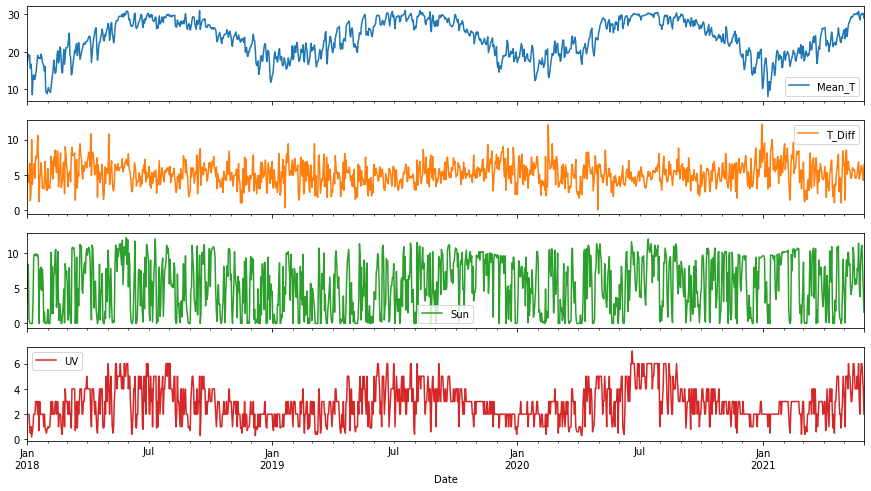

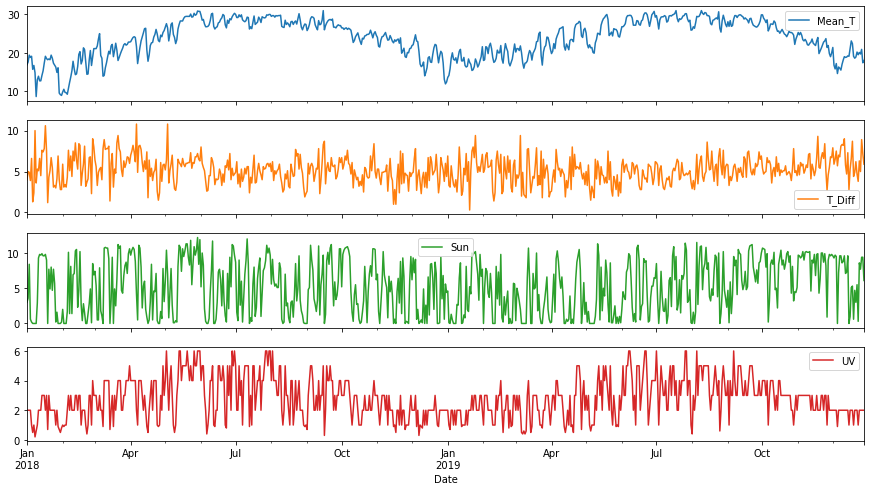

In [212]:
plot_cols = ['Mean_T', 'T_Diff', 'Sun', 'UV']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:727]
plot_features.index = date_time[:727]
_ = plot_features.plot(subplots=True)

In [213]:
df.describe().transpose()

count        mean        std   min        25%    50%         75%  \
Mean_T    1247.0   23.595428   4.898863   8.1  19.799999   24.0   28.000000   
T_Diff    1247.0    5.178108   1.675691   0.0   4.100000    5.1    6.200001   
Sun       1247.0    5.382999   3.797156   0.0   1.650000    5.5    9.000000   
UV        1247.0    2.848035   1.424029   0.2   2.000000    3.0    4.000000   
Wind      1247.0    9.572975   3.018163   2.1   7.500000    9.3   11.300000   
Wind_Dir  1247.0  132.133118  83.586952  10.0  90.000000  100.0  200.000000   

                 max  
Mean_T     31.000000  
T_Diff     12.200001  
Sun        12.200000  
UV          7.000000  
Wind       38.900002  
Wind_Dir  360.000000

Text(0, 0.5, 'Wind Velocity [m/s]')

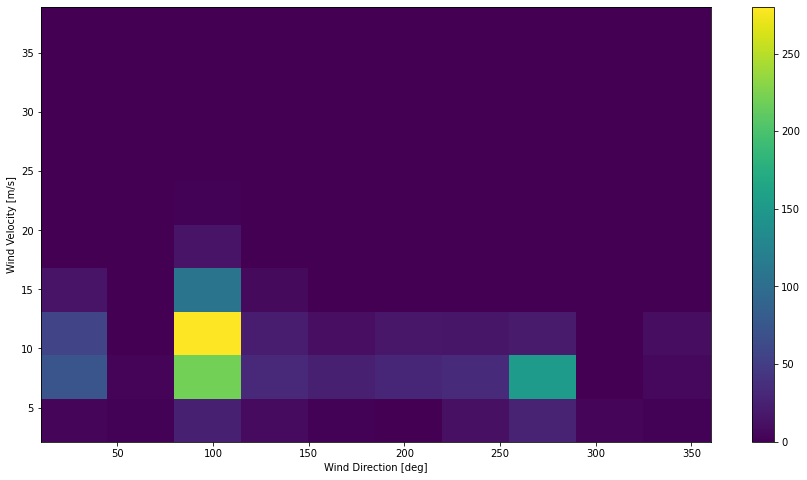

In [214]:
plt.hist2d(df['Wind_Dir'], df['Wind'])
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

Vectorizing the data. Wind data can be a bit difficult to work with since there are Speed (Scalar) and Angle (direction), so turning into a vector might help with the processing.
So using simple math to convert into radian form

In [215]:
# Converting into a wind vector
wv = df.pop('Wind')

# Convert to radians.
wd_rad = df.pop('Wind_Dir')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
# df['max Wx'] = max_wv*np.cos(wd_rad)
# df['max Wy'] = max_wv*np.sin(wd_rad)

(-12.800000190734863,
 38.30902099609375,
 -10.537442207336426,
 21.665769577026367)

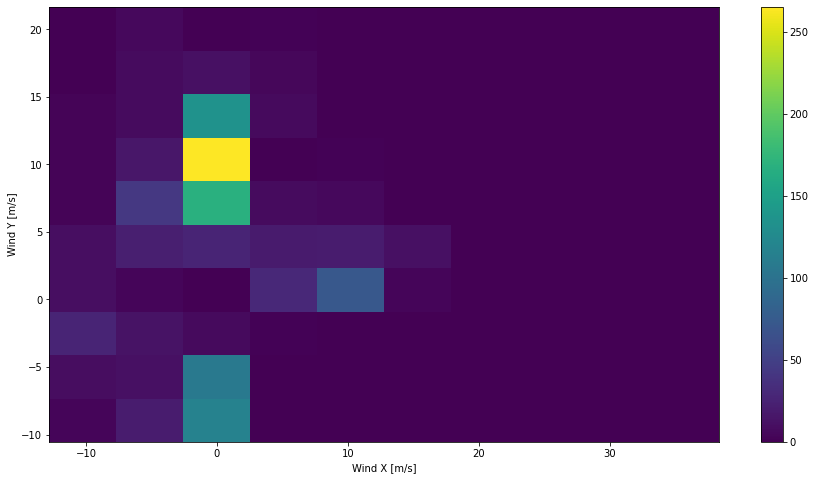

In [216]:
plt.hist2d(df['Wx'], df['Wy'])
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

<AxesSubplot:xlabel='Wx', ylabel='Count'>

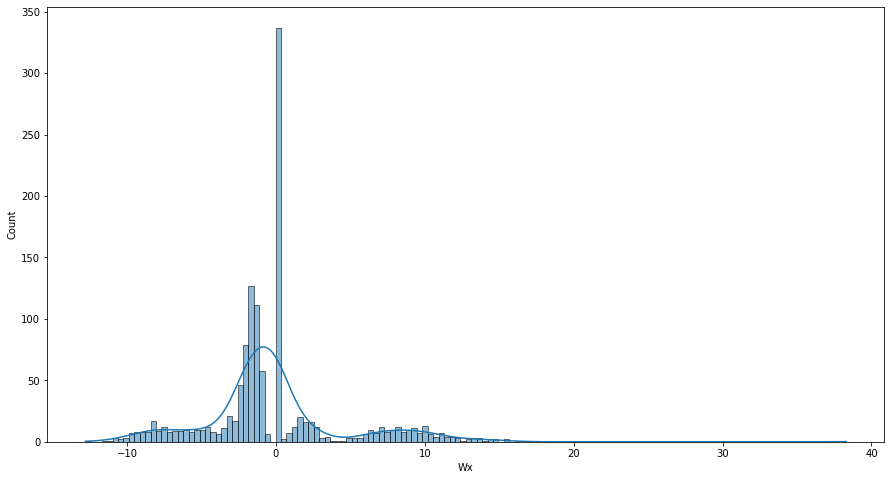

In [217]:
sns.histplot(data=df, x="Wx", kde=True)

<AxesSubplot:xlabel='Wy', ylabel='Count'>

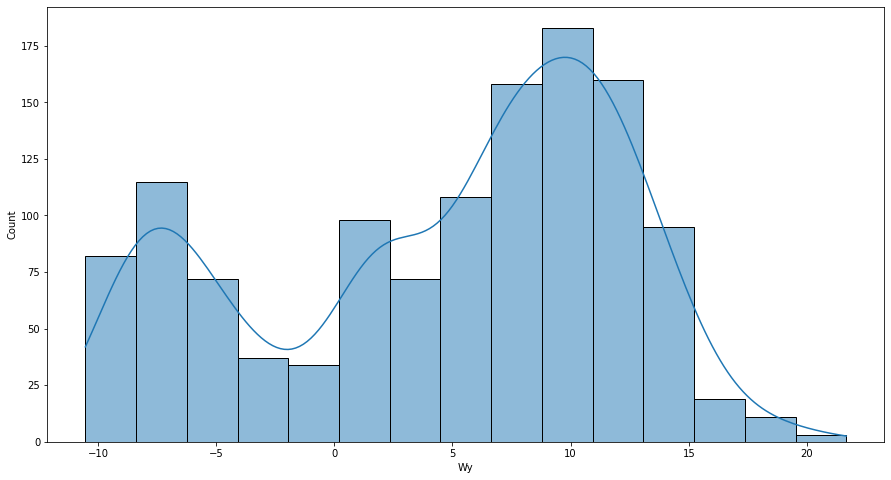

In [218]:
sns.histplot(data=df, x="Wy", kde=True)

In [219]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

Transforming the datetime stamps into a cyclic wave. This was recommended by the tutorial. As the datetime is quite difficult to define as an input into models, it was suggested to view datetime as a seasonality thing for the processing

In [220]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Yearly Seasonality')

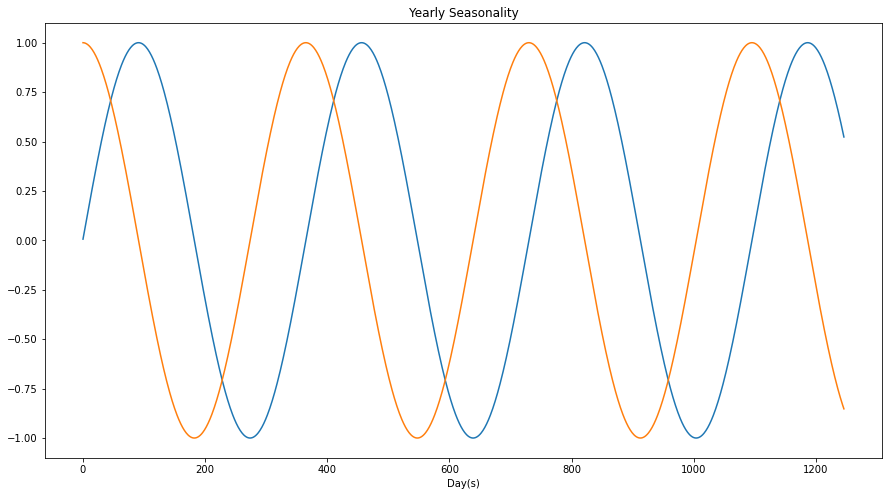

In [387]:
plt.plot(np.array(df['Year sin']))
plt.plot(np.array(df['Year cos']))
plt.xlabel('Day(s)')
plt.title('Yearly Seasonality')

In [222]:
# Day signals probably won't make sense because each reading itself is 1 day, rather than multiple readings a day
df.drop(columns=['Day sin','Day cos'],inplace=True)

A fast FFT to view the strongest signal in the charts. FFT is good at extracting signals and reducing noise

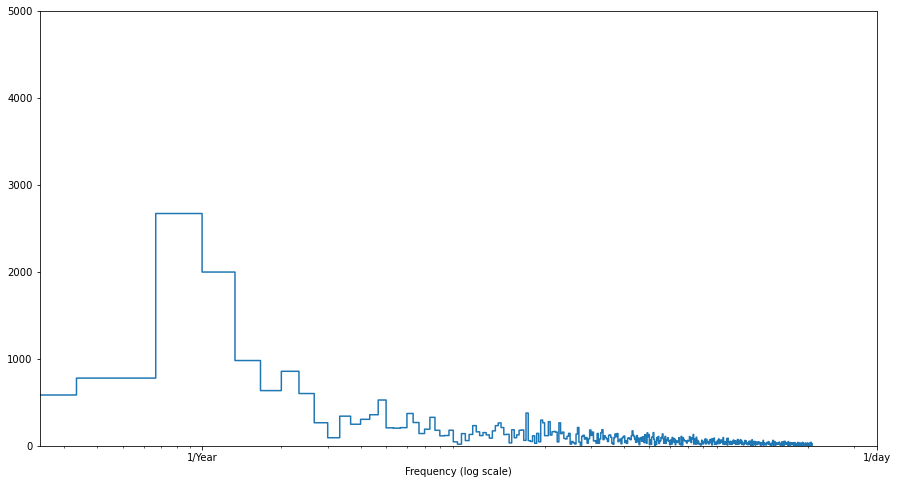

In [223]:
fft = tf.signal.rfft(df['Mean_T'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Mean_T'])
hours_per_year = 24*365.2524
years_per_dataset = 3

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 5000)
# plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [224]:
df.pop('Datetime')

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1242   2021-05-27
1243   2021-05-28
1244   2021-05-29
1245   2021-05-30
1246   2021-05-31
Name: Datetime, Length: 1247, dtype: datetime64[ns]

Splitting into train-test sets

In [225]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

Standard Scaling via numpy manipulation

In [226]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

Using Violinplot to view the distributions

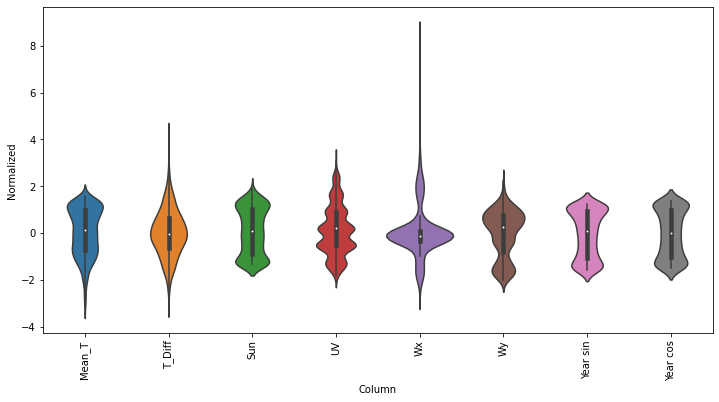

In [227]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Window Generator Explanation

The models will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

- The width (number of time steps) of the input and label windows.
- The time offset between them.
- Which features are used as inputs, labels, or both.

Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

For example, to make a single prediction 24 hours into the future, given 24 hours of history, you might define a window like this:

![Window](img/window.png)

In [228]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [229]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['Mean_T'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['Mean_T']

In [230]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Mean_T'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Mean_T']

Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

![Window Split](img/window_split.png)

In [231]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [232]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 8)
Inputs shape: (3, 6, 8)
Labels shape: (3, 1, 1)


In [233]:
w2.example = example_inputs, example_labels

In [234]:
def plot(self, model=None, plot_col='Mean_T', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot = plot

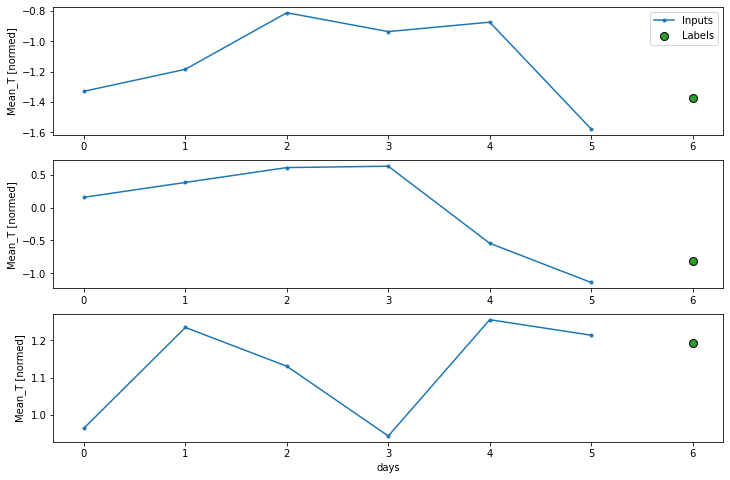

In [235]:
w2.plot()

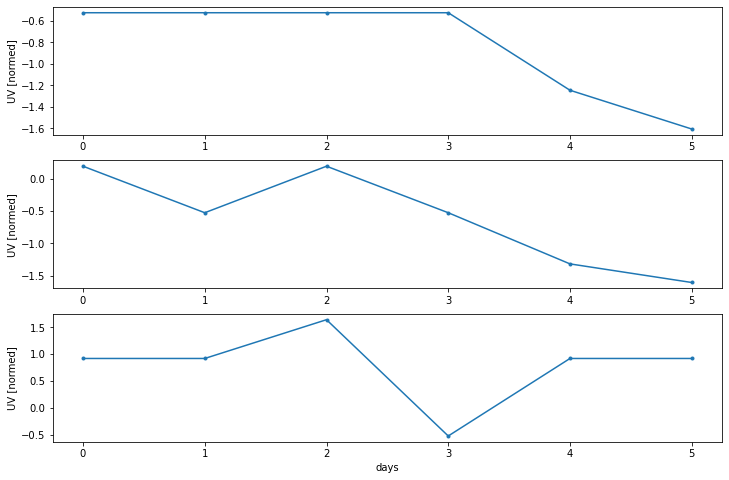

In [236]:
w2.plot(plot_col='UV')

# Making a dataset
Finally, this make_dataset method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the preprocessing.timeseries_dataset_from_array function:

In [237]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [238]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [239]:
# Each element is an (inputs, label) pair.
w2.train.element_spec

Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Mean_T']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Mean_T']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(TensorSpec(shape=(None, 6, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [240]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)


In [241]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Mean_T'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Mean_T']

In [242]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)


# Baseline
using a baseline model, I can see how it compares to the different models I will use later. The baseline model essentially pushes t -> t+1
![Baseline](img/baseline_temp_s.png)

In [243]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [244]:
baseline = Baseline(label_index=column_indices['Mean_T'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError(),
                          tf.keras.metrics.RootMeanSquaredError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
8/8 [==============================] - 0s 750us/step - loss: 0.0755 - mean_absolute_error: 0.1917 - root_mean_squared_error: 0.2747


In [245]:
val_performance

{'Baseline': [0.07545746862888336, 0.19170425832271576, 0.2746952176094055]}

In [246]:
wide_window = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['Mean_T'])

wide_window

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Mean_T']

In [247]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 8)
Output shape: (32, 30, 1)


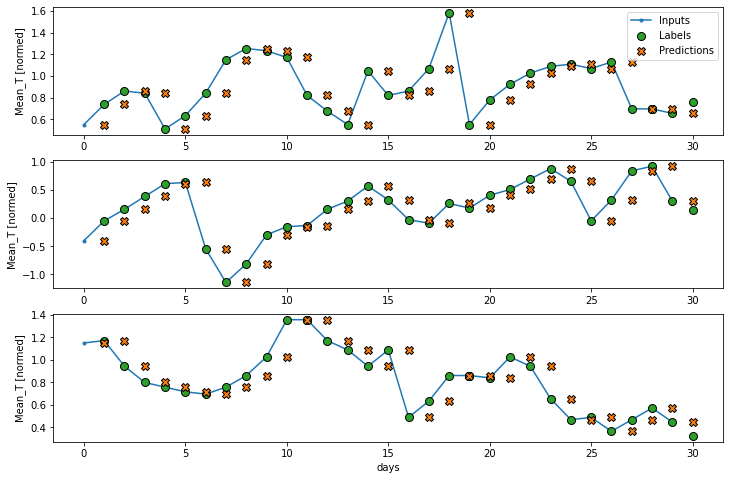

In [248]:
wide_window.plot(baseline)

In [249]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [250]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 8)
Output shape: (32, 1, 1)


# Setting the generic model compilation.
What metrics do we want to obtain from the models we generate?
As a baseline, I am just going to use 50 Epochs, MSE, Adam, metrics = AbsoluteError, RMSE

In [251]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError(),
                        tf.keras.metrics.RootMeanSquaredError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

# Linear

A basic linear model is run using a singular neuron in the hidden layer
![Linear](img/Linear_temp_s.png)

In [252]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
28/28 [==============================] - 0s 8ms/step - loss: 2.2984 - mean_absolute_error: 1.2296 - root_mean_squared_error: 1.5161 - val_loss: 1.9316 - val_mean_absolute_error: 1.1357 - val_root_mean_squared_error: 1.3898
Epoch 2/50
28/28 [==============================] - 0s 4ms/step - loss: 1.9915 - mean_absolute_error: 1.1388 - root_mean_squared_error: 1.4112 - val_loss: 1.6522 - val_mean_absolute_error: 1.0404 - val_root_mean_squared_error: 1.2854
Epoch 3/50
28/28 [==============================] - 0s 5ms/step - loss: 1.7231 - mean_absolute_error: 1.0538 - root_mean_squared_error: 1.3127 - val_loss: 1.4182 - val_mean_absolute_error: 0.9522 - val_root_mean_squared_error: 1.1909
Epoch 4/50
28/28 [==============================] - 0s 4ms/step - loss: 1.4932 - mean_absolute_error: 0.9746 - root_mean_squared_error: 1.2220 - val_loss: 1.2148 - val_mean_absolute_error: 0.8672 - val_root_mean_squared_error: 1.1022
Epoch 5/50
28/28 [==============================] - 0s 4ms/step 

Epoch 36/50
28/28 [==============================] - 0s 3ms/step - loss: 0.3037 - mean_absolute_error: 0.4272 - root_mean_squared_error: 0.5511 - val_loss: 0.3575 - val_mean_absolute_error: 0.4607 - val_root_mean_squared_error: 0.5979
Epoch 37/50
28/28 [==============================] - 0s 3ms/step - loss: 0.2989 - mean_absolute_error: 0.4239 - root_mean_squared_error: 0.5467 - val_loss: 0.3524 - val_mean_absolute_error: 0.4577 - val_root_mean_squared_error: 0.5936
Epoch 38/50
28/28 [==============================] - 0s 3ms/step - loss: 0.2944 - mean_absolute_error: 0.4208 - root_mean_squared_error: 0.5426 - val_loss: 0.3469 - val_mean_absolute_error: 0.4543 - val_root_mean_squared_error: 0.5890
Epoch 39/50
28/28 [==============================] - 0s 3ms/step - loss: 0.2901 - mean_absolute_error: 0.4178 - root_mean_squared_error: 0.5386 - val_loss: 0.3418 - val_mean_absolute_error: 0.4513 - val_root_mean_squared_error: 0.5847
Epoch 40/50
28/28 [==============================] - 0s 3ms/

In [253]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 30, 8)
Output shape: (32, 30, 1)


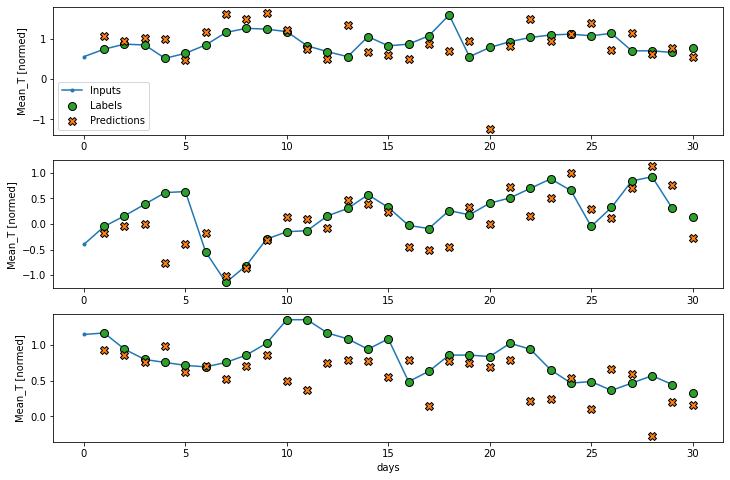

In [254]:
wide_window.plot(linear)

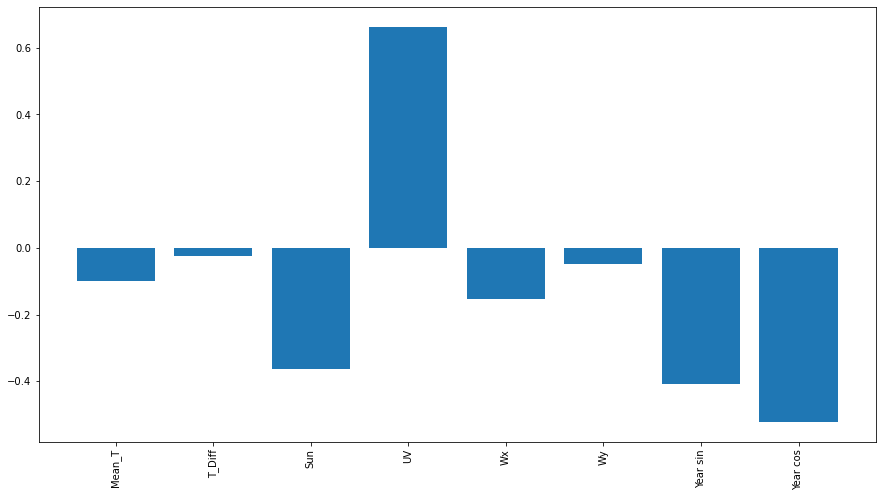

In [255]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [256]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
28/28 [==============================] - 0s 8ms/step - loss: 0.3752 - mean_absolute_error: 0.4766 - root_mean_squared_error: 0.6125 - val_loss: 0.1477 - val_mean_absolute_error: 0.3182 - val_root_mean_squared_error: 0.3844
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.1138 - mean_absolute_error: 0.2639 - root_mean_squared_error: 0.3374 - val_loss: 0.0795 - val_mean_absolute_error: 0.2028 - val_root_mean_squared_error: 0.2820
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0913 - mean_absolute_error: 0.2338 - root_mean_squared_error: 0.3022 - val_loss: 0.0689 - val_mean_absolute_error: 0.1941 - val_root_mean_squared_error: 0.2625
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.0816 - mean_absolute_error: 0.2201 - root_mean_squared_error: 0.2856 - val_loss: 0.0684 - val_mean_absolute_error: 0.1953 - val_root_mean_squared_error: 0.2615
Epoch 5/50
28/28 [==============================] - 0s 3ms/step 

In [257]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Mean_T'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Mean_T']

In [258]:
# print('Input shape:', wide_window.example[0].shape)
# print('Output shape:', lstm_model(wide_window.example[0]).shape)

Text(0.5, 1.0, 'Given 3 days of inputs, predict 1 day into the future.')

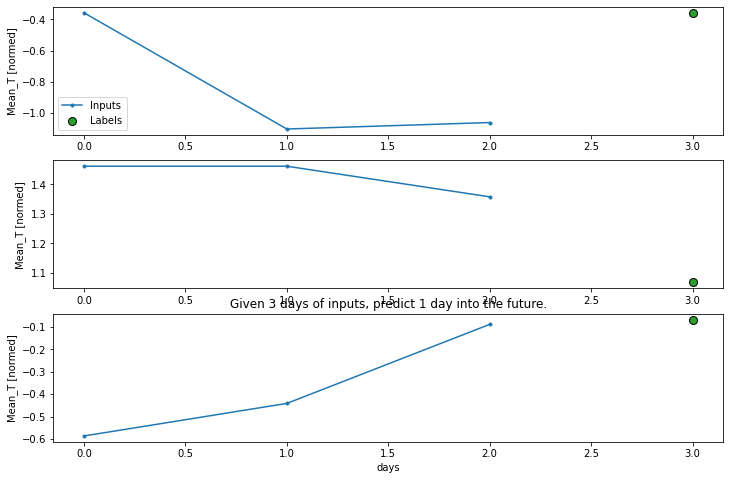

In [259]:
conv_window.plot()
plt.title("Given 3 days of inputs, predict 1 day into the future.")

In [260]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [261]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 8)
Output shape: (32, 1, 1)


In [262]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

8/8 [==============================] - 0s 750us/step - loss: 0.0799 - mean_absolute_error: 0.1996 - root_mean_squared_error: 0.2826


In [263]:
val_performance

{'Baseline': [0.07545746862888336, 0.19170425832271576, 0.2746952176094055],
 'Linear': [0.2894408702850342, 0.41637688875198364, 0.5379970669746399],
 'Dense': [0.06535673141479492, 0.18118983507156372, 0.2556496262550354],
 'Multi step dense': [0.07985256612300873,
  0.19958622753620148,
  0.28258195519447327]}

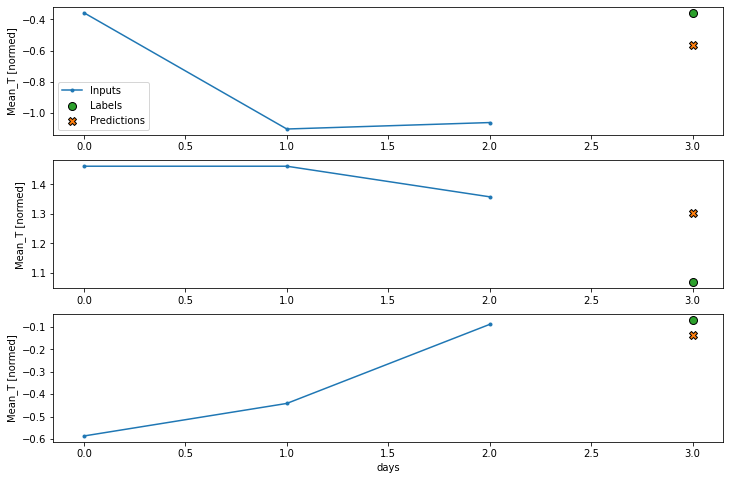

In [264]:
conv_window.plot(multi_step_dense)

In [265]:
print('Input shape:', wide_window.example[0].shape)
try:
  print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
  print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 30, 8)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,240], In[1]: [24,32] [Op:MatMul]


In [266]:
# CNN
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [267]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 8)
Output shape: (32, 1, 1)


In [268]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=1)

4/4 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_absolute_error: 0.2592 - root_mean_squared_error: 0.3164


In [269]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 30, 8)
Labels shape: (32, 30, 1)
Output shape: (32, 28, 1)


In [270]:
LABEL_WIDTH = 24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Mean_T'])

wide_conv_window

Total window size: 27
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26]
Label column name(s): ['Mean_T']

In [271]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 26, 8)
Labels shape: (32, 24, 1)
Output shape: (32, 24, 1)


# Convolutional Layer
A convolution layer (tf.keras.layers.Conv1D) also takes multiple time steps as input to each prediction.

Note the changes:

- The tf.keras.layers.Flatten and the first tf.keras.layers.Dense are replaced by a tf.keras.layers.Conv1D.
- The tf.keras.layers.Reshape is no longer necessary since the convolution keeps the time axis in its output.

The difference between this conv_model and the multi_step_dense model is that the conv_model can be run on inputs of any length. The convolutional layer is applied to a sliding window of inputs:

![conv](img/conv_window.png)

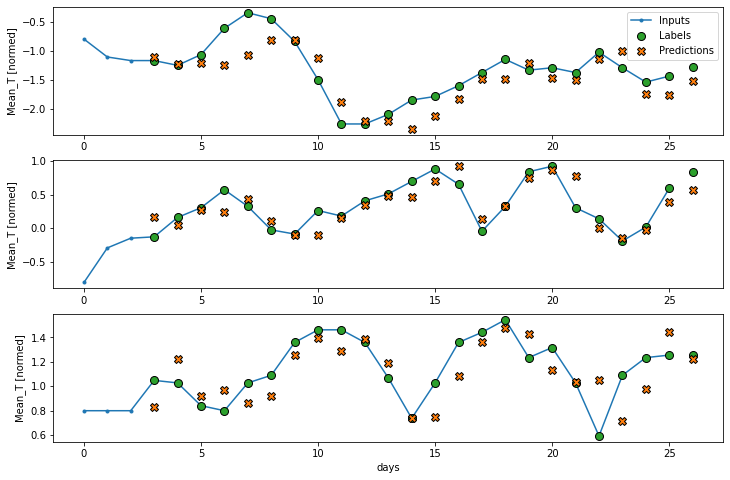

In [272]:
wide_conv_window.plot(conv_model)

In [273]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=1)
])

In [274]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 30, 8)
Output shape: (32, 30, 1)


In [275]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

7/7 [==============================] - 0s 3ms/step - loss: 0.0645 - mean_absolute_error: 0.1884 - root_mean_squared_error: 0.2540


In [276]:
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 32)            5248      
_________________________________________________________________
dense_9 (Dense)              (None, 30, 16)            528       
_________________________________________________________________
dense_10 (Dense)             (None, 30, 1)             17        
Total params: 5,793
Trainable params: 5,793
Non-trainable params: 0
_________________________________________________________________


# RNN LSTM model
LSTM model is a model for sequence data and it bases predictions on current and past time steps
![LSTM](img/rnn.png)

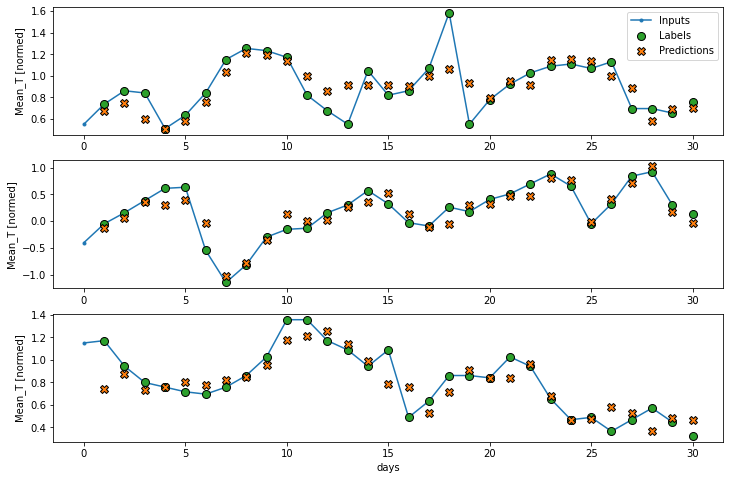

In [278]:
wide_window.plot(lstm_model)

# MAE results for single prediction on temperature. The dense layer astonishingly producing the best results

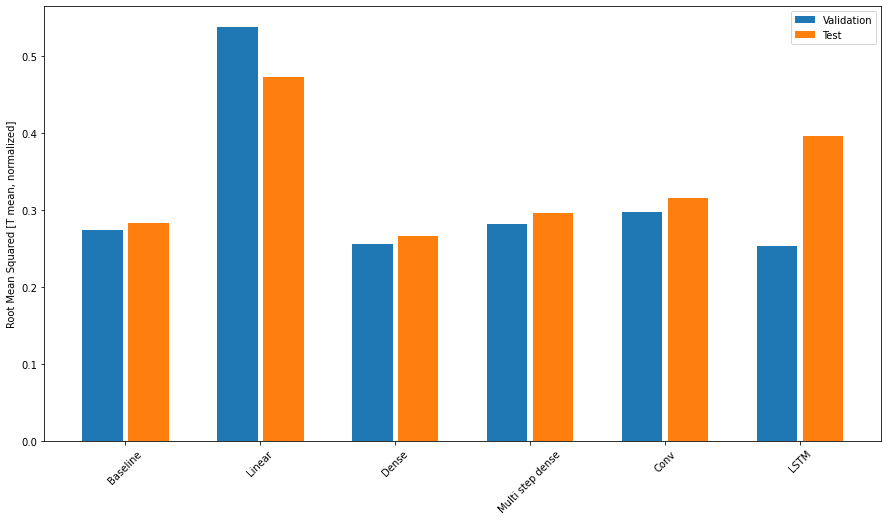

In [279]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_rmse = [v[metric_index] for v in val_performance.values()]
test_rmse = [v[metric_index] for v in performance.values()]

plt.ylabel('Root Mean Squared [T mean, normalized]')
plt.bar(x - 0.17, val_rmse, width, label='Validation')
plt.bar(x + 0.17, test_rmse, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

# RMSE metrics. Reflecting the same as the above

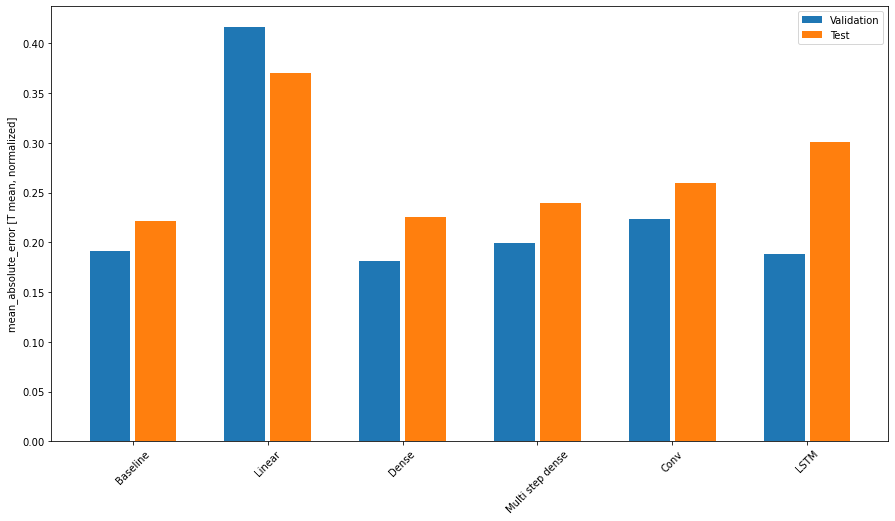

In [280]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T mean, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [281]:
val_performance

{'Baseline': [0.07545746862888336, 0.19170425832271576, 0.2746952176094055],
 'Linear': [0.2894408702850342, 0.41637688875198364, 0.5379970669746399],
 'Dense': [0.06535673141479492, 0.18118983507156372, 0.2556496262550354],
 'Multi step dense': [0.07985256612300873,
  0.19958622753620148,
  0.28258195519447327],
 'Conv': [0.08855199813842773, 0.22303083539009094, 0.2975768744945526],
 'LSTM': [0.06450847536325455, 0.18839940428733826, 0.253985196352005]}

# Multi Step Model
So the same modeling processes can be done for multiple step prediction, in the following models, the models will try to predict 1 month ahead using the previous 30 days of data

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): None

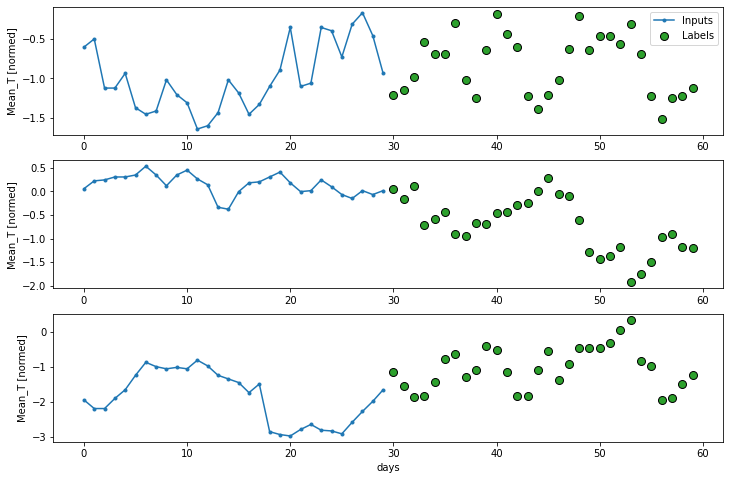

In [283]:
OUT_STEPS = 30
multi_window = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

# Baseline Model
Kind of obvious it won't work out, but we need a baseline|

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 1ms/step - loss: 1.0147 - mean_absolute_error: 0.6999 - root_mean_squared_error: 1.0073


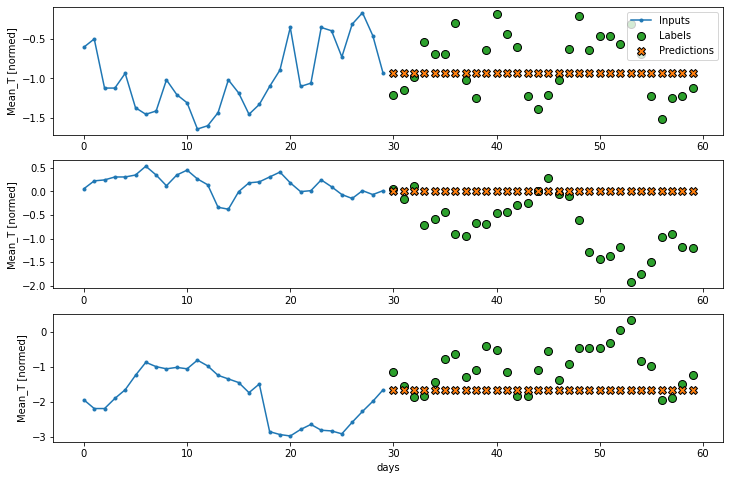

In [284]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError(),
                              tf.metrics.RootMeanSquaredError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

6/6 [==============================] - 0s 1ms/step - loss: 1.1638 - mean_absolute_error: 0.8115 - root_mean_squared_error: 1.0788


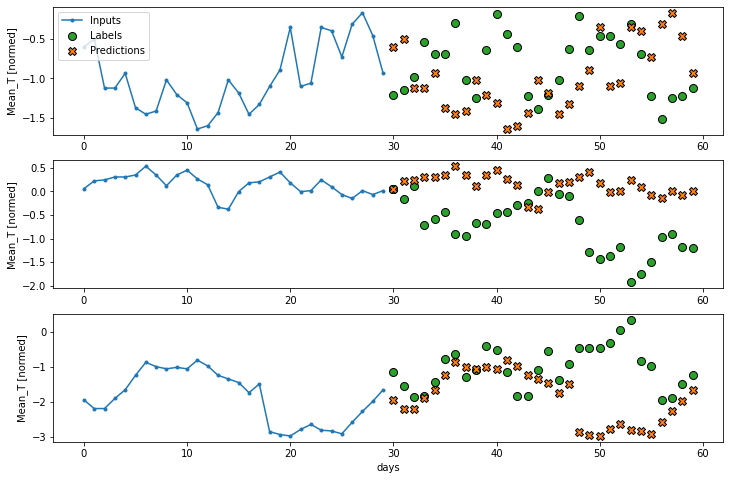

In [285]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError(),
                                tf.metrics.RootMeanSquaredError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

6/6 [==============================] - 0s 1ms/step - loss: 0.5713 - mean_absolute_error: 0.5391 - root_mean_squared_error: 0.7559


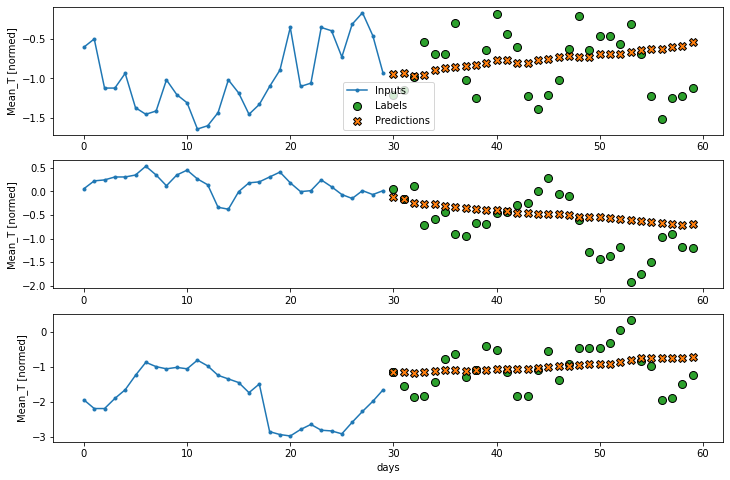

In [286]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

6/6 [==============================] - 0s 834us/step - loss: 0.5713 - mean_absolute_error: 0.5392 - root_mean_squared_error: 0.7559


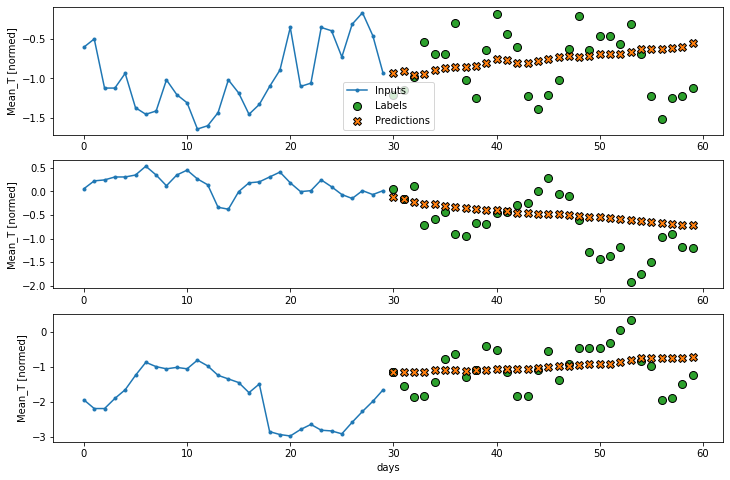

In [287]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

6/6 [==============================] - 0s 1ms/step - loss: 0.5661 - mean_absolute_error: 0.5198 - root_mean_squared_error: 0.7524


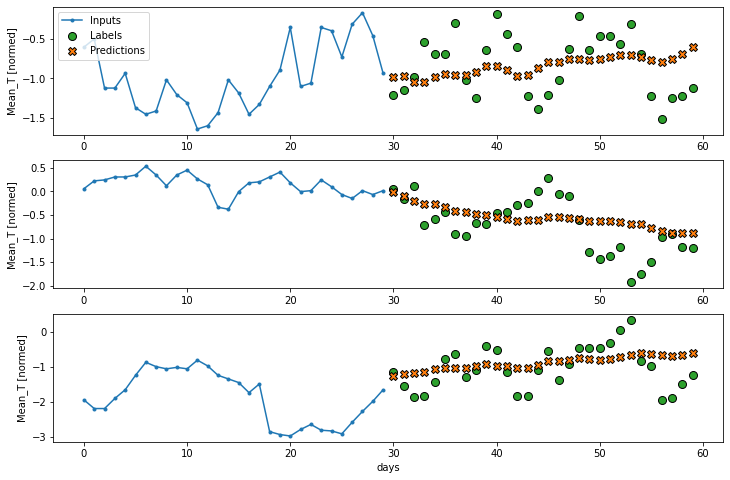

In [288]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

6/6 [==============================] - 0s 1ms/step - loss: 0.5670 - mean_absolute_error: 0.5230 - root_mean_squared_error: 0.7530


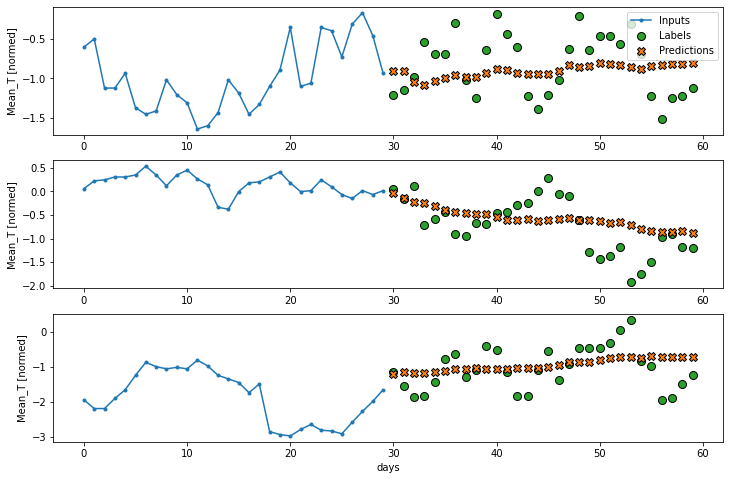

In [289]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

6/6 [==============================] - 0s 3ms/step - loss: 0.5754 - mean_absolute_error: 0.5392 - root_mean_squared_error: 0.7586


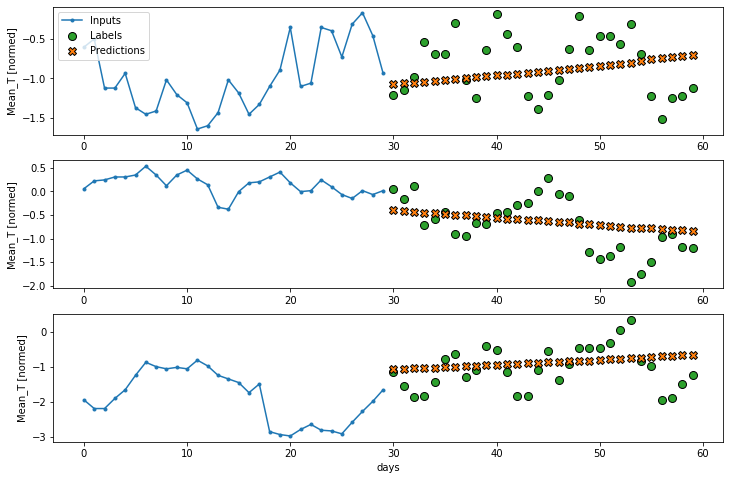

In [290]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [291]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [292]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [293]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [294]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 8])

In [295]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [296]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 30, 8)


# AutoRegressive model

Using the idea of LSTM, single step predictions are then considered as inputs in the 'next' step prediction

![AR](img/multistep_autoregressive.png)

6/6 [==============================] - 0s 4ms/step - loss: 0.5632 - mean_absolute_error: 0.5274 - root_mean_squared_error: 0.7505


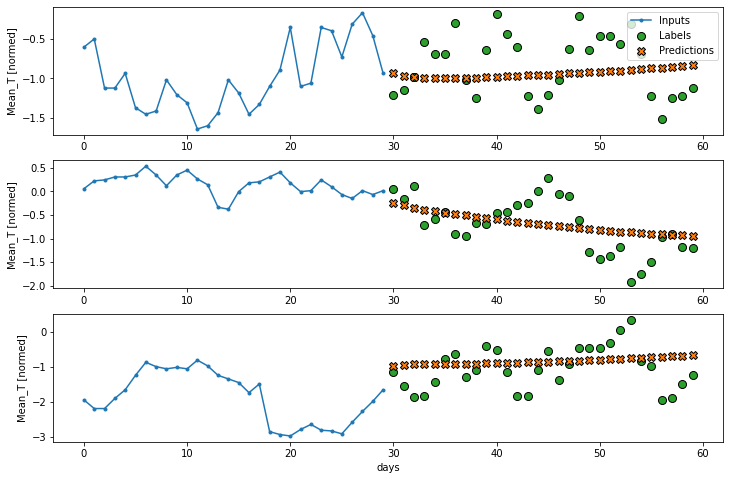

In [297]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

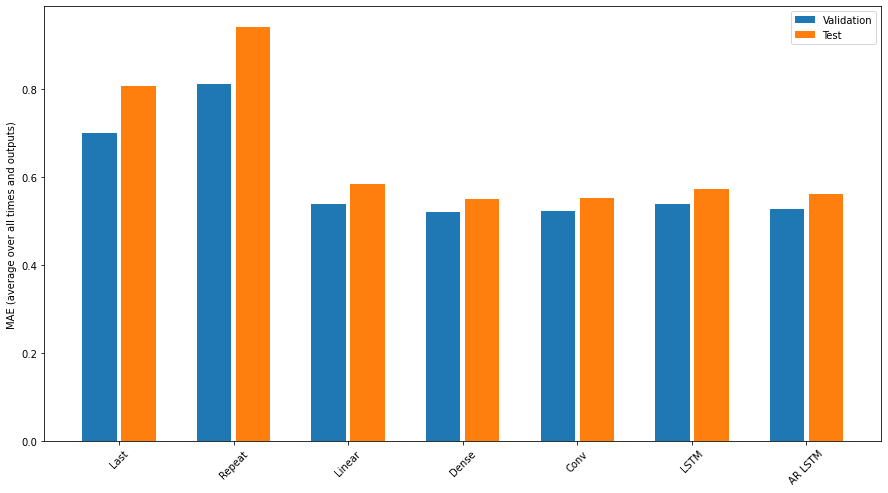

In [298]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

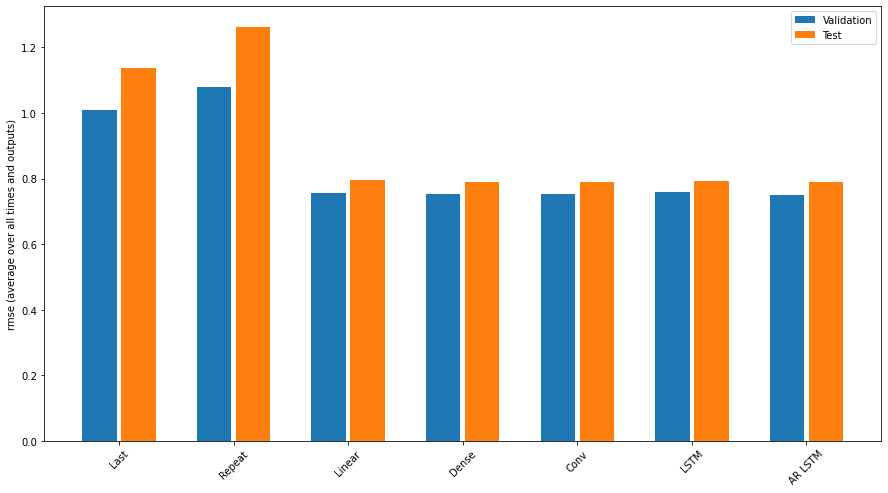

In [299]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_rmse = [v[metric_index] for v in multi_val_performance.values()]
test_rmse = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_rmse, width, label='Validation')
plt.bar(x + 0.17, test_rmse, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'rmse (average over all times and outputs)')
_ = plt.legend()

# As the concept of single step predictions and multi-step predictions were explained in the earlier parts using Temperature as the label, I don't want to explain the process done for the wind vectors which are carried out below

# Doing for Wind Values Wx on the X vector

In [300]:
wide_window_wx = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['Wx'])

wide_window_wx

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Wx']

In [301]:
single_step_window_wx = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Wx'])
single_step_window_wx

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Wx']

In [302]:
def plot(self, model=None, plot_col='Wx', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()
    

  plt.xlabel('days')

WindowGenerator.plot = plot

In [303]:
baseline_wx = Baseline(label_index=column_indices['Wx'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.RootMeanSquaredError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window_wx.val)
performance['Baseline'] = baseline.evaluate(single_step_window_wx.test, verbose=0)

8/8 [==============================] - 0s 750us/step - loss: 4.1114 - mean_absolute_error: 1.6816 - root_mean_squared_error: 2.0277


In [304]:
def plot_wx(self, model=None, plot_col='Wx', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot_wx = plot_wx

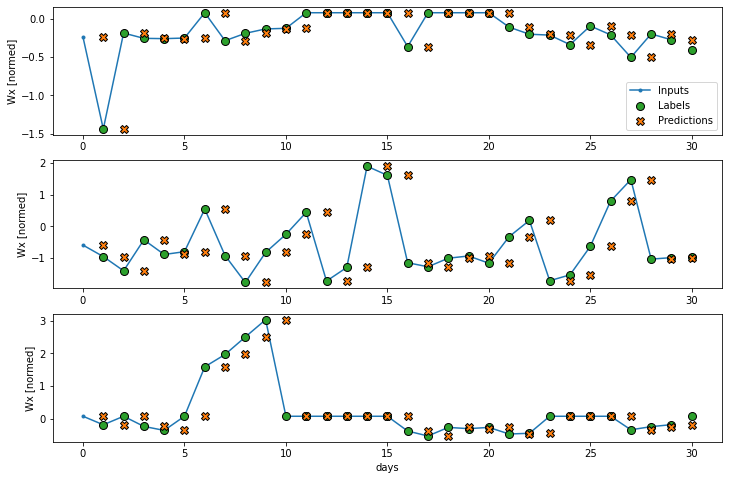

In [305]:
wide_window_wx.plot_wx(baseline_wx)

In [306]:
history_wx = compile_and_fit(linear, single_step_window_wx)

val_performance['Linear'] = linear.evaluate(single_step_window_wx.val)
performance['Linear'] = linear.evaluate(single_step_window_wx.test, verbose=0)

Epoch 1/50
28/28 [==============================] - ETA: 0s - loss: 2.0459 - mean_absolute_error: 1.1760 - root_mean_squared_error: 1.430 - 0s 6ms/step - loss: 2.2831 - mean_absolute_error: 1.1601 - root_mean_squared_error: 1.5110 - val_loss: 3.8567 - val_mean_absolute_error: 1.6740 - val_root_mean_squared_error: 1.9639
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 2.0669 - mean_absolute_error: 1.0925 - root_mean_squared_error: 1.4377 - val_loss: 3.4927 - val_mean_absolute_error: 1.5793 - val_root_mean_squared_error: 1.8689
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 1.8802 - mean_absolute_error: 1.0300 - root_mean_squared_error: 1.3712 - val_loss: 3.1774 - val_mean_absolute_error: 1.4912 - val_root_mean_squared_error: 1.7825
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 1.7204 - mean_absolute_error: 0.9746 - root_mean_squared_error: 1.3116 - val_loss: 2.8961 - val_mean_absolute_error: 1.4076 - val_root_mea

28/28 [==============================] - 0s 3ms/step - loss: 0.7348 - mean_absolute_error: 0.5878 - root_mean_squared_error: 0.8572 - val_loss: 0.8152 - val_mean_absolute_error: 0.6918 - val_root_mean_squared_error: 0.9029
Epoch 36/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7325 - mean_absolute_error: 0.5862 - root_mean_squared_error: 0.8559 - val_loss: 0.8099 - val_mean_absolute_error: 0.6883 - val_root_mean_squared_error: 0.8999
Epoch 37/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7305 - mean_absolute_error: 0.5849 - root_mean_squared_error: 0.8547 - val_loss: 0.8052 - val_mean_absolute_error: 0.6861 - val_root_mean_squared_error: 0.8973
Epoch 38/50
28/28 [==============================] - 0s 3ms/step - loss: 0.7285 - mean_absolute_error: 0.5851 - root_mean_squared_error: 0.8535 - val_loss: 0.7958 - val_mean_absolute_error: 0.6814 - val_root_mean_squared_error: 0.8921
Epoch 39/50
28/28 [==============================] - 0s 3ms/step - loss:

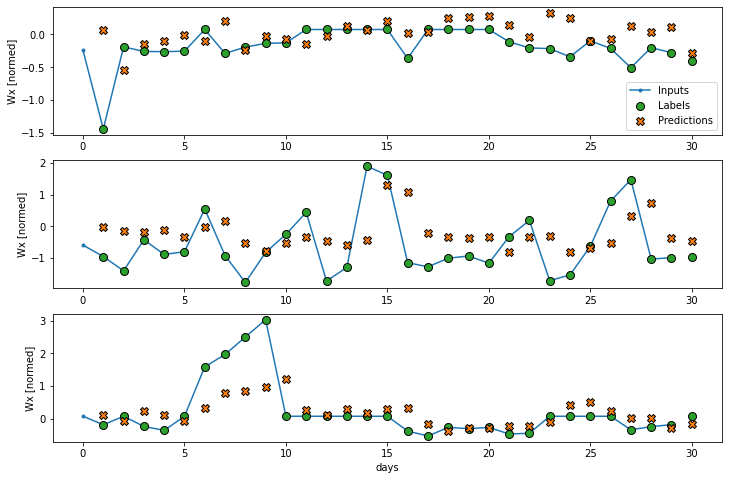

In [307]:
wide_window_wx.plot_wx(linear)

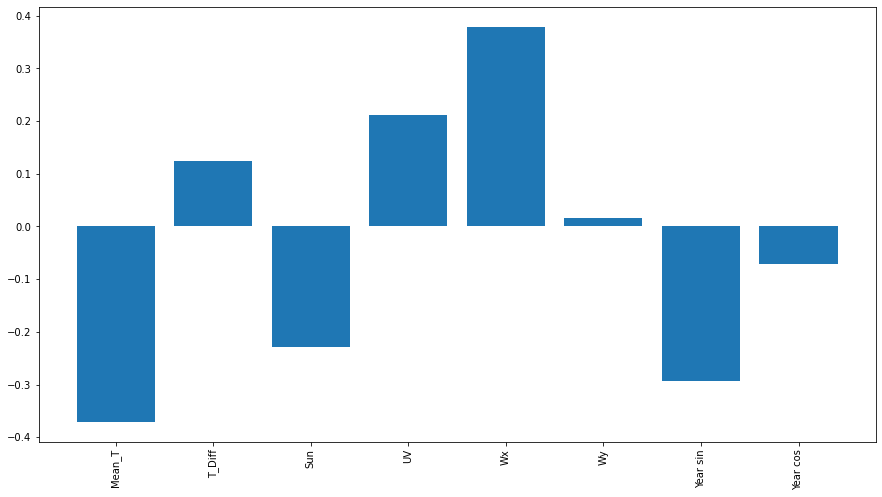

In [308]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [309]:
CONV_WIDTH = 3
conv_window_wx = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Wx'])

conv_window_wx

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Wx']

In [310]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window_wx = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Wx'])

wide_conv_window_wx

Total window size: 33
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]
Label column name(s): ['Wx']

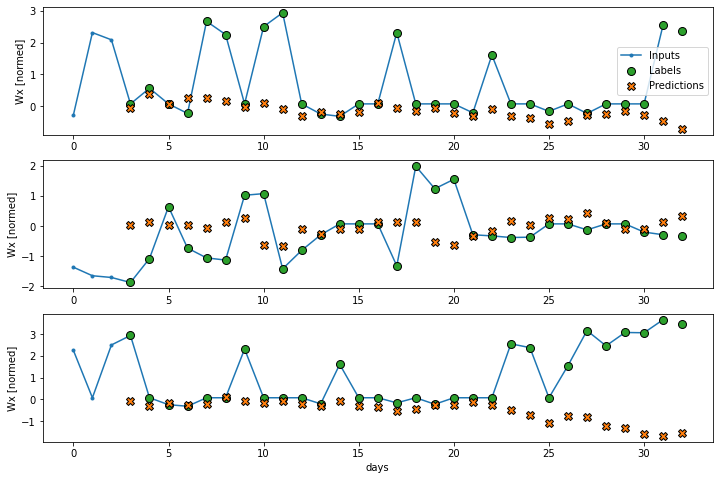

In [311]:
wide_conv_window_wx.plot_wx(conv_model)

In [312]:
history = compile_and_fit(lstm_model, wide_window_wx)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window_wx.val)
performance['LSTM'] = lstm_model.evaluate(wide_window_wx.test, verbose=0)

7/7 [==============================] - 0s 3ms/step - loss: 0.7784 - mean_absolute_error: 0.6789 - root_mean_squared_error: 0.8823


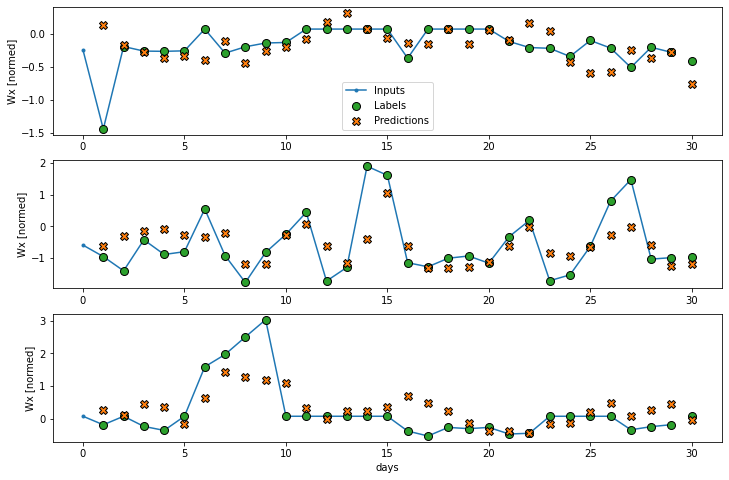

In [313]:
wide_window_wx.plot_wx(lstm_model)

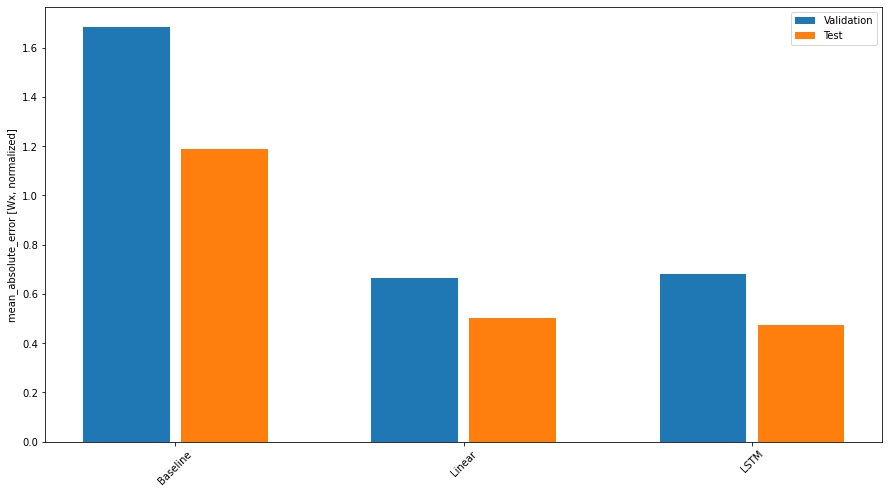

In [314]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Wx, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [315]:
val_performance.values()

dict_values([[4.111382484436035, 1.6815695762634277, 2.0276544094085693], [0.7688172459602356, 0.6649996638298035, 0.8768222332000732], [0.7783652544021606, 0.6789479851722717, 0.8822500705718994]])

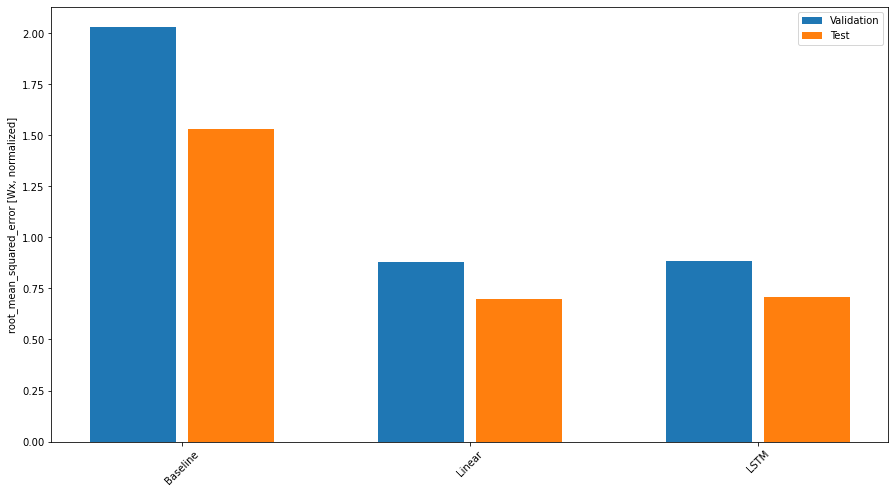

In [316]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_rmse = [v[metric_index] for v in val_performance.values()]
test_rmse = [v[metric_index] for v in performance.values()]

plt.ylabel('root_mean_squared_error [Wx, normalized]')
plt.bar(x - 0.17, val_rmse, width, label='Validation')
plt.bar(x + 0.17, test_rmse, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

### Moving to Multi-step Models

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): None

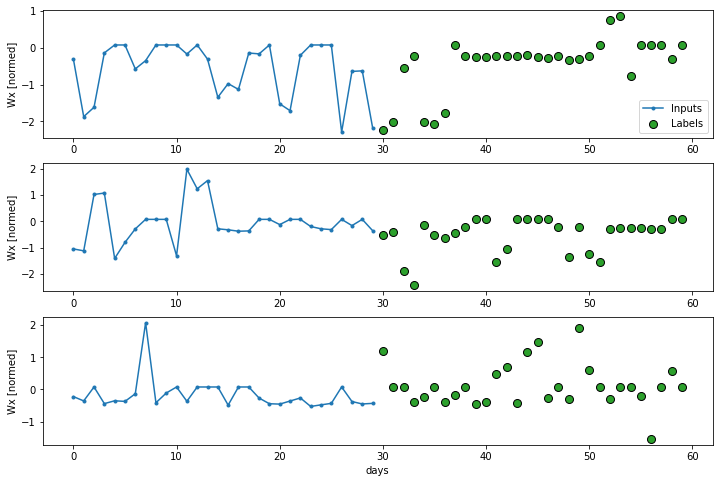

In [317]:
OUT_STEPS = 30
multi_window_wx = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window_wx.plot()
multi_window_wx

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 834us/step - loss: 1.0147 - mean_absolute_error: 0.6999 - root_mean_squared_error: 1.0073


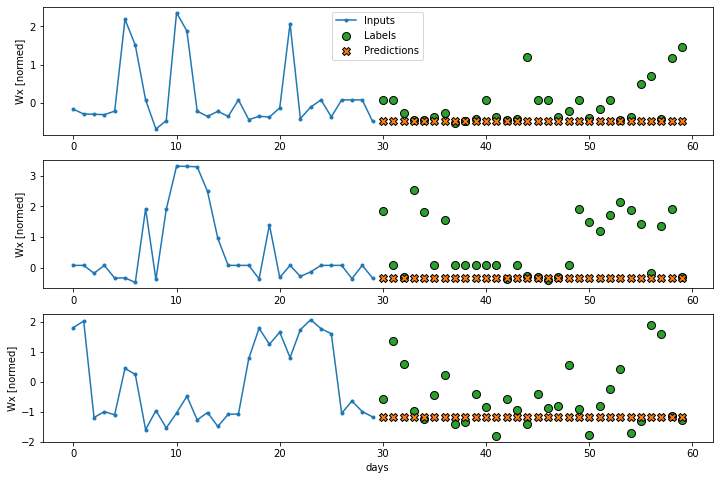

In [318]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError(),
                              tf.keras.metrics.RootMeanSquaredError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window_wx.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(last_baseline)

In [319]:
multi_window_wx.test

<MapDataset shapes: ((None, 30, 8), (None, 30, 8)), types: (tf.float32, tf.float32)>

In [320]:
list(multi_window_wx.train.as_numpy_iterator())[0][0][0][0:3]

array([[-1.01979   , -1.5964309 , -1.3120674 , -1.2460961 ,  0.07566139,
         1.025819  ,  0.9938537 ,  0.75673854],
       [-0.6269998 ,  0.38241407,  0.15778506,  0.19702211, -0.3844877 ,
         0.92255396,  1.0074825 ,  0.73624927],
       [-0.21353632,  0.7422055 ,  0.1315377 ,  0.19702211, -0.22343546,
         0.3765745 ,  1.0207642 ,  0.71552354]], dtype=float32)

In [321]:
# class RepeatBaseline(tf.keras.Model):
#   def call(self, inputs):
#     return inputs

# repeat_baseline = RepeatBaseline()
# repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
#                         metrics=[tf.metrics.MeanAbsoluteError(),
#                               tf.keras.metrics.RootMeanSquaredError()])

# multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window_wx.val)
# multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window_wx.test, verbose=0)
# multi_window.plot(repeat_baseline)

6/6 [==============================] - 0s 1ms/step - loss: 0.5714 - mean_absolute_error: 0.5391 - root_mean_squared_error: 0.7559


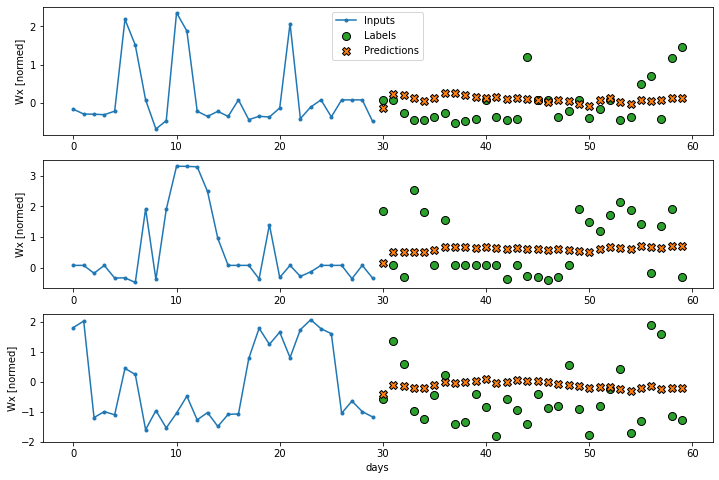

In [322]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window_wx.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(multi_linear_model)

6/6 [==============================] - 0s 2ms/step - loss: 0.5695 - mean_absolute_error: 0.5324 - root_mean_squared_error: 0.7546


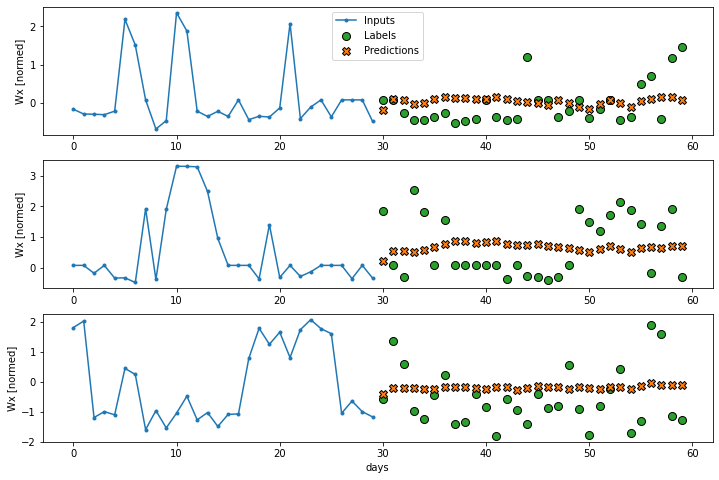

In [323]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window_wx)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window_wx.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(multi_dense_model)

6/6 [==============================] - 0s 2ms/step - loss: 0.5698 - mean_absolute_error: 0.5310 - root_mean_squared_error: 0.7548


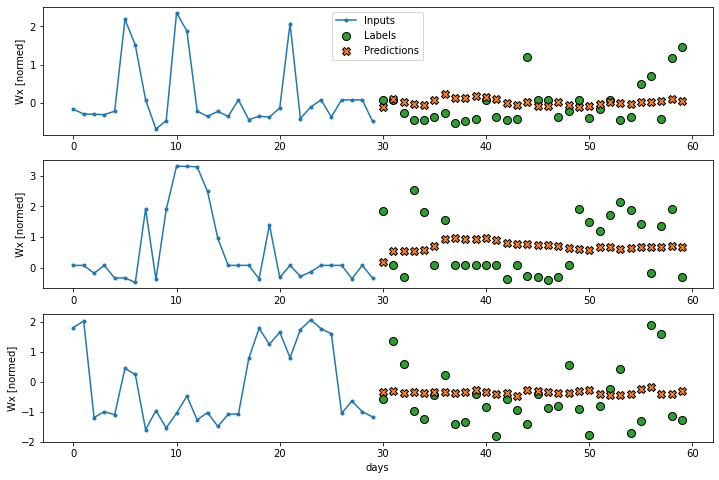

In [324]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(256, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window_wx)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window_wx.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(multi_dense_model)

6/6 [==============================] - 0s 1ms/step - loss: 0.5686 - mean_absolute_error: 0.5204 - root_mean_squared_error: 0.7540


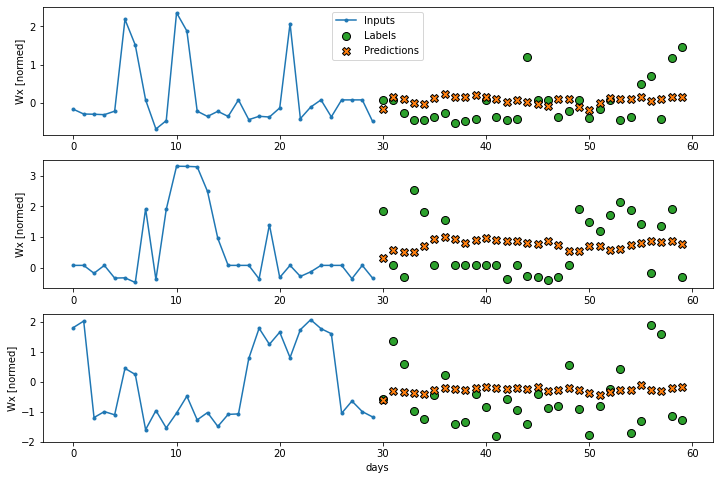

In [325]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window_wx)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window_wx.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(multi_conv_model)

6/6 [==============================] - 0s 3ms/step - loss: 0.5749 - mean_absolute_error: 0.5382 - root_mean_squared_error: 0.7583


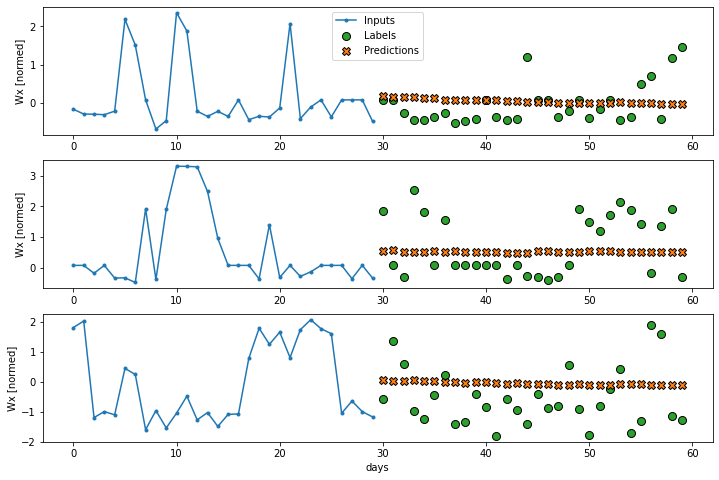

In [326]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window_wx)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window_wx.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [327]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [328]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [329]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [330]:
prediction, state = feedback_model.warmup(multi_window_wx.example[0])
prediction.shape

TensorShape([32, 8])

In [331]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

6/6 [==============================] - 0s 4ms/step - loss: 0.5720 - mean_absolute_error: 0.5337 - root_mean_squared_error: 0.7563


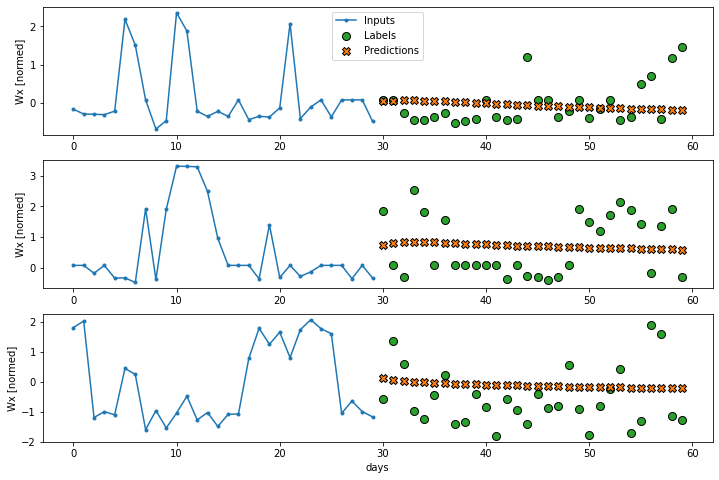

In [332]:
history = compile_and_fit(feedback_model, multi_window_wx)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window_wx.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(feedback_model)

In [333]:
prediction

<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[ 7.42656887e-02, -9.17229578e-02, -4.16082025e-01,
         2.25921229e-01, -1.05467737e-01,  2.32160255e-01,
        -2.36667484e-01,  2.41396464e-02],
       [-1.81175843e-02,  4.97913100e-02, -2.76205316e-02,
        -1.26578361e-01,  9.86490622e-02, -5.33435866e-02,
        -3.27431142e-01,  1.07283920e-01],
       [-2.90213346e-01, -6.64620697e-02,  3.88012648e-01,
        -1.82196215e-01,  1.28157198e-01, -9.56925377e-02,
         1.79948330e-01, -3.96077722e-01],
       [-3.16482753e-01, -5.07886112e-02,  4.46728975e-01,
        -3.60889703e-01,  5.31706214e-03, -8.56599957e-02,
         5.62379211e-02, -2.48890638e-01],
       [-3.02365482e-01, -2.70467363e-02,  4.41325366e-01,
        -2.26126939e-01,  3.50778103e-02,  8.52620453e-02,
         2.74023056e-01, -3.91122878e-01],
       [-2.29596302e-01, -1.77208632e-02,  2.54216909e-01,
        -1.08222336e-01,  1.99173868e-01, -1.37632042e-01,
         9.47670043e-02, -2.

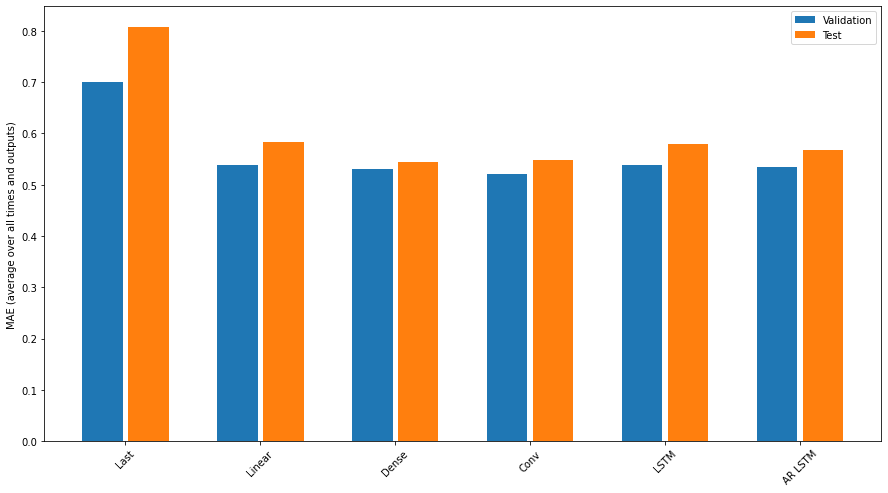

In [334]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

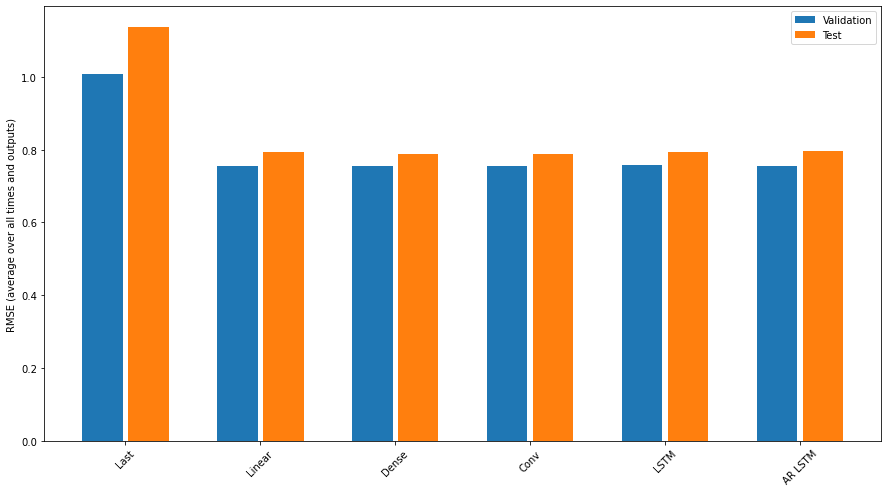

In [335]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_rmse = [v[metric_index] for v in multi_val_performance.values()]
test_rmse = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_rmse, width, label='Validation')
plt.bar(x + 0.17, test_rmse, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'RMSE (average over all times and outputs)')
_ = plt.legend()

In [336]:
train_mean['Wx']

-0.3426319658756256

In [337]:
train_std['Wx']

4.528484344482422

In [338]:
Wx_vector = (prediction*train_std['Wx'])+train_mean['Wx']

In [339]:
prediction[31]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([ 0.21093401, -0.04933295, -0.5437242 ,  0.4003805 ,  0.04663803,
        0.19501266, -0.32601717,  0.24380639], dtype=float32)>

In [340]:
prediction.shape

TensorShape([32, 8])

# Doing for Wind Values Wy on the Y vector

In [341]:
wide_window_wy = WindowGenerator(
    input_width=30, label_width=30, shift=1,
    label_columns=['Wy'])

wide_window_wy

Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Label column name(s): ['Wy']

In [342]:
single_step_window_wy = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['Wy'])
single_step_window_wy

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['Wy']

In [343]:
baseline_wy = Baseline(label_index=column_indices['Wy'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window_wy.val)
performance['Baseline'] = baseline.evaluate(single_step_window_wy.test, verbose=0)

8/8 [==============================] - 0s 625us/step - loss: 2.8878 - mean_absolute_error: 1.3765


In [344]:
def plot_wy(self, model=None, plot_col='Wy', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('days')

WindowGenerator.plot_wy = plot_wy

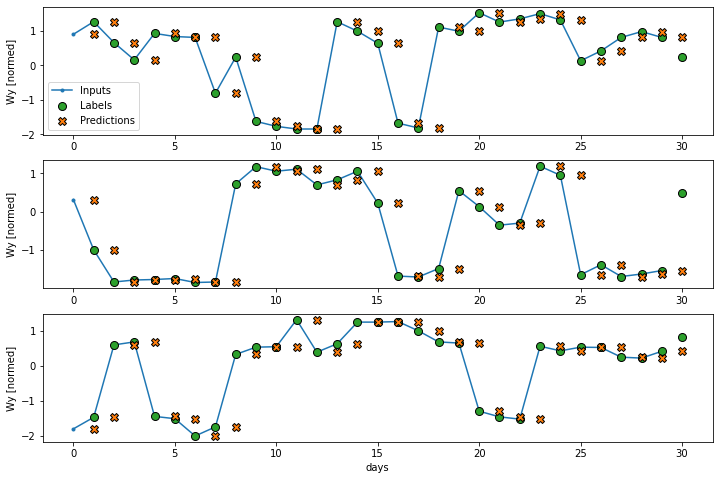

In [345]:
wide_window_wy.plot_wy(baseline_wy)

In [346]:
history_wy = compile_and_fit(linear, single_step_window_wy)

val_performance['Linear'] = linear.evaluate(single_step_window_wy.val)
performance['Linear'] = linear.evaluate(single_step_window_wy.test, verbose=0)

Epoch 1/50
28/28 [==============================] - 0s 6ms/step - loss: 1.0465 - mean_absolute_error: 0.8820 - root_mean_squared_error: 1.0230 - val_loss: 1.2480 - val_mean_absolute_error: 0.9272 - val_root_mean_squared_error: 1.1171
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.9783 - mean_absolute_error: 0.8507 - root_mean_squared_error: 0.9891 - val_loss: 1.1680 - val_mean_absolute_error: 0.8993 - val_root_mean_squared_error: 1.0808
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.9270 - mean_absolute_error: 0.8263 - root_mean_squared_error: 0.9628 - val_loss: 1.1005 - val_mean_absolute_error: 0.8755 - val_root_mean_squared_error: 1.0491
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.8864 - mean_absolute_error: 0.8061 - root_mean_squared_error: 0.9415 - val_loss: 1.0418 - val_mean_absolute_error: 0.8536 - val_root_mean_squared_error: 1.0207
Epoch 5/50
28/28 [==============================] - 0s 3ms/step 

Epoch 36/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5797 - mean_absolute_error: 0.6008 - root_mean_squared_error: 0.7614 - val_loss: 0.5475 - val_mean_absolute_error: 0.6092 - val_root_mean_squared_error: 0.7399
Epoch 37/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5785 - mean_absolute_error: 0.5991 - root_mean_squared_error: 0.7606 - val_loss: 0.5436 - val_mean_absolute_error: 0.6044 - val_root_mean_squared_error: 0.7373
Epoch 38/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5771 - mean_absolute_error: 0.5971 - root_mean_squared_error: 0.7596 - val_loss: 0.5442 - val_mean_absolute_error: 0.6037 - val_root_mean_squared_error: 0.7377
Epoch 39/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5760 - mean_absolute_error: 0.5954 - root_mean_squared_error: 0.7589 - val_loss: 0.5412 - val_mean_absolute_error: 0.6010 - val_root_mean_squared_error: 0.7356
Epoch 40/50
28/28 [==============================] - 0s 3ms/

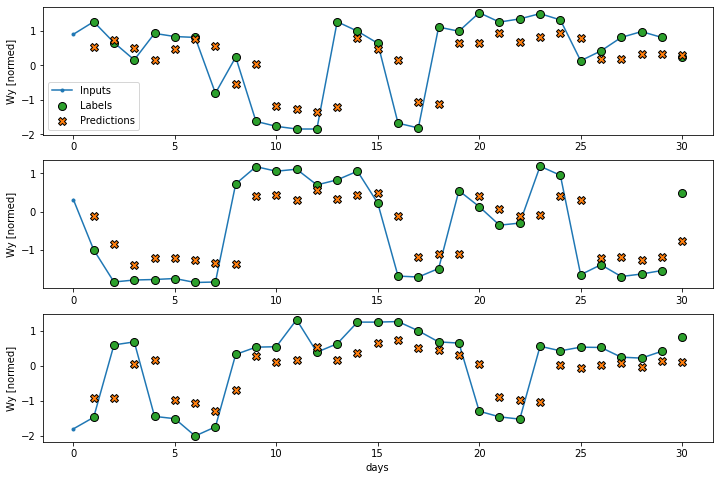

In [347]:
wide_window_wy.plot_wy(linear)

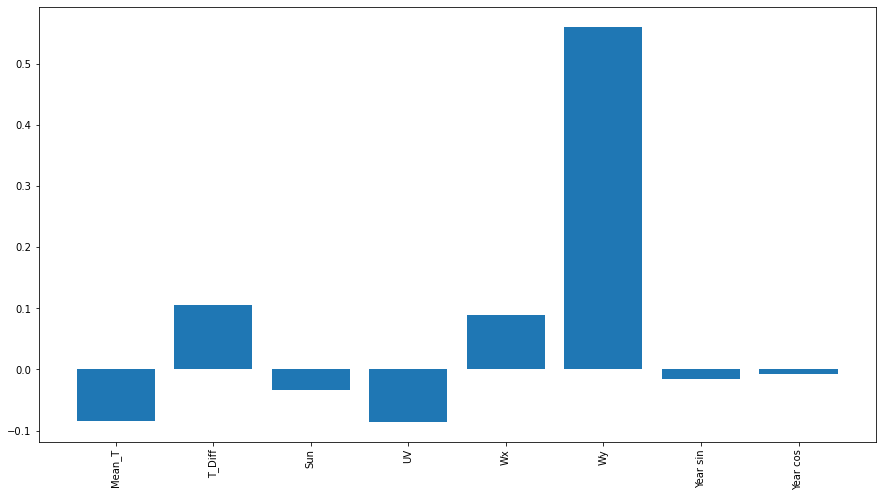

In [348]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

In [349]:
CONV_WIDTH = 3
conv_window_wy = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Wy'])

conv_window_wy

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Wy']

In [350]:
LABEL_WIDTH = 30
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window_wy = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Wy'])

wide_conv_window_wy

Total window size: 33
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Label indices: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32]
Label column name(s): ['Wy']

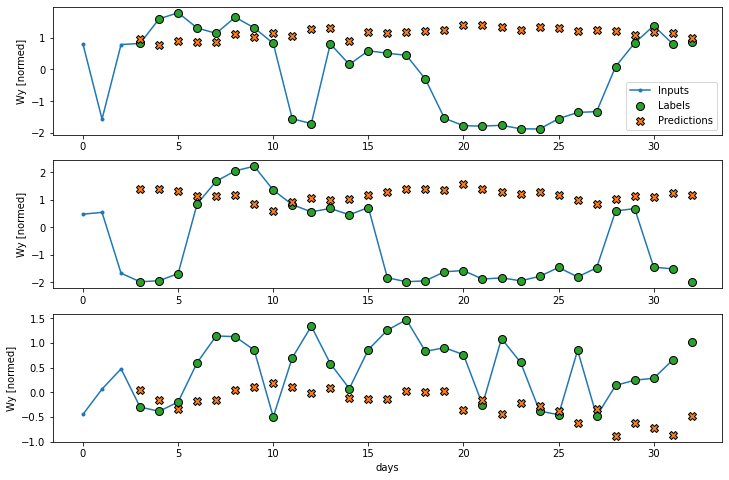

In [351]:
wide_conv_window_wy.plot_wy(conv_model)

In [352]:
history = compile_and_fit(lstm_model, wide_window_wy)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window_wy.val)
performance['LSTM'] = lstm_model.evaluate(wide_window_wy.test, verbose=0)

7/7 [==============================] - 0s 3ms/step - loss: 0.4971 - mean_absolute_error: 0.5651 - root_mean_squared_error: 0.7050


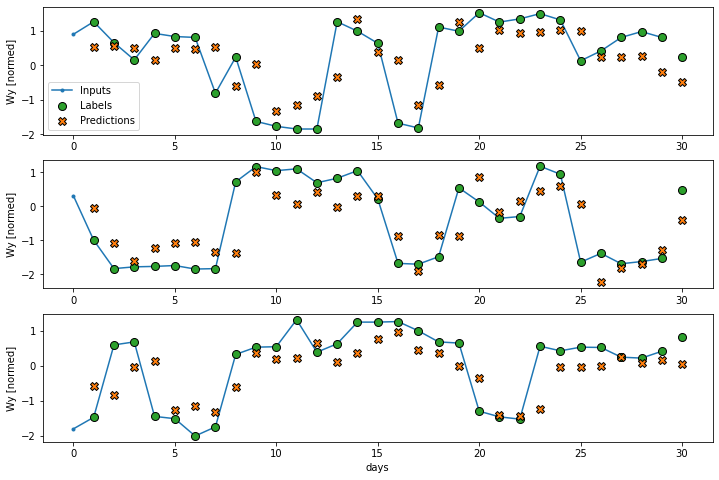

In [353]:
wide_window_wy.plot_wy(lstm_model)

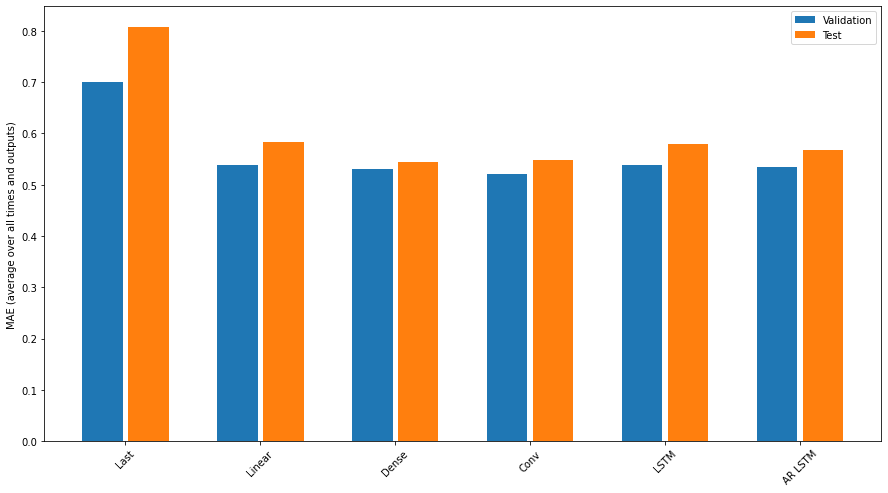

In [354]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

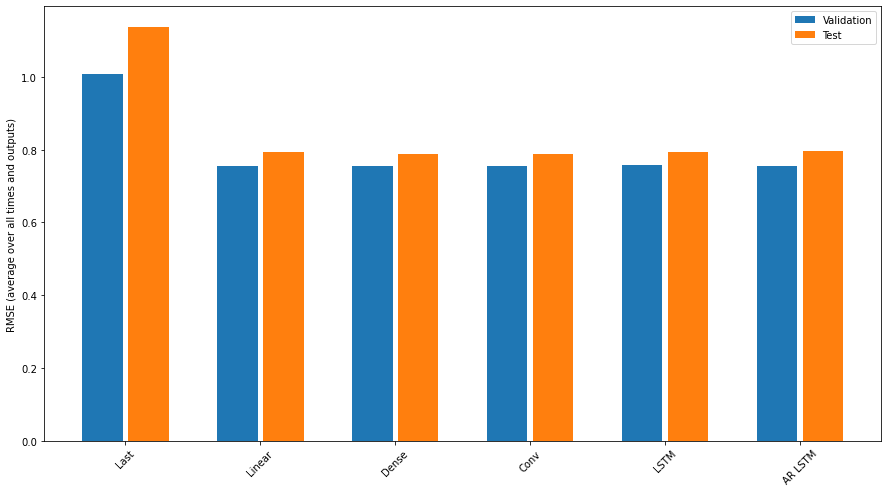

In [355]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_rmse = [v[metric_index] for v in multi_val_performance.values()]
test_rmse = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_rmse, width, label='Validation')
plt.bar(x + 0.17, test_rmse, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'RMSE (average over all times and outputs)')
_ = plt.legend()

### Moving to Multi-step Models

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Label column name(s): None

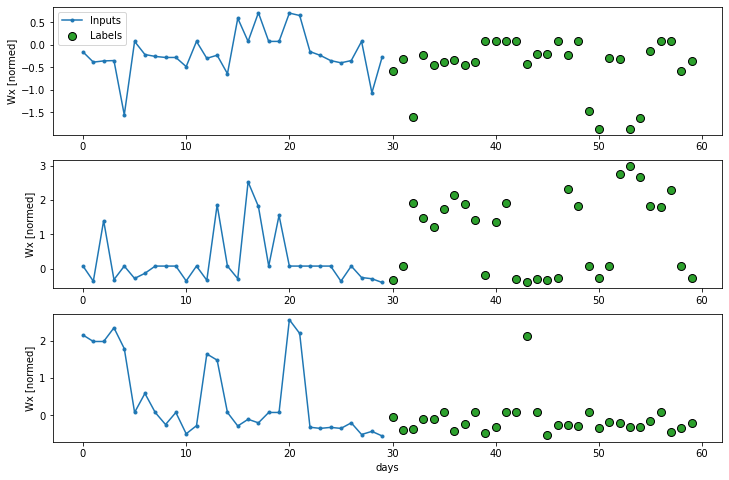

In [356]:
OUT_STEPS = 30
multi_window_wy = WindowGenerator(input_width=30,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window_wy.plot()
multi_window_wy

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 833us/step - loss: 1.0147 - mean_absolute_error: 0.6999 - root_mean_squared_error: 1.0073


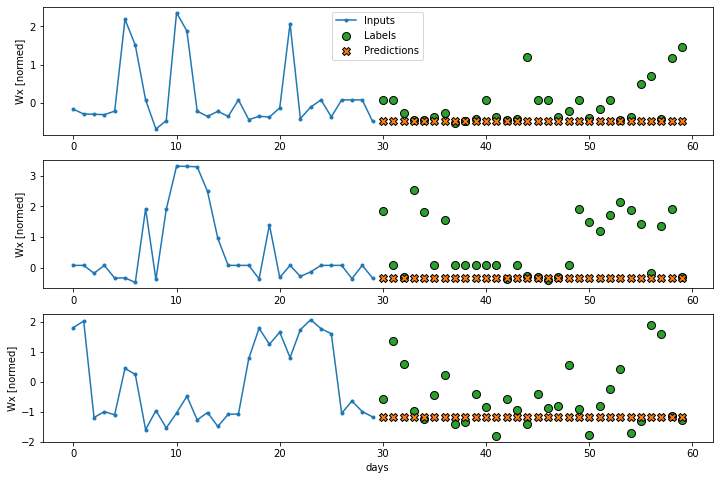

In [357]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError(),
                              tf.keras.metrics.RootMeanSquaredError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window_wx.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window_wx.test, verbose=0)
multi_window.plot(last_baseline)

6/6 [==============================] - 0s 1ms/step - loss: 0.5712 - mean_absolute_error: 0.5391 - root_mean_squared_error: 0.7557


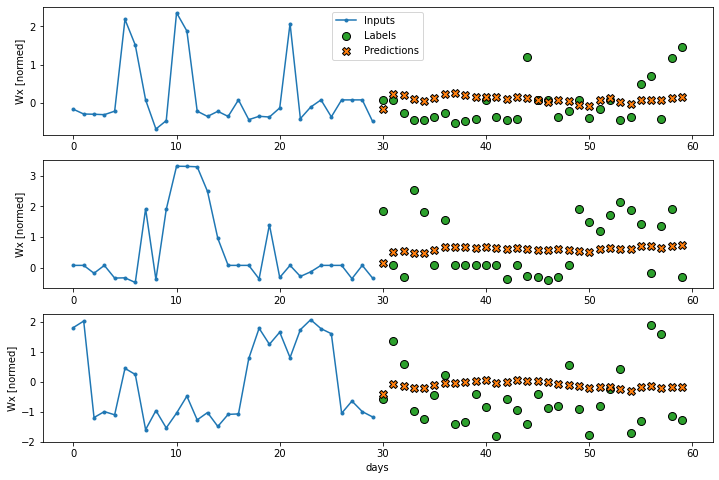

In [358]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window_wy.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window_wy.test, verbose=0)
multi_window.plot(multi_linear_model)

6/6 [==============================] - 0s 2ms/step - loss: 0.5672 - mean_absolute_error: 0.5222 - root_mean_squared_error: 0.7531


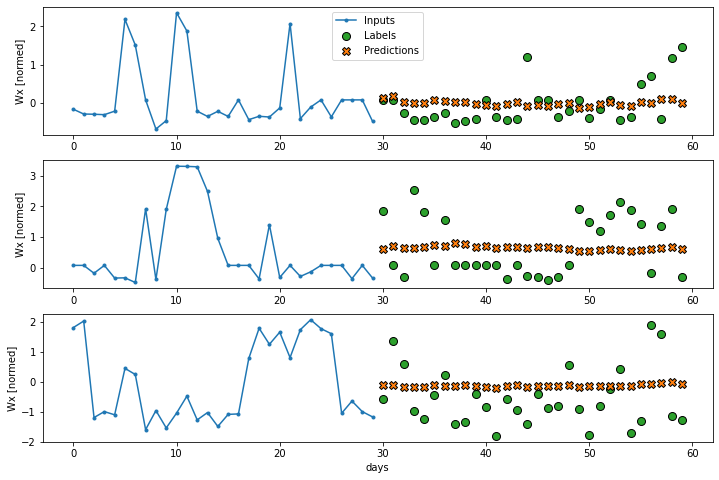

In [359]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window_wx)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window_wy.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window_wy.test, verbose=0)
multi_window.plot(multi_dense_model)

6/6 [==============================] - 0s 1ms/step - loss: 0.5681 - mean_absolute_error: 0.5229 - root_mean_squared_error: 0.7537


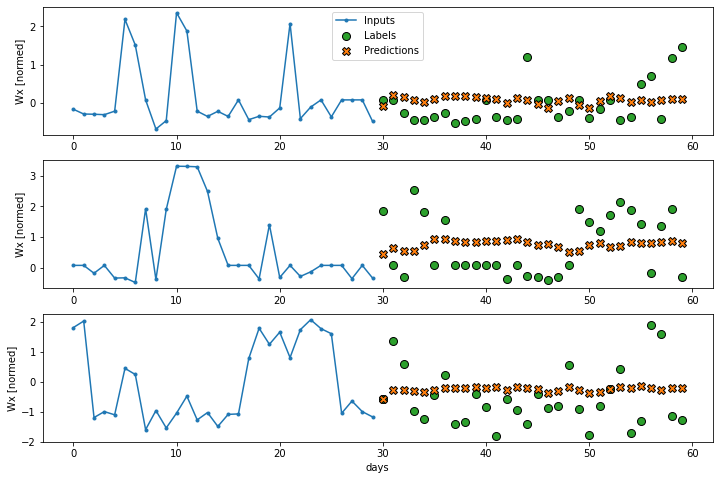

In [360]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window_wy)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window_wy.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window_wy.test, verbose=0)
multi_window.plot(multi_conv_model)

6/6 [==============================] - 0s 3ms/step - loss: 0.5770 - mean_absolute_error: 0.5389 - root_mean_squared_error: 0.7596


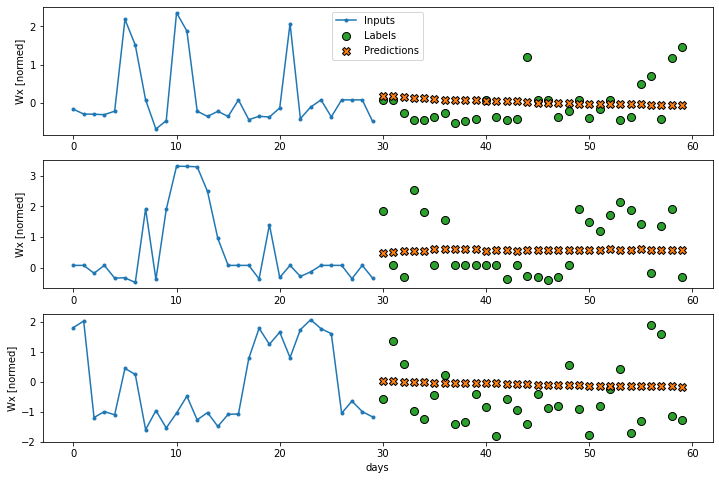

In [361]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window_wy)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window_wy.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window_wy.test, verbose=0)
multi_window.plot(multi_lstm_model)

6/6 [==============================] - 0s 5ms/step - loss: 0.5739 - mean_absolute_error: 0.5396 - root_mean_squared_error: 0.7576


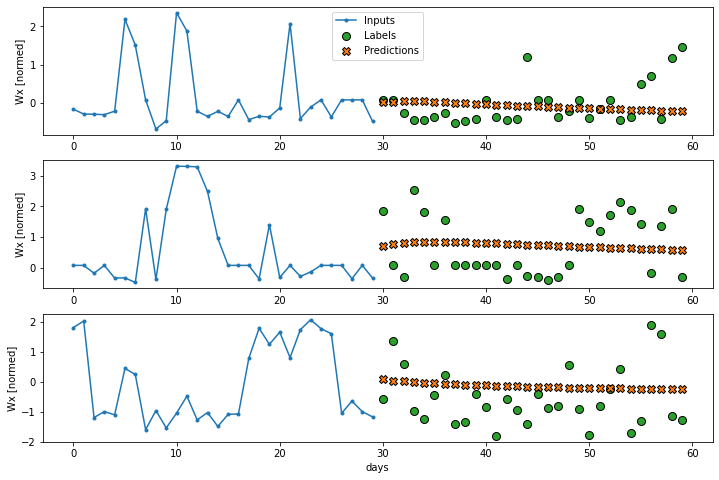

In [362]:
history = compile_and_fit(feedback_model, multi_window_wy)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window_wy.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window_wy.test, verbose=0)
multi_window.plot(feedback_model)

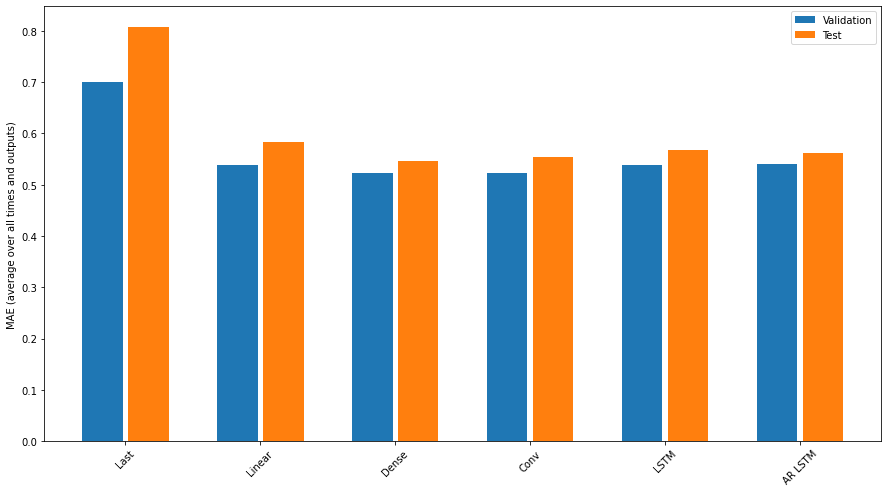

In [363]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

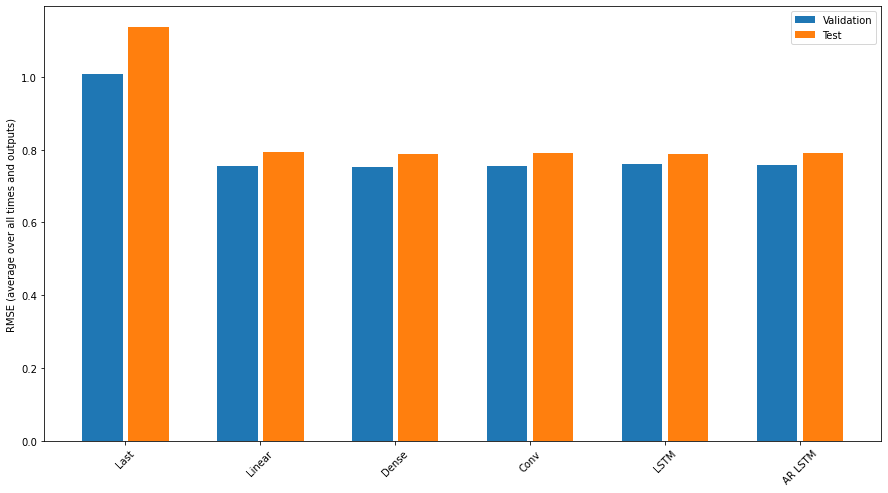

In [364]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'root_mean_squared_error'
metric_index = lstm_model.metrics_names.index(metric_name)
val_rmse = [v[metric_index] for v in multi_val_performance.values()]
test_rmse = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_rmse, width, label='Validation')
plt.bar(x + 0.17, test_rmse, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'RMSE (average over all times and outputs)')
_ = plt.legend()

# Extracting the predicted vectors out and converting to Scalar (Speed) and angle

In [365]:
Wy_vector = (prediction*train_std['Wy'])+train_mean['Wy']

In [366]:
Wy_vector

<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[ 5.391291  ,  4.133806  ,  1.6765497 ,  6.540192  ,  4.0296793 ,
         6.5874577 ,  3.0357456 ,  5.01155   ],
       [ 4.6914206 ,  5.2058797 ,  4.6194286 ,  3.869751  ,  5.5760126 ,
         4.4245577 ,  2.3481448 ,  5.641428  ],
       [ 2.6300967 ,  4.325176  ,  7.768153  ,  3.4484053 ,  5.7995586 ,
         4.1037335 ,  6.191914  ,  1.8280969 ],
       [ 2.4310868 ,  4.4439135 ,  8.212972  ,  2.0946717 ,  4.868955  ,
         4.1797376 ,  5.2547174 ,  2.9431462 ],
       [ 2.5380354 ,  4.6237755 ,  8.172035  ,  3.115598  ,  5.094414  ,
         5.4745965 ,  6.9045987 ,  1.8656335 ],
       [ 3.089315  ,  4.694426  ,  6.754553  ,  4.008811  ,  6.3375616 ,
         3.7860112 ,  5.546603  ,  3.1426058 ],
       [ 5.92104   ,  5.727151  ,  0.79317856,  7.014659  ,  4.629693  ,
         6.0683413 ,  2.3866572 ,  6.525429  ],
       [ 5.345972  ,  4.178314  ,  1.8591192 ,  6.3498316 ,  3.6364079 ,
         6.432946  ,  2.8867474

In [373]:
angle=np.arctan(Wy_vector/Wx_vector)
angle_prediction=angle*180/np.pi
windspeed_prediction=Wx_vector/np.cos(angle)

In [375]:
windspeed_prediction

<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[-5.3915596, -4.202727 , -2.787417 ,  6.575491 , -4.112313 ,
         6.6254687, -3.3490617, -5.0169735],
       [-4.7106004, -5.207204 , -4.643048 , -3.9766488,  5.5769978,
        -4.4629602, -2.9741998,  5.643257 ],
       [-3.1084702, -4.3727984,  7.8958817, -3.6407456,  5.804427 ,
        -4.176454 ,  6.209893 , -2.811683 ],
       [-3.0106008, -4.4806547,  8.383112 , -2.8802505, -4.8793654,
        -4.2431   , -5.2554636, -3.2897134],
       [-3.061403 , -4.647112 ,  8.338114 , -3.4021559, -5.0977273,
         5.4747787,  6.9627876, -2.81937  ],
       [-3.38449  , -4.713435 ,  6.8027782, -4.094384 ,  6.362193 ,
        -3.90728  ,  5.5472713, -3.4205003],
       [ 5.929161 ,  5.7304473, -2.86681  ,  7.080598 , -4.652645 ,
         6.0814013, -2.9907684,  6.5598974],
       [-5.3460884, -4.2418437, -2.8179889,  6.375067 , -3.7864454,
         6.462402 , -3.2547889,  5.714438 ],
       [ 6.553265 , -4.3646092, -3.5664744,  5.

# Executive Summary

Through this project, there are many models that can work in creating future 'predictions'. Scikitlearn's library may not produce the best results, and tensorflow is definitely stronger in this aspect.

LSTMs and AR LSTMs appear to handle future predicted values quite well and can be considered in building synthetic data for research purposes. However caution must be undertaken to how much this synthetic data is 'usable' as it depends on multiple conditions such as the frequency of outliers, and many more

Future developments can include stronger development on the models. And synthetic data should be treated as synthetic data